# CPR appropriation with policy gradient

This notebook contains actual Harvest trainings for each implemented policy gradient method. The environment in use is a custom implementation of Harvest.

## Pre-requisites

The cells down below install and import the necessary libraries to successfully run the notebook examples.

In [1]:
import sys
sys.path.append('../')

In [2]:
%%capture
!pip install -r ../init/requirements.txt
!pip install ../src/gym_cpr_grid

In [3]:
import numpy as np
import gym

from src import memory, models, policies

%load_ext autoreload
%autoreload 2

## Utilities

The cell down below defines the environment, along with common variables to be used throughout the notebook.

In [4]:
env = gym.make(
    'gym_cpr_grid:CPRGridEnv-v0', 
    n_agents=1, 
    grid_width=25, 
    grid_height=7,
    tagging_ability=False,
    gifting_mechanism=None
)

In [5]:
observation_space_size = env.observation_space_size()
action_space_size = env.action_space_size()
epochs = 1000
steps_per_epoch = 3000
minibatch_size = 100
save_every = 100
hidden_sizes = [32, 32]
checkpoints_path = "../checkpoints"
render_every = 100
wandb_config = {
    "api_key": open("../wandb_api_key_file", "r").read().strip(),
    "project": "cpr-appropriation",
    "entity": "wadaboa",
}

## VPG

This section deals with training a set of Harvest agents using our custom Vanilla Policy Gradient implementation.

In [ ]:
vpg_policy_nn = models.MLP(observation_space_size, hidden_sizes, action_space_size)
vpg_baseline_nn = models.MLP(observation_space_size, hidden_sizes, 1, log_softmax=False)
vpg_policy = policies.VPGPolicy(env, vpg_policy_nn, baseline_nn=vpg_baseline_nn)
vpg_policy.train(
    epochs,
    steps_per_epoch,
    minibatch_size,
    enable_wandb=True,
    wandb_config={**wandb_config, "group": "VPG"},
    render_every=None,
    std_returns=False,
    std_advs=True
)

2021-08-26 18:19:37.328 | INFO     | src.policies:train:115 - Epoch 1 / 1000
2021-08-26 18:19:37.329 | INFO     | src.policies:collect_trajectories:212 - Episode 1
2021-08-26 18:19:39.285 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:19:39.286 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 301.44, 'peace': nan}
2021-08-26 18:19:39.287 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 25.0
2021-08-26 18:19:39.287 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.0
2021-08-26 18:19:39.288 | INFO     | src.policies:collect_trajectories:212 - Episode 2
2021-08-26 18:19:41.249 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:19:41.250 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 10.0, 'equality': 1.0, 'sustainability': 255.1, 

2021-08-26 18:19:45.373 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:19:45.374 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.044807836413383484
2021-08-26 18:19:45.376 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06379605829715729
2021-08-26 18:19:45.378 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.7258388996124268
2021-08-26 18:19:45.379 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06379605829715729
2021-08-26 18:19:45.381 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999985098838806
2021-08-26 18:19:45.383 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:19:45.384 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.15123671293258667
2021-08-26 18:19:45.386 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:19:45.486 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.556769847869873
2021-08-26 18:19:45.487 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04527886211872101
2021-08-26 18:19:45.489 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997913837433
2021-08-26 18:19:45.491 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:19:45.492 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.006330698728561401
2021-08-26 18:19:45.494 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09944403171539307
2021-08-26 18:19:45.495 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.7160849571228027
2021-08-26 18:19:45.497 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09944403171539307
2021-08-26

2021-08-26 18:19:49.647 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.0
2021-08-26 18:19:49.647 | INFO     | src.policies:collect_trajectories:212 - Episode 6
2021-08-26 18:19:51.746 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:19:51.747 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 323.625, 'peace': nan}
2021-08-26 18:19:51.748 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:19:51.748 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 18.666666666666668
2021-08-26 18:19:53.880 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:19:53.883 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.07556669414043427
2021-08-26 18:19:53.885 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1

2021-08-26 18:19:53.987 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.0555150508880615
2021-08-26 18:19:53.989 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10456952452659607
2021-08-26 18:19:53.990 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999998211860657
2021-08-26 18:19:53.993 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:19:53.994 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.08330053091049194
2021-08-26 18:19:53.996 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1071951612830162
2021-08-26 18:19:53.998 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 2.134439468383789
2021-08-26 18:19:54.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1071951612830162
2021-08-26 18

2021-08-26 18:19:54.103 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997317790985
2021-08-26 18:19:54.105 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:19:54.107 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.3892695903778076
2021-08-26 18:19:54.109 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2721658945083618
2021-08-26 18:19:54.110 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.8754897117614746
2021-08-26 18:19:54.111 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2721658945083618
2021-08-26 18:19:54.113 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997913837433
2021-08-26 18:19:54.115 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:19:54.117 | INFO     | src.policies:minibatc

2021-08-26 18:20:02.530 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.7147350311279297
2021-08-26 18:20:02.531 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06475331634283066
2021-08-26 18:20:02.533 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999997019767761
2021-08-26 18:20:02.535 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:20:02.537 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.1587168574333191
2021-08-26 18:20:02.540 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1841241419315338
2021-08-26 18:20:02.541 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.6876521110534668
2021-08-26 18:20:02.542 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1841241419315338
2021-08-26 18

2021-08-26 18:20:02.646 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:20:02.647 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8127360939979553
2021-08-26 18:20:02.649 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03953006491065025
2021-08-26 18:20:02.650 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.2997063398361206
2021-08-26 18:20:02.652 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03953006491065025
2021-08-26 18:20:02.653 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999964237213135
2021-08-26 18:20:02.655 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:20:02.657 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.20889100432395935
2021-08-26 18:20:02.659 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:20:02.757 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.243829369544983
2021-08-26 18:20:02.759 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0821225494146347
2021-08-26 18:20:02.760 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999961256980896
2021-08-26 18:20:02.762 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:20:02.764 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4588254392147064
2021-08-26 18:20:02.766 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13863088190555573
2021-08-26 18:20:02.767 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.2048914432525635
2021-08-26 18:20:02.768 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13863088190555573
2021-08-26 

2021-08-26 18:20:11.609 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:20:11.610 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.104729175567627
2021-08-26 18:20:11.612 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04030495882034302
2021-08-26 18:20:11.613 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 1.0954517126083374
2021-08-26 18:20:11.615 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04030495882034302
2021-08-26 18:20:11.616 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999995231628418
2021-08-26 18:20:11.619 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:20:11.620 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0386052131652832
2021-08-26 18:20:11.623 | INFO     | src.policies:minibatch_update:276 - Policy network L2 grad

2021-08-26 18:20:11.724 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.9251724481582642
2021-08-26 18:20:11.725 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0819731205701828
2021-08-26 18:20:11.727 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.499999463558197
2021-08-26 18:20:11.728 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:20:11.730 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7792292833328247
2021-08-26 18:20:11.732 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10666388273239136
2021-08-26 18:20:11.733 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.9462882876396179
2021-08-26 18:20:11.734 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10666388273239136
2021-08-26 1

2021-08-26 18:20:11.840 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999993145465851
2021-08-26 18:20:11.842 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:20:11.844 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0264630317687988
2021-08-26 18:20:11.846 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03692556172609329
2021-08-26 18:20:11.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.7114843130111694
2021-08-26 18:20:11.848 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03692556172609329
2021-08-26 18:20:11.850 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999992251396179
2021-08-26 18:20:11.852 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:20:11.854 | INFO     | src.policies:minib

2021-08-26 18:20:20.011 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.5810860395431519
2021-08-26 18:20:20.012 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07160082459449768
2021-08-26 18:20:20.014 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.49999919533729553
2021-08-26 18:20:20.016 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:20:20.017 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.762610912322998
2021-08-26 18:20:20.020 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.052474282681941986
2021-08-26 18:20:20.021 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.5723782777786255
2021-08-26 18:20:20.022 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052474282681941986
2021-08-2

2021-08-26 18:20:20.126 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4733177721500397
2021-08-26 18:20:20.128 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:20:20.130 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5828303098678589
2021-08-26 18:20:20.132 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04862050339579582
2021-08-26 18:20:20.133 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.5080470442771912
2021-08-26 18:20:20.134 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04862050339579582
2021-08-26 18:20:20.136 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.4999989867210388
2021-08-26 18:20:20.138 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:20:20.139 | INFO     | src.policies:minib

2021-08-26 18:20:20.238 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06635911017656326
2021-08-26 18:20:20.239 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.3746826648712158
2021-08-26 18:20:20.241 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06635911017656326
2021-08-26 18:20:20.242 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.3746826648712158
2021-08-26 18:20:20.244 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:20:20.246 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7383063435554504
2021-08-26 18:20:20.248 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0635952278971672
2021-08-26 18:20:20.249 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.4123243987560272
2021-08-26 18:20:20.250 | 

2021-08-26 18:20:29.298 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:20:29.299 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.839255690574646
2021-08-26 18:20:29.302 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.029419418424367905
2021-08-26 18:20:29.303 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.3492740988731384
2021-08-26 18:20:29.304 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.029419418424367905
2021-08-26 18:20:29.306 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.3492740988731384
2021-08-26 18:20:29.308 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:20:29.309 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7327965497970581
2021-08-26 18:20:29.311 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gr

2021-08-26 18:20:29.436 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.32473841309547424
2021-08-26 18:20:29.438 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10396983474493027
2021-08-26 18:20:29.439 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.32473841309547424
2021-08-26 18:20:29.441 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:20:29.443 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.19394880533218384
2021-08-26 18:20:29.445 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0659773051738739
2021-08-26 18:20:29.446 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.3147009015083313
2021-08-26 18:20:29.448 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0659773051738739
2021-08-2

2021-08-26 18:20:29.551 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2598162293434143
2021-08-26 18:20:29.553 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:20:29.555 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8812656402587891
2021-08-26 18:20:29.557 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05919253081083298
2021-08-26 18:20:29.558 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.2569635808467865
2021-08-26 18:20:29.559 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05919253081083298
2021-08-26 18:20:29.562 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2569635808467865
2021-08-26 18:20:29.564 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:20:29.565 | INFO     | src.policies:minib

2021-08-26 18:20:39.789 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.2452784776687622
2021-08-26 18:20:39.791 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09423334151506424
2021-08-26 18:20:39.793 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2452784776687622
2021-08-26 18:20:39.795 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:20:39.797 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7756458520889282
2021-08-26 18:20:39.799 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13995805382728577
2021-08-26 18:20:39.800 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.22987429797649384
2021-08-26 18:20:39.801 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13995805382728577
2021-08-26

2021-08-26 18:20:39.908 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.21229280531406403
2021-08-26 18:20:39.910 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:20:39.912 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.10074913501739502
2021-08-26 18:20:39.914 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.060613349080085754
2021-08-26 18:20:39.915 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.2253914475440979
2021-08-26 18:20:39.917 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.060613349080085754
2021-08-26 18:20:39.918 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.2253914475440979
2021-08-26 18:20:39.921 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:20:39.922 | INFO     | src.policies:m

2021-08-26 18:20:40.033 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08247515559196472
2021-08-26 18:20:40.034 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.19547192752361298
2021-08-26 18:20:40.036 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08247515559196472
2021-08-26 18:20:40.038 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.19547192752361298
2021-08-26 18:20:40.040 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 367.09480202337346, 'peace': nan}
2021-08-26 18:20:40.042 | INFO     | src.policies:train:115 - Epoch 8 / 1000
2021-08-26 18:20:40.043 | INFO     | src.policies:collect_trajectories:212 - Episode 22
2021-08-26 18:20:42.054 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:20:42.055 | IN

2021-08-26 18:20:48.879 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:20:48.881 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.016940951347351
2021-08-26 18:20:48.883 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10465234518051147
2021-08-26 18:20:48.884 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.1464567333459854
2021-08-26 18:20:48.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10465234518051147
2021-08-26 18:20:48.887 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.1464567333459854
2021-08-26 18:20:48.890 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:20:48.891 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8005127310752869
2021-08-26 18:20:48.894 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gra

2021-08-26 18:20:49.005 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.15345142781734467
2021-08-26 18:20:49.007 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0914965495467186
2021-08-26 18:20:49.008 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.15345142781734467
2021-08-26 18:20:49.011 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:20:49.012 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7785505056381226
2021-08-26 18:20:49.015 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12681891024112701
2021-08-26 18:20:49.016 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.16532975435256958
2021-08-26 18:20:49.018 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12681891024112701
2021-08-

2021-08-26 18:20:51.783 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 39.0
2021-08-26 18:20:51.784 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 39.0
2021-08-26 18:20:51.785 | INFO     | src.policies:collect_trajectories:212 - Episode 26
2021-08-26 18:20:54.171 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:20:54.172 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 27.0, 'equality': 1.0, 'sustainability': 487.51851851851853, 'peace': nan}
2021-08-26 18:20:54.172 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 27.0
2021-08-26 18:20:54.173 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 33.0
2021-08-26 18:20:54.174 | INFO     | src.policies:collect_trajectories:212 - Episode 27
2021-08-26 18:20:56.672 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
20

2021-08-26 18:20:59.528 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.14571890234947205
2021-08-26 18:20:59.529 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1932014673948288
2021-08-26 18:20:59.531 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.14571890234947205
2021-08-26 18:20:59.534 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:20:59.536 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6397907733917236
2021-08-26 18:20:59.539 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.046469371765851974
2021-08-26 18:20:59.541 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.14109714329242706
2021-08-26 18:20:59.543 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.046469371765851974
2021-0

2021-08-26 18:20:59.688 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10247807949781418
2021-08-26 18:20:59.692 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:20:59.695 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6140362024307251
2021-08-26 18:20:59.699 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08262207359075546
2021-08-26 18:20:59.701 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.11623431742191315
2021-08-26 18:20:59.704 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08262207359075546
2021-08-26 18:20:59.706 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.11623431742191315
2021-08-26 18:20:59.709 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:20:59.712 | INFO     | src.policies:mi

2021-08-26 18:21:07.583 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 12.0, 'equality': 1.0, 'sustainability': 468.3333333333333, 'peace': nan}
2021-08-26 18:21:07.584 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 12.0
2021-08-26 18:21:07.584 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.333333333333332
2021-08-26 18:21:10.301 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:21:10.304 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8467069864273071
2021-08-26 18:21:10.306 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07501205801963806
2021-08-26 18:21:10.308 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10670477896928787
2021-08-26 18:21:10.310 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07501205801963806
2021-08-2

2021-08-26 18:21:10.433 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10078297555446625
2021-08-26 18:21:10.435 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:21:10.437 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0005111694335938
2021-08-26 18:21:10.440 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20206212997436523
2021-08-26 18:21:10.441 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10108405351638794
2021-08-26 18:21:10.443 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20206212997436523
2021-08-26 18:21:10.445 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10108405351638794
2021-08-26 18:21:10.448 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:21:10.449 | INFO     | src.policies:mi

2021-08-26 18:21:10.573 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18771834671497345
2021-08-26 18:21:10.574 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.087984599173069
2021-08-26 18:21:10.576 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18771834671497345
2021-08-26 18:21:10.578 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.087984599173069
2021-08-26 18:21:10.580 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:21:10.582 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.933003306388855
2021-08-26 18:21:10.585 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05734487622976303
2021-08-26 18:21:10.586 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.09211400896310806
2021-08-26 18:21:10.588 | I

2021-08-26 18:21:22.008 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.11457864195108414
2021-08-26 18:21:22.010 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:21:22.012 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.026264488697052002
2021-08-26 18:21:22.015 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13455234467983246
2021-08-26 18:21:22.016 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10298919677734375
2021-08-26 18:21:22.018 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13455234467983246
2021-08-26 18:21:22.019 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.10298919677734375
2021-08-26 18:21:22.022 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:21:22.023 | INFO     | src.policies:min

2021-08-26 18:21:22.149 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07471291720867157
2021-08-26 18:21:22.150 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.09693124145269394
2021-08-26 18:21:22.152 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07471291720867157
2021-08-26 18:21:22.153 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.09693124145269394
2021-08-26 18:21:22.155 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:21:22.157 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.13980555534362793
2021-08-26 18:21:22.159 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21825912594795227
2021-08-26 18:21:22.160 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.10086745023727417
2021-08-26 18:21:22.16

2021-08-26 18:21:22.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12886135280132294
2021-08-26 18:21:22.272 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.08854244649410248
2021-08-26 18:21:22.274 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:21:22.275 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7991923093795776
2021-08-26 18:21:22.278 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05272282287478447
2021-08-26 18:21:22.279 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.08048473298549652
2021-08-26 18:21:22.280 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05272282287478447
2021-08-26 18:21:22.282 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0804847329

2021-08-26 18:21:31.443 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11732813715934753
2021-08-26 18:21:31.444 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.08904176950454712
2021-08-26 18:21:31.446 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11732813715934753
2021-08-26 18:21:31.447 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.08904176950454712
2021-08-26 18:21:31.449 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:21:31.451 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.32565951347351074
2021-08-26 18:21:31.453 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08206778019666672
2021-08-26 18:21:31.454 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.08425687998533249
2021-08-26 18:21:31.45

2021-08-26 18:21:31.555 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03108472377061844
2021-08-26 18:21:31.556 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.07104704529047012
2021-08-26 18:21:31.558 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:21:31.560 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8762696981430054
2021-08-26 18:21:31.562 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13293898105621338
2021-08-26 18:21:31.563 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.07135271281003952
2021-08-26 18:21:31.564 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13293898105621338
2021-08-26 18:21:31.566 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0713527128

2021-08-26 18:21:31.668 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:21:31.669 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8388440608978271
2021-08-26 18:21:31.671 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08036281168460846
2021-08-26 18:21:31.672 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.06546270847320557
2021-08-26 18:21:31.674 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08036281168460846
2021-08-26 18:21:31.675 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.06546270847320557
2021-08-26 18:21:31.678 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:21:31.679 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5006294846534729
2021-08-26 18:21:31.681 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:21:40.360 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06503112614154816
2021-08-26 18:21:40.361 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05874025821685791
2021-08-26 18:21:40.363 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:21:40.365 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0743378400802612
2021-08-26 18:21:40.367 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07494458556175232
2021-08-26 18:21:40.368 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.06090633571147919
2021-08-26 18:21:40.369 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07494458556175232
2021-08-26 18:21:40.371 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.06090633571

2021-08-26 18:21:40.490 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:21:40.491 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8715029358863831
2021-08-26 18:21:40.493 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1320478469133377
2021-08-26 18:21:40.495 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.05941362306475639
2021-08-26 18:21:40.496 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1320478469133377
2021-08-26 18:21:40.497 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05941362306475639
2021-08-26 18:21:40.499 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:21:40.501 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6797803044319153
2021-08-26 18:21:40.503 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 18:21:40.602 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.053121402859687805
2021-08-26 18:21:40.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07463264465332031
2021-08-26 18:21:40.605 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.053121402859687805
2021-08-26 18:21:40.607 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:21:40.609 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4060283899307251
2021-08-26 18:21:40.611 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10119103640317917
2021-08-26 18:21:40.612 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.06085231155157089
2021-08-26 18:21:40.614 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10119103640317917
2021-

2021-08-26 18:21:48.358 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2699940204620361
2021-08-26 18:21:48.360 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09019744396209717
2021-08-26 18:21:48.362 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.05138922482728958
2021-08-26 18:21:48.363 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09019744396209717
2021-08-26 18:21:48.364 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05138922482728958
2021-08-26 18:21:48.366 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:21:48.367 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2190450429916382
2021-08-26 18:21:48.369 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0987042635679245
2021-08-26 18:21:48.371 | INFO     | src.polici

2021-08-26 18:21:48.466 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11811575293540955
2021-08-26 18:21:48.467 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0489775650203228
2021-08-26 18:21:48.469 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:21:48.470 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2880491018295288
2021-08-26 18:21:48.472 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06098361313343048
2021-08-26 18:21:48.473 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.05290263891220093
2021-08-26 18:21:48.475 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06098361313343048
2021-08-26 18:21:48.476 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.05290263891

2021-08-26 18:21:48.574 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:21:48.575 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9971874356269836
2021-08-26 18:21:48.577 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11385753750801086
2021-08-26 18:21:48.578 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04265065863728523
2021-08-26 18:21:48.580 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11385753750801086
2021-08-26 18:21:48.581 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04265065863728523
2021-08-26 18:21:48.583 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:21:48.585 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0719965696334839
2021-08-26 18:21:48.586 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:21:56.285 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05866352841258049
2021-08-26 18:21:56.286 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04228854551911354
2021-08-26 18:21:56.288 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:21:56.289 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.4058563709259033
2021-08-26 18:21:56.292 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07739149779081345
2021-08-26 18:21:56.293 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.041833434253931046
2021-08-26 18:21:56.294 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07739149779081345
2021-08-26 18:21:56.295 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0418334342

2021-08-26 18:21:56.436 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:21:56.437 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3801485300064087
2021-08-26 18:21:56.439 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07720295339822769
2021-08-26 18:21:56.440 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.043301768600940704
2021-08-26 18:21:56.442 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07720295339822769
2021-08-26 18:21:56.443 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.043301768600940704
2021-08-26 18:21:56.445 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:21:56.447 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.5006110668182373
2021-08-26 18:21:56.449 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:21:56.548 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.03952867537736893
2021-08-26 18:21:56.549 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056049272418022156
2021-08-26 18:21:56.550 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03952867537736893
2021-08-26 18:21:56.552 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 11.0, 'equality': 1.0, 'sustainability': 358.12729536258945, 'peace': nan}
2021-08-26 18:21:56.554 | INFO     | src.policies:train:115 - Epoch 16 / 1000
2021-08-26 18:21:56.555 | INFO     | src.policies:collect_trajectories:212 - Episode 46
2021-08-26 18:21:59.556 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:21:59.557 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 26.0, 'equality': 1.0, 'sustainability': 255.

2021-08-26 18:22:05.996 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:22:05.998 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6939799785614014
2021-08-26 18:22:06.000 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06812375038862228
2021-08-26 18:22:06.001 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.049759406596422195
2021-08-26 18:22:06.003 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06812375038862228
2021-08-26 18:22:06.004 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.049759406596422195
2021-08-26 18:22:06.006 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:22:06.008 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6159105896949768
2021-08-26 18:22:06.010 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:22:06.107 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.044688355177640915
2021-08-26 18:22:06.108 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06783924251794815
2021-08-26 18:22:06.110 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.044688355177640915
2021-08-26 18:22:06.112 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:22:06.113 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0100613832473755
2021-08-26 18:22:06.115 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03814449533820152
2021-08-26 18:22:06.116 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04102012887597084
2021-08-26 18:22:06.118 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03814449533820152
2021-

2021-08-26 18:22:08.717 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:22:08.717 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 30.0
2021-08-26 18:22:08.718 | INFO     | src.policies:collect_trajectories:212 - Episode 50
2021-08-26 18:22:10.492 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:22:10.493 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 169.0625, 'peace': nan}
2021-08-26 18:22:10.493 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:22:10.494 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 23.0
2021-08-26 18:22:10.494 | INFO     | src.policies:collect_trajectories:212 - Episode 51
2021-08-26 18:22:12.683 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 1

2021-08-26 18:22:14.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04062792286276817
2021-08-26 18:22:14.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10209785401821136
2021-08-26 18:22:14.915 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04062792286276817
2021-08-26 18:22:14.917 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:22:14.918 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.48644399642944336
2021-08-26 18:22:14.920 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05188443511724472
2021-08-26 18:22:14.921 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.043710239231586456
2021-08-26 18:22:14.923 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05188443511724472
2021-

2021-08-26 18:22:15.066 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04063628241419792
2021-08-26 18:22:15.068 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:22:15.070 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.19692188501358032
2021-08-26 18:22:15.072 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1845080554485321
2021-08-26 18:22:15.073 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04114386439323425
2021-08-26 18:22:15.074 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1845080554485321
2021-08-26 18:22:15.076 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.04114386439323425
2021-08-26 18:22:15.078 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:22:15.079 | INFO     | src.policies:min

2021-08-26 18:22:20.845 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 36.0, 'equality': 1.0, 'sustainability': 443.52777777777777, 'peace': nan}
2021-08-26 18:22:20.845 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 36.0
2021-08-26 18:22:20.846 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 21.0
2021-08-26 18:22:22.994 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:22:22.996 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.004720687866211
2021-08-26 18:22:22.998 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09075908362865448
2021-08-26 18:22:22.999 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.04136335477232933
2021-08-26 18:22:23.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09075908362865448
2021-08-26 18:22:23.002

2021-08-26 18:22:23.099 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03503561392426491
2021-08-26 18:22:23.101 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:22:23.103 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9730554223060608
2021-08-26 18:22:23.104 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07428045570850372
2021-08-26 18:22:23.105 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.033787962049245834
2021-08-26 18:22:23.107 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07428045570850372
2021-08-26 18:22:23.108 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.033787962049245834
2021-08-26 18:22:23.110 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:22:23.112 | INFO     | src.policies:

2021-08-26 18:22:23.252 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9965626001358032
2021-08-26 18:22:23.254 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11457739770412445
2021-08-26 18:22:23.255 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.03337154537439346
2021-08-26 18:22:23.256 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11457739770412445
2021-08-26 18:22:23.258 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03337154537439346
2021-08-26 18:22:23.260 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:22:23.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9800182580947876
2021-08-26 18:22:23.263 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10224247723817825
2021-08-26 18:22:23.264 | INFO     | src.poli

2021-08-26 18:22:30.774 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.032493915408849716
2021-08-26 18:22:30.777 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:22:30.780 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1929361820220947
2021-08-26 18:22:30.782 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0679062008857727
2021-08-26 18:22:30.784 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.031628403812646866
2021-08-26 18:22:30.786 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0679062008857727
2021-08-26 18:22:30.787 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.031628403812646866
2021-08-26 18:22:30.790 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:22:30.791 | INFO     | src.policies:min

2021-08-26 18:22:30.980 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2976306676864624
2021-08-26 18:22:30.982 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06309819966554642
2021-08-26 18:22:30.984 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.029767729341983795
2021-08-26 18:22:30.985 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06309819966554642
2021-08-26 18:22:30.987 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.029767729341983795
2021-08-26 18:22:30.989 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:22:30.990 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.29958176612854
2021-08-26 18:22:30.992 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05232585221529007
2021-08-26 18:22:30.993 | INFO     | src.poli

2021-08-26 18:22:31.088 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02934681810438633
2021-08-26 18:22:31.089 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08234032243490219
2021-08-26 18:22:31.091 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02934681810438633
2021-08-26 18:22:31.093 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:22:31.094 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.4721235036849976
2021-08-26 18:22:31.096 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10968337208032608
2021-08-26 18:22:31.097 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.03270877152681351
2021-08-26 18:22:31.099 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10968337208032608
2021-08

2021-08-26 18:22:38.891 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:22:38.892 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1084712743759155
2021-08-26 18:22:38.894 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06346368789672852
2021-08-26 18:22:38.895 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.031219135969877243
2021-08-26 18:22:38.897 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06346368789672852
2021-08-26 18:22:38.898 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.031219135969877243
2021-08-26 18:22:38.900 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:22:38.902 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1203718185424805
2021-08-26 18:22:38.904 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:22:39.002 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.030681641772389412
2021-08-26 18:22:39.004 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08525101095438004
2021-08-26 18:22:39.005 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.030681641772389412
2021-08-26 18:22:39.007 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:22:39.009 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.328583836555481
2021-08-26 18:22:39.011 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05030176416039467
2021-08-26 18:22:39.012 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02766626700758934
2021-08-26 18:22:39.013 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05030176416039467
2021-0

2021-08-26 18:22:39.125 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.027889778837561607
2021-08-26 18:22:39.127 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:22:39.129 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0575653314590454
2021-08-26 18:22:39.131 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1070917397737503
2021-08-26 18:22:39.132 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.027655452489852905
2021-08-26 18:22:39.134 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1070917397737503
2021-08-26 18:22:39.135 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.027655452489852905
2021-08-26 18:22:39.137 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:22:39.139 | INFO     | src.policies:m

2021-08-26 18:22:48.832 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.030089136213064194
2021-08-26 18:22:48.833 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07114920020103455
2021-08-26 18:22:48.835 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.030089136213064194
2021-08-26 18:22:48.837 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:22:48.838 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6375284790992737
2021-08-26 18:22:48.840 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07705680280923843
2021-08-26 18:22:48.841 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02984183467924595
2021-08-26 18:22:48.843 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07705680280923843
2021-0

2021-08-26 18:22:48.964 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.03162282332777977
2021-08-26 18:22:48.966 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:22:48.968 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5357644557952881
2021-08-26 18:22:48.970 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18911109864711761
2021-08-26 18:22:48.971 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.029519231989979744
2021-08-26 18:22:48.973 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18911109864711761
2021-08-26 18:22:48.974 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.029519231989979744
2021-08-26 18:22:48.976 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:22:48.978 | INFO     | src.policies:

2021-08-26 18:22:49.080 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0377449989318848
2021-08-26 18:22:49.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13984312117099762
2021-08-26 18:22:49.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.024912292137742043
2021-08-26 18:22:49.085 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13984312117099762
2021-08-26 18:22:49.088 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.024912292137742043
2021-08-26 18:22:49.091 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:22:49.093 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7686522603034973
2021-08-26 18:22:49.096 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12602056562900543
2021-08-26 18:22:49.097 | INFO     | src.po

2021-08-26 18:22:57.904 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02480456791818142
2021-08-26 18:22:57.907 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:22:57.908 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.19405996799469
2021-08-26 18:22:57.911 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06851066648960114
2021-08-26 18:22:57.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.025297589600086212
2021-08-26 18:22:57.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06851066648960114
2021-08-26 18:22:57.915 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.025297589600086212
2021-08-26 18:22:57.931 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:22:57.932 | INFO     | src.policies:mini

2021-08-26 18:22:58.038 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2823381423950195
2021-08-26 18:22:58.041 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08408321440219879
2021-08-26 18:22:58.042 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.024617712944746017
2021-08-26 18:22:58.044 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08408321440219879
2021-08-26 18:22:58.045 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.024617712944746017
2021-08-26 18:22:58.047 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:22:58.049 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1606335639953613
2021-08-26 18:22:58.051 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06325418502092361
2021-08-26 18:22:58.052 | INFO     | src.po

2021-08-26 18:22:58.159 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.024053743109107018
2021-08-26 18:22:58.160 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11483035236597061
2021-08-26 18:22:58.162 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.024053743109107018
2021-08-26 18:22:58.164 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:22:58.166 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2583773136138916
2021-08-26 18:22:58.168 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08118467032909393
2021-08-26 18:22:58.170 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.022721363231539726
2021-08-26 18:22:58.171 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08118467032909393
2021

2021-08-26 18:23:07.648 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:23:07.650 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.5009289979934692
2021-08-26 18:23:07.652 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09827624261379242
2021-08-26 18:23:07.654 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02176612615585327
2021-08-26 18:23:07.655 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09827624261379242
2021-08-26 18:23:07.657 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02176612615585327
2021-08-26 18:23:07.659 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:23:07.661 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2591004371643066
2021-08-26 18:23:07.663 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 18:23:07.774 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.023230750113725662
2021-08-26 18:23:07.776 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09011227637529373
2021-08-26 18:23:07.778 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.023230750113725662
2021-08-26 18:23:07.780 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:23:07.782 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1354931592941284
2021-08-26 18:23:07.784 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05856400355696678
2021-08-26 18:23:07.785 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.021331820636987686
2021-08-26 18:23:07.787 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05856400355696678
2021

2021-08-26 18:23:07.897 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.021636974066495895
2021-08-26 18:23:07.900 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:23:07.901 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.237497091293335
2021-08-26 18:23:07.904 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08387579768896103
2021-08-26 18:23:07.905 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.022155817598104477
2021-08-26 18:23:07.907 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08387579768896103
2021-08-26 18:23:07.909 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.022155817598104477
2021-08-26 18:23:07.911 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 10.333333333333334, 'equality': 1.0, 'sus

2021-08-26 18:23:17.857 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.021993480622768402
2021-08-26 18:23:17.859 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08057690411806107
2021-08-26 18:23:17.861 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.021993480622768402
2021-08-26 18:23:17.863 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:23:17.865 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4959490895271301
2021-08-26 18:23:17.867 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1286623477935791
2021-08-26 18:23:17.869 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.022706033661961555
2021-08-26 18:23:17.870 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1286623477935791
2021-08

2021-08-26 18:23:17.986 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.021888380870223045
2021-08-26 18:23:17.988 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:23:17.990 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.537517249584198
2021-08-26 18:23:17.992 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06996278464794159
2021-08-26 18:23:17.994 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02396324649453163
2021-08-26 18:23:17.995 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06996278464794159
2021-08-26 18:23:17.997 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02396324649453163
2021-08-26 18:23:17.999 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:23:18.001 | INFO     | src.policies:mi

2021-08-26 18:23:18.116 | INFO     | src.policies:train:115 - Epoch 25 / 1000
2021-08-26 18:23:18.117 | INFO     | src.policies:collect_trajectories:212 - Episode 73
2021-08-26 18:23:20.423 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:23:20.424 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 51.0, 'equality': 1.0, 'sustainability': 544.6666666666666, 'peace': nan}
2021-08-26 18:23:20.424 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 51.0
2021-08-26 18:23:20.425 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 51.0
2021-08-26 18:23:20.425 | INFO     | src.policies:collect_trajectories:212 - Episode 74
2021-08-26 18:23:22.361 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:23:22.361 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 17.0, 'equality': 1.0, 'sustainabi

2021-08-26 18:23:26.902 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02064899541437626
2021-08-26 18:23:26.904 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:23:26.906 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9453136920928955
2021-08-26 18:23:26.908 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06635712832212448
2021-08-26 18:23:26.909 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.020734671503305435
2021-08-26 18:23:26.911 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06635712832212448
2021-08-26 18:23:26.912 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.020734671503305435
2021-08-26 18:23:26.915 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:23:26.916 | INFO     | src.policies:

2021-08-26 18:23:27.022 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.083072304725647
2021-08-26 18:23:27.024 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07352281361818314
2021-08-26 18:23:27.025 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.02079055830836296
2021-08-26 18:23:27.027 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07352281361818314
2021-08-26 18:23:27.029 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.02079055830836296
2021-08-26 18:23:27.031 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:23:27.033 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.685136616230011
2021-08-26 18:23:27.035 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0677797794342041
2021-08-26 18:23:27.036 | INFO     | src.policie

2021-08-26 18:23:31.862 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 6.0, 'equality': 1.0, 'sustainability': 25.5, 'peace': nan}
2021-08-26 18:23:31.862 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 6.0
2021-08-26 18:23:31.863 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 16.0
2021-08-26 18:23:31.863 | INFO     | src.policies:collect_trajectories:212 - Episode 78
2021-08-26 18:23:34.247 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:23:34.248 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 23.0, 'equality': 1.0, 'sustainability': 363.3478260869565, 'peace': nan}
2021-08-26 18:23:34.249 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 23.0
2021-08-26 18:23:34.249 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 18.333333333333332
2021-08-26 18:2

2021-08-26 18:23:36.774 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:23:36.776 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.174605369567871
2021-08-26 18:23:36.778 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05806329846382141
2021-08-26 18:23:36.779 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016251182183623314
2021-08-26 18:23:36.781 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05806329846382141
2021-08-26 18:23:36.783 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.016251182183623314
2021-08-26 18:23:36.785 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:23:36.787 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0499327182769775
2021-08-26 18:23:36.789 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:23:36.896 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018815767019987106
2021-08-26 18:23:36.898 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08239412307739258
2021-08-26 18:23:36.899 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018815767019987106
2021-08-26 18:23:36.902 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:23:36.903 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0917609930038452
2021-08-26 18:23:36.905 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07810605317354202
2021-08-26 18:23:36.907 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.017477605491876602
2021-08-26 18:23:36.908 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07810605317354202
2021

2021-08-26 18:23:45.723 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:23:45.725 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9643692970275879
2021-08-26 18:23:45.727 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07546534389257431
2021-08-26 18:23:45.729 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018352745100855827
2021-08-26 18:23:45.731 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07546534389257431
2021-08-26 18:23:45.732 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018352745100855827
2021-08-26 18:23:45.734 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:23:45.736 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0984283685684204
2021-08-26 18:23:45.738 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:23:45.863 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018896497786045074
2021-08-26 18:23:45.864 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0526997372508049
2021-08-26 18:23:45.866 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018896497786045074
2021-08-26 18:23:45.868 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:23:45.870 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1772029399871826
2021-08-26 18:23:45.872 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06967736780643463
2021-08-26 18:23:45.873 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016984131187200546
2021-08-26 18:23:45.875 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06967736780643463
2021-

2021-08-26 18:23:45.979 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.015494445338845253
2021-08-26 18:23:45.981 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:23:45.983 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3151077032089233
2021-08-26 18:23:45.985 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0786714181303978
2021-08-26 18:23:45.986 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01774313673377037
2021-08-26 18:23:45.988 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0786714181303978
2021-08-26 18:23:45.989 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01774313673377037
2021-08-26 18:23:45.991 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:23:45.993 | INFO     | src.policies:min

2021-08-26 18:23:55.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.017805341631174088
2021-08-26 18:23:55.153 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14816449582576752
2021-08-26 18:23:55.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.017805341631174088
2021-08-26 18:23:55.157 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:23:55.159 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8911579847335815
2021-08-26 18:23:55.161 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14643774926662445
2021-08-26 18:23:55.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016139904037117958
2021-08-26 18:23:55.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14643774926662445
2021-

2021-08-26 18:23:55.263 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01660696417093277
2021-08-26 18:23:55.265 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:23:55.266 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7968944311141968
2021-08-26 18:23:55.269 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19555851817131042
2021-08-26 18:23:55.271 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01588486321270466
2021-08-26 18:23:55.272 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19555851817131042
2021-08-26 18:23:55.274 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01588486321270466
2021-08-26 18:23:55.276 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:23:55.278 | INFO     | src.policies:mi

2021-08-26 18:23:55.382 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04907656088471413
2021-08-26 18:23:55.383 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016284460201859474
2021-08-26 18:23:55.384 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04907656088471413
2021-08-26 18:23:55.386 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.016284460201859474
2021-08-26 18:23:55.388 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:23:55.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.016127109527588
2021-08-26 18:23:55.392 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.145095095038414
2021-08-26 18:23:55.393 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016236593946814537
2021-08-26 18:23:55.39

2021-08-26 18:24:03.949 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.017215823754668236
2021-08-26 18:24:03.951 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:24:03.953 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.011383473873138428
2021-08-26 18:24:03.955 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11084923148155212
2021-08-26 18:24:03.956 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.018096327781677246
2021-08-26 18:24:03.957 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11084923148155212
2021-08-26 18:24:03.959 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.018096327781677246
2021-08-26 18:24:03.961 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:24:03.962 | INFO     | src.policies

2021-08-26 18:24:04.086 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.660392165184021
2021-08-26 18:24:04.088 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11707759648561478
2021-08-26 18:24:04.089 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.014757409691810608
2021-08-26 18:24:04.090 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11707759648561478
2021-08-26 18:24:04.092 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014757409691810608
2021-08-26 18:24:04.094 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:24:04.095 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9451493620872498
2021-08-26 18:24:04.097 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07903636991977692
2021-08-26 18:24:04.098 | INFO     | src.pol

2021-08-26 18:24:04.197 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.015766294673085213
2021-08-26 18:24:04.199 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17254239320755005
2021-08-26 18:24:04.200 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.015766294673085213
2021-08-26 18:24:04.202 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:24:04.204 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6470574140548706
2021-08-26 18:24:04.206 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0703757256269455
2021-08-26 18:24:04.208 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01567790098488331
2021-08-26 18:24:04.209 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0703757256269455
2021-08

2021-08-26 18:24:11.622 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:24:11.624 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5178179144859314
2021-08-26 18:24:11.626 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11443836987018585
2021-08-26 18:24:11.627 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.016304412856698036
2021-08-26 18:24:11.628 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11443836987018585
2021-08-26 18:24:11.630 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.016304412856698036
2021-08-26 18:24:11.632 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:24:11.633 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7682312726974487
2021-08-26 18:24:11.636 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:24:11.769 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.017288273200392723
2021-08-26 18:24:11.770 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11615188419818878
2021-08-26 18:24:11.772 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.017288273200392723
2021-08-26 18:24:11.774 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:24:11.775 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7233977317810059
2021-08-26 18:24:11.777 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.043447345495224
2021-08-26 18:24:11.779 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.015716740861535072
2021-08-26 18:24:11.780 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.043447345495224
2021-08-

2021-08-26 18:24:11.880 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014578474685549736
2021-08-26 18:24:11.882 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:24:11.883 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4224345088005066
2021-08-26 18:24:11.885 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14332135021686554
2021-08-26 18:24:11.886 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.015728674829006195
2021-08-26 18:24:11.888 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14332135021686554
2021-08-26 18:24:11.889 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.015728674829006195
2021-08-26 18:24:11.891 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:24:11.893 | INFO     | src.policies

2021-08-26 18:24:20.041 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.014572249725461006
2021-08-26 18:24:20.042 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12244242429733276
2021-08-26 18:24:20.043 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014572249725461006
2021-08-26 18:24:20.045 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:24:20.047 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9261160492897034
2021-08-26 18:24:20.049 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0724467933177948
2021-08-26 18:24:20.050 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01438423153012991
2021-08-26 18:24:20.051 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0724467933177948
2021-08-

2021-08-26 18:24:20.173 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012964781373739243
2021-08-26 18:24:20.175 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:24:20.176 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0897819995880127
2021-08-26 18:24:20.179 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11903700977563858
2021-08-26 18:24:20.180 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.014198106713593006
2021-08-26 18:24:20.181 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11903700977563858
2021-08-26 18:24:20.182 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.014198106713593006
2021-08-26 18:24:20.184 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:24:20.186 | INFO     | src.policies

2021-08-26 18:24:20.284 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2654383182525635
2021-08-26 18:24:20.286 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07511656731367111
2021-08-26 18:24:20.287 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.013291844166815281
2021-08-26 18:24:20.289 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07511656731367111
2021-08-26 18:24:20.290 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.013291844166815281
2021-08-26 18:24:20.292 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:24:20.294 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.213804841041565
2021-08-26 18:24:20.295 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2048552930355072
2021-08-26 18:24:20.297 | INFO     | src.poli

2021-08-26 18:24:29.022 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012331398203969002
2021-08-26 18:24:29.024 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:24:29.026 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0390238761901855
2021-08-26 18:24:29.028 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07313885539770126
2021-08-26 18:24:29.030 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.013072172179818153
2021-08-26 18:24:29.031 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07313885539770126
2021-08-26 18:24:29.033 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.013072172179818153
2021-08-26 18:24:29.035 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:24:29.036 | INFO     | src.policies:m

2021-08-26 18:24:29.157 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1919476985931396
2021-08-26 18:24:29.159 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04669656604528427
2021-08-26 18:24:29.160 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012662299908697605
2021-08-26 18:24:29.162 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04669656604528427
2021-08-26 18:24:29.163 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012662299908697605
2021-08-26 18:24:29.165 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:24:29.167 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.4215375185012817
2021-08-26 18:24:29.169 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06037576124072075
2021-08-26 18:24:29.171 | INFO     | src.po

2021-08-26 18:24:29.272 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01276710256934166
2021-08-26 18:24:29.273 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09885860979557037
2021-08-26 18:24:29.275 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.01276710256934166
2021-08-26 18:24:29.277 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.666666666666668, 'equality': 1.0, 'sustainability': 363.80672713529856, 'peace': nan}
2021-08-26 18:24:29.279 | INFO     | src.policies:train:115 - Epoch 33 / 1000
2021-08-26 18:24:29.280 | INFO     | src.policies:collect_trajectories:212 - Episode 97
2021-08-26 18:24:32.114 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:24:32.115 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 31.0, 'equality': 1.0, 'sustaina

2021-08-26 18:24:38.455 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:24:38.456 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.112886667251587
2021-08-26 18:24:38.459 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06947162002325058
2021-08-26 18:24:38.460 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012265056371688843
2021-08-26 18:24:38.461 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06947162002325058
2021-08-26 18:24:38.463 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012265056371688843
2021-08-26 18:24:38.465 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:24:38.466 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8227783441543579
2021-08-26 18:24:38.469 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:24:38.590 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012152120471000671
2021-08-26 18:24:38.592 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12090832740068436
2021-08-26 18:24:38.593 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012152120471000671
2021-08-26 18:24:38.595 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:24:38.597 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2510462999343872
2021-08-26 18:24:38.599 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08619628101587296
2021-08-26 18:24:38.600 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.011748877353966236
2021-08-26 18:24:38.601 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08619628101587296
2021

2021-08-26 18:24:41.146 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:24:41.147 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 35.0
2021-08-26 18:24:41.147 | INFO     | src.policies:collect_trajectories:212 - Episode 101
2021-08-26 18:24:42.857 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:24:42.858 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 54.0, 'equality': 1.0, 'sustainability': 474.94444444444446, 'peace': nan}
2021-08-26 18:24:42.858 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 54.0
2021-08-26 18:24:42.859 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 44.5
2021-08-26 18:24:42.859 | INFO     | src.policies:collect_trajectories:212 - Episode 102
2021-08-26 18:24:45.083 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done


2021-08-26 18:24:47.372 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.013174979016184807
2021-08-26 18:24:47.374 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08511526882648468
2021-08-26 18:24:47.375 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.013174979016184807
2021-08-26 18:24:47.377 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:24:47.378 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7306519746780396
2021-08-26 18:24:47.380 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13610821962356567
2021-08-26 18:24:47.382 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012364155612885952
2021-08-26 18:24:47.383 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13610821962356567
2021

2021-08-26 18:24:47.507 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012680770829319954
2021-08-26 18:24:47.509 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:24:47.511 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9439388513565063
2021-08-26 18:24:47.512 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0516350157558918
2021-08-26 18:24:47.514 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.011422454379498959
2021-08-26 18:24:47.515 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0516350157558918
2021-08-26 18:24:47.516 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.011422454379498959
2021-08-26 18:24:47.518 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:24:47.520 | INFO     | src.policies:m

2021-08-26 18:24:53.823 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 453.1714285714286, 'peace': nan}
2021-08-26 18:24:53.824 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:24:53.824 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 24.333333333333332
2021-08-26 18:24:56.012 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:24:56.014 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0970600843429565
2021-08-26 18:24:56.016 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14771020412445068
2021-08-26 18:24:56.018 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01159440167248249
2021-08-26 18:24:56.019 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14771020412445068
2021-08-2

2021-08-26 18:24:56.114 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012034209445118904
2021-08-26 18:24:56.116 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:24:56.118 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3703104257583618
2021-08-26 18:24:56.120 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09794051945209503
2021-08-26 18:24:56.121 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.012208465486764908
2021-08-26 18:24:56.122 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09794051945209503
2021-08-26 18:24:56.123 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.012208465486764908
2021-08-26 18:24:56.125 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:24:56.127 | INFO     | src.policies

2021-08-26 18:24:56.222 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8717069625854492
2021-08-26 18:24:56.224 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06356249004602432
2021-08-26 18:24:56.225 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.011667509563267231
2021-08-26 18:24:56.226 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06356249004602432
2021-08-26 18:24:56.228 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.011667509563267231
2021-08-26 18:24:56.230 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:24:56.231 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1249475479125977
2021-08-26 18:24:56.233 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07473351061344147
2021-08-26 18:24:56.234 | INFO     | src.po

2021-08-26 18:25:04.107 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010103365406394005
2021-08-26 18:25:04.109 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:25:04.110 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.296527624130249
2021-08-26 18:25:04.112 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06707456707954407
2021-08-26 18:25:04.113 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010177298448979855
2021-08-26 18:25:04.115 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06707456707954407
2021-08-26 18:25:04.116 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010177298448979855
2021-08-26 18:25:04.118 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:25:04.120 | INFO     | src.policies:mi

2021-08-26 18:25:04.240 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3104321956634521
2021-08-26 18:25:04.242 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0732230395078659
2021-08-26 18:25:04.243 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009901361539959908
2021-08-26 18:25:04.245 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0732230395078659
2021-08-26 18:25:04.247 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009901361539959908
2021-08-26 18:25:04.250 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:25:04.252 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.416844129562378
2021-08-26 18:25:04.254 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17916646599769592
2021-08-26 18:25:04.255 | INFO     | src.polic

2021-08-26 18:25:04.350 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009253203868865967
2021-08-26 18:25:04.352 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.049975041300058365
2021-08-26 18:25:04.353 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009253203868865967
2021-08-26 18:25:04.355 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:25:04.357 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.385310411453247
2021-08-26 18:25:04.359 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07841267436742783
2021-08-26 18:25:04.360 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.01081047486513853
2021-08-26 18:25:04.361 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07841267436742783
2021-

2021-08-26 18:25:13.094 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:25:13.096 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1797491312026978
2021-08-26 18:25:13.098 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13850677013397217
2021-08-26 18:25:13.099 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010490985587239265
2021-08-26 18:25:13.100 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13850677013397217
2021-08-26 18:25:13.102 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010490985587239265
2021-08-26 18:25:13.104 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:25:13.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7124157547950745
2021-08-26 18:25:13.108 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:25:13.206 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010570664890110493
2021-08-26 18:25:13.208 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1172022670507431
2021-08-26 18:25:13.209 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010570664890110493
2021-08-26 18:25:13.211 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:25:13.213 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8981251120567322
2021-08-26 18:25:13.215 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1572399139404297
2021-08-26 18:25:13.216 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010806627571582794
2021-08-26 18:25:13.217 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1572399139404297
2021-08

2021-08-26 18:25:13.315 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00957535207271576
2021-08-26 18:25:13.317 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:25:13.318 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1867822408676147
2021-08-26 18:25:13.320 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1739300787448883
2021-08-26 18:25:13.321 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010553835891187191
2021-08-26 18:25:13.323 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1739300787448883
2021-08-26 18:25:13.324 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.010553835891187191
2021-08-26 18:25:13.326 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:25:13.328 | INFO     | src.policies:mi

2021-08-26 18:25:21.920 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009739710949361324
2021-08-26 18:25:21.922 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08065597712993622
2021-08-26 18:25:21.923 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009739710949361324
2021-08-26 18:25:21.925 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:25:21.926 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.027451753616333
2021-08-26 18:25:21.928 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08084387332201004
2021-08-26 18:25:21.930 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.010245881974697113
2021-08-26 18:25:21.931 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08084387332201004
2021-0

2021-08-26 18:25:22.026 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009679053910076618
2021-08-26 18:25:22.028 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:25:22.029 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2426668405532837
2021-08-26 18:25:22.031 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09729564189910889
2021-08-26 18:25:22.032 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00923392828553915
2021-08-26 18:25:22.034 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09729564189910889
2021-08-26 18:25:22.035 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00923392828553915
2021-08-26 18:25:22.037 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:25:22.039 | INFO     | src.policies:m

2021-08-26 18:25:22.132 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8712435364723206
2021-08-26 18:25:22.134 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2171775847673416
2021-08-26 18:25:22.135 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008851603604853153
2021-08-26 18:25:22.137 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2171775847673416
2021-08-26 18:25:22.138 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008851603604853153
2021-08-26 18:25:22.140 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:25:22.141 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9479801058769226
2021-08-26 18:25:22.143 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14344795048236847
2021-08-26 18:25:22.144 | INFO     | src.poli

2021-08-26 18:25:31.344 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009394047781825066
2021-08-26 18:25:31.346 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:25:31.348 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.152728796005249
2021-08-26 18:25:31.350 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13841721415519714
2021-08-26 18:25:31.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009629289619624615
2021-08-26 18:25:31.353 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13841721415519714
2021-08-26 18:25:31.354 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009629289619624615
2021-08-26 18:25:31.356 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:25:31.358 | INFO     | src.policies:mi

2021-08-26 18:25:31.458 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0484910011291504
2021-08-26 18:25:31.460 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18139082193374634
2021-08-26 18:25:31.461 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008974803611636162
2021-08-26 18:25:31.462 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18139082193374634
2021-08-26 18:25:31.464 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008974803611636162
2021-08-26 18:25:31.466 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:25:31.467 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2694053649902344
2021-08-26 18:25:31.470 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.043218858540058136
2021-08-26 18:25:31.471 | INFO     | src.p

2021-08-26 18:25:31.566 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009544044733047485
2021-08-26 18:25:31.567 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12733910977840424
2021-08-26 18:25:31.569 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009544044733047485
2021-08-26 18:25:31.571 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:25:31.572 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1981865167617798
2021-08-26 18:25:31.574 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07392432540655136
2021-08-26 18:25:31.575 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009345484897494316
2021-08-26 18:25:31.577 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07392432540655136
2021

2021-08-26 18:25:39.290 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:25:39.291 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0887563228607178
2021-08-26 18:25:39.293 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14274922013282776
2021-08-26 18:25:39.295 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008529013022780418
2021-08-26 18:25:39.296 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14274922013282776
2021-08-26 18:25:39.297 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008529013022780418
2021-08-26 18:25:39.299 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:25:39.301 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9360861778259277
2021-08-26 18:25:39.303 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:25:39.430 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009670858271420002
2021-08-26 18:25:39.431 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04922500252723694
2021-08-26 18:25:39.433 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009670858271420002
2021-08-26 18:25:39.435 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:25:39.436 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.217512607574463
2021-08-26 18:25:39.438 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.025470513850450516
2021-08-26 18:25:39.440 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008320103399455547
2021-08-26 18:25:39.441 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.025470513850450516
202

2021-08-26 18:25:39.543 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00860276073217392
2021-08-26 18:25:39.546 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:25:39.547 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.044209361076355
2021-08-26 18:25:39.550 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0963379368185997
2021-08-26 18:25:39.551 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008983470499515533
2021-08-26 18:25:39.552 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0963379368185997
2021-08-26 18:25:39.554 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008983470499515533
2021-08-26 18:25:39.556 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 528

2021-08-26 18:25:48.435 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00903328601270914
2021-08-26 18:25:48.436 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09610211849212646
2021-08-26 18:25:48.438 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00903328601270914
2021-08-26 18:25:48.440 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:25:48.441 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.148493230342865
2021-08-26 18:25:48.443 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10239682346582413
2021-08-26 18:25:48.444 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009529780596494675
2021-08-26 18:25:48.446 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10239682346582413
2021-08-

2021-08-26 18:25:48.650 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00979942549020052
2021-08-26 18:25:48.652 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:25:48.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5099629759788513
2021-08-26 18:25:48.656 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13624031841754913
2021-08-26 18:25:48.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.009858496487140656
2021-08-26 18:25:48.660 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13624031841754913
2021-08-26 18:25:48.662 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.009858496487140656
2021-08-26 18:25:48.664 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:25:48.666 | INFO     | src.policies:

2021-08-26 18:25:48.761 | INFO     | src.policies:train:115 - Epoch 42 / 1000
2021-08-26 18:25:48.762 | INFO     | src.policies:collect_trajectories:212 - Episode 124
2021-08-26 18:25:50.628 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:25:50.629 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 9.0, 'equality': 1.0, 'sustainability': 267.22222222222223, 'peace': nan}
2021-08-26 18:25:50.630 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 9.0
2021-08-26 18:25:50.630 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 9.0
2021-08-26 18:25:50.631 | INFO     | src.policies:collect_trajectories:212 - Episode 125
2021-08-26 18:25:52.583 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:25:52.584 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 26.0, 'equality': 1.0, 'sustainabi

2021-08-26 18:25:56.758 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00812566839158535
2021-08-26 18:25:56.760 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:25:56.762 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1986106634140015
2021-08-26 18:25:56.764 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11097918450832367
2021-08-26 18:25:56.765 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007482718210667372
2021-08-26 18:25:56.767 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11097918450832367
2021-08-26 18:25:56.768 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007482718210667372
2021-08-26 18:25:56.770 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:25:56.771 | INFO     | src.policies:

2021-08-26 18:25:56.894 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1089003086090088
2021-08-26 18:25:56.897 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10173660516738892
2021-08-26 18:25:56.898 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008257442153990269
2021-08-26 18:25:56.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10173660516738892
2021-08-26 18:25:56.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.008257442153990269
2021-08-26 18:25:56.903 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:25:56.904 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1863267421722412
2021-08-26 18:25:56.906 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06481166929006577
2021-08-26 18:25:56.907 | INFO     | src.po

2021-08-26 18:26:00.731 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 14.0, 'equality': 1.0, 'sustainability': 413.5, 'peace': nan}
2021-08-26 18:26:00.732 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 14.0
2021-08-26 18:26:00.732 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 15.5
2021-08-26 18:26:00.733 | INFO     | src.policies:collect_trajectories:212 - Episode 129
2021-08-26 18:26:03.042 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:26:03.042 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 38.0, 'equality': 1.0, 'sustainability': 490.92105263157896, 'peace': nan}
2021-08-26 18:26:03.043 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 38.0
2021-08-26 18:26:03.043 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 23.0
2021-08-26 18:26:05.247 

2021-08-26 18:26:05.347 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:26:05.348 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1231389045715332
2021-08-26 18:26:05.350 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1492251306772232
2021-08-26 18:26:05.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0071288542822003365
2021-08-26 18:26:05.353 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1492251306772232
2021-08-26 18:26:05.354 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0071288542822003365
2021-08-26 18:26:05.356 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:26:05.358 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0243408679962158
2021-08-26 18:26:05.384 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:26:05.481 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007870559580624104
2021-08-26 18:26:05.483 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04127603769302368
2021-08-26 18:26:05.484 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007870559580624104
2021-08-26 18:26:05.486 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:26:05.488 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.961747944355011
2021-08-26 18:26:05.490 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09297444671392441
2021-08-26 18:26:05.491 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.008458559401333332
2021-08-26 18:26:05.493 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09297444671392441
2021-

2021-08-26 18:26:13.206 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:26:13.208 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9699522256851196
2021-08-26 18:26:13.210 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06177870184183121
2021-08-26 18:26:13.211 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007121809292584658
2021-08-26 18:26:13.213 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06177870184183121
2021-08-26 18:26:13.214 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007121809292584658
2021-08-26 18:26:13.216 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:26:13.218 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3109744787216187
2021-08-26 18:26:13.220 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:26:13.343 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007707817945629358
2021-08-26 18:26:13.345 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0942179337143898
2021-08-26 18:26:13.347 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007707817945629358
2021-08-26 18:26:13.349 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:26:13.350 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2134944200515747
2021-08-26 18:26:13.352 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16082890331745148
2021-08-26 18:26:13.354 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007540689781308174
2021-08-26 18:26:13.355 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16082890331745148
2021-

2021-08-26 18:26:13.455 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0076134102419018745
2021-08-26 18:26:13.457 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:26:13.459 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1748762130737305
2021-08-26 18:26:13.461 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09532322734594345
2021-08-26 18:26:13.462 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007834605872631073
2021-08-26 18:26:13.463 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09532322734594345
2021-08-26 18:26:13.465 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007834605872631073
2021-08-26 18:26:13.467 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:26:13.469 | INFO     | src.policie

2021-08-26 18:26:22.594 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006754462607204914
2021-08-26 18:26:22.595 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03739950805902481
2021-08-26 18:26:22.596 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006754462607204914
2021-08-26 18:26:22.598 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:26:22.600 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3684630393981934
2021-08-26 18:26:22.602 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0895499512553215
2021-08-26 18:26:22.603 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006956138182431459
2021-08-26 18:26:22.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0895499512553215
2021-08

2021-08-26 18:26:22.728 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007001807447522879
2021-08-26 18:26:22.731 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:26:22.732 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1206032037734985
2021-08-26 18:26:22.734 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14103418588638306
2021-08-26 18:26:22.735 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006923398934304714
2021-08-26 18:26:22.737 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14103418588638306
2021-08-26 18:26:22.738 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006923398934304714
2021-08-26 18:26:22.740 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:26:22.742 | INFO     | src.policies

2021-08-26 18:26:22.838 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9647049903869629
2021-08-26 18:26:22.840 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16955213248729706
2021-08-26 18:26:22.841 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006990996655076742
2021-08-26 18:26:22.843 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16955213248729706
2021-08-26 18:26:22.844 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006990996655076742
2021-08-26 18:26:22.846 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:26:22.848 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9787212014198303
2021-08-26 18:26:22.850 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07301898300647736
2021-08-26 18:26:22.851 | INFO     | src.po

2021-08-26 18:26:31.932 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007317105773836374
2021-08-26 18:26:31.935 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:26:31.936 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9518179893493652
2021-08-26 18:26:31.939 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2778018116950989
2021-08-26 18:26:31.940 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007377791218459606
2021-08-26 18:26:31.941 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2778018116950989
2021-08-26 18:26:31.943 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007377791218459606
2021-08-26 18:26:31.945 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:26:31.947 | INFO     | src.policies:min

2021-08-26 18:26:32.073 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0494060516357422
2021-08-26 18:26:32.075 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09871571511030197
2021-08-26 18:26:32.076 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0071485452353954315
2021-08-26 18:26:32.078 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09871571511030197
2021-08-26 18:26:32.079 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0071485452353954315
2021-08-26 18:26:32.082 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:26:32.083 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.969663679599762
2021-08-26 18:26:32.085 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06226866692304611
2021-08-26 18:26:32.087 | INFO     | src.p

2021-08-26 18:26:32.206 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006570314522832632
2021-08-26 18:26:32.208 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11614172905683517
2021-08-26 18:26:32.210 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006570314522832632
2021-08-26 18:26:32.213 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:26:32.215 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0508655309677124
2021-08-26 18:26:32.217 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.056043051183223724
2021-08-26 18:26:32.218 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007535120937973261
2021-08-26 18:26:32.220 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056043051183223724
20

2021-08-26 18:26:42.406 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:26:42.408 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8198056221008301
2021-08-26 18:26:42.411 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08775350451469421
2021-08-26 18:26:42.412 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00769155053421855
2021-08-26 18:26:42.414 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08775350451469421
2021-08-26 18:26:42.415 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00769155053421855
2021-08-26 18:26:42.417 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:26:42.419 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5284669399261475
2021-08-26 18:26:42.421 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 18:26:42.536 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006299058441072702
2021-08-26 18:26:42.537 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08341602236032486
2021-08-26 18:26:42.539 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006299058441072702
2021-08-26 18:26:42.541 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:26:42.543 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5456866025924683
2021-08-26 18:26:42.545 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10491693764925003
2021-08-26 18:26:42.547 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007534012198448181
2021-08-26 18:26:42.548 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10491693764925003
2021

2021-08-26 18:26:42.662 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007224979344755411
2021-08-26 18:26:42.664 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:26:42.666 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.723837673664093
2021-08-26 18:26:42.668 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19882279634475708
2021-08-26 18:26:42.669 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.007142034359276295
2021-08-26 18:26:42.671 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19882279634475708
2021-08-26 18:26:42.673 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.007142034359276295
2021-08-26 18:26:42.675 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:26:42.677 | INFO     | src.policies:

2021-08-26 18:26:51.626 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006753134541213512
2021-08-26 18:26:51.627 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06670521199703217
2021-08-26 18:26:51.629 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006753134541213512
2021-08-26 18:26:51.631 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:26:51.633 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5927972793579102
2021-08-26 18:26:51.636 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.26974785327911377
2021-08-26 18:26:51.637 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0065598441287875175
2021-08-26 18:26:51.639 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.26974785327911377
2021

2021-08-26 18:26:51.757 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00656190887093544
2021-08-26 18:26:51.760 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:26:51.761 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9508762359619141
2021-08-26 18:26:51.764 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0993170440196991
2021-08-26 18:26:51.765 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006623359862715006
2021-08-26 18:26:51.767 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0993170440196991
2021-08-26 18:26:51.769 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006623359862715006
2021-08-26 18:26:51.771 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:26:51.773 | INFO     | src.policies:mi

2021-08-26 18:26:51.888 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.709041178226471
2021-08-26 18:26:51.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08361835032701492
2021-08-26 18:26:51.892 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00690471800044179
2021-08-26 18:26:51.893 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08361835032701492
2021-08-26 18:26:51.895 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00690471800044179
2021-08-26 18:26:51.897 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:26:51.899 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5680614709854126
2021-08-26 18:26:51.902 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10229901224374771
2021-08-26 18:26:51.903 | INFO     | src.polic

2021-08-26 18:27:00.714 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0063036056235432625
2021-08-26 18:27:00.716 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:27:00.718 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.886030375957489
2021-08-26 18:27:00.720 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09666721522808075
2021-08-26 18:27:00.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006227072793990374
2021-08-26 18:27:00.723 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09666721522808075
2021-08-26 18:27:00.725 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006227072793990374
2021-08-26 18:27:00.727 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:27:00.729 | INFO     | src.policies:m

2021-08-26 18:27:00.845 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.730040431022644
2021-08-26 18:27:00.847 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10860463976860046
2021-08-26 18:27:00.849 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006428188644349575
2021-08-26 18:27:00.850 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10860463976860046
2021-08-26 18:27:00.852 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006428188644349575
2021-08-26 18:27:00.855 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:27:00.856 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0935384035110474
2021-08-26 18:27:00.859 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06202433258295059
2021-08-26 18:27:00.860 | INFO     | src.pol

2021-08-26 18:27:00.974 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0059186918660998344
2021-08-26 18:27:00.975 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0492597259581089
2021-08-26 18:27:00.977 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0059186918660998344
2021-08-26 18:27:00.979 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.666666666666668, 'equality': 1.0, 'sustainability': 453.20988505747124, 'peace': nan}
2021-08-26 18:27:00.982 | INFO     | src.policies:train:115 - Epoch 50 / 1000
2021-08-26 18:27:00.983 | INFO     | src.policies:collect_trajectories:212 - Episode 148
2021-08-26 18:27:02.817 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:27:02.818 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sust

2021-08-26 18:27:09.980 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:27:09.982 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3799588680267334
2021-08-26 18:27:09.984 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05585531145334244
2021-08-26 18:27:09.986 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0056000459007918835
2021-08-26 18:27:09.987 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05585531145334244
2021-08-26 18:27:09.989 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0056000459007918835
2021-08-26 18:27:09.991 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:27:09.994 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.429683804512024
2021-08-26 18:27:09.996 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:27:10.114 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005815151613205671
2021-08-26 18:27:10.116 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09167371690273285
2021-08-26 18:27:10.118 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005815151613205671
2021-08-26 18:27:10.120 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:27:10.122 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0819249153137207
2021-08-26 18:27:10.124 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05620940402150154
2021-08-26 18:27:10.125 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005626998376101255
2021-08-26 18:27:10.127 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05620940402150154
2021

2021-08-26 18:27:13.006 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 43.0
2021-08-26 18:27:13.007 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 43.0
2021-08-26 18:27:13.007 | INFO     | src.policies:collect_trajectories:212 - Episode 152
2021-08-26 18:27:15.976 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:27:15.977 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 61.0, 'equality': 1.0, 'sustainability': 458.59016393442624, 'peace': nan}
2021-08-26 18:27:15.977 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 61.0
2021-08-26 18:27:15.978 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 52.0
2021-08-26 18:27:15.978 | INFO     | src.policies:collect_trajectories:212 - Episode 153
2021-08-26 18:27:19.331 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done


2021-08-26 18:27:22.032 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0061925617046654224
2021-08-26 18:27:22.034 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10033382475376129
2021-08-26 18:27:22.036 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0061925617046654224
2021-08-26 18:27:22.038 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:27:22.040 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6261279582977295
2021-08-26 18:27:22.042 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06042439863085747
2021-08-26 18:27:22.044 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006201323587447405
2021-08-26 18:27:22.045 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06042439863085747
20

2021-08-26 18:27:22.160 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006456074304878712
2021-08-26 18:27:22.162 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:27:22.164 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.06566673517227173
2021-08-26 18:27:22.166 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09028375893831253
2021-08-26 18:27:22.167 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.006721483543515205
2021-08-26 18:27:22.169 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09028375893831253
2021-08-26 18:27:22.171 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.006721483543515205
2021-08-26 18:27:22.173 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:27:22.175 | INFO     | src.policie

2021-08-26 18:27:31.391 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:27:31.393 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 12.0, 'equality': 1.0, 'sustainability': 121.25, 'peace': nan}
2021-08-26 18:27:31.393 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 12.0
2021-08-26 18:27:31.394 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08-26 18:27:33.955 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:27:33.958 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6931698322296143
2021-08-26 18:27:33.960 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16897423565387726
2021-08-26 18:27:33.962 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005796801298856735
2021-08-26 18:27:33.963 | INFO     | src.policies:minibatch_update:287

2021-08-26 18:27:34.094 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005600364878773689
2021-08-26 18:27:34.096 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:27:34.098 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9003582000732422
2021-08-26 18:27:34.100 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08625463396310806
2021-08-26 18:27:34.102 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005773953627794981
2021-08-26 18:27:34.103 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08625463396310806
2021-08-26 18:27:34.105 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005773953627794981
2021-08-26 18:27:34.107 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:27:34.109 | INFO     | src.policies

2021-08-26 18:27:34.222 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8130319118499756
2021-08-26 18:27:34.224 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07303127646446228
2021-08-26 18:27:34.226 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005733210127800703
2021-08-26 18:27:34.227 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07303127646446228
2021-08-26 18:27:34.229 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005733210127800703
2021-08-26 18:27:34.231 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:27:34.234 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5520918369293213
2021-08-26 18:27:34.236 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08700632303953171
2021-08-26 18:27:34.237 | INFO     | src.po

2021-08-26 18:27:44.524 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005482807289808989
2021-08-26 18:27:44.527 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:27:44.528 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9129316806793213
2021-08-26 18:27:44.531 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09406553208827972
2021-08-26 18:27:44.532 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005552245769649744
2021-08-26 18:27:44.534 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09406553208827972
2021-08-26 18:27:44.536 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005552245769649744
2021-08-26 18:27:44.538 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:27:44.540 | INFO     | src.policies:m

2021-08-26 18:27:44.661 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11051571369171143
2021-08-26 18:27:44.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005296086426824331
2021-08-26 18:27:44.664 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11051571369171143
2021-08-26 18:27:44.666 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005296086426824331
2021-08-26 18:27:44.668 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:27:44.669 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2036423683166504
2021-08-26 18:27:44.672 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06706026196479797
2021-08-26 18:27:44.673 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004877758212387562
2021-08-26 18:27:44

2021-08-26 18:27:44.783 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08103812485933304
2021-08-26 18:27:44.785 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0057415226474404335
2021-08-26 18:27:44.787 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:27:44.788 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.60074782371521
2021-08-26 18:27:44.791 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06018640846014023
2021-08-26 18:27:44.792 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005630918312817812
2021-08-26 18:27:44.794 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06018640846014023
2021-08-26 18:27:44.796 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005630918

2021-08-26 18:27:53.567 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06677070260047913
2021-08-26 18:27:53.568 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00535436999052763
2021-08-26 18:27:53.570 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06677070260047913
2021-08-26 18:27:53.572 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00535436999052763
2021-08-26 18:27:53.574 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:27:53.575 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2504887580871582
2021-08-26 18:27:53.578 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09609467536211014
2021-08-26 18:27:53.579 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005083833355456591
2021-08-26 18:27:53.58

2021-08-26 18:27:53.703 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10905646532773972
2021-08-26 18:27:53.705 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005276923533529043
2021-08-26 18:27:53.707 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:27:53.708 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.294013500213623
2021-08-26 18:27:53.711 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10975489020347595
2021-08-26 18:27:53.712 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004649374168366194
2021-08-26 18:27:53.714 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10975489020347595
2021-08-26 18:27:53.716 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004649374

2021-08-26 18:27:53.825 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:27:53.827 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2065341472625732
2021-08-26 18:27:53.829 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06992722302675247
2021-08-26 18:27:53.831 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00470637297257781
2021-08-26 18:27:53.833 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06992722302675247
2021-08-26 18:27:53.835 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00470637297257781
2021-08-26 18:27:53.837 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:27:53.839 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2894067764282227
2021-08-26 18:27:53.841 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:28:02.649 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07085540890693665
2021-08-26 18:28:02.651 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005401337519288063
2021-08-26 18:28:02.653 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:28:02.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4586144685745239
2021-08-26 18:28:02.656 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.32417863607406616
2021-08-26 18:28:02.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005384162999689579
2021-08-26 18:28:02.659 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.32417863607406616
2021-08-26 18:28:02.660 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005384162

2021-08-26 18:28:02.763 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:28:02.764 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.05616271495819092
2021-08-26 18:28:02.767 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13554975390434265
2021-08-26 18:28:02.768 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005562516860663891
2021-08-26 18:28:02.769 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13554975390434265
2021-08-26 18:28:02.771 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005562516860663891
2021-08-26 18:28:02.773 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:28:02.774 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.36504220962524414
2021-08-26 18:28:02.776 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:28:02.874 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0057239229790866375
2021-08-26 18:28:02.876 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09240381419658661
2021-08-26 18:28:02.877 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0057239229790866375
2021-08-26 18:28:02.879 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:28:02.881 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.28877025842666626
2021-08-26 18:28:02.883 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05937004089355469
2021-08-26 18:28:02.884 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005757770035415888
2021-08-26 18:28:02.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05937004089355469
2

2021-08-26 18:28:12.152 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:28:12.154 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5416305065155029
2021-08-26 18:28:12.156 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.115565724670887
2021-08-26 18:28:12.157 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0055703055113554
2021-08-26 18:28:12.158 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.115565724670887
2021-08-26 18:28:12.159 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0055703055113554
2021-08-26 18:28:12.161 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:28:12.163 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4695417881011963
2021-08-26 18:28:12.165 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:28:12.259 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0049425759352743626
2021-08-26 18:28:12.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15754762291908264
2021-08-26 18:28:12.261 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0049425759352743626
2021-08-26 18:28:12.263 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:28:12.265 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6219239234924316
2021-08-26 18:28:12.267 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08284918963909149
2021-08-26 18:28:12.268 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005298838950693607
2021-08-26 18:28:12.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08284918963909149
20

2021-08-26 18:28:12.366 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0054193888790905476
2021-08-26 18:28:12.368 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:28:12.369 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5446672439575195
2021-08-26 18:28:12.371 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10955420881509781
2021-08-26 18:28:12.373 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004946697968989611
2021-08-26 18:28:12.374 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10955420881509781
2021-08-26 18:28:12.375 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004946697968989611
2021-08-26 18:28:12.377 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:28:12.379 | INFO     | src.policie

2021-08-26 18:28:20.837 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004479517694562674
2021-08-26 18:28:20.838 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11997345834970474
2021-08-26 18:28:20.840 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004479517694562674
2021-08-26 18:28:20.842 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:28:20.844 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8407547473907471
2021-08-26 18:28:20.846 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0634017214179039
2021-08-26 18:28:20.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004524883348494768
2021-08-26 18:28:20.848 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0634017214179039
2021-08

2021-08-26 18:28:20.970 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004320601467043161
2021-08-26 18:28:20.972 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:28:20.973 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5685176849365234
2021-08-26 18:28:20.975 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12148348242044449
2021-08-26 18:28:20.976 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004708809778094292
2021-08-26 18:28:20.978 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12148348242044449
2021-08-26 18:28:20.979 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004708809778094292
2021-08-26 18:28:20.981 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:28:20.983 | INFO     | src.policies

2021-08-26 18:28:21.080 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9173187017440796
2021-08-26 18:28:21.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07371107488870621
2021-08-26 18:28:21.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004456655588001013
2021-08-26 18:28:21.084 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07371107488870621
2021-08-26 18:28:21.086 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004456655588001013
2021-08-26 18:28:21.088 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 24.333333333333332, 'equality': 1.0, 'sustainability': 434.8030303030303, 'peace': nan}
2021-08-26 18:28:21.090 | INFO     | src.policies:train:115 - Epoch 58 / 1000
2021-08-26 18:28:21.091 | INFO     | src.policies:collect_trajectories:212 - Episode 172
2021-08-26

2021-08-26 18:28:29.870 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00491726491600275
2021-08-26 18:28:29.871 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:28:29.873 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5238105058670044
2021-08-26 18:28:29.875 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06942112743854523
2021-08-26 18:28:29.876 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0045197405852377415
2021-08-26 18:28:29.877 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06942112743854523
2021-08-26 18:28:29.879 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0045197405852377415
2021-08-26 18:28:29.880 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:28:29.882 | INFO     | src.policies

2021-08-26 18:28:30.002 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.045097172260284424
2021-08-26 18:28:30.004 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.29875126481056213
2021-08-26 18:28:30.005 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.005239525344222784
2021-08-26 18:28:30.006 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.29875126481056213
2021-08-26 18:28:30.008 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.005239525344222784
2021-08-26 18:28:30.010 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:28:30.011 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5738034248352051
2021-08-26 18:28:30.014 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14144140481948853
2021-08-26 18:28:30.015 | INFO     | src.

2021-08-26 18:28:31.611 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:28:31.612 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 7.0, 'equality': 1.0, 'sustainability': 479.7142857142857, 'peace': nan}
2021-08-26 18:28:31.612 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 7.0
2021-08-26 18:28:31.613 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 7.0
2021-08-26 18:28:31.614 | INFO     | src.policies:collect_trajectories:212 - Episode 176
2021-08-26 18:28:33.903 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:28:33.904 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 11.0, 'equality': 1.0, 'sustainability': 172.0, 'peace': nan}
2021-08-26 18:28:33.905 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 11.0
2021-08-26 18:28:33.905 | INFO     | 

2021-08-26 18:28:38.204 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:28:38.206 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2250597476959229
2021-08-26 18:28:38.208 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13696637749671936
2021-08-26 18:28:38.209 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0040712556801736355
2021-08-26 18:28:38.210 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13696637749671936
2021-08-26 18:28:38.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0040712556801736355
2021-08-26 18:28:38.214 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:28:38.215 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0214509963989258
2021-08-26 18:28:38.217 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:28:38.341 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004181649070233107
2021-08-26 18:28:38.342 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07109007239341736
2021-08-26 18:28:38.344 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004181649070233107
2021-08-26 18:28:38.346 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:28:38.347 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.248953104019165
2021-08-26 18:28:38.349 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1092907041311264
2021-08-26 18:28:38.350 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0043154009617865086
2021-08-26 18:28:38.352 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1092907041311264
2021-0

2021-08-26 18:28:43.455 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.0
2021-08-26 18:28:43.455 | INFO     | src.policies:collect_trajectories:212 - Episode 180
2021-08-26 18:28:45.147 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:28:45.148 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 29.0, 'equality': 1.0, 'sustainability': 395.6896551724138, 'peace': nan}
2021-08-26 18:28:45.149 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 29.0
2021-08-26 18:28:45.149 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.666666666666668
2021-08-26 18:28:47.312 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:28:47.314 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0383844375610352
2021-08-26 18:28:47.317 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:28:47.412 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004588189069181681
2021-08-26 18:28:47.413 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05105038359761238
2021-08-26 18:28:47.415 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004588189069181681
2021-08-26 18:28:47.417 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:28:47.418 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6284329891204834
2021-08-26 18:28:47.420 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04620326682925224
2021-08-26 18:28:47.421 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004557586740702391
2021-08-26 18:28:47.423 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04620326682925224
2021

2021-08-26 18:28:47.627 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004159207921475172
2021-08-26 18:28:47.629 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:28:47.631 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.49005985260009766
2021-08-26 18:28:47.633 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05149787664413452
2021-08-26 18:28:47.634 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004359137732535601
2021-08-26 18:28:47.635 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05149787664413452
2021-08-26 18:28:47.637 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004359137732535601
2021-08-26 18:28:47.638 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:28:47.640 | INFO     | src.policie

2021-08-26 18:28:56.469 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004336187615990639
2021-08-26 18:28:56.471 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05455784127116203
2021-08-26 18:28:56.472 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004336187615990639
2021-08-26 18:28:56.474 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:28:56.476 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0208213329315186
2021-08-26 18:28:56.478 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09744640439748764
2021-08-26 18:28:56.479 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004195043351501226
2021-08-26 18:28:56.480 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09744640439748764
2021-

2021-08-26 18:28:56.576 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00407348433509469
2021-08-26 18:28:56.578 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:28:56.580 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8767284154891968
2021-08-26 18:28:56.582 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10106708854436874
2021-08-26 18:28:56.583 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004078488331288099
2021-08-26 18:28:56.584 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10106708854436874
2021-08-26 18:28:56.586 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004078488331288099
2021-08-26 18:28:56.588 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:28:56.589 | INFO     | src.policies:

2021-08-26 18:28:56.714 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9602534174919128
2021-08-26 18:28:56.716 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20413537323474884
2021-08-26 18:28:56.718 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004236005246639252
2021-08-26 18:28:56.719 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20413537323474884
2021-08-26 18:28:56.720 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004236005246639252
2021-08-26 18:28:56.722 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:28:56.723 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2113627195358276
2021-08-26 18:28:56.725 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0577336847782135
2021-08-26 18:28:56.726 | INFO     | src.pol

2021-08-26 18:29:04.766 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13363692164421082
2021-08-26 18:29:04.768 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004357249476015568
2021-08-26 18:29:04.770 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:29:04.771 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5062013864517212
2021-08-26 18:29:04.773 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13750244677066803
2021-08-26 18:29:04.774 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004452356602996588
2021-08-26 18:29:04.776 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13750244677066803
2021-08-26 18:29:04.777 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004452356

2021-08-26 18:29:04.873 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:29:04.874 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5000120997428894
2021-08-26 18:29:04.876 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06733090430498123
2021-08-26 18:29:04.877 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0041638766415417194
2021-08-26 18:29:04.879 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06733090430498123
2021-08-26 18:29:04.880 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0041638766415417194
2021-08-26 18:29:04.882 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:29:04.883 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9704737663269043
2021-08-26 18:29:04.885 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:29:04.980 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004194042645394802
2021-08-26 18:29:04.981 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08126810938119888
2021-08-26 18:29:04.983 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004194042645394802
2021-08-26 18:29:04.985 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:29:04.986 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.14183956384658813
2021-08-26 18:29:04.988 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09815438836812973
2021-08-26 18:29:04.989 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004450683947652578
2021-08-26 18:29:04.991 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09815438836812973
202

2021-08-26 18:29:13.940 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:29:13.941 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.731446385383606
2021-08-26 18:29:13.943 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11650248616933823
2021-08-26 18:29:13.945 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0043274411000311375
2021-08-26 18:29:13.946 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11650248616933823
2021-08-26 18:29:13.947 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0043274411000311375
2021-08-26 18:29:13.949 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:29:13.951 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8727093935012817
2021-08-26 18:29:13.953 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:29:14.155 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004146522842347622
2021-08-26 18:29:14.157 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16045115888118744
2021-08-26 18:29:14.158 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.004146522842347622
2021-08-26 18:29:14.160 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:29:14.162 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.999203085899353
2021-08-26 18:29:14.164 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07843977957963943
2021-08-26 18:29:14.165 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.004107658751308918
2021-08-26 18:29:14.167 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07843977957963943
2021-

2021-08-26 18:29:14.262 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003968018107116222
2021-08-26 18:29:14.264 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:29:14.266 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5124276280403137
2021-08-26 18:29:14.268 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05023714900016785
2021-08-26 18:29:14.269 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0037065406795591116
2021-08-26 18:29:14.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05023714900016785
2021-08-26 18:29:14.272 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0037065406795591116
2021-08-26 18:29:14.274 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:29:14.275 | INFO     | src.polici

2021-08-26 18:29:21.597 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0038422616198658943
2021-08-26 18:29:21.598 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11764833331108093
2021-08-26 18:29:21.600 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0038422616198658943
2021-08-26 18:29:21.602 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:29:21.603 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1700761318206787
2021-08-26 18:29:21.605 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11955651640892029
2021-08-26 18:29:21.606 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035971147008240223
2021-08-26 18:29:21.608 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11955651640892029
20

2021-08-26 18:29:21.704 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003649503458291292
2021-08-26 18:29:21.737 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:29:21.738 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2616193294525146
2021-08-26 18:29:21.740 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09290572255849838
2021-08-26 18:29:21.742 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003445323556661606
2021-08-26 18:29:21.744 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09290572255849838
2021-08-26 18:29:21.745 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003445323556661606
2021-08-26 18:29:21.747 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:29:21.749 | INFO     | src.policies

2021-08-26 18:29:21.848 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1913840770721436
2021-08-26 18:29:21.850 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20356667041778564
2021-08-26 18:29:21.851 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003556398907676339
2021-08-26 18:29:21.853 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20356667041778564
2021-08-26 18:29:21.854 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003556398907676339
2021-08-26 18:29:21.856 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:29:21.858 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9313622713088989
2021-08-26 18:29:21.860 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06023533269762993
2021-08-26 18:29:21.862 | INFO     | src.po

2021-08-26 18:29:29.969 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15480078756809235
2021-08-26 18:29:29.970 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0034108050167560577
2021-08-26 18:29:29.972 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:29:29.974 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1260490417480469
2021-08-26 18:29:29.975 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08008638024330139
2021-08-26 18:29:29.977 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035062762908637524
2021-08-26 18:29:29.978 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08008638024330139
2021-08-26 18:29:29.979 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0035062

2021-08-26 18:29:30.105 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:29:30.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3987369537353516
2021-08-26 18:29:30.108 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12322050333023071
2021-08-26 18:29:30.109 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00367863685823977
2021-08-26 18:29:30.110 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12322050333023071
2021-08-26 18:29:30.112 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00367863685823977
2021-08-26 18:29:30.114 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:29:30.115 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2240071296691895
2021-08-26 18:29:30.118 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:29:30.214 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003361837472766638
2021-08-26 18:29:30.215 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11701153218746185
2021-08-26 18:29:30.217 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003361837472766638
2021-08-26 18:29:30.219 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:29:30.220 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2498680353164673
2021-08-26 18:29:30.222 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07075154036283493
2021-08-26 18:29:30.223 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035638802219182253
2021-08-26 18:29:30.225 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07075154036283493
202

2021-08-26 18:29:39.386 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:29:39.388 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8019035458564758
2021-08-26 18:29:39.390 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07231210172176361
2021-08-26 18:29:39.391 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0035173215437680483
2021-08-26 18:29:39.392 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07231210172176361
2021-08-26 18:29:39.394 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0035173215437680483
2021-08-26 18:29:39.395 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:29:39.397 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9530851244926453
2021-08-26 18:29:39.399 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:29:39.528 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003732719924300909
2021-08-26 18:29:39.529 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08424370735883713
2021-08-26 18:29:39.530 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003732719924300909
2021-08-26 18:29:39.533 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:29:39.534 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0340557098388672
2021-08-26 18:29:39.536 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05649684742093086
2021-08-26 18:29:39.537 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0034372650552541018
2021-08-26 18:29:39.539 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05649684742093086
202

2021-08-26 18:29:39.635 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032706742640584707
2021-08-26 18:29:39.637 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 15.333333333333334, 'equality': 1.0, 'sustainability': 182.4017543859649, 'peace': nan}
2021-08-26 18:29:39.639 | INFO     | src.policies:train:115 - Epoch 67 / 1000
2021-08-26 18:29:39.640 | INFO     | src.policies:collect_trajectories:212 - Episode 199
2021-08-26 18:29:41.946 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:29:41.947 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 413.48571428571427, 'peace': nan}
2021-08-26 18:29:41.947 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:29:41.947 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 35.0
2021-08-

2021-08-26 18:29:47.703 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003602655604481697
2021-08-26 18:29:47.705 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12710890173912048
2021-08-26 18:29:47.706 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003602655604481697
2021-08-26 18:29:47.708 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:29:47.710 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9313340187072754
2021-08-26 18:29:47.712 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08150273561477661
2021-08-26 18:29:47.713 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003558191703632474
2021-08-26 18:29:47.714 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08150273561477661
2021

2021-08-26 18:29:47.840 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0035042690578848124
2021-08-26 18:29:47.842 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:29:47.843 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9619364142417908
2021-08-26 18:29:47.845 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12654922902584076
2021-08-26 18:29:47.846 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0034785897005349398
2021-08-26 18:29:47.847 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12654922902584076
2021-08-26 18:29:47.849 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0034785897005349398
2021-08-26 18:29:47.851 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:29:47.852 | INFO     | src.polic

2021-08-26 18:29:50.086 | INFO     | src.policies:collect_trajectories:212 - Episode 203
2021-08-26 18:29:52.161 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:29:52.162 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 222.8421052631579, 'peace': nan}
2021-08-26 18:29:52.163 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 18:29:52.163 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 16.5
2021-08-26 18:29:52.164 | INFO     | src.policies:collect_trajectories:212 - Episode 204
2021-08-26 18:29:55.515 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:29:55.516 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 22.0, 'equality': 1.0, 'sustainability': 317.95454545454544, 'peace': nan}
2021-08-26 18:29:55.517 | INFO     

2021-08-26 18:29:57.715 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0033777030184865
2021-08-26 18:29:57.718 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:29:57.719 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9039281606674194
2021-08-26 18:29:57.721 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05789819359779358
2021-08-26 18:29:57.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030456313397735357
2021-08-26 18:29:57.723 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05789819359779358
2021-08-26 18:29:57.724 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030456313397735357
2021-08-26 18:29:57.726 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:29:57.728 | INFO     | src.policies

2021-08-26 18:29:57.857 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9773364663124084
2021-08-26 18:29:57.859 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13587836921215057
2021-08-26 18:29:57.860 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0029208706691861153
2021-08-26 18:29:57.862 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13587836921215057
2021-08-26 18:29:57.863 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029208706691861153
2021-08-26 18:29:57.865 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:29:57.867 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6718257069587708
2021-08-26 18:29:57.869 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13375993072986603
2021-08-26 18:29:57.870 | INFO     | src.

2021-08-26 18:30:04.067 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 51.0
2021-08-26 18:30:04.067 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.333333333333332
2021-08-26 18:30:06.257 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:30:06.259 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0304163694381714
2021-08-26 18:30:06.261 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.050791896879673004
2021-08-26 18:30:06.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032141772098839283
2021-08-26 18:30:06.264 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.050791896879673004
2021-08-26 18:30:06.266 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032141772098839283
2021-08-26 18:30:06.268 | INFO     | src.

2021-08-26 18:30:06.361 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:30:06.363 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8197174072265625
2021-08-26 18:30:06.365 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11264777183532715
2021-08-26 18:30:06.366 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032591810449957848
2021-08-26 18:30:06.367 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11264777183532715
2021-08-26 18:30:06.369 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032591810449957848
2021-08-26 18:30:06.371 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:30:06.372 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.618919849395752
2021-08-26 18:30:06.374 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:30:06.470 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032336495351046324
2021-08-26 18:30:06.472 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0824665054678917
2021-08-26 18:30:06.473 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032336495351046324
2021-08-26 18:30:06.475 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:30:06.476 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0079097747802734
2021-08-26 18:30:06.478 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09694503247737885
2021-08-26 18:30:06.480 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031079924665391445
2021-08-26 18:30:06.481 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09694503247737885
20

2021-08-26 18:30:13.511 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:30:13.512 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7930715680122375
2021-08-26 18:30:13.514 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13316525518894196
2021-08-26 18:30:13.515 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030859934631735086
2021-08-26 18:30:13.517 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13316525518894196
2021-08-26 18:30:13.519 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030859934631735086
2021-08-26 18:30:13.521 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:30:13.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.973712682723999
2021-08-26 18:30:13.525 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:30:13.620 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.003331149695441127
2021-08-26 18:30:13.649 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15724289417266846
2021-08-26 18:30:13.651 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003331149695441127
2021-08-26 18:30:13.653 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:30:13.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0795882940292358
2021-08-26 18:30:13.657 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042004071176052094
2021-08-26 18:30:13.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031695945654064417
2021-08-26 18:30:13.659 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042004071176052094
2

2021-08-26 18:30:13.759 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003051435574889183
2021-08-26 18:30:13.761 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:30:13.762 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1547828912734985
2021-08-26 18:30:13.765 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09857965260744095
2021-08-26 18:30:13.766 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002931657712906599
2021-08-26 18:30:13.767 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09857965260744095
2021-08-26 18:30:13.768 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002931657712906599
2021-08-26 18:30:13.771 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:30:13.772 | INFO     | src.policies

2021-08-26 18:30:22.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0029125201981514692
2021-08-26 18:30:22.154 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09512536227703094
2021-08-26 18:30:22.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029125201981514692
2021-08-26 18:30:22.157 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:30:22.158 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9951314926147461
2021-08-26 18:30:22.160 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06016988679766655
2021-08-26 18:30:22.161 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031897476874291897
2021-08-26 18:30:22.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06016988679766655
20

2021-08-26 18:30:22.257 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003244946710765362
2021-08-26 18:30:22.259 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:30:22.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.955278754234314
2021-08-26 18:30:22.262 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06172259524464607
2021-08-26 18:30:22.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002951356116682291
2021-08-26 18:30:22.265 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06172259524464607
2021-08-26 18:30:22.266 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002951356116682291
2021-08-26 18:30:22.268 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:30:22.270 | INFO     | src.policies:

2021-08-26 18:30:22.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.708250880241394
2021-08-26 18:30:22.392 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1883217990398407
2021-08-26 18:30:22.393 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032133401837199926
2021-08-26 18:30:22.395 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1883217990398407
2021-08-26 18:30:22.396 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032133401837199926
2021-08-26 18:30:22.398 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:30:22.399 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8178714513778687
2021-08-26 18:30:22.401 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07424137741327286
2021-08-26 18:30:22.402 | INFO     | src.pol

2021-08-26 18:30:30.756 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028725445736199617
2021-08-26 18:30:30.758 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:30:30.760 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5272901654243469
2021-08-26 18:30:30.762 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.27666857838630676
2021-08-26 18:30:30.763 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032171830534934998
2021-08-26 18:30:30.765 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.27666857838630676
2021-08-26 18:30:30.766 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032171830534934998
2021-08-26 18:30:30.768 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:30:30.770 | INFO     | src.policie

2021-08-26 18:30:30.894 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.52146315574646
2021-08-26 18:30:30.896 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09322439134120941
2021-08-26 18:30:30.897 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028066877275705338
2021-08-26 18:30:30.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09322439134120941
2021-08-26 18:30:30.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028066877275705338
2021-08-26 18:30:30.903 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:30:30.904 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5011374950408936
2021-08-26 18:30:30.906 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16916432976722717
2021-08-26 18:30:30.907 | INFO     | src.po

2021-08-26 18:30:31.006 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0031788998749107122
2021-08-26 18:30:31.007 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10810311883687973
2021-08-26 18:30:31.009 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0031788998749107122
2021-08-26 18:30:31.011 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:30:31.012 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8981447219848633
2021-08-26 18:30:31.014 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07010677456855774
2021-08-26 18:30:31.015 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027733035385608673
2021-08-26 18:30:31.017 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07010677456855774
2

2021-08-26 18:30:40.347 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:30:40.349 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.048433780670166
2021-08-26 18:30:40.351 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13900351524353027
2021-08-26 18:30:40.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002742432989180088
2021-08-26 18:30:40.353 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13900351524353027
2021-08-26 18:30:40.355 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002742432989180088
2021-08-26 18:30:40.357 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:30:40.358 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9593819379806519
2021-08-26 18:30:40.360 | INFO     | src.policies:minibatch_update:276 - Policy network L2 

2021-08-26 18:30:40.451 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0032129178289324045
2021-08-26 18:30:40.452 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04458312317728996
2021-08-26 18:30:40.454 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0032129178289324045
2021-08-26 18:30:40.456 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:30:40.457 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7473587989807129
2021-08-26 18:30:40.459 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05140358954668045
2021-08-26 18:30:40.460 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00325955543667078
2021-08-26 18:30:40.462 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05140358954668045
202

2021-08-26 18:30:40.559 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028898620512336493
2021-08-26 18:30:40.561 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:30:40.562 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9684841632843018
2021-08-26 18:30:40.564 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08575303852558136
2021-08-26 18:30:40.566 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028579782228916883
2021-08-26 18:30:40.567 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08575303852558136
2021-08-26 18:30:40.569 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028579782228916883
2021-08-26 18:30:40.571 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:30:40.573 | INFO     | src.polic

2021-08-26 18:30:49.047 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028442838229238987
2021-08-26 18:30:49.048 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08815005421638489
2021-08-26 18:30:49.049 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028442838229238987
2021-08-26 18:30:49.051 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:30:49.053 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0080578327178955
2021-08-26 18:30:49.055 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09197939187288284
2021-08-26 18:30:49.056 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027289907447993755
2021-08-26 18:30:49.057 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09197939187288284
20

2021-08-26 18:30:49.181 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0031281968113034964
2021-08-26 18:30:49.183 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:30:49.185 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0045967102050781
2021-08-26 18:30:49.186 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05963647738099098
2021-08-26 18:30:49.188 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028607123531401157
2021-08-26 18:30:49.189 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05963647738099098
2021-08-26 18:30:49.190 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028607123531401157
2021-08-26 18:30:49.192 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:30:49.194 | INFO     | src.polic

2021-08-26 18:30:49.290 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7858560085296631
2021-08-26 18:30:49.292 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06316657364368439
2021-08-26 18:30:49.293 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0029542739503085613
2021-08-26 18:30:49.294 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06316657364368439
2021-08-26 18:30:49.296 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029542739503085613
2021-08-26 18:30:49.298 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 37.333333333333336, 'equality': 1.0, 'sustainability': 428.31527777777774, 'peace': nan}
2021-08-26 18:30:49.300 | INFO     | src.policies:train:115 - Epoch 75 / 1000
2021-08-26 18:30:49.301 | INFO     | src.policies:collect_trajectories:212 - Episode 223
2021-08

2021-08-26 18:30:58.523 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.003084922907873988
2021-08-26 18:30:58.525 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:30:58.526 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45175039768218994
2021-08-26 18:30:58.528 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24939337372779846
2021-08-26 18:30:58.529 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030159729067236185
2021-08-26 18:30:58.531 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24939337372779846
2021-08-26 18:30:58.532 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030159729067236185
2021-08-26 18:30:58.534 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:30:58.536 | INFO     | src.polici

2021-08-26 18:30:58.660 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8716562390327454
2021-08-26 18:30:58.661 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042760007083415985
2021-08-26 18:30:58.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0028060278855264187
2021-08-26 18:30:58.664 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042760007083415985
2021-08-26 18:30:58.666 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0028060278855264187
2021-08-26 18:30:58.668 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:30:58.669 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8186220526695251
2021-08-26 18:30:58.671 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07741117477416992
2021-08-26 18:30:58.672 | INFO     | sr

2021-08-26 18:31:00.981 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:31:00.982 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 26.0, 'equality': 1.0, 'sustainability': 379.4230769230769, 'peace': nan}
2021-08-26 18:31:00.983 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 26.0
2021-08-26 18:31:00.983 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 26.0
2021-08-26 18:31:00.984 | INFO     | src.policies:collect_trajectories:212 - Episode 227
2021-08-26 18:31:02.589 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:31:02.590 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 15.0, 'equality': 1.0, 'sustainability': 232.8, 'peace': nan}
2021-08-26 18:31:02.590 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 15.0
2021-08-26 18:31:02.591 | INFO    

2021-08-26 18:31:06.254 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:31:06.255 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7175188064575195
2021-08-26 18:31:06.258 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06043010205030441
2021-08-26 18:31:06.259 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0030121048912405968
2021-08-26 18:31:06.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06043010205030441
2021-08-26 18:31:06.261 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0030121048912405968
2021-08-26 18:31:06.263 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:31:06.265 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.44362372159957886
2021-08-26 18:31:06.267 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 18:31:06.390 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027323560789227486
2021-08-26 18:31:06.391 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06690924614667892
2021-08-26 18:31:06.393 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0027323560789227486
2021-08-26 18:31:06.395 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:31:06.396 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0066063404083252
2021-08-26 18:31:06.398 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08731034398078918
2021-08-26 18:31:06.399 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025508052203804255
2021-08-26 18:31:06.400 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08731034398078918
2

2021-08-26 18:31:10.350 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08-26 18:31:10.351 | INFO     | src.policies:collect_trajectories:212 - Episode 231
2021-08-26 18:31:12.595 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:31:12.596 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 24.0, 'equality': 1.0, 'sustainability': 267.9166666666667, 'peace': nan}
2021-08-26 18:31:12.597 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 24.0
2021-08-26 18:31:12.597 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.666666666666668
2021-08-26 18:31:14.780 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:31:14.782 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6128010749816895
2021-08-26 18:31:14.784 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:31:14.882 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002390265930444002
2021-08-26 18:31:14.884 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08680298179388046
2021-08-26 18:31:14.885 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002390265930444002
2021-08-26 18:31:14.887 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:31:14.888 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8415299654006958
2021-08-26 18:31:14.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07558801770210266
2021-08-26 18:31:14.891 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025249940808862448
2021-08-26 18:31:14.893 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07558801770210266
202

2021-08-26 18:31:14.990 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0029570225160568953
2021-08-26 18:31:14.992 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:31:14.994 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.826678991317749
2021-08-26 18:31:14.996 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09375423938035965
2021-08-26 18:31:14.997 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002644878812134266
2021-08-26 18:31:14.998 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09375423938035965
2021-08-26 18:31:15.000 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002644878812134266
2021-08-26 18:31:15.002 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:31:15.003 | INFO     | src.policies

2021-08-26 18:31:23.216 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0026717388536781073
2021-08-26 18:31:23.218 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1026521697640419
2021-08-26 18:31:23.219 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0026717388536781073
2021-08-26 18:31:23.221 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:31:23.223 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.139798879623413
2021-08-26 18:31:23.225 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08942514657974243
2021-08-26 18:31:23.226 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002703615464270115
2021-08-26 18:31:23.227 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08942514657974243
2021-

2021-08-26 18:31:23.323 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0024266312830150127
2021-08-26 18:31:23.325 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:31:23.326 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8411605358123779
2021-08-26 18:31:23.328 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.100204236805439
2021-08-26 18:31:23.329 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025589524302631617
2021-08-26 18:31:23.330 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.100204236805439
2021-08-26 18:31:23.332 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025589524302631617
2021-08-26 18:31:23.333 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:31:23.335 | INFO     | src.policies:

2021-08-26 18:31:23.425 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8848399519920349
2021-08-26 18:31:23.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08178045600652695
2021-08-26 18:31:23.428 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025990032590925694
2021-08-26 18:31:23.429 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08178045600652695
2021-08-26 18:31:23.431 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025990032590925694
2021-08-26 18:31:23.432 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:31:23.434 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7971158623695374
2021-08-26 18:31:23.436 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.31816601753234863
2021-08-26 18:31:23.437 | INFO     | src.

2021-08-26 18:31:31.377 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12569379806518555
2021-08-26 18:31:31.379 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025999066419899464
2021-08-26 18:31:31.381 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:31:31.382 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.006667137145996
2021-08-26 18:31:31.384 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08112373948097229
2021-08-26 18:31:31.385 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002515622181817889
2021-08-26 18:31:31.387 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08112373948097229
2021-08-26 18:31:31.388 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002515622

2021-08-26 18:31:31.510 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:31:31.512 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.17301452159881592
2021-08-26 18:31:31.514 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0952238142490387
2021-08-26 18:31:31.515 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0027740926016122103
2021-08-26 18:31:31.517 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0952238142490387
2021-08-26 18:31:31.518 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0027740926016122103
2021-08-26 18:31:31.520 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:31:31.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6040514707565308
2021-08-26 18:31:31.524 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:31:31.620 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025744622107595205
2021-08-26 18:31:31.621 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08147583901882172
2021-08-26 18:31:31.622 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025744622107595205
2021-08-26 18:31:31.624 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:31:31.626 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8619967699050903
2021-08-26 18:31:31.627 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1086062490940094
2021-08-26 18:31:31.629 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002584535861387849
2021-08-26 18:31:31.630 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1086062490940094
2021

2021-08-26 18:31:40.449 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:31:40.451 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7723001837730408
2021-08-26 18:31:40.453 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05237451568245888
2021-08-26 18:31:40.454 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025428824592381716
2021-08-26 18:31:40.455 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05237451568245888
2021-08-26 18:31:40.457 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0025428824592381716
2021-08-26 18:31:40.459 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:31:40.460 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7195930480957031
2021-08-26 18:31:40.462 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:31:40.559 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00260307639837265
2021-08-26 18:31:40.560 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17899735271930695
2021-08-26 18:31:40.561 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00260307639837265
2021-08-26 18:31:40.564 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:31:40.565 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7442274689674377
2021-08-26 18:31:40.567 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18974065780639648
2021-08-26 18:31:40.569 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002601034939289093
2021-08-26 18:31:40.570 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18974065780639648
2021-0

2021-08-26 18:31:40.697 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002644043182954192
2021-08-26 18:31:40.699 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:31:40.701 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8635022640228271
2021-08-26 18:31:40.704 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17458824813365936
2021-08-26 18:31:40.705 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0024559840094298124
2021-08-26 18:31:40.706 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17458824813365936
2021-08-26 18:31:40.708 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0024559840094298124
2021-08-26 18:31:40.709 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:31:40.711 | INFO     | src.polici

2021-08-26 18:31:47.860 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023228160571306944
2021-08-26 18:31:47.861 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09854058176279068
2021-08-26 18:31:47.863 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023228160571306944
2021-08-26 18:31:47.865 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:31:47.866 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7092424035072327
2021-08-26 18:31:47.868 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12854063510894775
2021-08-26 18:31:47.869 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0025440689641982317
2021-08-26 18:31:47.871 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12854063510894775
20

2021-08-26 18:31:47.992 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0022866870276629925
2021-08-26 18:31:47.994 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:31:47.996 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7203221321105957
2021-08-26 18:31:47.998 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16628818213939667
2021-08-26 18:31:47.999 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002265475457534194
2021-08-26 18:31:48.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16628818213939667
2021-08-26 18:31:48.002 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002265475457534194
2021-08-26 18:31:48.004 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:31:48.005 | INFO     | src.policie

2021-08-26 18:31:48.102 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6723213791847229
2021-08-26 18:31:48.104 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14965781569480896
2021-08-26 18:31:48.106 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00251386989839375
2021-08-26 18:31:48.107 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14965781569480896
2021-08-26 18:31:48.108 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00251386989839375
2021-08-26 18:31:48.110 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:31:48.112 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1787223815917969
2021-08-26 18:31:48.114 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10230027139186859
2021-08-26 18:31:48.115 | INFO     | src.poli

2021-08-26 18:31:57.141 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12534436583518982
2021-08-26 18:31:57.143 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002336448058485985
2021-08-26 18:31:57.145 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:31:57.146 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8991224765777588
2021-08-26 18:31:57.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03918767347931862
2021-08-26 18:31:57.149 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0022478802129626274
2021-08-26 18:31:57.150 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03918767347931862
2021-08-26 18:31:57.152 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00224788

2021-08-26 18:31:57.353 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:31:57.355 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.836717426776886
2021-08-26 18:31:57.357 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1122613251209259
2021-08-26 18:31:57.358 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023296161089092493
2021-08-26 18:31:57.359 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1122613251209259
2021-08-26 18:31:57.361 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023296161089092493
2021-08-26 18:31:57.363 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:31:57.364 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2304762601852417
2021-08-26 18:31:57.366 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:31:57.461 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0022371001541614532
2021-08-26 18:31:57.462 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.057272300124168396
2021-08-26 18:31:57.464 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0022371001541614532
2021-08-26 18:31:57.466 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:31:57.467 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9669908285140991
2021-08-26 18:31:57.469 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12267428636550903
2021-08-26 18:31:57.470 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00239095208235085
2021-08-26 18:31:57.472 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12267428636550903
20

2021-08-26 18:32:04.904 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:32:04.906 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8312997221946716
2021-08-26 18:32:04.908 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0806916356086731
2021-08-26 18:32:04.909 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00229141628369689
2021-08-26 18:32:04.911 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0806916356086731
2021-08-26 18:32:04.913 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00229141628369689
2021-08-26 18:32:04.914 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:32:04.916 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1578477621078491
2021-08-26 18:32:04.918 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gra

2021-08-26 18:32:05.013 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023024086840450764
2021-08-26 18:32:05.014 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0854652002453804
2021-08-26 18:32:05.016 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023024086840450764
2021-08-26 18:32:05.018 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:32:05.020 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2152917385101318
2021-08-26 18:32:05.022 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06427892297506332
2021-08-26 18:32:05.023 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020732462871819735
2021-08-26 18:32:05.024 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06427892297506332
20

2021-08-26 18:32:05.120 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018986959476023912
2021-08-26 18:32:05.122 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 18.666666666666668, 'equality': 1.0, 'sustainability': 348.89441930618403, 'peace': nan}
2021-08-26 18:32:05.124 | INFO     | src.policies:train:115 - Epoch 84 / 1000
2021-08-26 18:32:05.125 | INFO     | src.policies:collect_trajectories:212 - Episode 250
2021-08-26 18:32:06.925 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:32:06.926 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 555.0, 'peace': nan}
2021-08-26 18:32:06.926 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 18:32:06.927 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08-26 18:32:06.

2021-08-26 18:32:12.898 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0022668687161058187
2021-08-26 18:32:12.900 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15151162445545197
2021-08-26 18:32:12.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0022668687161058187
2021-08-26 18:32:12.903 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:32:12.905 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9505707621574402
2021-08-26 18:32:12.907 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.243313267827034
2021-08-26 18:32:12.908 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002068258123472333
2021-08-26 18:32:12.909 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.243313267827034
2021-0

2021-08-26 18:32:13.006 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002243666211143136
2021-08-26 18:32:13.008 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:32:13.010 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0676922798156738
2021-08-26 18:32:13.012 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17988546192646027
2021-08-26 18:32:13.013 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020821846555918455
2021-08-26 18:32:13.014 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17988546192646027
2021-08-26 18:32:13.016 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020821846555918455
2021-08-26 18:32:13.018 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:32:13.019 | INFO     | src.polici

2021-08-26 18:32:15.624 | INFO     | src.policies:collect_trajectories:212 - Episode 254
2021-08-26 18:32:17.182 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:32:17.183 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 22.0, 'equality': 1.0, 'sustainability': 385.40909090909093, 'peace': nan}
2021-08-26 18:32:17.183 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 22.0
2021-08-26 18:32:17.184 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.5
2021-08-26 18:32:17.184 | INFO     | src.policies:collect_trajectories:212 - Episode 255
2021-08-26 18:32:19.130 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:32:19.131 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 432.3809523809524, 'peace': nan}
2021-08-26 18:32:19.131 | INFO     

2021-08-26 18:32:21.205 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002338933292776346
2021-08-26 18:32:21.207 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:32:21.209 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8277438879013062
2021-08-26 18:32:21.210 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24366211891174316
2021-08-26 18:32:21.211 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002217360772192478
2021-08-26 18:32:21.213 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24366211891174316
2021-08-26 18:32:21.214 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002217360772192478
2021-08-26 18:32:21.216 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:32:21.217 | INFO     | src.policies

2021-08-26 18:32:21.432 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6212641596794128
2021-08-26 18:32:21.434 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10691741108894348
2021-08-26 18:32:21.435 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0023027509450912476
2021-08-26 18:32:21.437 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10691741108894348
2021-08-26 18:32:21.438 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0023027509450912476
2021-08-26 18:32:21.440 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:32:21.442 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1612731218338013
2021-08-26 18:32:21.444 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.053687263280153275
2021-08-26 18:32:21.445 | INFO     | src

2021-08-26 18:32:26.966 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 42.0
2021-08-26 18:32:26.966 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 41.0
2021-08-26 18:32:29.072 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:32:29.074 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.81158447265625
2021-08-26 18:32:29.077 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1926906406879425
2021-08-26 18:32:29.078 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002169816056266427
2021-08-26 18:32:29.080 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1926906406879425
2021-08-26 18:32:29.082 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002169816056266427
2021-08-26 18:32:29.084 | INFO     | src.policies:train:151 - M

2021-08-26 18:32:29.179 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.204975426197052
2021-08-26 18:32:29.182 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13841311633586884
2021-08-26 18:32:29.183 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002414841903373599
2021-08-26 18:32:29.210 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13841311633586884
2021-08-26 18:32:29.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002414841903373599
2021-08-26 18:32:29.214 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:32:29.216 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.691664457321167
2021-08-26 18:32:29.218 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15400554239749908
2021-08-26 18:32:29.219 | INFO     | src.poli

2021-08-26 18:32:29.313 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002127851126715541
2021-08-26 18:32:29.314 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1558341383934021
2021-08-26 18:32:29.316 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002127851126715541
2021-08-26 18:32:29.318 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:32:29.319 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0125881433486938
2021-08-26 18:32:29.321 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13284674286842346
2021-08-26 18:32:29.323 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002025922294706106
2021-08-26 18:32:29.324 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13284674286842346
2021-

2021-08-26 18:32:37.505 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:32:37.507 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45629674196243286
2021-08-26 18:32:37.509 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12140501290559769
2021-08-26 18:32:37.510 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002122105797752738
2021-08-26 18:32:37.511 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12140501290559769
2021-08-26 18:32:37.513 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002122105797752738
2021-08-26 18:32:37.515 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:32:37.516 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9976137280464172
2021-08-26 18:32:37.518 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:32:37.642 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002084071282297373
2021-08-26 18:32:37.644 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08576403558254242
2021-08-26 18:32:37.645 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002084071282297373
2021-08-26 18:32:37.647 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:32:37.649 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.128631591796875
2021-08-26 18:32:37.651 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08374426513910294
2021-08-26 18:32:37.652 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020523429848253727
2021-08-26 18:32:37.653 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08374426513910294
2021

2021-08-26 18:32:37.748 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0021378265228122473
2021-08-26 18:32:37.750 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:32:37.752 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6241655349731445
2021-08-26 18:32:37.753 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12061724066734314
2021-08-26 18:32:37.755 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019944515079259872
2021-08-26 18:32:37.756 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12061724066734314
2021-08-26 18:32:37.757 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0019944515079259872
2021-08-26 18:32:37.759 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:32:37.761 | INFO     | src.polic

2021-08-26 18:32:46.053 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020717554725706577
2021-08-26 18:32:46.054 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06643348187208176
2021-08-26 18:32:46.056 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020717554725706577
2021-08-26 18:32:46.058 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:32:46.059 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2139840126037598
2021-08-26 18:32:46.061 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10094693303108215
2021-08-26 18:32:46.063 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020592142827808857
2021-08-26 18:32:46.064 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10094693303108215
20

2021-08-26 18:32:46.156 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020592771470546722
2021-08-26 18:32:46.158 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:32:46.159 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9884839057922363
2021-08-26 18:32:46.161 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06494265794754028
2021-08-26 18:32:46.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002003378001973033
2021-08-26 18:32:46.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06494265794754028
2021-08-26 18:32:46.165 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002003378001973033
2021-08-26 18:32:46.167 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:32:46.168 | INFO     | src.policie

2021-08-26 18:32:46.379 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9381712675094604
2021-08-26 18:32:46.381 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.058025095611810684
2021-08-26 18:32:46.401 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001975027844309807
2021-08-26 18:32:46.403 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.058025095611810684
2021-08-26 18:32:46.404 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001975027844309807
2021-08-26 18:32:46.406 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:32:46.408 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0014063119888306
2021-08-26 18:32:46.410 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2247248739004135
2021-08-26 18:32:46.411 | INFO     | src.p

2021-08-26 18:32:54.385 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0815914124250412
2021-08-26 18:32:54.387 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018885930767282844
2021-08-26 18:32:54.389 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:32:54.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9124337434768677
2021-08-26 18:32:54.393 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08710591495037079
2021-08-26 18:32:54.394 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018967114156112075
2021-08-26 18:32:54.395 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08710591495037079
2021-08-26 18:32:54.397 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00189671

2021-08-26 18:32:54.524 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:32:54.526 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6608875393867493
2021-08-26 18:32:54.528 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09858542680740356
2021-08-26 18:32:54.529 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019712974317371845
2021-08-26 18:32:54.531 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09858542680740356
2021-08-26 18:32:54.532 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0019712974317371845
2021-08-26 18:32:54.534 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:32:54.536 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7282876372337341
2021-08-26 18:32:54.538 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:32:54.639 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019730038475245237
2021-08-26 18:32:54.641 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15107548236846924
2021-08-26 18:32:54.656 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0019730038475245237
2021-08-26 18:32:54.658 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:32:54.660 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8629904389381409
2021-08-26 18:32:54.662 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15083907544612885
2021-08-26 18:32:54.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001870384206995368
2021-08-26 18:32:54.665 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15083907544612885
20

2021-08-26 18:33:02.879 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:33:02.880 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.586724042892456
2021-08-26 18:33:02.882 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11350589990615845
2021-08-26 18:33:02.883 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018822629936039448
2021-08-26 18:33:02.885 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11350589990615845
2021-08-26 18:33:02.886 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018822629936039448
2021-08-26 18:33:02.888 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:33:02.890 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2162997722625732
2021-08-26 18:33:02.891 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:33:03.014 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00201178970746696
2021-08-26 18:33:03.015 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0940457209944725
2021-08-26 18:33:03.017 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00201178970746696
2021-08-26 18:33:03.019 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:33:03.020 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1166704893112183
2021-08-26 18:33:03.022 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07093639671802521
2021-08-26 18:33:03.023 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017704782076179981
2021-08-26 18:33:03.025 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07093639671802521
2021-0

2021-08-26 18:33:03.123 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0020590731874108315
2021-08-26 18:33:03.125 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:33:03.126 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7115973830223083
2021-08-26 18:33:03.128 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13287170231342316
2021-08-26 18:33:03.129 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.002030703704804182
2021-08-26 18:33:03.131 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13287170231342316
2021-08-26 18:33:03.132 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.002030703704804182
2021-08-26 18:33:03.134 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:33:03.136 | INFO     | src.policie

2021-08-26 18:33:11.355 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017789864214137197
2021-08-26 18:33:11.356 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09692656993865967
2021-08-26 18:33:11.358 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017789864214137197
2021-08-26 18:33:11.360 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:33:11.361 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4440363645553589
2021-08-26 18:33:11.363 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11074679344892502
2021-08-26 18:33:11.364 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0020333409775048494
2021-08-26 18:33:11.365 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11074679344892502
20

2021-08-26 18:33:11.574 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018851282075047493
2021-08-26 18:33:11.576 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:33:11.578 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7716290950775146
2021-08-26 18:33:11.580 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04767121747136116
2021-08-26 18:33:11.582 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001869333442300558
2021-08-26 18:33:11.583 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04767121747136116
2021-08-26 18:33:11.585 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001869333442300558
2021-08-26 18:33:11.587 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:33:11.589 | INFO     | src.policie

2021-08-26 18:33:11.703 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5838086605072021
2021-08-26 18:33:11.704 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24820438027381897
2021-08-26 18:33:11.705 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018769168527796865
2021-08-26 18:33:11.707 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24820438027381897
2021-08-26 18:33:11.708 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018769168527796865
2021-08-26 18:33:11.710 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 23.666666666666668, 'equality': 1.0, 'sustainability': 325.1795861795862, 'peace': nan}
2021-08-26 18:33:11.712 | INFO     | src.policies:train:115 - Epoch 92 / 1000
2021-08-26 18:33:11.713 | INFO     | src.policies:collect_trajectories:212 - Episode 274
2021-08-

2021-08-26 18:33:19.201 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18343639373779297
2021-08-26 18:33:19.202 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016380385495722294
2021-08-26 18:33:19.204 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:33:19.206 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2701467275619507
2021-08-26 18:33:19.208 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03470674902200699
2021-08-26 18:33:19.209 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017299358732998371
2021-08-26 18:33:19.210 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03470674902200699
2021-08-26 18:33:19.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017299

2021-08-26 18:33:19.333 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:33:19.335 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0169217586517334
2021-08-26 18:33:19.337 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1608019918203354
2021-08-26 18:33:19.338 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017497381195425987
2021-08-26 18:33:19.340 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1608019918203354
2021-08-26 18:33:19.342 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017497381195425987
2021-08-26 18:33:19.344 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:33:19.346 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8905332088470459
2021-08-26 18:33:19.349 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:33:19.443 | INFO     | src.policies:collect_trajectories:212 - Episode 277
2021-08-26 18:33:22.032 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:33:22.033 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 196.625, 'peace': nan}
2021-08-26 18:33:22.033 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:33:22.034 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 16.0
2021-08-26 18:33:22.035 | INFO     | src.policies:collect_trajectories:212 - Episode 278
2021-08-26 18:33:24.423 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:33:24.424 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 489.68, 'peace': nan}
2021-08-26 18:33:24.424 | INFO     | src.policies:collect

2021-08-26 18:33:28.975 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:33:28.977 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.147693395614624
2021-08-26 18:33:28.978 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06298919767141342
2021-08-26 18:33:28.979 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017262115143239498
2021-08-26 18:33:28.980 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06298919767141342
2021-08-26 18:33:28.982 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017262115143239498
2021-08-26 18:33:28.984 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:33:28.985 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8794183731079102
2021-08-26 18:33:28.987 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:33:29.119 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017151051433756948
2021-08-26 18:33:29.120 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04517808556556702
2021-08-26 18:33:29.122 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017151051433756948
2021-08-26 18:33:29.124 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:33:29.125 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6863551735877991
2021-08-26 18:33:29.127 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16321565210819244
2021-08-26 18:33:29.128 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018403111025691032
2021-08-26 18:33:29.130 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16321565210819244
2

2021-08-26 18:33:32.274 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.0
2021-08-26 18:33:32.274 | INFO     | src.policies:collect_trajectories:212 - Episode 282
2021-08-26 18:33:34.020 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:33:34.021 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 33.0, 'equality': 1.0, 'sustainability': 488.27272727272725, 'peace': nan}
2021-08-26 18:33:34.021 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 33.0
2021-08-26 18:33:34.022 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.666666666666668
2021-08-26 18:33:35.997 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:33:35.999 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6870608329772949
2021-08-26 18:33:36.001 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradie

2021-08-26 18:33:36.102 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017645001644268632
2021-08-26 18:33:36.104 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12215440720319748
2021-08-26 18:33:36.106 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017645001644268632
2021-08-26 18:33:36.108 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:33:36.110 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3947548270225525
2021-08-26 18:33:36.112 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0405532568693161
2021-08-26 18:33:36.113 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0019099082564935088
2021-08-26 18:33:36.114 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0405532568693161
202

2021-08-26 18:33:36.241 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018530351808294654
2021-08-26 18:33:36.244 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:33:36.246 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7477710247039795
2021-08-26 18:33:36.248 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1052325963973999
2021-08-26 18:33:36.249 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017581162974238396
2021-08-26 18:33:36.250 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1052325963973999
2021-08-26 18:33:36.252 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017581162974238396
2021-08-26 18:33:36.254 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:33:36.255 | INFO     | src.policie

2021-08-26 18:33:44.628 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017036107601597905
2021-08-26 18:33:44.630 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09617047011852264
2021-08-26 18:33:44.631 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017036107601597905
2021-08-26 18:33:44.633 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:33:44.635 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3496094942092896
2021-08-26 18:33:44.637 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1419173926115036
2021-08-26 18:33:44.638 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016430699033662677
2021-08-26 18:33:44.639 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1419173926115036
2021

2021-08-26 18:33:44.736 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016463103238493204
2021-08-26 18:33:44.738 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:33:44.739 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.814124345779419
2021-08-26 18:33:44.741 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13554643094539642
2021-08-26 18:33:44.742 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016349494690075517
2021-08-26 18:33:44.743 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13554643094539642
2021-08-26 18:33:44.773 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016349494690075517
2021-08-26 18:33:44.775 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:33:44.777 | INFO     | src.polici

2021-08-26 18:33:44.875 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0312479734420776
2021-08-26 18:33:44.877 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18107441067695618
2021-08-26 18:33:44.878 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015432919608429074
2021-08-26 18:33:44.880 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18107441067695618
2021-08-26 18:33:44.881 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015432919608429074
2021-08-26 18:33:44.883 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:33:44.885 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.922572135925293
2021-08-26 18:33:44.887 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09082277864217758
2021-08-26 18:33:44.888 | INFO     | src.p

2021-08-26 18:33:53.654 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06321807950735092
2021-08-26 18:33:53.655 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001723587978631258
2021-08-26 18:33:53.657 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:33:53.659 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9231879711151123
2021-08-26 18:33:53.661 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08704505860805511
2021-08-26 18:33:53.662 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016714301891624928
2021-08-26 18:33:53.663 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08704505860805511
2021-08-26 18:33:53.665 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00167143

2021-08-26 18:33:53.763 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:33:53.764 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0484520196914673
2021-08-26 18:33:53.766 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.056809891015291214
2021-08-26 18:33:53.767 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016682605491951108
2021-08-26 18:33:53.769 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056809891015291214
2021-08-26 18:33:53.770 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016682605491951108
2021-08-26 18:33:53.773 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:33:53.775 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9866492748260498
2021-08-26 18:33:53.777 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:33:53.903 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0018571658292785287
2021-08-26 18:33:53.904 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07735773175954819
2021-08-26 18:33:53.906 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0018571658292785287
2021-08-26 18:33:53.907 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:33:53.909 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5257037878036499
2021-08-26 18:33:53.911 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11323516815900803
2021-08-26 18:33:53.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017839602660387754
2021-08-26 18:33:53.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11323516815900803
2

2021-08-26 18:34:01.559 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:34:01.560 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7349882125854492
2021-08-26 18:34:01.562 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08925352990627289
2021-08-26 18:34:01.563 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015853982185944915
2021-08-26 18:34:01.565 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08925352990627289
2021-08-26 18:34:01.566 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015853982185944915
2021-08-26 18:34:01.568 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:34:01.570 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9641196727752686
2021-08-26 18:34:01.572 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:34:01.699 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016440737526863813
2021-08-26 18:34:01.701 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05806630104780197
2021-08-26 18:34:01.702 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016440737526863813
2021-08-26 18:34:01.704 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:34:01.706 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7807319164276123
2021-08-26 18:34:01.707 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13438431918621063
2021-08-26 18:34:01.709 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016783335013315082
2021-08-26 18:34:01.710 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13438431918621063
2

2021-08-26 18:34:01.805 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017333669820800424
2021-08-26 18:34:01.807 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:34:01.808 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7963358759880066
2021-08-26 18:34:01.810 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14041605591773987
2021-08-26 18:34:01.811 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016856094589456916
2021-08-26 18:34:01.812 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14041605591773987
2021-08-26 18:34:01.814 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016856094589456916
2021-08-26 18:34:01.816 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:34:01.817 | INFO     | src.polic

2021-08-26 18:34:10.970 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001653299550525844
2021-08-26 18:34:10.972 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0913870707154274
2021-08-26 18:34:10.973 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001653299550525844
2021-08-26 18:34:10.975 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:34:10.977 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5869882106781006
2021-08-26 18:34:10.979 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07254554331302643
2021-08-26 18:34:10.980 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001664617215283215
2021-08-26 18:34:10.981 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07254554331302643
2021-0

2021-08-26 18:34:11.115 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015930094523355365
2021-08-26 18:34:11.117 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:34:11.119 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4385783076286316
2021-08-26 18:34:11.120 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061945583671331406
2021-08-26 18:34:11.121 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0017566982423886657
2021-08-26 18:34:11.123 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061945583671331406
2021-08-26 18:34:11.124 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0017566982423886657
2021-08-26 18:34:11.126 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:34:11.128 | INFO     | src.pol

2021-08-26 18:34:11.220 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6722342371940613
2021-08-26 18:34:11.222 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11886903643608093
2021-08-26 18:34:11.222 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016025648219510913
2021-08-26 18:34:11.224 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11886903643608093
2021-08-26 18:34:11.225 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016025648219510913
2021-08-26 18:34:11.227 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:34:11.228 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0403921604156494
2021-08-26 18:34:11.231 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07938080281019211
2021-08-26 18:34:11.232 | INFO     | src.

2021-08-26 18:34:18.559 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.054702647030353546
2021-08-26 18:34:18.560 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016038957983255386
2021-08-26 18:34:18.562 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:34:18.564 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1809909343719482
2021-08-26 18:34:18.565 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061160776764154434
2021-08-26 18:34:18.567 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015812955098226666
2021-08-26 18:34:18.568 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061160776764154434
2021-08-26 18:34:18.570 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015

2021-08-26 18:34:18.701 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:34:18.703 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0936760902404785
2021-08-26 18:34:18.705 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1208542063832283
2021-08-26 18:34:18.706 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015389085747301579
2021-08-26 18:34:18.707 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1208542063832283
2021-08-26 18:34:18.709 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015389085747301579
2021-08-26 18:34:18.711 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:34:18.712 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1766220331192017
2021-08-26 18:34:18.714 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:34:18.807 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015668588457629085
2021-08-26 18:34:18.809 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06645609438419342
2021-08-26 18:34:18.810 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015668588457629085
2021-08-26 18:34:18.812 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:34:18.814 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1263269186019897
2021-08-26 18:34:18.816 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0662381649017334
2021-08-26 18:34:18.817 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015373200876638293
2021-08-26 18:34:18.818 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0662381649017334
202

2021-08-26 18:34:28.388 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:34:28.389 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.42660290002822876
2021-08-26 18:34:28.391 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14663638174533844
2021-08-26 18:34:28.392 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0016682613641023636
2021-08-26 18:34:28.393 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14663638174533844
2021-08-26 18:34:28.395 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0016682613641023636
2021-08-26 18:34:28.397 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:34:28.398 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8896176815032959
2021-08-26 18:34:28.400 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:34:28.529 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001716726808808744
2021-08-26 18:34:28.530 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16055089235305786
2021-08-26 18:34:28.532 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001716726808808744
2021-08-26 18:34:28.533 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:34:28.535 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0878572463989258
2021-08-26 18:34:28.538 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12246187031269073
2021-08-26 18:34:28.539 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0014451737515628338
2021-08-26 18:34:28.541 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12246187031269073
202

2021-08-26 18:34:28.636 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014825023245066404
2021-08-26 18:34:28.638 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.333333333333332, 'equality': 1.0, 'sustainability': 311.9015151515152, 'peace': nan}
2021-08-26 18:34:28.640 | INFO     | src.policies:train:115 - Epoch 101 / 1000
2021-08-26 18:34:28.640 | INFO     | src.policies:collect_trajectories:212 - Episode 301
2021-08-26 18:34:30.448 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:34:30.448 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 41.0, 'equality': 1.0, 'sustainability': 337.8292682926829, 'peace': nan}
2021-08-26 18:34:30.449 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 41.0
2021-08-26 18:34:30.449 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 41.0
2021-08-

2021-08-26 18:34:37.011 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0014228944201022387
2021-08-26 18:34:37.013 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1359013319015503
2021-08-26 18:34:37.014 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014228944201022387
2021-08-26 18:34:37.016 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:34:37.017 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.457810640335083
2021-08-26 18:34:37.019 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08382777124643326
2021-08-26 18:34:37.020 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015882545849308372
2021-08-26 18:34:37.022 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08382777124643326
202

2021-08-26 18:34:37.144 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014739847974851727
2021-08-26 18:34:37.147 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:34:37.148 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0244050025939941
2021-08-26 18:34:37.150 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09336552768945694
2021-08-26 18:34:37.151 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015584536595270038
2021-08-26 18:34:37.153 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09336552768945694
2021-08-26 18:34:37.154 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015584536595270038
2021-08-26 18:34:37.156 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:34:37.157 | INFO     | src.polic

2021-08-26 18:34:38.547 | INFO     | src.policies:collect_trajectories:212 - Episode 305
2021-08-26 18:34:41.204 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:34:41.205 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sustainability': 235.11111111111111, 'peace': nan}
2021-08-26 18:34:41.206 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 18.0
2021-08-26 18:34:41.206 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 14.0
2021-08-26 18:34:41.207 | INFO     | src.policies:collect_trajectories:212 - Episode 306
2021-08-26 18:34:43.530 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:34:43.531 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sustainability': 500.0, 'peace': nan}
2021-08-26 18:34:43.532 | INFO     | src.polici

2021-08-26 18:34:45.597 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012842189753428102
2021-08-26 18:34:45.599 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:34:45.600 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3126776218414307
2021-08-26 18:34:45.602 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06190309301018715
2021-08-26 18:34:45.603 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012388571631163359
2021-08-26 18:34:45.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06190309301018715
2021-08-26 18:34:45.606 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012388571631163359
2021-08-26 18:34:45.608 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:34:45.609 | INFO     | src.polic

2021-08-26 18:34:45.740 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9313175082206726
2021-08-26 18:34:45.742 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06213928759098053
2021-08-26 18:34:45.743 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013010144466534257
2021-08-26 18:34:45.744 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06213928759098053
2021-08-26 18:34:45.746 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013010144466534257
2021-08-26 18:34:45.747 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:34:45.749 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.175977349281311
2021-08-26 18:34:45.751 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12522123754024506
2021-08-26 18:34:45.752 | INFO     | src.p

2021-08-26 18:34:51.496 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:34:51.496 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.666666666666668
2021-08-26 18:34:53.517 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:34:53.519 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9407626390457153
2021-08-26 18:34:53.522 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10294599086046219
2021-08-26 18:34:53.523 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001459993189200759
2021-08-26 18:34:53.525 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10294599086046219
2021-08-26 18:34:53.526 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001459993189200759
2021-08-26 18:34:53.528 | INFO     | src.poli

2021-08-26 18:34:53.625 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:34:53.626 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.118714690208435
2021-08-26 18:34:53.628 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.054766759276390076
2021-08-26 18:34:53.630 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001489185495302081
2021-08-26 18:34:53.656 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.054766759276390076
2021-08-26 18:34:53.658 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001489185495302081
2021-08-26 18:34:53.660 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:34:53.662 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1147704124450684
2021-08-26 18:34:53.663 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:34:53.760 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013659282121807337
2021-08-26 18:34:53.762 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12676352262496948
2021-08-26 18:34:53.763 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013659282121807337
2021-08-26 18:34:53.765 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:34:53.767 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.929817795753479
2021-08-26 18:34:53.769 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04620103910565376
2021-08-26 18:34:53.770 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013999857474118471
2021-08-26 18:34:53.771 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04620103910565376
20

2021-08-26 18:35:03.230 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:35:03.231 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9379433393478394
2021-08-26 18:35:03.233 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14141930639743805
2021-08-26 18:35:03.234 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0014384237583726645
2021-08-26 18:35:03.236 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14141930639743805
2021-08-26 18:35:03.237 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014384237583726645
2021-08-26 18:35:03.239 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:35:03.241 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7069759368896484
2021-08-26 18:35:03.243 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:35:03.336 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001504844636656344
2021-08-26 18:35:03.337 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08262386173009872
2021-08-26 18:35:03.339 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001504844636656344
2021-08-26 18:35:03.341 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:35:03.342 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45668745040893555
2021-08-26 18:35:03.344 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10824292153120041
2021-08-26 18:35:03.345 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001392796402797103
2021-08-26 18:35:03.347 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10824292153120041
202

2021-08-26 18:35:03.557 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013979189097881317
2021-08-26 18:35:03.559 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:35:03.561 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.018509030342102
2021-08-26 18:35:03.563 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06180204451084137
2021-08-26 18:35:03.564 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001424169517122209
2021-08-26 18:35:03.565 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06180204451084137
2021-08-26 18:35:03.567 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001424169517122209
2021-08-26 18:35:03.569 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:35:03.570 | INFO     | src.policies

2021-08-26 18:35:11.613 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001466826070100069
2021-08-26 18:35:11.614 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10051610320806503
2021-08-26 18:35:11.615 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001466826070100069
2021-08-26 18:35:11.617 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:35:11.619 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0622199773788452
2021-08-26 18:35:11.621 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03703383728861809
2021-08-26 18:35:11.622 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013630532193928957
2021-08-26 18:35:11.623 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03703383728861809
2021

2021-08-26 18:35:11.721 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0014044544659554958
2021-08-26 18:35:11.723 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:35:11.725 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9773998260498047
2021-08-26 18:35:11.727 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11320722848176956
2021-08-26 18:35:11.728 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0015186542877927423
2021-08-26 18:35:11.729 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11320722848176956
2021-08-26 18:35:11.731 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0015186542877927423
2021-08-26 18:35:11.733 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:35:11.734 | INFO     | src.polic

2021-08-26 18:35:11.823 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8325016498565674
2021-08-26 18:35:11.826 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14133480191230774
2021-08-26 18:35:11.827 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001454262644983828
2021-08-26 18:35:11.828 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14133480191230774
2021-08-26 18:35:11.829 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001454262644983828
2021-08-26 18:35:11.832 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:35:11.833 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.865127682685852
2021-08-26 18:35:11.835 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21506354212760925
2021-08-26 18:35:11.836 | INFO     | src.pol

2021-08-26 18:35:20.406 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0728079155087471
2021-08-26 18:35:20.407 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013102625962346792
2021-08-26 18:35:20.409 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:35:20.410 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8491169214248657
2021-08-26 18:35:20.412 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.135371595621109
2021-08-26 18:35:20.414 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013001253828406334
2021-08-26 18:35:20.415 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.135371595621109
2021-08-26 18:35:20.416 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001300125382

2021-08-26 18:35:20.540 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:35:20.542 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1518241167068481
2021-08-26 18:35:20.544 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16288676857948303
2021-08-26 18:35:20.545 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012767278822138906
2021-08-26 18:35:20.546 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16288676857948303
2021-08-26 18:35:20.548 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012767278822138906
2021-08-26 18:35:20.550 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:35:20.551 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.275087833404541
2021-08-26 18:35:20.553 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:35:20.649 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012699292274191976
2021-08-26 18:35:20.650 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0930754616856575
2021-08-26 18:35:20.652 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012699292274191976
2021-08-26 18:35:20.654 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:35:20.655 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1610928773880005
2021-08-26 18:35:20.657 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07618709653615952
2021-08-26 18:35:20.658 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011982652358710766
2021-08-26 18:35:20.660 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07618709653615952
20

2021-08-26 18:35:28.804 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:35:28.805 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.244814395904541
2021-08-26 18:35:28.807 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10958070307970047
2021-08-26 18:35:28.808 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012519280426204205
2021-08-26 18:35:28.810 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10958070307970047
2021-08-26 18:35:28.811 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012519280426204205
2021-08-26 18:35:28.813 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:35:28.815 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6756316423416138
2021-08-26 18:35:28.817 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:35:28.910 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012797400122508407
2021-08-26 18:35:29.022 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07155496627092361
2021-08-26 18:35:29.025 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012797400122508407
2021-08-26 18:35:29.027 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:35:29.030 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8891401290893555
2021-08-26 18:35:29.032 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11602291464805603
2021-08-26 18:35:29.034 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012520125601440668
2021-08-26 18:35:29.036 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11602291464805603
2

2021-08-26 18:35:29.138 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013475968735292554
2021-08-26 18:35:29.140 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:35:29.141 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1023426055908203
2021-08-26 18:35:29.143 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08048783242702484
2021-08-26 18:35:29.144 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011544120498001575
2021-08-26 18:35:29.146 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08048783242702484
2021-08-26 18:35:29.147 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011544120498001575
2021-08-26 18:35:29.149 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:35:29.150 | INFO     | src.polic

2021-08-26 18:35:37.364 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012575385626405478
2021-08-26 18:35:37.366 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06007158011198044
2021-08-26 18:35:37.367 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012575385626405478
2021-08-26 18:35:37.369 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:35:37.371 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1672972440719604
2021-08-26 18:35:37.373 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06837047636508942
2021-08-26 18:35:37.374 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012849585618823767
2021-08-26 18:35:37.375 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06837047636508942
20

2021-08-26 18:35:37.469 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011452024336904287
2021-08-26 18:35:37.471 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:35:37.473 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2404953241348267
2021-08-26 18:35:37.475 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08897952735424042
2021-08-26 18:35:37.476 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012931430246680975
2021-08-26 18:35:37.477 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08897952735424042
2021-08-26 18:35:37.479 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012931430246680975
2021-08-26 18:35:37.481 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:35:37.482 | INFO     | src.polic

2021-08-26 18:35:37.578 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1476640701293945
2021-08-26 18:35:37.580 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0725497379899025
2021-08-26 18:35:37.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012969636591151357
2021-08-26 18:35:37.582 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0725497379899025
2021-08-26 18:35:37.584 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012969636591151357
2021-08-26 18:35:37.586 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 24.333333333333332, 'equality': 1.0, 'sustainability': 415.4734432234432, 'peace': nan}
2021-08-26 18:35:37.588 | INFO     | src.policies:train:115 - Epoch 109 / 1000
2021-08-26 18:35:37.588 | INFO     | src.policies:collect_trajectories:212 - Episode 325
2021-08-2

2021-08-26 18:35:45.102 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001322584692388773
2021-08-26 18:35:45.104 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:35:45.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5014985203742981
2021-08-26 18:35:45.108 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1916910707950592
2021-08-26 18:35:45.109 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012470661895349622
2021-08-26 18:35:45.110 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1916910707950592
2021-08-26 18:35:45.111 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012470661895349622
2021-08-26 18:35:45.113 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:35:45.115 | INFO     | src.policies:

2021-08-26 18:35:45.209 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7783271670341492
2021-08-26 18:35:45.211 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12212424725294113
2021-08-26 18:35:45.212 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012137198355048895
2021-08-26 18:35:45.214 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12212424725294113
2021-08-26 18:35:45.215 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012137198355048895
2021-08-26 18:35:45.217 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:35:45.218 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9019871950149536
2021-08-26 18:35:45.220 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0436275377869606
2021-08-26 18:35:45.222 | INFO     | src.p

2021-08-26 18:35:47.485 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:35:47.486 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 27.0, 'equality': 1.0, 'sustainability': 504.5925925925926, 'peace': nan}
2021-08-26 18:35:47.487 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 27.0
2021-08-26 18:35:47.487 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.0
2021-08-26 18:35:47.488 | INFO     | src.policies:collect_trajectories:212 - Episode 329
2021-08-26 18:35:49.454 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:35:49.454 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 22.0, 'equality': 1.0, 'sustainability': 473.77272727272725, 'peace': nan}
2021-08-26 18:35:49.455 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 22.0
2021-08-26 18:35:49.4

2021-08-26 18:35:53.248 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:35:53.249 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8326938152313232
2021-08-26 18:35:53.251 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.060290005058050156
2021-08-26 18:35:53.252 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00124776316806674
2021-08-26 18:35:53.254 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.060290005058050156
2021-08-26 18:35:53.255 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00124776316806674
2021-08-26 18:35:53.257 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:35:53.259 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2738916873931885
2021-08-26 18:35:53.261 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:35:53.387 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010439896723255515
2021-08-26 18:35:53.388 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.029612766578793526
2021-08-26 18:35:53.390 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010439896723255515
2021-08-26 18:35:53.392 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:35:53.393 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.272363305091858
2021-08-26 18:35:53.395 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07464540749788284
2021-08-26 18:35:53.396 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010977615602314472
2021-08-26 18:35:53.397 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07464540749788284
2

2021-08-26 18:35:57.628 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 27.5
2021-08-26 18:35:57.629 | INFO     | src.policies:collect_trajectories:212 - Episode 333
2021-08-26 18:35:59.943 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:35:59.944 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 30.0, 'equality': 1.0, 'sustainability': 380.43333333333334, 'peace': nan}
2021-08-26 18:35:59.944 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:35:59.945 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.333333333333332
2021-08-26 18:36:02.008 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:36:02.010 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5254473686218262
2021-08-26 18:36:02.012 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradie

2021-08-26 18:36:02.113 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0013346862979233265
2021-08-26 18:36:02.114 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16839970648288727
2021-08-26 18:36:02.116 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0013346862979233265
2021-08-26 18:36:02.118 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:36:02.119 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1423996686935425
2021-08-26 18:36:02.121 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08871681243181229
2021-08-26 18:36:02.122 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012311794562265277
2021-08-26 18:36:02.124 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08871681243181229
2

2021-08-26 18:36:02.218 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012719423975795507
2021-08-26 18:36:02.220 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:36:02.221 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.47442877292633057
2021-08-26 18:36:02.223 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1116403192281723
2021-08-26 18:36:02.224 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012097066501155496
2021-08-26 18:36:02.226 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1116403192281723
2021-08-26 18:36:02.228 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012097066501155496
2021-08-26 18:36:02.230 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:36:02.231 | INFO     | src.polici

2021-08-26 18:36:09.885 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011239541927352548
2021-08-26 18:36:09.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07965241372585297
2021-08-26 18:36:09.888 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011239541927352548
2021-08-26 18:36:09.890 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:36:09.892 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7874024510383606
2021-08-26 18:36:09.894 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21252276003360748
2021-08-26 18:36:09.895 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001288404455408454
2021-08-26 18:36:09.896 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.21252276003360748
202

2021-08-26 18:36:09.991 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001208924106322229
2021-08-26 18:36:09.993 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:36:09.995 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9553943872451782
2021-08-26 18:36:09.997 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10811741650104523
2021-08-26 18:36:09.998 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011691140243783593
2021-08-26 18:36:10.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10811741650104523
2021-08-26 18:36:10.001 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011691140243783593
2021-08-26 18:36:10.003 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:36:10.005 | INFO     | src.polici

2021-08-26 18:36:10.137 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8494182825088501
2021-08-26 18:36:10.139 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18533018231391907
2021-08-26 18:36:10.140 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011849419679492712
2021-08-26 18:36:10.142 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18533018231391907
2021-08-26 18:36:10.143 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011849419679492712
2021-08-26 18:36:10.145 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:36:10.146 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7395748496055603
2021-08-26 18:36:10.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1261591762304306
2021-08-26 18:36:10.149 | INFO     | src.p

2021-08-26 18:36:18.475 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09470134228467941
2021-08-26 18:36:18.476 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010551835875958204
2021-08-26 18:36:18.478 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:36:18.480 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.150498867034912
2021-08-26 18:36:18.482 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14520685374736786
2021-08-26 18:36:18.483 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011093986686319113
2021-08-26 18:36:18.485 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14520685374736786
2021-08-26 18:36:18.486 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00110939

2021-08-26 18:36:18.612 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:36:18.614 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0063197612762451
2021-08-26 18:36:18.617 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06986714154481888
2021-08-26 18:36:18.618 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012053762329742312
2021-08-26 18:36:18.620 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06986714154481888
2021-08-26 18:36:18.621 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012053762329742312
2021-08-26 18:36:18.623 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:36:18.625 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8161370158195496
2021-08-26 18:36:18.627 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:36:18.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001100438181310892
2021-08-26 18:36:18.723 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12374160438776016
2021-08-26 18:36:18.725 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001100438181310892
2021-08-26 18:36:18.727 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:36:18.728 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8497685194015503
2021-08-26 18:36:18.730 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09758748859167099
2021-08-26 18:36:18.732 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010679097613319755
2021-08-26 18:36:18.733 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09758748859167099
202

2021-08-26 18:36:26.526 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:36:26.527 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8858389258384705
2021-08-26 18:36:26.529 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05273452773690224
2021-08-26 18:36:26.530 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012214146554470062
2021-08-26 18:36:26.532 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05273452773690224
2021-08-26 18:36:26.534 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0012214146554470062
2021-08-26 18:36:26.536 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:36:26.537 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7974338531494141
2021-08-26 18:36:26.539 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:36:26.635 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011135030072182417
2021-08-26 18:36:26.636 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06181686371564865
2021-08-26 18:36:26.638 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011135030072182417
2021-08-26 18:36:26.640 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:36:26.641 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0581917762756348
2021-08-26 18:36:26.643 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09083706140518188
2021-08-26 18:36:26.644 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0012460823636502028
2021-08-26 18:36:26.645 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09083706140518188
2

2021-08-26 18:36:26.771 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011263859923928976
2021-08-26 18:36:26.773 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:36:26.776 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6487334966659546
2021-08-26 18:36:26.778 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.053516458719968796
2021-08-26 18:36:26.779 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001168184564448893
2021-08-26 18:36:26.780 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.053516458719968796
2021-08-26 18:36:26.782 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001168184564448893
2021-08-26 18:36:26.783 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:36:26.785 | INFO     | src.polic

2021-08-26 18:36:34.855 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010953930905088782
2021-08-26 18:36:34.857 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07036471366882324
2021-08-26 18:36:34.858 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010953930905088782
2021-08-26 18:36:34.860 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:36:34.862 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0148978233337402
2021-08-26 18:36:34.864 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.057121239602565765
2021-08-26 18:36:34.865 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010333384852856398
2021-08-26 18:36:34.867 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.057121239602565765


2021-08-26 18:36:34.964 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010502871591597795
2021-08-26 18:36:34.966 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:36:34.968 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7953803539276123
2021-08-26 18:36:34.970 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.050420187413692474
2021-08-26 18:36:34.971 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011049248278141022
2021-08-26 18:36:34.972 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.050420187413692474
2021-08-26 18:36:34.974 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011049248278141022
2021-08-26 18:36:34.976 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:36:34.978 | INFO     | src.pol

2021-08-26 18:36:35.080 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1772572994232178
2021-08-26 18:36:35.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06962363421916962
2021-08-26 18:36:35.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010635455837473273
2021-08-26 18:36:35.084 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06962363421916962
2021-08-26 18:36:35.086 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010635455837473273
2021-08-26 18:36:35.088 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:36:35.089 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0141980648040771
2021-08-26 18:36:35.092 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12482506036758423
2021-08-26 18:36:35.093 | INFO     | src.

2021-08-26 18:36:44.296 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09595201164484024
2021-08-26 18:36:44.298 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009454012615606189
2021-08-26 18:36:44.300 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:36:44.301 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8244711756706238
2021-08-26 18:36:44.303 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.047992169857025146
2021-08-26 18:36:44.304 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010994852054864168
2021-08-26 18:36:44.306 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.047992169857025146
2021-08-26 18:36:44.307 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00109

2021-08-26 18:36:44.435 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:36:44.437 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0403547286987305
2021-08-26 18:36:44.439 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07406539469957352
2021-08-26 18:36:44.441 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010798476869240403
2021-08-26 18:36:44.442 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07406539469957352
2021-08-26 18:36:44.443 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010798476869240403
2021-08-26 18:36:44.445 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:36:44.447 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6884840726852417
2021-08-26 18:36:44.449 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:36:44.543 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011377920163795352
2021-08-26 18:36:44.545 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05842859297990799
2021-08-26 18:36:44.546 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011377920163795352
2021-08-26 18:36:44.548 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:36:44.550 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0463411808013916
2021-08-26 18:36:44.552 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2086290568113327
2021-08-26 18:36:44.553 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001092181890271604
2021-08-26 18:36:44.554 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2086290568113327
2021

2021-08-26 18:36:53.502 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:36:53.503 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.106950283050537
2021-08-26 18:36:53.505 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1143079623579979
2021-08-26 18:36:53.506 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010037277825176716
2021-08-26 18:36:53.508 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1143079623579979
2021-08-26 18:36:53.509 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010037277825176716
2021-08-26 18:36:53.511 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:36:53.513 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0830241441726685
2021-08-26 18:36:53.516 | INFO     | src.policies:minibatch_update:276 - Policy network L2 

2021-08-26 18:36:53.644 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010463258950039744
2021-08-26 18:36:53.645 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07191123813390732
2021-08-26 18:36:53.646 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010463258950039744
2021-08-26 18:36:53.648 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:36:53.650 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6836130023002625
2021-08-26 18:36:53.651 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04533537104725838
2021-08-26 18:36:53.652 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011760727502405643
2021-08-26 18:36:53.654 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04533537104725838
2

2021-08-26 18:36:53.752 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010582542745396495
2021-08-26 18:36:53.754 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 28.0, 'equality': 1.0, 'sustainability': 415.77582282913164, 'peace': nan}
2021-08-26 18:36:53.756 | INFO     | src.policies:train:115 - Epoch 118 / 1000
2021-08-26 18:36:53.757 | INFO     | src.policies:collect_trajectories:212 - Episode 352
2021-08-26 18:36:56.469 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:36:56.470 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 44.0, 'equality': 1.0, 'sustainability': 424.97727272727275, 'peace': nan}
2021-08-26 18:36:56.470 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 44.0
2021-08-26 18:36:56.471 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 44.0
2021-08-26 18:36:56.

2021-08-26 18:37:03.084 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00103450333699584
2021-08-26 18:37:03.086 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04324547201395035
2021-08-26 18:37:03.087 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00103450333699584
2021-08-26 18:37:03.089 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:37:03.090 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8895036578178406
2021-08-26 18:37:03.092 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20248571038246155
2021-08-26 18:37:03.094 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009979369351640344
2021-08-26 18:37:03.095 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20248571038246155
2021-

2021-08-26 18:37:03.222 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011830044677481055
2021-08-26 18:37:03.224 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:37:03.226 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.18489670753479
2021-08-26 18:37:03.227 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0681612491607666
2021-08-26 18:37:03.229 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010207346640527248
2021-08-26 18:37:03.230 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0681612491607666
2021-08-26 18:37:03.231 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010207346640527248
2021-08-26 18:37:03.233 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:37:03.234 | INFO     | src.policies:

2021-08-26 18:37:05.330 | INFO     | src.policies:collect_trajectories:212 - Episode 356
2021-08-26 18:37:07.415 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:37:07.416 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 24.0, 'equality': 1.0, 'sustainability': 299.0833333333333, 'peace': nan}
2021-08-26 18:37:07.416 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 24.0
2021-08-26 18:37:07.417 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.0
2021-08-26 18:37:07.417 | INFO     | src.policies:collect_trajectories:212 - Episode 357
2021-08-26 18:37:08.972 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:37:08.973 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 49.0, 'equality': 1.0, 'sustainability': 513.8571428571429, 'peace': nan}
2021-08-26 18:37:08.973 | INFO     |

2021-08-26 18:37:11.043 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011179345892742276
2021-08-26 18:37:11.045 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:37:11.047 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.32036077976226807
2021-08-26 18:37:11.049 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13466940820217133
2021-08-26 18:37:11.050 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0011174832470715046
2021-08-26 18:37:11.052 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13466940820217133
2021-08-26 18:37:11.053 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0011174832470715046
2021-08-26 18:37:11.055 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:37:11.057 | INFO     | src.poli

2021-08-26 18:37:11.192 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1474058628082275
2021-08-26 18:37:11.194 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10399903357028961
2021-08-26 18:37:11.195 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009253521566279233
2021-08-26 18:37:11.196 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10399903357028961
2021-08-26 18:37:11.198 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009253521566279233
2021-08-26 18:37:11.199 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:37:11.201 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6723208427429199
2021-08-26 18:37:11.203 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09031171351671219
2021-08-26 18:37:11.204 | INFO     | src.

2021-08-26 18:37:18.610 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:37:18.611 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 33.333333333333336
2021-08-26 18:37:20.602 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:37:20.604 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0723352432250977
2021-08-26 18:37:20.606 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07222550362348557
2021-08-26 18:37:20.607 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009429114288650453
2021-08-26 18:37:20.609 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07222550362348557
2021-08-26 18:37:20.611 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009429114288650453
2021-08-26 18:37:20.613 | INFO     | src.po

2021-08-26 18:37:20.707 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:37:20.708 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8579885959625244
2021-08-26 18:37:20.710 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2014865130186081
2021-08-26 18:37:20.711 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010241776471957564
2021-08-26 18:37:20.712 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2014865130186081
2021-08-26 18:37:20.714 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010241776471957564
2021-08-26 18:37:20.716 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:37:20.718 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.33344680070877075
2021-08-26 18:37:20.720 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:37:20.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010594982886686921
2021-08-26 18:37:20.848 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06475192308425903
2021-08-26 18:37:20.850 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010594982886686921
2021-08-26 18:37:20.852 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:37:20.854 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8802846074104309
2021-08-26 18:37:20.856 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0929848700761795
2021-08-26 18:37:20.857 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010121382074430585
2021-08-26 18:37:20.858 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0929848700761795
202

2021-08-26 18:37:29.215 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:37:29.216 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9821566343307495
2021-08-26 18:37:29.218 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06299140304327011
2021-08-26 18:37:29.219 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009720900561660528
2021-08-26 18:37:29.221 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06299140304327011
2021-08-26 18:37:29.222 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009720900561660528
2021-08-26 18:37:29.224 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:37:29.226 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6497397422790527
2021-08-26 18:37:29.228 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:37:29.321 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000970234046690166
2021-08-26 18:37:29.323 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07156146317720413
2021-08-26 18:37:29.324 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000970234046690166
2021-08-26 18:37:29.326 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:37:29.327 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.012934684753418
2021-08-26 18:37:29.329 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0670769140124321
2021-08-26 18:37:29.330 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009677966008894145
2021-08-26 18:37:29.331 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0670769140124321
2021-0

2021-08-26 18:37:29.422 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010972119634971023
2021-08-26 18:37:29.424 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:37:29.425 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5616627335548401
2021-08-26 18:37:29.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20236220955848694
2021-08-26 18:37:29.428 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009519713348709047
2021-08-26 18:37:29.430 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20236220955848694
2021-08-26 18:37:29.432 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009519713348709047
2021-08-26 18:37:29.434 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:37:29.435 | INFO     | src.polic

2021-08-26 18:37:38.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008905854192562401
2021-08-26 18:37:38.154 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08088342845439911
2021-08-26 18:37:38.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008905854192562401
2021-08-26 18:37:38.157 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:37:38.159 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7935855388641357
2021-08-26 18:37:38.160 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05839081481099129
2021-08-26 18:37:38.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009427739423699677
2021-08-26 18:37:38.163 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05839081481099129
20

2021-08-26 18:37:38.255 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009683747193776071
2021-08-26 18:37:38.257 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:37:38.258 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6666023135185242
2021-08-26 18:37:38.260 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13992784917354584
2021-08-26 18:37:38.261 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.001002618344500661
2021-08-26 18:37:38.263 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13992784917354584
2021-08-26 18:37:38.265 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.001002618344500661
2021-08-26 18:37:38.267 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:37:38.268 | INFO     | src.policie

2021-08-26 18:37:38.394 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9099028706550598
2021-08-26 18:37:38.396 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10995958000421524
2021-08-26 18:37:38.397 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009889960056170821
2021-08-26 18:37:38.398 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10995958000421524
2021-08-26 18:37:38.400 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009889960056170821
2021-08-26 18:37:38.402 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:37:38.403 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8841071128845215
2021-08-26 18:37:38.405 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06308139115571976
2021-08-26 18:37:38.406 | INFO     | src.

2021-08-26 18:37:46.881 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08686937391757965
2021-08-26 18:37:46.882 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010249038459733129
2021-08-26 18:37:46.884 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:37:46.886 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6423854827880859
2021-08-26 18:37:46.888 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.070782870054245
2021-08-26 18:37:46.889 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0010081545915454626
2021-08-26 18:37:46.890 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.070782870054245
2021-08-26 18:37:46.892 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00100815459

2021-08-26 18:37:46.986 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:37:46.987 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9210065603256226
2021-08-26 18:37:46.990 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.059629686176776886
2021-08-26 18:37:46.991 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009135370492003858
2021-08-26 18:37:46.992 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.059629686176776886
2021-08-26 18:37:46.994 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009135370492003858
2021-08-26 18:37:46.996 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:37:46.997 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0341644287109375
2021-08-26 18:37:46.999 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:37:47.212 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008203025790862739
2021-08-26 18:37:47.214 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052913956344127655
2021-08-26 18:37:47.216 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008203025790862739
2021-08-26 18:37:47.218 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:37:47.219 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5668558478355408
2021-08-26 18:37:47.221 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21965885162353516
2021-08-26 18:37:47.222 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009307973668910563
2021-08-26 18:37:47.224 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.21965885162353516


2021-08-26 18:37:55.813 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:37:55.814 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7548108696937561
2021-08-26 18:37:55.816 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0738230049610138
2021-08-26 18:37:55.817 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008952564676292241
2021-08-26 18:37:55.819 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0738230049610138
2021-08-26 18:37:55.820 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008952564676292241
2021-08-26 18:37:55.822 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:37:55.824 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1742627620697021
2021-08-26 18:37:55.826 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:37:55.950 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009032938978634775
2021-08-26 18:37:55.952 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1323070228099823
2021-08-26 18:37:55.953 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009032938978634775
2021-08-26 18:37:55.955 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:37:55.957 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.152390480041504
2021-08-26 18:37:55.959 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06372391432523727
2021-08-26 18:37:55.960 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009046572376973927
2021-08-26 18:37:55.961 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06372391432523727
202

2021-08-26 18:37:56.061 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008507682359777391
2021-08-26 18:37:56.063 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:37:56.065 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.945564866065979
2021-08-26 18:37:56.067 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10112784057855606
2021-08-26 18:37:56.068 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008496385999023914
2021-08-26 18:37:56.069 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10112784057855606
2021-08-26 18:37:56.071 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008496385999023914
2021-08-26 18:37:56.073 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:37:56.074 | INFO     | src.polici

2021-08-26 18:38:04.604 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008966490277089179
2021-08-26 18:38:04.605 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10046729445457458
2021-08-26 18:38:04.607 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008966490277089179
2021-08-26 18:38:04.609 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:38:04.610 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7416143417358398
2021-08-26 18:38:04.612 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13620980083942413
2021-08-26 18:38:04.614 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009142688941210508
2021-08-26 18:38:04.615 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13620980083942413
20

2021-08-26 18:38:04.750 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007607622537761927
2021-08-26 18:38:04.752 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:38:04.753 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9866032600402832
2021-08-26 18:38:04.756 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10890044271945953
2021-08-26 18:38:04.757 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007849658722989261
2021-08-26 18:38:04.758 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10890044271945953
2021-08-26 18:38:04.760 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007849658722989261
2021-08-26 18:38:04.761 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:38:04.763 | INFO     | src.polic

2021-08-26 18:38:04.856 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.43827056884765625
2021-08-26 18:38:04.858 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06447194516658783
2021-08-26 18:38:04.859 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009407097240909934
2021-08-26 18:38:04.861 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06447194516658783
2021-08-26 18:38:04.863 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009407097240909934
2021-08-26 18:38:04.865 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 30.666666666666668, 'equality': 1.0, 'sustainability': 400.2953326367119, 'peace': nan}
2021-08-26 18:38:04.867 | INFO     | src.policies:train:115 - Epoch 126 / 1000
2021-08-26 18:38:04.868 | INFO     | src.policies:collect_trajectories:212 - Episode 376
2021-0

2021-08-26 18:38:12.712 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008298060856759548
2021-08-26 18:38:12.714 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:38:12.715 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.668940007686615
2021-08-26 18:38:12.717 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20016619563102722
2021-08-26 18:38:12.718 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009607325191609561
2021-08-26 18:38:12.720 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20016619563102722
2021-08-26 18:38:12.721 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009607325191609561
2021-08-26 18:38:12.723 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:38:12.724 | INFO     | src.policie

2021-08-26 18:38:12.846 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45865190029144287
2021-08-26 18:38:12.848 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07190687209367752
2021-08-26 18:38:12.849 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008960512932389975
2021-08-26 18:38:12.850 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07190687209367752
2021-08-26 18:38:12.852 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008960512932389975
2021-08-26 18:38:12.854 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:38:12.855 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9983704090118408
2021-08-26 18:38:12.857 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09967371821403503
2021-08-26 18:38:12.858 | INFO     | src

2021-08-26 18:38:15.374 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:38:15.375 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 46.0, 'equality': 1.0, 'sustainability': 505.3478260869565, 'peace': nan}
2021-08-26 18:38:15.375 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 46.0
2021-08-26 18:38:15.376 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 46.0
2021-08-26 18:38:15.376 | INFO     | src.policies:collect_trajectories:212 - Episode 380
2021-08-26 18:38:17.439 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:38:17.440 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 34.0, 'equality': 1.0, 'sustainability': 360.9117647058824, 'peace': nan}
2021-08-26 18:38:17.440 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 34.0
2021-08-26 18:38:17.44

2021-08-26 18:38:21.649 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:38:21.650 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5738515853881836
2021-08-26 18:38:21.653 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1196676567196846
2021-08-26 18:38:21.654 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009194734739139676
2021-08-26 18:38:21.655 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1196676567196846
2021-08-26 18:38:21.657 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009194734739139676
2021-08-26 18:38:21.658 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:38:21.660 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8544065356254578
2021-08-26 18:38:21.662 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:38:21.793 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008583188755437732
2021-08-26 18:38:21.794 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13708850741386414
2021-08-26 18:38:21.795 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008583188755437732
2021-08-26 18:38:21.797 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:38:21.799 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6751819849014282
2021-08-26 18:38:21.801 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09490356594324112
2021-08-26 18:38:21.802 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008568757912144065
2021-08-26 18:38:21.804 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09490356594324112
2

2021-08-26 18:38:25.606 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 42.0
2021-08-26 18:38:25.607 | INFO     | src.policies:collect_trajectories:212 - Episode 384
2021-08-26 18:38:28.032 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:38:28.032 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 44.0, 'equality': 1.0, 'sustainability': 395.6136363636364, 'peace': nan}
2021-08-26 18:38:28.033 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 44.0
2021-08-26 18:38:28.033 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 42.666666666666664
2021-08-26 18:38:30.057 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:38:30.059 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6004548072814941
2021-08-26 18:38:30.061 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradien

2021-08-26 18:38:30.153 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0009087927755899727
2021-08-26 18:38:30.154 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.149872288107872
2021-08-26 18:38:30.156 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0009087927755899727
2021-08-26 18:38:30.158 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:38:30.160 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.40601426362991333
2021-08-26 18:38:30.162 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17960196733474731
2021-08-26 18:38:30.163 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008825785480439663
2021-08-26 18:38:30.164 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17960196733474731
20

2021-08-26 18:38:30.293 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0010002638446167111
2021-08-26 18:38:30.295 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:38:30.297 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5331738591194153
2021-08-26 18:38:30.300 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11077374219894409
2021-08-26 18:38:30.301 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008908476447686553
2021-08-26 18:38:30.302 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11077374219894409
2021-08-26 18:38:30.304 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008908476447686553
2021-08-26 18:38:30.306 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:38:30.307 | INFO     | src.polic

2021-08-26 18:38:38.847 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008354283054359257
2021-08-26 18:38:38.849 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06314291059970856
2021-08-26 18:38:38.850 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008354283054359257
2021-08-26 18:38:38.852 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:38:38.854 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1164429187774658
2021-08-26 18:38:38.856 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07080604135990143
2021-08-26 18:38:38.857 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007733702077530324
2021-08-26 18:38:38.858 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07080604135990143
20

2021-08-26 18:38:38.994 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007971750455908477
2021-08-26 18:38:38.996 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:38:38.998 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.461284875869751
2021-08-26 18:38:39.001 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07557268440723419
2021-08-26 18:38:39.002 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007799986633472145
2021-08-26 18:38:39.004 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07557268440723419
2021-08-26 18:38:39.006 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007799986633472145
2021-08-26 18:38:39.008 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:38:39.009 | INFO     | src.polici

2021-08-26 18:38:39.115 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0094910860061646
2021-08-26 18:38:39.117 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06459929794073105
2021-08-26 18:38:39.118 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008403026149608195
2021-08-26 18:38:39.120 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06459929794073105
2021-08-26 18:38:39.122 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008403026149608195
2021-08-26 18:38:39.124 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:38:39.126 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8736597299575806
2021-08-26 18:38:39.128 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10760858654975891
2021-08-26 18:38:39.130 | INFO     | src.

2021-08-26 18:38:48.342 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.048325665295124054
2021-08-26 18:38:48.344 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008514578803442419
2021-08-26 18:38:48.346 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:38:48.347 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0809866189956665
2021-08-26 18:38:48.350 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20834878087043762
2021-08-26 18:38:48.351 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007675293018110096
2021-08-26 18:38:48.352 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20834878087043762
2021-08-26 18:38:48.354 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000767

2021-08-26 18:38:48.450 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:38:48.451 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.004213809967041
2021-08-26 18:38:48.453 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07666685432195663
2021-08-26 18:38:48.454 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000765225209761411
2021-08-26 18:38:48.455 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07666685432195663
2021-08-26 18:38:48.456 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000765225209761411
2021-08-26 18:38:48.458 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:38:48.459 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0136582851409912
2021-08-26 18:38:48.461 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:38:48.593 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007252897485159338
2021-08-26 18:38:48.594 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07097723335027695
2021-08-26 18:38:48.595 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007252897485159338
2021-08-26 18:38:48.597 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:38:48.599 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9184296131134033
2021-08-26 18:38:48.601 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08716362714767456
2021-08-26 18:38:48.602 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007359222508966923
2021-08-26 18:38:48.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08716362714767456
2

2021-08-26 18:38:56.799 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:38:56.801 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6586176753044128
2021-08-26 18:38:56.803 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.179537832736969
2021-08-26 18:38:56.804 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000893214310053736
2021-08-26 18:38:56.806 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.179537832736969
2021-08-26 18:38:56.807 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000893214310053736
2021-08-26 18:38:56.809 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:38:56.811 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9578502774238586
2021-08-26 18:38:56.813 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gra

2021-08-26 18:38:56.931 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007670620689168572
2021-08-26 18:38:56.932 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06508076190948486
2021-08-26 18:38:56.934 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007670620689168572
2021-08-26 18:38:56.936 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:38:56.938 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7466788291931152
2021-08-26 18:38:56.940 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10287591069936752
2021-08-26 18:38:56.941 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007819606107659638
2021-08-26 18:38:56.943 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10287591069936752
2

2021-08-26 18:38:57.042 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007921745418570936
2021-08-26 18:38:57.044 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:38:57.046 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.30896276235580444
2021-08-26 18:38:57.048 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.175284281373024
2021-08-26 18:38:57.049 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008342037908732891
2021-08-26 18:38:57.051 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.175284281373024
2021-08-26 18:38:57.052 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008342037908732891
2021-08-26 18:38:57.054 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:38:57.056 | INFO     | src.policies

2021-08-26 18:39:05.898 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008087789174169302
2021-08-26 18:39:05.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13105541467666626
2021-08-26 18:39:05.900 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008087789174169302
2021-08-26 18:39:05.902 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:39:05.904 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.711785078048706
2021-08-26 18:39:05.906 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16519449651241302
2021-08-26 18:39:05.907 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007994361221790314
2021-08-26 18:39:05.909 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16519449651241302
202

2021-08-26 18:39:06.004 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008146169711835682
2021-08-26 18:39:06.006 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:39:06.007 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.877213716506958
2021-08-26 18:39:06.009 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10190869122743607
2021-08-26 18:39:06.010 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008439307566732168
2021-08-26 18:39:06.012 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10190869122743607
2021-08-26 18:39:06.013 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008439307566732168
2021-08-26 18:39:06.015 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:39:06.017 | INFO     | src.polici

2021-08-26 18:39:06.120 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9202291965484619
2021-08-26 18:39:06.122 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1176120936870575
2021-08-26 18:39:06.123 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008235119166783988
2021-08-26 18:39:06.125 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1176120936870575
2021-08-26 18:39:06.127 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008235119166783988
2021-08-26 18:39:06.129 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:39:06.131 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8617091774940491
2021-08-26 18:39:06.133 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07649264484643936
2021-08-26 18:39:06.134 | INFO     | src.po

2021-08-26 18:39:14.288 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06101791188120842
2021-08-26 18:39:14.290 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007932152366265655
2021-08-26 18:39:14.292 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:39:14.293 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1503242254257202
2021-08-26 18:39:14.296 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1536090224981308
2021-08-26 18:39:14.297 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007574482588097453
2021-08-26 18:39:14.298 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1536090224981308
2021-08-26 18:39:14.300 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000757448

2021-08-26 18:39:14.402 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:39:14.404 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1290419101715088
2021-08-26 18:39:14.406 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06750307977199554
2021-08-26 18:39:14.407 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007738940184935927
2021-08-26 18:39:14.409 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06750307977199554
2021-08-26 18:39:14.410 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007738940184935927
2021-08-26 18:39:14.412 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:39:14.413 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.141754388809204
2021-08-26 18:39:14.415 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:39:14.560 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007234613294713199
2021-08-26 18:39:14.562 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13639935851097107
2021-08-26 18:39:14.563 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007234613294713199
2021-08-26 18:39:14.566 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:39:14.567 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9068917036056519
2021-08-26 18:39:14.570 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09021652489900589
2021-08-26 18:39:14.571 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008258988964371383
2021-08-26 18:39:14.572 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09021652489900589
2

2021-08-26 18:39:23.885 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:39:23.887 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.000633716583252
2021-08-26 18:39:23.889 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.051964398473501205
2021-08-26 18:39:23.890 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0008097918471321464
2021-08-26 18:39:23.892 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.051964398473501205
2021-08-26 18:39:23.893 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0008097918471321464
2021-08-26 18:39:23.895 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:39:23.897 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8865557909011841
2021-08-26 18:39:23.899 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:39:24.008 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007112995372153819
2021-08-26 18:39:24.009 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05915531888604164
2021-08-26 18:39:24.011 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007112995372153819
2021-08-26 18:39:24.013 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:39:24.015 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0631567239761353
2021-08-26 18:39:24.017 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07189378887414932
2021-08-26 18:39:24.018 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007751478115096688
2021-08-26 18:39:24.020 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07189378887414932
2

2021-08-26 18:39:24.127 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000765131670050323
2021-08-26 18:39:24.130 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 31.333333333333332, 'equality': 1.0, 'sustainability': 457.91743811743817, 'peace': nan}
2021-08-26 18:39:24.132 | INFO     | src.policies:train:115 - Epoch 135 / 1000
2021-08-26 18:39:24.133 | INFO     | src.policies:collect_trajectories:212 - Episode 403
2021-08-26 18:39:26.772 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:39:26.773 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 313.57894736842104, 'peace': nan}
2021-08-26 18:39:26.773 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 18:39:26.774 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 19.0
2021-08

2021-08-26 18:39:33.664 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007726614712737501
2021-08-26 18:39:33.665 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09033498167991638
2021-08-26 18:39:33.667 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007726614712737501
2021-08-26 18:39:33.669 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:39:33.670 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.772209644317627
2021-08-26 18:39:33.672 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07636629790067673
2021-08-26 18:39:33.674 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000764058786444366
2021-08-26 18:39:33.675 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07636629790067673
202

2021-08-26 18:39:33.774 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007835925789549947
2021-08-26 18:39:33.776 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:39:33.777 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7698304653167725
2021-08-26 18:39:33.779 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10300874710083008
2021-08-26 18:39:33.781 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007305657491087914
2021-08-26 18:39:33.782 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10300874710083008
2021-08-26 18:39:33.784 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007305657491087914
2021-08-26 18:39:33.786 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:39:33.787 | INFO     | src.polic

2021-08-26 18:39:36.316 | INFO     | src.policies:collect_trajectories:212 - Episode 407
2021-08-26 18:39:38.585 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:39:38.586 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 34.0, 'equality': 1.0, 'sustainability': 544.7058823529412, 'peace': nan}
2021-08-26 18:39:38.586 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 34.0
2021-08-26 18:39:38.587 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 32.0
2021-08-26 18:39:38.587 | INFO     | src.policies:collect_trajectories:212 - Episode 408
2021-08-26 18:39:40.262 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:39:40.263 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 10.0, 'equality': 1.0, 'sustainability': 646.5, 'peace': nan}
2021-08-26 18:39:40.263 | INFO     | src.policie

2021-08-26 18:39:42.443 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006971617112867534
2021-08-26 18:39:42.445 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:39:42.447 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.153731346130371
2021-08-26 18:39:42.449 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07950963079929352
2021-08-26 18:39:42.450 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00069242570316419
2021-08-26 18:39:42.452 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07950963079929352
2021-08-26 18:39:42.454 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00069242570316419
2021-08-26 18:39:42.457 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:39:42.458 | INFO     | src.policies:m

2021-08-26 18:39:42.556 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2646863460540771
2021-08-26 18:39:42.558 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07732201367616653
2021-08-26 18:39:42.559 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006945777568034828
2021-08-26 18:39:42.561 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07732201367616653
2021-08-26 18:39:42.562 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006945777568034828
2021-08-26 18:39:42.564 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:39:42.566 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0180872678756714
2021-08-26 18:39:42.568 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09158987551927567
2021-08-26 18:39:42.569 | INFO     | src.

2021-08-26 18:39:49.022 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 22.0
2021-08-26 18:39:49.023 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 34.0
2021-08-26 18:39:51.108 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:39:51.110 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5598281025886536
2021-08-26 18:39:51.113 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08303661644458771
2021-08-26 18:39:51.115 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00079868029570207
2021-08-26 18:39:51.117 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08303661644458771
2021-08-26 18:39:51.119 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00079868029570207
2021-08-26 18:39:51.121 | INFO     | src.policies:train:151 -

2021-08-26 18:39:51.223 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:39:51.225 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6497448682785034
2021-08-26 18:39:51.227 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17349913716316223
2021-08-26 18:39:51.228 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007402535411529243
2021-08-26 18:39:51.230 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17349913716316223
2021-08-26 18:39:51.231 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007402535411529243
2021-08-26 18:39:51.234 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:39:51.236 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9794759750366211
2021-08-26 18:39:51.238 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:39:51.342 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006726270657964051
2021-08-26 18:39:51.343 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06038273125886917
2021-08-26 18:39:51.345 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006726270657964051
2021-08-26 18:39:51.347 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:39:51.349 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7883306741714478
2021-08-26 18:39:51.351 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06340130418539047
2021-08-26 18:39:51.352 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007278488483279943
2021-08-26 18:39:51.354 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06340130418539047
2

2021-08-26 18:39:59.557 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:39:59.558 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9792783260345459
2021-08-26 18:39:59.560 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09926771372556686
2021-08-26 18:39:59.561 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006184784579090774
2021-08-26 18:39:59.563 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09926771372556686
2021-08-26 18:39:59.564 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006184784579090774
2021-08-26 18:39:59.566 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:39:59.568 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.085127830505371
2021-08-26 18:39:59.570 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:39:59.702 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007023367215879261
2021-08-26 18:39:59.704 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04603305831551552
2021-08-26 18:39:59.705 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007023367215879261
2021-08-26 18:39:59.708 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:39:59.709 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.144220232963562
2021-08-26 18:39:59.711 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06138564646244049
2021-08-26 18:39:59.713 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006503929616883397
2021-08-26 18:39:59.714 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06138564646244049
20

2021-08-26 18:39:59.821 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006885468028485775
2021-08-26 18:39:59.823 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:39:59.825 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6964287757873535
2021-08-26 18:39:59.827 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08667009323835373
2021-08-26 18:39:59.829 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006692613824270666
2021-08-26 18:39:59.830 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08667009323835373
2021-08-26 18:39:59.832 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006692613824270666
2021-08-26 18:39:59.834 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:39:59.835 | INFO     | src.polic

2021-08-26 18:40:08.119 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006585294031538069
2021-08-26 18:40:08.121 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04723242670297623
2021-08-26 18:40:08.122 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006585294031538069
2021-08-26 18:40:08.124 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:40:08.126 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3594927191734314
2021-08-26 18:40:08.128 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11068958044052124
2021-08-26 18:40:08.129 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007914016023278236
2021-08-26 18:40:08.130 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11068958044052124
20

2021-08-26 18:40:08.260 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007510712603107095
2021-08-26 18:40:08.262 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:40:08.263 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9655226469039917
2021-08-26 18:40:08.265 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.02357664704322815
2021-08-26 18:40:08.267 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006718392251059413
2021-08-26 18:40:08.268 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.02357664704322815
2021-08-26 18:40:08.270 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006718392251059413
2021-08-26 18:40:08.272 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:40:08.273 | INFO     | src.polic

2021-08-26 18:40:08.371 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.16486358642578125
2021-08-26 18:40:08.374 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15336553752422333
2021-08-26 18:40:08.375 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007240156410261989
2021-08-26 18:40:08.376 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15336553752422333
2021-08-26 18:40:08.378 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007240156410261989
2021-08-26 18:40:08.380 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:40:08.381 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6384050846099854
2021-08-26 18:40:08.384 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21483929455280304
2021-08-26 18:40:08.385 | INFO     | src

2021-08-26 18:40:17.578 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16306813061237335
2021-08-26 18:40:17.580 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006971720140427351
2021-08-26 18:40:17.582 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:40:17.583 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7708812952041626
2021-08-26 18:40:17.586 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05234484001994133
2021-08-26 18:40:17.587 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006784872384741902
2021-08-26 18:40:17.588 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05234484001994133
2021-08-26 18:40:17.590 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006784

2021-08-26 18:40:17.720 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:40:17.722 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7528616189956665
2021-08-26 18:40:17.725 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11135846376419067
2021-08-26 18:40:17.727 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006672780145891011
2021-08-26 18:40:17.728 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11135846376419067
2021-08-26 18:40:17.730 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006672780145891011
2021-08-26 18:40:17.732 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:40:17.734 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7178009152412415
2021-08-26 18:40:17.736 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:40:17.842 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006654226453974843
2021-08-26 18:40:17.844 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08639761060476303
2021-08-26 18:40:17.845 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006654226453974843
2021-08-26 18:40:17.848 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:40:17.849 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6607348322868347
2021-08-26 18:40:17.852 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07912474125623703
2021-08-26 18:40:17.853 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006878068670630455
2021-08-26 18:40:17.855 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07912474125623703
2

2021-08-26 18:40:27.360 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:40:27.361 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4517650306224823
2021-08-26 18:40:27.363 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10213501751422882
2021-08-26 18:40:27.365 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007129776058718562
2021-08-26 18:40:27.366 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10213501751422882
2021-08-26 18:40:27.367 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007129776058718562
2021-08-26 18:40:27.369 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:40:27.371 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4431772828102112
2021-08-26 18:40:27.373 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:40:27.495 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006791958585381508
2021-08-26 18:40:27.496 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05102531984448433
2021-08-26 18:40:27.498 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006791958585381508
2021-08-26 18:40:27.500 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:40:27.501 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6060281991958618
2021-08-26 18:40:27.504 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10770201683044434
2021-08-26 18:40:27.505 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006605186499655247
2021-08-26 18:40:27.506 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10770201683044434
2

2021-08-26 18:40:27.611 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0007515726028941572
2021-08-26 18:40:27.613 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:40:27.614 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7809298634529114
2021-08-26 18:40:27.616 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10427455604076385
2021-08-26 18:40:27.618 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006267948192544281
2021-08-26 18:40:27.619 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10427455604076385
2021-08-26 18:40:27.621 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006267948192544281
2021-08-26 18:40:27.623 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:40:27.624 | INFO     | src.polic

2021-08-26 18:40:36.277 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006596872699446976
2021-08-26 18:40:36.278 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11555927246809006
2021-08-26 18:40:36.279 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006596872699446976
2021-08-26 18:40:36.281 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:40:36.283 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8388028740882874
2021-08-26 18:40:36.285 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05286790430545807
2021-08-26 18:40:36.286 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0007334748515859246
2021-08-26 18:40:36.287 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05286790430545807
20

2021-08-26 18:40:36.490 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006555638974532485
2021-08-26 18:40:36.492 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:40:36.494 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9563217163085938
2021-08-26 18:40:36.496 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14082273840904236
2021-08-26 18:40:36.497 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006135476869530976
2021-08-26 18:40:36.498 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14082273840904236
2021-08-26 18:40:36.500 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006135476869530976
2021-08-26 18:40:36.502 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:40:36.503 | INFO     | src.polic

2021-08-26 18:40:36.598 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9798887968063354
2021-08-26 18:40:36.600 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.033693764358758926
2021-08-26 18:40:36.602 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006615876918658614
2021-08-26 18:40:36.603 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.033693764358758926
2021-08-26 18:40:36.604 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006615876918658614
2021-08-26 18:40:36.606 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 30.666666666666668, 'equality': 1.0, 'sustainability': 394.66172839506174, 'peace': nan}
2021-08-26 18:40:36.608 | INFO     | src.policies:train:115 - Epoch 143 / 1000
2021-08-26 18:40:36.609 | INFO     | src.policies:collect_trajectories:212 - Episode 427
2021

2021-08-26 18:40:45.786 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07231468707323074
2021-08-26 18:40:45.788 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005913929198868573
2021-08-26 18:40:45.789 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:40:45.791 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1568294763565063
2021-08-26 18:40:45.793 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06646915525197983
2021-08-26 18:40:45.794 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006838985718786716
2021-08-26 18:40:45.795 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06646915525197983
2021-08-26 18:40:45.797 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006838

2021-08-26 18:40:45.921 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:40:45.923 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0528078079223633
2021-08-26 18:40:45.925 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08512897789478302
2021-08-26 18:40:45.926 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006443018210120499
2021-08-26 18:40:45.927 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08512897789478302
2021-08-26 18:40:45.928 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006443018210120499
2021-08-26 18:40:45.930 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:40:45.932 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4287793040275574
2021-08-26 18:40:45.934 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:40:46.033 | INFO     | src.policies:collect_trajectories:212 - Episode 430
2021-08-26 18:40:48.224 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:40:48.225 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 53.0, 'equality': 1.0, 'sustainability': 555.4528301886793, 'peace': nan}
2021-08-26 18:40:48.226 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 53.0
2021-08-26 18:40:48.226 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 53.0
2021-08-26 18:40:48.227 | INFO     | src.policies:collect_trajectories:212 - Episode 431
2021-08-26 18:40:50.546 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:40:50.547 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 24.0, 'equality': 1.0, 'sustainability': 394.25, 'peace': nan}
2021-08-26 18:40:50.547 | INFO     | src.polici

2021-08-26 18:40:55.654 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:40:55.656 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9765231609344482
2021-08-26 18:40:55.658 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1537189930677414
2021-08-26 18:40:55.659 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000622812076471746
2021-08-26 18:40:55.661 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1537189930677414
2021-08-26 18:40:55.662 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000622812076471746
2021-08-26 18:40:55.664 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:40:55.666 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8193318843841553
2021-08-26 18:40:55.668 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:40:55.788 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005791098810732365
2021-08-26 18:40:55.789 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04145120456814766
2021-08-26 18:40:55.791 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005791098810732365
2021-08-26 18:40:55.793 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:40:55.794 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4679058790206909
2021-08-26 18:40:55.796 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09821989387273788
2021-08-26 18:40:55.797 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006478867144323885
2021-08-26 18:40:55.799 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09821989387273788
2

2021-08-26 18:41:00.671 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.0
2021-08-26 18:41:00.672 | INFO     | src.policies:collect_trajectories:212 - Episode 435
2021-08-26 18:41:02.787 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:41:02.788 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 220.95238095238096, 'peace': nan}
2021-08-26 18:41:02.789 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 21.0
2021-08-26 18:41:02.789 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.666666666666668
2021-08-26 18:41:04.990 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:41:04.992 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6510488986968994
2021-08-26 18:41:04.994 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradie

2021-08-26 18:41:05.094 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000611051160376519
2021-08-26 18:41:05.095 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12770599126815796
2021-08-26 18:41:05.097 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000611051160376519
2021-08-26 18:41:05.099 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:41:05.100 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2327262163162231
2021-08-26 18:41:05.102 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07995815575122833
2021-08-26 18:41:05.104 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005379040958359838
2021-08-26 18:41:05.105 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07995815575122833
202

2021-08-26 18:41:05.201 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005882634432055056
2021-08-26 18:41:05.203 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:41:05.204 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7113876938819885
2021-08-26 18:41:05.206 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11861880123615265
2021-08-26 18:41:05.207 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006311442120932043
2021-08-26 18:41:05.209 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11861880123615265
2021-08-26 18:41:05.210 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006311442120932043
2021-08-26 18:41:05.212 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:41:05.213 | INFO     | src.polic

2021-08-26 18:41:14.975 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06485173851251602
2021-08-26 18:41:14.977 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000625095737632364
2021-08-26 18:41:14.978 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06485173851251602
2021-08-26 18:41:14.980 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000625095737632364
2021-08-26 18:41:14.982 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:41:14.984 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1679664850234985
2021-08-26 18:41:14.986 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0473281554877758
2021-08-26 18:41:14.987 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005647926009260118
2021-08-26 18:41:14.

2021-08-26 18:41:15.116 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07444971054792404
2021-08-26 18:41:15.117 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005609649233520031
2021-08-26 18:41:15.120 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:41:15.121 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0571956634521484
2021-08-26 18:41:15.123 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.045258793979883194
2021-08-26 18:41:15.125 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005794698372483253
2021-08-26 18:41:15.126 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.045258793979883194
2021-08-26 18:41:15.128 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005

2021-08-26 18:41:15.228 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:41:15.229 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0242935419082642
2021-08-26 18:41:15.231 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09571893513202667
2021-08-26 18:41:15.232 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005682993796654046
2021-08-26 18:41:15.234 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09571893513202667
2021-08-26 18:41:15.235 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005682993796654046
2021-08-26 18:41:15.237 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:41:15.239 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9697338342666626
2021-08-26 18:41:15.241 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:41:24.407 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06098822504281998
2021-08-26 18:41:24.409 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005615088739432395
2021-08-26 18:41:24.411 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:41:24.412 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6206957101821899
2021-08-26 18:41:24.415 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10904071480035782
2021-08-26 18:41:24.416 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006372431525960565
2021-08-26 18:41:24.417 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10904071480035782
2021-08-26 18:41:24.419 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006372

2021-08-26 18:41:24.525 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:41:24.527 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4589639902114868
2021-08-26 18:41:24.529 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04913947358727455
2021-08-26 18:41:24.530 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006236372282728553
2021-08-26 18:41:24.532 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04913947358727455
2021-08-26 18:41:24.533 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006236372282728553
2021-08-26 18:41:24.535 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:41:24.537 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6875336766242981
2021-08-26 18:41:24.539 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:41:24.645 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06270305812358856
2021-08-26 18:41:24.646 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006103737978264689
2021-08-26 18:41:24.648 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06270305812358856
2021-08-26 18:41:24.650 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006103737978264689
2021-08-26 18:41:24.652 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:41:24.654 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9418402910232544
2021-08-26 18:41:24.656 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13384822010993958
2021-08-26 18:41:24.657 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005627396167255938
2021-08-26 18:41

2021-08-26 18:41:33.834 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006045435438863933
2021-08-26 18:41:33.836 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:41:33.837 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7530797123908997
2021-08-26 18:41:33.840 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.048880599439144135
2021-08-26 18:41:33.841 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005665288772433996
2021-08-26 18:41:33.842 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.048880599439144135
2021-08-26 18:41:33.844 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005665288772433996
2021-08-26 18:41:33.846 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:41:33.847 | INFO     | src.polic

2021-08-26 18:41:33.970 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8502302169799805
2021-08-26 18:41:33.972 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08535449206829071
2021-08-26 18:41:33.973 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005736926104873419
2021-08-26 18:41:33.975 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08535449206829071
2021-08-26 18:41:33.976 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005736926104873419
2021-08-26 18:41:33.978 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:41:33.980 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9078007936477661
2021-08-26 18:41:33.982 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10590770095586777
2021-08-26 18:41:33.983 | INFO     | src.

2021-08-26 18:41:34.080 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006402597646228969
2021-08-26 18:41:34.081 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17029044032096863
2021-08-26 18:41:34.083 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006402597646228969
2021-08-26 18:41:34.085 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:41:34.086 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.46482545137405396
2021-08-26 18:41:34.088 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11936481297016144
2021-08-26 18:41:34.089 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006105502252466977
2021-08-26 18:41:34.090 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11936481297016144


2021-08-26 18:41:43.855 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:41:43.857 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.793714702129364
2021-08-26 18:41:43.859 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07051015645265579
2021-08-26 18:41:43.860 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006140581681393087
2021-08-26 18:41:43.862 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07051015645265579
2021-08-26 18:41:43.864 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006140581681393087
2021-08-26 18:41:43.866 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:41:43.867 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8582509160041809
2021-08-26 18:41:43.869 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:41:43.995 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0006600305787287652
2021-08-26 18:41:43.997 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16625581681728363
2021-08-26 18:41:43.998 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006600305787287652
2021-08-26 18:41:44.000 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:41:44.002 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6106715202331543
2021-08-26 18:41:44.004 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11617062240839005
2021-08-26 18:41:44.005 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005974315572530031
2021-08-26 18:41:44.007 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11617062240839005
2

2021-08-26 18:41:44.108 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000591773830819875
2021-08-26 18:41:44.111 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:41:44.112 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1098711490631104
2021-08-26 18:41:44.114 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09225822985172272
2021-08-26 18:41:44.115 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005596536793746054
2021-08-26 18:41:44.117 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09225822985172272
2021-08-26 18:41:44.118 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005596536793746054
2021-08-26 18:41:44.120 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:41:44.122 | INFO     | src.polici

2021-08-26 18:41:52.476 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005558204720728099
2021-08-26 18:41:52.478 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1456270068883896
2021-08-26 18:41:52.479 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005558204720728099
2021-08-26 18:41:52.481 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:41:52.483 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.2987430691719055
2021-08-26 18:41:52.485 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1499076932668686
2021-08-26 18:41:52.486 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005885917926207185
2021-08-26 18:41:52.487 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1499076932668686
2021-

2021-08-26 18:41:52.615 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0006094147101975977
2021-08-26 18:41:52.617 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:41:52.618 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8125810027122498
2021-08-26 18:41:52.620 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0702219307422638
2021-08-26 18:41:52.621 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000525781128089875
2021-08-26 18:41:52.623 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0702219307422638
2021-08-26 18:41:52.624 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000525781128089875
2021-08-26 18:41:52.626 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:41:52.627 | INFO     | src.policies:

2021-08-26 18:41:52.719 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1771888732910156
2021-08-26 18:41:52.721 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05751500651240349
2021-08-26 18:41:52.723 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005393425235524774
2021-08-26 18:41:52.724 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05751500651240349
2021-08-26 18:41:52.725 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005393425235524774
2021-08-26 18:41:52.727 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:41:52.729 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6284696459770203
2021-08-26 18:41:52.730 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05132832005620003
2021-08-26 18:41:52.731 | INFO     | src.

2021-08-26 18:42:02.013 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13029024004936218
2021-08-26 18:42:02.015 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005769285489805043
2021-08-26 18:42:02.017 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:42:02.018 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9212570190429688
2021-08-26 18:42:02.020 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12034360319375992
2021-08-26 18:42:02.022 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005375551991164684
2021-08-26 18:42:02.023 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12034360319375992
2021-08-26 18:42:02.025 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005375

2021-08-26 18:42:02.147 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:42:02.148 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1168650388717651
2021-08-26 18:42:02.150 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09563620388507843
2021-08-26 18:42:02.152 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005242432234808803
2021-08-26 18:42:02.153 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09563620388507843
2021-08-26 18:42:02.155 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005242432234808803
2021-08-26 18:42:02.157 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:42:02.158 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9889223575592041
2021-08-26 18:42:02.160 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:42:02.259 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0789392814040184
2021-08-26 18:42:02.260 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004807225486729294
2021-08-26 18:42:02.262 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0789392814040184
2021-08-26 18:42:02.263 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004807225486729294
2021-08-26 18:42:02.266 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 25.666666666666668, 'equality': 1.0, 'sustainability': 391.605175688509, 'peace': nan}
2021-08-26 18:42:02.268 | INFO     | src.policies:train:115 - Epoch 152 / 1000
2021-08-26 18:42:02.268 | INFO     | src.policies:collect_trajectories:212 - Episode 454
2021-08-26 18:42:04.703 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 

2021-08-26 18:42:10.680 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005499698454514146
2021-08-26 18:42:10.682 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:42:10.683 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6017630696296692
2021-08-26 18:42:10.685 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11840447038412094
2021-08-26 18:42:10.687 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005471399636007845
2021-08-26 18:42:10.688 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11840447038412094
2021-08-26 18:42:10.690 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005471399636007845
2021-08-26 18:42:10.692 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:42:10.693 | INFO     | src.polici

2021-08-26 18:42:10.787 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0415358543395996
2021-08-26 18:42:10.789 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0657276138663292
2021-08-26 18:42:10.791 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005103787407279015
2021-08-26 18:42:10.792 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0657276138663292
2021-08-26 18:42:10.793 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005103787407279015
2021-08-26 18:42:10.796 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:42:10.797 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5009381771087646
2021-08-26 18:42:10.799 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12930408120155334
2021-08-26 18:42:10.800 | INFO     | src.po

2021-08-26 18:42:13.072 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:42:13.073 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 39.0, 'equality': 1.0, 'sustainability': 447.94871794871796, 'peace': nan}
2021-08-26 18:42:13.073 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 39.0
2021-08-26 18:42:13.074 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 39.0
2021-08-26 18:42:13.074 | INFO     | src.policies:collect_trajectories:212 - Episode 458
2021-08-26 18:42:15.668 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:42:15.668 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 388.36842105263156, 'peace': nan}
2021-08-26 18:42:15.669 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 18:42:15.

2021-08-26 18:42:20.292 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:42:20.293 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6887714266777039
2021-08-26 18:42:20.295 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14799070358276367
2021-08-26 18:42:20.296 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005645822966471314
2021-08-26 18:42:20.298 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14799070358276367
2021-08-26 18:42:20.299 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005645822966471314
2021-08-26 18:42:20.301 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:42:20.303 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0876003503799438
2021-08-26 18:42:20.305 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:42:20.401 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005390021833591163
2021-08-26 18:42:20.403 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.046158287674188614
2021-08-26 18:42:20.404 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005390021833591163
2021-08-26 18:42:20.406 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:42:20.408 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8142068982124329
2021-08-26 18:42:20.410 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08094549924135208
2021-08-26 18:42:20.411 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005120944697409868
2021-08-26 18:42:20.412 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08094549924135208


2021-08-26 18:42:24.904 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 34.5
2021-08-26 18:42:24.905 | INFO     | src.policies:collect_trajectories:212 - Episode 462
2021-08-26 18:42:27.125 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:42:27.127 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 33.0, 'equality': 1.0, 'sustainability': 454.3030303030303, 'peace': nan}
2021-08-26 18:42:27.128 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 33.0
2021-08-26 18:42:27.129 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 34.0
2021-08-26 18:42:29.169 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:42:29.171 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.47950321435928345
2021-08-26 18:42:29.173 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.242

2021-08-26 18:42:29.272 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005460457759909332
2021-08-26 18:42:29.273 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17905791103839874
2021-08-26 18:42:29.275 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005460457759909332
2021-08-26 18:42:29.277 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:42:29.278 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8792089819908142
2021-08-26 18:42:29.280 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.053943004459142685
2021-08-26 18:42:29.281 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005126053583808243
2021-08-26 18:42:29.283 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.053943004459142685

2021-08-26 18:42:29.386 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000535205181222409
2021-08-26 18:42:29.389 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:42:29.390 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1177518367767334
2021-08-26 18:42:29.392 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03375120088458061
2021-08-26 18:42:29.393 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00046271312749013305
2021-08-26 18:42:29.395 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03375120088458061
2021-08-26 18:42:29.396 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00046271312749013305
2021-08-26 18:42:29.398 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:42:29.400 | INFO     | src.poli

2021-08-26 18:42:38.712 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00048431195318698883
2021-08-26 18:42:38.714 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13539278507232666
2021-08-26 18:42:38.716 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00048431195318698883
2021-08-26 18:42:38.719 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:42:38.720 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9690144062042236
2021-08-26 18:42:38.722 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1326262652873993
2021-08-26 18:42:38.724 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005091900820843875
2021-08-26 18:42:38.725 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1326262652873993
20

2021-08-26 18:42:38.823 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00047002543578855693
2021-08-26 18:42:38.825 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:42:38.826 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0898098945617676
2021-08-26 18:42:38.828 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11041507869958878
2021-08-26 18:42:38.829 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004878643376287073
2021-08-26 18:42:38.831 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11041507869958878
2021-08-26 18:42:38.832 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004878643376287073
2021-08-26 18:42:38.834 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:42:38.836 | INFO     | src.poli

2021-08-26 18:42:38.931 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3134407997131348
2021-08-26 18:42:38.934 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07666368782520294
2021-08-26 18:42:38.935 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00043607159750536084
2021-08-26 18:42:38.936 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07666368782520294
2021-08-26 18:42:38.938 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00043607159750536084
2021-08-26 18:42:38.940 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:42:38.941 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2071009874343872
2021-08-26 18:42:38.944 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06409983336925507
2021-08-26 18:42:38.945 | INFO     | sr

2021-08-26 18:42:47.521 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08940937370061874
2021-08-26 18:42:47.523 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004584882117342204
2021-08-26 18:42:47.525 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:42:47.526 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0354458093643188
2021-08-26 18:42:47.529 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07215501368045807
2021-08-26 18:42:47.530 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005061351112090051
2021-08-26 18:42:47.532 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07215501368045807
2021-08-26 18:42:47.533 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005061

2021-08-26 18:42:47.633 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:42:47.635 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1970524787902832
2021-08-26 18:42:47.637 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08384723961353302
2021-08-26 18:42:47.638 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004762815369758755
2021-08-26 18:42:47.640 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08384723961353302
2021-08-26 18:42:47.641 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004762815369758755
2021-08-26 18:42:47.643 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:42:47.644 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9700827598571777
2021-08-26 18:42:47.646 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:42:47.743 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11047367751598358
2021-08-26 18:42:47.744 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004953898605890572
2021-08-26 18:42:47.745 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11047367751598358
2021-08-26 18:42:47.747 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004953898605890572
2021-08-26 18:42:47.749 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:42:47.750 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8972757458686829
2021-08-26 18:42:47.752 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0591253861784935
2021-08-26 18:42:47.754 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004904374363832176
2021-08-26 18:42:

2021-08-26 18:42:56.172 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005743653746321797
2021-08-26 18:42:56.174 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:42:56.175 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.11835414171218872
2021-08-26 18:42:56.177 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11768203973770142
2021-08-26 18:42:56.180 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004738095449283719
2021-08-26 18:42:56.181 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11768203973770142
2021-08-26 18:42:56.183 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004738095449283719
2021-08-26 18:42:56.185 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:42:56.186 | INFO     | src.polici

2021-08-26 18:42:56.279 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.06500053405761719
2021-08-26 18:42:56.281 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18762965500354767
2021-08-26 18:42:56.282 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005164947942830622
2021-08-26 18:42:56.284 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18762965500354767
2021-08-26 18:42:56.318 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005164947942830622
2021-08-26 18:42:56.320 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:42:56.322 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.4657580256462097
2021-08-26 18:42:56.324 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07577813416719437
2021-08-26 18:42:56.326 | INFO     | src.

2021-08-26 18:42:56.426 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005114502855576575
2021-08-26 18:42:56.427 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15402774512767792
2021-08-26 18:42:56.446 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005114502855576575
2021-08-26 18:42:56.448 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:42:56.450 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.2657517194747925
2021-08-26 18:42:56.452 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09666302800178528
2021-08-26 18:42:56.453 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005642585456371307
2021-08-26 18:42:56.455 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09666302800178528
20

2021-08-26 18:43:04.552 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:43:04.553 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8515071868896484
2021-08-26 18:43:04.556 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09523304551839828
2021-08-26 18:43:04.557 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004884504596702754
2021-08-26 18:43:04.559 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09523304551839828
2021-08-26 18:43:04.560 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004884504596702754
2021-08-26 18:43:04.562 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:43:04.564 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0807117223739624
2021-08-26 18:43:04.565 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:43:04.659 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11928740888834
2021-08-26 18:43:04.661 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00043335120426490903
2021-08-26 18:43:04.662 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11928740888834
2021-08-26 18:43:04.663 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00043335120426490903
2021-08-26 18:43:04.665 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:43:04.667 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1396186351776123
2021-08-26 18:43:04.669 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10789638757705688
2021-08-26 18:43:04.670 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004760929732583463
2021-08-26 18:43:04.

2021-08-26 18:43:04.768 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05050230771303177
2021-08-26 18:43:04.770 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004584050038829446
2021-08-26 18:43:04.772 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:43:04.773 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0591650009155273
2021-08-26 18:43:04.775 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07746942341327667
2021-08-26 18:43:04.777 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00045414388296194375
2021-08-26 18:43:04.778 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07746942341327667
2021-08-26 18:43:04.780 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00045

2021-08-26 18:43:13.821 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.684975266456604
2021-08-26 18:43:13.823 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12467096000909805
2021-08-26 18:43:13.825 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005274522700347006
2021-08-26 18:43:13.826 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12467096000909805
2021-08-26 18:43:13.828 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005274522700347006
2021-08-26 18:43:13.830 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:43:13.831 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.47096043825149536
2021-08-26 18:43:13.833 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1665208339691162
2021-08-26 18:43:13.834 | INFO     | src.po

2021-08-26 18:43:13.940 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004960083751939237
2021-08-26 18:43:13.942 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.048881109803915024
2021-08-26 18:43:13.943 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004960083751939237
2021-08-26 18:43:13.945 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:43:13.947 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4839829206466675
2021-08-26 18:43:13.949 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.024525143206119537
2021-08-26 18:43:13.951 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005458133528009057
2021-08-26 18:43:13.952 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.02452514320611953

2021-08-26 18:43:14.054 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005465049180202186
2021-08-26 18:43:14.056 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:43:14.057 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4647138714790344
2021-08-26 18:43:14.059 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14930061995983124
2021-08-26 18:43:14.060 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00048776916810311377
2021-08-26 18:43:14.062 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14930061995983124
2021-08-26 18:43:14.063 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00048776916810311377
2021-08-26 18:43:14.065 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:43:14.067 | INFO     | src.pol

2021-08-26 18:43:22.571 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005047913873568177
2021-08-26 18:43:22.573 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12900084257125854
2021-08-26 18:43:22.574 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005047913873568177
2021-08-26 18:43:22.576 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:43:22.578 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0276684761047363
2021-08-26 18:43:22.580 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09674932807683945
2021-08-26 18:43:22.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00047209812328219414
2021-08-26 18:43:22.582 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09674932807683945
2

2021-08-26 18:43:22.681 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00047091860324144363
2021-08-26 18:43:22.683 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:43:22.685 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7559516429901123
2021-08-26 18:43:22.687 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0851241871714592
2021-08-26 18:43:22.688 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00048530270578339696
2021-08-26 18:43:22.689 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0851241871714592
2021-08-26 18:43:22.691 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00048530270578339696
2021-08-26 18:43:22.693 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:43:22.694 | INFO     | src.poli

2021-08-26 18:43:22.793 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6653092503547668
2021-08-26 18:43:22.795 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09522459656000137
2021-08-26 18:43:22.796 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004582489491440356
2021-08-26 18:43:22.798 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09522459656000137
2021-08-26 18:43:22.799 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004582489491440356
2021-08-26 18:43:22.801 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 31.666666666666668, 'equality': 1.0, 'sustainability': 416.7027629233512, 'peace': nan}
2021-08-26 18:43:22.804 | INFO     | src.policies:train:115 - Epoch 161 / 1000
2021-08-26 18:43:22.804 | INFO     | src.policies:collect_trajectories:212 - Episode 481
2021-08

2021-08-26 18:43:30.705 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08713771402835846
2021-08-26 18:43:30.706 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00046573541476391256
2021-08-26 18:43:30.708 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:43:30.710 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.749600887298584
2021-08-26 18:43:30.712 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09482895582914352
2021-08-26 18:43:30.713 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0005005301791243255
2021-08-26 18:43:30.715 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09482895582914352
2021-08-26 18:43:30.716 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0005005

2021-08-26 18:43:30.926 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:43:30.927 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.858599841594696
2021-08-26 18:43:30.929 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05672824755311012
2021-08-26 18:43:30.931 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00045078355469740927
2021-08-26 18:43:30.932 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05672824755311012
2021-08-26 18:43:30.933 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00045078355469740927
2021-08-26 18:43:30.936 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:43:30.938 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5083571672439575
2021-08-26 18:43:30.940 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 18:43:31.037 | INFO     | src.policies:collect_trajectories:212 - Episode 484
2021-08-26 18:43:33.162 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:43:33.163 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 47.0, 'equality': 1.0, 'sustainability': 524.9148936170212, 'peace': nan}
2021-08-26 18:43:33.163 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 47.0
2021-08-26 18:43:33.164 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 47.0
2021-08-26 18:43:33.164 | INFO     | src.policies:collect_trajectories:212 - Episode 485
2021-08-26 18:43:34.830 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:43:34.831 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 5.0, 'equality': 1.0, 'sustainability': 187.2, 'peace': nan}
2021-08-26 18:43:34.831 | INFO     | src.policies

2021-08-26 18:43:38.888 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:43:38.889 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3410158157348633
2021-08-26 18:43:38.891 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09933796525001526
2021-08-26 18:43:38.894 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00040461006574332714
2021-08-26 18:43:38.896 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09933796525001526
2021-08-26 18:43:38.898 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00040461006574332714
2021-08-26 18:43:38.900 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:43:38.902 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0398383140563965
2021-08-26 18:43:38.904 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:43:39.034 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10648145526647568
2021-08-26 18:43:39.035 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004647228925023228
2021-08-26 18:43:39.037 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10648145526647568
2021-08-26 18:43:39.038 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004647228925023228
2021-08-26 18:43:39.040 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:43:39.042 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0310863256454468
2021-08-26 18:43:39.044 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05649939551949501
2021-08-26 18:43:39.045 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00040422819438390434
2021-08-26 18:4

2021-08-26 18:43:43.921 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 34.0
2021-08-26 18:43:43.922 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 40.0
2021-08-26 18:43:43.922 | INFO     | src.policies:collect_trajectories:212 - Episode 489
2021-08-26 18:43:46.233 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:43:46.234 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 34.0, 'equality': 1.0, 'sustainability': 392.55882352941177, 'peace': nan}
2021-08-26 18:43:46.235 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 34.0
2021-08-26 18:43:46.235 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 38.0
2021-08-26 18:43:48.450 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:43:48.452 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.32615530490875244
2021-08

2021-08-26 18:43:48.551 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20291250944137573
2021-08-26 18:43:48.552 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000492472667247057
2021-08-26 18:43:48.553 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20291250944137573
2021-08-26 18:43:48.555 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000492472667247057
2021-08-26 18:43:48.557 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:43:48.558 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.0457950234413147
2021-08-26 18:43:48.560 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08817621320486069
2021-08-26 18:43:48.586 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004997400101274252
2021-08-26 18:43:48

2021-08-26 18:43:48.685 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04934963956475258
2021-08-26 18:43:48.687 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004738280549645424
2021-08-26 18:43:48.689 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:43:48.691 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7207528352737427
2021-08-26 18:43:48.694 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09337320923805237
2021-08-26 18:43:48.695 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004298618296161294
2021-08-26 18:43:48.697 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09337320923805237
2021-08-26 18:43:48.698 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000429

2021-08-26 18:43:58.124 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7585704326629639
2021-08-26 18:43:58.126 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04959064722061157
2021-08-26 18:43:58.128 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00041672028601169586
2021-08-26 18:43:58.129 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04959064722061157
2021-08-26 18:43:58.131 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00041672028601169586
2021-08-26 18:43:58.133 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:43:58.135 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7999247312545776
2021-08-26 18:43:58.137 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09954595565795898
2021-08-26 18:43:58.138 | INFO     | src

2021-08-26 18:43:58.259 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00046977572492323816
2021-08-26 18:43:58.261 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06718596071004868
2021-08-26 18:43:58.262 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00046977572492323816
2021-08-26 18:43:58.264 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:43:58.266 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9266709685325623
2021-08-26 18:43:58.268 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061525676399469376
2021-08-26 18:43:58.269 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004438710166141391
2021-08-26 18:43:58.270 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0615256763994693

2021-08-26 18:43:58.453 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004310145159251988
2021-08-26 18:43:58.455 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:43:58.456 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6210075616836548
2021-08-26 18:43:58.458 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14508618414402008
2021-08-26 18:43:58.460 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004732048837468028
2021-08-26 18:43:58.461 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14508618414402008
2021-08-26 18:43:58.463 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004732048837468028
2021-08-26 18:43:58.465 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:43:58.466 | INFO     | src.polic

2021-08-26 18:44:06.488 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004590542521327734
2021-08-26 18:44:06.489 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11145931482315063
2021-08-26 18:44:06.491 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004590542521327734
2021-08-26 18:44:06.493 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:44:06.494 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1414278745651245
2021-08-26 18:44:06.496 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12857231497764587
2021-08-26 18:44:06.497 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004541104135569185
2021-08-26 18:44:06.499 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12857231497764587
20

2021-08-26 18:44:06.598 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000482853822177276
2021-08-26 18:44:06.599 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:44:06.601 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.48168331384658813
2021-08-26 18:44:06.603 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1787872314453125
2021-08-26 18:44:06.604 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004491180879995227
2021-08-26 18:44:06.605 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1787872314453125
2021-08-26 18:44:06.607 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004491180879995227
2021-08-26 18:44:06.609 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:44:06.610 | INFO     | src.policie

2021-08-26 18:44:06.705 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8902854919433594
2021-08-26 18:44:06.707 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13039742410182953
2021-08-26 18:44:06.708 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004676599055528641
2021-08-26 18:44:06.709 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13039742410182953
2021-08-26 18:44:06.711 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004676599055528641
2021-08-26 18:44:06.713 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:44:06.714 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.013272762298584
2021-08-26 18:44:06.716 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18257476389408112
2021-08-26 18:44:06.717 | INFO     | src.p

2021-08-26 18:44:15.195 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11637832224369049
2021-08-26 18:44:15.196 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000439761090092361
2021-08-26 18:44:15.198 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:44:15.200 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.110211730003357
2021-08-26 18:44:15.202 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06763298064470291
2021-08-26 18:44:15.203 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00043948492384515703
2021-08-26 18:44:15.205 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06763298064470291
2021-08-26 18:44:15.206 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00043948

2021-08-26 18:44:15.305 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:44:15.307 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8271158933639526
2021-08-26 18:44:15.309 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042003802955150604
2021-08-26 18:44:15.310 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00043186868424527347
2021-08-26 18:44:15.312 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042003802955150604
2021-08-26 18:44:15.314 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00043186868424527347
2021-08-26 18:44:15.316 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:44:15.317 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0251423120498657
2021-08-26 18:44:15.319 | INFO     | src.policies:minibatch_update:276 - Policy ne

2021-08-26 18:44:15.419 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16837698221206665
2021-08-26 18:44:15.421 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00041401811176910996
2021-08-26 18:44:15.422 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16837698221206665
2021-08-26 18:44:15.424 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00041401811176910996
2021-08-26 18:44:15.426 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:44:15.427 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2358636856079102
2021-08-26 18:44:15.430 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18899528682231903
2021-08-26 18:44:15.431 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003861016302835196
2021-08-26 18:

2021-08-26 18:44:24.445 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000415658374549821
2021-08-26 18:44:24.447 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:44:24.448 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7527584433555603
2021-08-26 18:44:24.450 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1632891595363617
2021-08-26 18:44:24.451 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004049939743708819
2021-08-26 18:44:24.453 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1632891595363617
2021-08-26 18:44:24.454 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004049939743708819
2021-08-26 18:44:24.456 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:44:24.458 | INFO     | src.policies:m

2021-08-26 18:44:24.580 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2230749130249023
2021-08-26 18:44:24.582 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06013337895274162
2021-08-26 18:44:24.583 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00039380110683850944
2021-08-26 18:44:24.584 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06013337895274162
2021-08-26 18:44:24.586 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00039380110683850944
2021-08-26 18:44:24.588 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:44:24.589 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9116387367248535
2021-08-26 18:44:24.591 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15614648163318634
2021-08-26 18:44:24.592 | INFO     | sr

2021-08-26 18:44:24.691 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004352803807705641
2021-08-26 18:44:24.692 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08759267628192902
2021-08-26 18:44:24.694 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004352803807705641
2021-08-26 18:44:24.696 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:44:24.697 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3598322868347168
2021-08-26 18:44:24.699 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1023007184267044
2021-08-26 18:44:24.701 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00046519702300429344
2021-08-26 18:44:24.702 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1023007184267044
20

2021-08-26 18:44:34.145 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:44:34.146 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1177376508712769
2021-08-26 18:44:34.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06908135861158371
2021-08-26 18:44:34.150 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004124231345485896
2021-08-26 18:44:34.151 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06908135861158371
2021-08-26 18:44:34.153 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004124231345485896
2021-08-26 18:44:34.155 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:44:34.156 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0180429220199585
2021-08-26 18:44:34.158 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:44:34.275 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00042312557343393564
2021-08-26 18:44:34.276 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06910286098718643
2021-08-26 18:44:34.277 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00042312557343393564
2021-08-26 18:44:34.280 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:44:34.281 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.755865216255188
2021-08-26 18:44:34.283 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10721581429243088
2021-08-26 18:44:34.284 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004142664256505668
2021-08-26 18:44:34.286 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10721581429243088


2021-08-26 18:44:34.382 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00040607870323583484
2021-08-26 18:44:34.384 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:44:34.386 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7910429239273071
2021-08-26 18:44:34.388 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1066555380821228
2021-08-26 18:44:34.390 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003847676271107048
2021-08-26 18:44:34.391 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1066555380821228
2021-08-26 18:44:34.393 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003847676271107048
2021-08-26 18:44:34.395 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:44:34.396 | INFO     | src.polici

2021-08-26 18:44:43.611 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00037732149939984083
2021-08-26 18:44:43.612 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18906864523887634
2021-08-26 18:44:43.614 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00037732149939984083
2021-08-26 18:44:43.616 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:44:43.617 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9798632860183716
2021-08-26 18:44:43.619 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1251010000705719
2021-08-26 18:44:43.620 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000419557181885466
2021-08-26 18:44:43.622 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1251010000705719
202

2021-08-26 18:44:43.741 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00040073212585411966
2021-08-26 18:44:43.743 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:44:43.744 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0172858238220215
2021-08-26 18:44:43.746 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08347200602293015
2021-08-26 18:44:43.747 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004144873528275639
2021-08-26 18:44:43.749 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08347200602293015
2021-08-26 18:44:43.750 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004144873528275639
2021-08-26 18:44:43.752 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:44:43.753 | INFO     | src.poli

2021-08-26 18:44:43.855 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.876759946346283
2021-08-26 18:44:43.858 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04139941185712814
2021-08-26 18:44:43.859 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004114380571991205
2021-08-26 18:44:43.860 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04139941185712814
2021-08-26 18:44:43.862 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004114380571991205
2021-08-26 18:44:43.864 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 29.0, 'equality': 1.0, 'sustainability': 462.2503306878307, 'peace': nan}
2021-08-26 18:44:43.866 | INFO     | src.policies:train:115 - Epoch 170 / 1000
2021-08-26 18:44:43.867 | INFO     | src.policies:collect_trajectories:212 - Episode 508
2021-08-26 18:44:46.04

2021-08-26 18:44:52.296 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.3120369613170624
2021-08-26 18:44:52.297 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00040572896250523627
2021-08-26 18:44:52.299 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:44:52.301 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.44455403089523315
2021-08-26 18:44:52.303 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1467389315366745
2021-08-26 18:44:52.304 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00042203188058920205
2021-08-26 18:44:52.305 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1467389315366745
2021-08-26 18:44:52.307 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004220

2021-08-26 18:44:52.437 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:44:52.439 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6767857670783997
2021-08-26 18:44:52.441 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06412135809659958
2021-08-26 18:44:52.442 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00042453245259821415
2021-08-26 18:44:52.443 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06412135809659958
2021-08-26 18:44:52.445 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00042453245259821415
2021-08-26 18:44:52.447 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:44:52.449 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3958868384361267
2021-08-26 18:44:52.452 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:44:52.550 | INFO     | src.policies:train:115 - Epoch 171 / 1000
2021-08-26 18:44:52.550 | INFO     | src.policies:collect_trajectories:212 - Episode 511
2021-08-26 18:44:54.666 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:44:54.667 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 18.0, 'equality': 1.0, 'sustainability': 336.6666666666667, 'peace': nan}
2021-08-26 18:44:54.667 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 18.0
2021-08-26 18:44:54.668 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 18.0
2021-08-26 18:44:54.668 | INFO     | src.policies:collect_trajectories:212 - Episode 512
2021-08-26 18:44:56.536 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:44:56.537 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustain

2021-08-26 18:45:00.780 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00036467870813794434
2021-08-26 18:45:00.782 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:45:00.784 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1188400983810425
2021-08-26 18:45:00.786 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09489969909191132
2021-08-26 18:45:00.787 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003846151230391115
2021-08-26 18:45:00.789 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09489969909191132
2021-08-26 18:45:00.790 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003846151230391115
2021-08-26 18:45:00.792 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:45:00.794 | INFO     | src.poli

2021-08-26 18:45:00.888 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3808399438858032
2021-08-26 18:45:00.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07725614309310913
2021-08-26 18:45:00.891 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00035503177787177265
2021-08-26 18:45:00.893 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07725614309310913
2021-08-26 18:45:00.894 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00035503177787177265
2021-08-26 18:45:00.896 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:45:00.898 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0521621704101562
2021-08-26 18:45:00.900 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16317497193813324
2021-08-26 18:45:00.901 | INFO     | sr

2021-08-26 18:45:04.666 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 31.0, 'equality': 1.0, 'sustainability': 424.9032258064516, 'peace': nan}
2021-08-26 18:45:04.666 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 31.0
2021-08-26 18:45:04.666 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.0
2021-08-26 18:45:04.667 | INFO     | src.policies:collect_trajectories:212 - Episode 516
2021-08-26 18:45:07.148 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:45:07.149 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 36.0, 'equality': 1.0, 'sustainability': 547.0277777777778, 'peace': nan}
2021-08-26 18:45:07.149 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 36.0
2021-08-26 18:45:07.150 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.666666666666668

2021-08-26 18:45:09.416 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:45:09.418 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8655259609222412
2021-08-26 18:45:09.420 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06224416196346283
2021-08-26 18:45:09.421 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00041997854714281857
2021-08-26 18:45:09.423 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06224416196346283
2021-08-26 18:45:09.424 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00041997854714281857
2021-08-26 18:45:09.426 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:45:09.428 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.038949728012085
2021-08-26 18:45:09.430 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 18:45:09.549 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07332084327936172
2021-08-26 18:45:09.551 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00036486127646639943
2021-08-26 18:45:09.552 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07332084327936172
2021-08-26 18:45:09.553 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00036486127646639943
2021-08-26 18:45:09.555 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:45:09.557 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0909521579742432
2021-08-26 18:45:09.559 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05040996894240379
2021-08-26 18:45:09.560 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00036188733065500855
2021-08-26 18

2021-08-26 18:45:16.759 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.0
2021-08-26 18:45:18.790 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:45:18.792 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8964483141899109
2021-08-26 18:45:18.794 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0904674157500267
2021-08-26 18:45:18.795 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003624585224315524
2021-08-26 18:45:18.797 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0904674157500267
2021-08-26 18:45:18.798 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003624585224315524
2021-08-26 18:45:18.800 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:45:18.802 | INFO     | src.policies:minibatch_update:269 - Total los

2021-08-26 18:45:18.899 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7161091566085815
2021-08-26 18:45:18.902 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04758754000067711
2021-08-26 18:45:18.903 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00037591889849863946
2021-08-26 18:45:18.904 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04758754000067711
2021-08-26 18:45:18.906 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00037591889849863946
2021-08-26 18:45:18.908 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:45:18.909 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.44830912351608276
2021-08-26 18:45:18.911 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06687482446432114
2021-08-26 18:45:18.912 | INFO     | s

2021-08-26 18:45:19.007 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003611246356740594
2021-08-26 18:45:19.008 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05726500228047371
2021-08-26 18:45:19.010 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003611246356740594
2021-08-26 18:45:19.012 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:45:19.014 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6128162741661072
2021-08-26 18:45:19.016 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18298833072185516
2021-08-26 18:45:19.017 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00036419075331650674
2021-08-26 18:45:19.019 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18298833072185516


2021-08-26 18:45:28.939 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:45:28.940 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.15555447340011597
2021-08-26 18:45:28.942 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13907618820667267
2021-08-26 18:45:28.943 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00041523954132571816
2021-08-26 18:45:28.945 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13907618820667267
2021-08-26 18:45:28.946 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00041523954132571816
2021-08-26 18:45:28.948 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:45:28.950 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.37335044145584106
2021-08-26 18:45:28.952 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:45:29.049 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004050575662404299
2021-08-26 18:45:29.051 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03954608738422394
2021-08-26 18:45:29.052 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0004050575662404299
2021-08-26 18:45:29.054 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:45:29.056 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.3442228138446808
2021-08-26 18:45:29.058 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11010252684354782
2021-08-26 18:45:29.059 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0004052808217238635
2021-08-26 18:45:29.060 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11010252684354782
20

2021-08-26 18:45:29.162 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00041867780964821577
2021-08-26 18:45:29.164 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:45:29.166 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5166696906089783
2021-08-26 18:45:29.168 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06509797275066376
2021-08-26 18:45:29.169 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003771262418013066
2021-08-26 18:45:29.170 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06509797275066376
2021-08-26 18:45:29.172 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003771262418013066
2021-08-26 18:45:29.174 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:45:29.175 | INFO     | src.poli

2021-08-26 18:45:37.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003512401017360389
2021-08-26 18:45:37.583 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10352113842964172
2021-08-26 18:45:37.584 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003512401017360389
2021-08-26 18:45:37.586 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:45:37.588 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2314767837524414
2021-08-26 18:45:37.590 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0661599189043045
2021-08-26 18:45:37.591 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003188532718922943
2021-08-26 18:45:37.593 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0661599189043045
2021

2021-08-26 18:45:37.722 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003363484574947506
2021-08-26 18:45:37.724 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:45:37.726 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3560545444488525
2021-08-26 18:45:37.728 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07927566021680832
2021-08-26 18:45:37.730 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00033081494621001184
2021-08-26 18:45:37.732 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07927566021680832
2021-08-26 18:45:37.733 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033081494621001184
2021-08-26 18:45:37.736 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:45:37.738 | INFO     | src.pol

2021-08-26 18:45:37.845 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1647275686264038
2021-08-26 18:45:37.847 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06802070885896683
2021-08-26 18:45:37.848 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003412607475183904
2021-08-26 18:45:37.850 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06802070885896683
2021-08-26 18:45:37.851 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003412607475183904
2021-08-26 18:45:37.853 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:45:37.855 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1506603956222534
2021-08-26 18:45:37.856 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0933140441775322
2021-08-26 18:45:37.857 | INFO     | src.p

2021-08-26 18:45:47.878 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06275799870491028
2021-08-26 18:45:47.880 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003677823406178504
2021-08-26 18:45:47.882 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:45:47.884 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6767474412918091
2021-08-26 18:45:47.887 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11447934061288834
2021-08-26 18:45:47.888 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00037199901998974383
2021-08-26 18:45:47.890 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11447934061288834
2021-08-26 18:45:47.892 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000371

2021-08-26 18:45:48.014 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:45:48.016 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8982757329940796
2021-08-26 18:45:48.018 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05936043709516525
2021-08-26 18:45:48.019 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003567664243746549
2021-08-26 18:45:48.021 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05936043709516525
2021-08-26 18:45:48.022 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003567664243746549
2021-08-26 18:45:48.024 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:45:48.026 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8370205760002136
2021-08-26 18:45:48.028 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:45:48.125 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.21214336156845093
2021-08-26 18:45:48.126 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000363080675015226
2021-08-26 18:45:48.127 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.21214336156845093
2021-08-26 18:45:48.129 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000363080675015226
2021-08-26 18:45:48.131 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:45:48.132 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9059625864028931
2021-08-26 18:45:48.134 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06875035911798477
2021-08-26 18:45:48.135 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00039197836304083467
2021-08-26 18:45:

2021-08-26 18:45:56.664 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00031866776407696307
2021-08-26 18:45:56.666 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:45:56.668 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2512390613555908
2021-08-26 18:45:56.670 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07660657167434692
2021-08-26 18:45:56.671 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000332419149344787
2021-08-26 18:45:56.672 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07660657167434692
2021-08-26 18:45:56.674 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000332419149344787
2021-08-26 18:45:56.676 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:45:56.677 | INFO     | src.policies

2021-08-26 18:45:56.801 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0514546632766724
2021-08-26 18:45:56.803 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13550426065921783
2021-08-26 18:45:56.804 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003473655378911644
2021-08-26 18:45:56.805 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13550426065921783
2021-08-26 18:45:56.807 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003473655378911644
2021-08-26 18:45:56.809 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:45:56.810 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9818854928016663
2021-08-26 18:45:56.813 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09765070676803589
2021-08-26 18:45:56.814 | INFO     | src.

2021-08-26 18:45:56.911 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00032059894874691963
2021-08-26 18:45:56.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.02726033143699169
2021-08-26 18:45:56.914 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00032059894874691963
2021-08-26 18:45:56.917 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:45:56.918 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.762453019618988
2021-08-26 18:45:56.920 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14854465425014496
2021-08-26 18:45:56.921 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003380538255441934
2021-08-26 18:45:56.923 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14854465425014496


2021-08-26 18:46:06.047 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:46:06.049 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9791640043258667
2021-08-26 18:46:06.051 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06455963104963303
2021-08-26 18:46:06.052 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00036541433655656874
2021-08-26 18:46:06.053 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06455963104963303
2021-08-26 18:46:06.055 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00036541433655656874
2021-08-26 18:46:06.057 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:46:06.059 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9184756278991699
2021-08-26 18:46:06.061 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:46:06.183 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16547243297100067
2021-08-26 18:46:06.185 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00034417404094710946
2021-08-26 18:46:06.186 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16547243297100067
2021-08-26 18:46:06.188 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00034417404094710946
2021-08-26 18:46:06.191 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:46:06.193 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5594857335090637
2021-08-26 18:46:06.195 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.041886571794748306
2021-08-26 18:46:06.197 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003473378310445696
2021-08-26 18

2021-08-26 18:46:06.312 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13679741322994232
2021-08-26 18:46:06.314 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00035049833240918815
2021-08-26 18:46:06.316 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:46:06.318 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8692609071731567
2021-08-26 18:46:06.320 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07127249240875244
2021-08-26 18:46:06.321 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00032787362579256296
2021-08-26 18:46:06.322 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07127249240875244
2021-08-26 18:46:06.324 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003

2021-08-26 18:46:16.163 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1442407369613647
2021-08-26 18:46:16.165 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05636565759778023
2021-08-26 18:46:16.167 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003077171859331429
2021-08-26 18:46:16.169 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05636565759778023
2021-08-26 18:46:16.171 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003077171859331429
2021-08-26 18:46:16.173 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:46:16.175 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8028609752655029
2021-08-26 18:46:16.178 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1082073226571083
2021-08-26 18:46:16.180 | INFO     | src.po

2021-08-26 18:46:16.303 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00031997254700399935
2021-08-26 18:46:16.305 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13611064851284027
2021-08-26 18:46:16.307 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00031997254700399935
2021-08-26 18:46:16.310 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:46:16.312 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.067798376083374
2021-08-26 18:46:16.314 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09445436298847198
2021-08-26 18:46:16.316 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003364347794558853
2021-08-26 18:46:16.318 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09445436298847198


2021-08-26 18:46:16.445 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00031478822347708046
2021-08-26 18:46:16.448 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 21.333333333333332, 'equality': 1.0, 'sustainability': 398.83181818181816, 'peace': nan}
2021-08-26 18:46:16.450 | INFO     | src.policies:train:115 - Epoch 180 / 1000
2021-08-26 18:46:16.451 | INFO     | src.policies:collect_trajectories:212 - Episode 538
2021-08-26 18:46:19.292 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:46:19.294 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 36.0, 'equality': 1.0, 'sustainability': 532.2222222222222, 'peace': nan}
2021-08-26 18:46:19.294 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 36.0
2021-08-26 18:46:19.295 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 36.0
2021-0

2021-08-26 18:46:27.843 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00036149623338133097
2021-08-26 18:46:27.844 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12170977890491486
2021-08-26 18:46:27.846 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00036149623338133097
2021-08-26 18:46:27.849 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:46:27.851 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.979727029800415
2021-08-26 18:46:27.853 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06059093773365021
2021-08-26 18:46:27.856 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003468928043730557
2021-08-26 18:46:27.858 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06059093773365021


2021-08-26 18:46:28.064 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00035853462759405375
2021-08-26 18:46:28.066 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:46:28.069 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9541962742805481
2021-08-26 18:46:28.072 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07690980285406113
2021-08-26 18:46:28.073 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00035280350130051374
2021-08-26 18:46:28.075 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07690980285406113
2021-08-26 18:46:28.077 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00035280350130051374
2021-08-26 18:46:28.080 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:46:28.082 | INFO     | src.po

2021-08-26 18:46:30.710 | INFO     | src.policies:collect_trajectories:212 - Episode 542
2021-08-26 18:46:33.916 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:46:33.917 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 45.0, 'equality': 1.0, 'sustainability': 469.26666666666665, 'peace': nan}
2021-08-26 18:46:33.918 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 45.0
2021-08-26 18:46:33.919 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 37.0
2021-08-26 18:46:33.919 | INFO     | src.policies:collect_trajectories:212 - Episode 543
2021-08-26 18:46:36.839 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:46:36.840 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 46.0, 'equality': 1.0, 'sustainability': 474.7173913043478, 'peace': nan}
2021-08-26 18:46:36.841 | INFO     

2021-08-26 18:46:39.903 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003443094901740551
2021-08-26 18:46:39.905 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:46:39.907 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45618486404418945
2021-08-26 18:46:39.910 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08480572700500488
2021-08-26 18:46:39.911 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00036957967677153647
2021-08-26 18:46:39.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08480572700500488
2021-08-26 18:46:39.915 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00036957967677153647
2021-08-26 18:46:39.918 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:46:39.920 | INFO     | src.po

2021-08-26 18:46:40.051 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4560413956642151
2021-08-26 18:46:40.054 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07756204903125763
2021-08-26 18:46:40.055 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003548513341229409
2021-08-26 18:46:40.057 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07756204903125763
2021-08-26 18:46:40.059 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003548513341229409
2021-08-26 18:46:40.062 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:46:40.064 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6990624666213989
2021-08-26 18:46:40.067 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14299613237380981
2021-08-26 18:46:40.068 | INFO     | src.

2021-08-26 18:46:49.203 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 13.0
2021-08-26 18:46:49.204 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 34.666666666666664
2021-08-26 18:46:52.210 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:46:52.212 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9477041959762573
2021-08-26 18:46:52.215 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0735013410449028
2021-08-26 18:46:52.217 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003434651007410139
2021-08-26 18:46:52.219 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0735013410449028
2021-08-26 18:46:52.221 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003434651007410139
2021-08-26 18:46:52.224 | INFO     | src.poli

2021-08-26 18:46:52.354 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:46:52.356 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.885181188583374
2021-08-26 18:46:52.358 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2226382941007614
2021-08-26 18:46:52.360 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003463005123194307
2021-08-26 18:46:52.362 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2226382941007614
2021-08-26 18:46:52.364 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003463005123194307
2021-08-26 18:46:52.367 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:46:52.369 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9837714433670044
2021-08-26 18:46:52.372 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 18:46:52.505 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06300073117017746
2021-08-26 18:46:52.507 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00033753240131773055
2021-08-26 18:46:52.509 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06300073117017746
2021-08-26 18:46:52.511 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033753240131773055
2021-08-26 18:46:52.514 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:46:52.517 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.0937454104423523
2021-08-26 18:46:52.520 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061998602002859116
2021-08-26 18:46:52.522 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00035108247539028525
2021-08-26 18

2021-08-26 18:47:04.908 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003084785712417215
2021-08-26 18:47:04.911 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:47:04.913 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4520377516746521
2021-08-26 18:47:04.917 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10908549278974533
2021-08-26 18:47:04.919 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003211821895092726
2021-08-26 18:47:04.921 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10908549278974533
2021-08-26 18:47:04.925 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003211821895092726
2021-08-26 18:47:04.928 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:47:04.931 | INFO     | src.policie

2021-08-26 18:47:05.078 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8323988318443298
2021-08-26 18:47:05.082 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13319844007492065
2021-08-26 18:47:05.084 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00033052542130462825
2021-08-26 18:47:05.087 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13319844007492065
2021-08-26 18:47:05.089 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033052542130462825
2021-08-26 18:47:05.092 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:47:05.094 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.012173056602478
2021-08-26 18:47:05.097 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12610366940498352
2021-08-26 18:47:05.099 | INFO     | src

2021-08-26 18:47:05.252 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003186680842190981
2021-08-26 18:47:05.254 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06371906399726868
2021-08-26 18:47:05.256 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003186680842190981
2021-08-26 18:47:05.259 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:47:05.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6717525124549866
2021-08-26 18:47:05.264 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20674586296081543
2021-08-26 18:47:05.266 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003397568652871996
2021-08-26 18:47:05.268 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20674586296081543
2

2021-08-26 18:47:18.961 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:47:18.964 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6611714959144592
2021-08-26 18:47:18.968 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.121933214366436
2021-08-26 18:47:18.969 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00033173986594192684
2021-08-26 18:47:18.971 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.121933214366436
2021-08-26 18:47:18.973 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033173986594192684
2021-08-26 18:47:18.976 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:47:18.978 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9391069412231445
2021-08-26 18:47:18.982 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:47:19.127 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09196169674396515
2021-08-26 18:47:19.129 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002989185741171241
2021-08-26 18:47:19.131 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09196169674396515
2021-08-26 18:47:19.133 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002989185741171241
2021-08-26 18:47:19.136 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:47:19.138 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.052047848701477
2021-08-26 18:47:19.141 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06272507458925247
2021-08-26 18:47:19.143 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00032487185671925545
2021-08-26 18:47

2021-08-26 18:47:19.312 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07648008316755295
2021-08-26 18:47:19.314 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033952933154068887
2021-08-26 18:47:19.317 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:47:19.319 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8850330114364624
2021-08-26 18:47:19.323 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16717037558555603
2021-08-26 18:47:19.325 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003093880077358335
2021-08-26 18:47:19.327 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16717037558555603
2021-08-26 18:47:19.330 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00030

2021-08-26 18:47:32.599 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.264562726020813
2021-08-26 18:47:32.602 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07973034679889679
2021-08-26 18:47:32.604 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00028597735217772424
2021-08-26 18:47:32.606 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07973034679889679
2021-08-26 18:47:32.608 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00028597735217772424
2021-08-26 18:47:32.610 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:47:32.613 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7451517581939697
2021-08-26 18:47:32.615 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06477493792772293
2021-08-26 18:47:32.617 | INFO     | src.

2021-08-26 18:47:32.756 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00033229266409762204
2021-08-26 18:47:32.758 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13043047487735748
2021-08-26 18:47:32.761 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033229266409762204
2021-08-26 18:47:32.764 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:47:32.766 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5964393019676208
2021-08-26 18:47:32.768 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05571280047297478
2021-08-26 18:47:32.770 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003238929493818432
2021-08-26 18:47:32.772 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05571280047297478

2021-08-26 18:47:32.912 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00033744057873263955
2021-08-26 18:47:32.914 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:47:32.917 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6586710810661316
2021-08-26 18:47:32.919 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10631343722343445
2021-08-26 18:47:32.921 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00030426649027504027
2021-08-26 18:47:32.923 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10631343722343445
2021-08-26 18:47:32.925 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00030426649027504027
2021-08-26 18:47:32.928 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:47:32.930 | INFO     | src.po

2021-08-26 18:47:46.739 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002830280864145607
2021-08-26 18:47:46.740 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18933428823947906
2021-08-26 18:47:46.742 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002830280864145607
2021-08-26 18:47:46.745 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:47:46.747 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9689340591430664
2021-08-26 18:47:46.749 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09882599115371704
2021-08-26 18:47:46.751 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002916014054790139
2021-08-26 18:47:46.753 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09882599115371704
20

2021-08-26 18:47:46.876 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00031555225723423064
2021-08-26 18:47:46.879 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:47:46.881 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8637787103652954
2021-08-26 18:47:46.883 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08266033977270126
2021-08-26 18:47:46.885 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002814728068187833
2021-08-26 18:47:46.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08266033977270126
2021-08-26 18:47:46.888 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002814728068187833
2021-08-26 18:47:46.891 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:47:46.893 | INFO     | src.poli

2021-08-26 18:47:47.030 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.249869704246521
2021-08-26 18:47:47.032 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1670953929424286
2021-08-26 18:47:47.034 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00028147490229457617
2021-08-26 18:47:47.035 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1670953929424286
2021-08-26 18:47:47.037 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00028147490229457617
2021-08-26 18:47:47.040 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:47:47.042 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8781553506851196
2021-08-26 18:47:47.045 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09100130945444107
2021-08-26 18:47:47.046 | INFO     | src.p

2021-08-26 18:47:58.762 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1030469760298729
2021-08-26 18:47:58.764 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000289797259029001
2021-08-26 18:47:58.766 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:47:58.768 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0267142057418823
2021-08-26 18:47:58.771 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0669899731874466
2021-08-26 18:47:58.773 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00030529143987223506
2021-08-26 18:47:58.774 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0669899731874466
2021-08-26 18:47:58.776 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003052914

2021-08-26 18:47:58.910 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:47:58.912 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2278029918670654
2021-08-26 18:47:58.915 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12269945442676544
2021-08-26 18:47:58.916 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002875842328649014
2021-08-26 18:47:58.918 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12269945442676544
2021-08-26 18:47:58.921 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002875842328649014
2021-08-26 18:47:58.924 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:47:58.926 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2475781440734863
2021-08-26 18:47:58.929 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:47:59.072 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06505453586578369
2021-08-26 18:47:59.074 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00026635132962837815
2021-08-26 18:47:59.075 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06505453586578369
2021-08-26 18:47:59.077 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00026635132962837815
2021-08-26 18:47:59.080 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:47:59.083 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2303627729415894
2021-08-26 18:47:59.086 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07199396193027496
2021-08-26 18:47:59.087 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00027597768348641694
2021-08-26 18

2021-08-26 18:48:11.872 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00028347622719593346
2021-08-26 18:48:11.875 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:48:11.877 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2116957902908325
2021-08-26 18:48:11.879 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0572335347533226
2021-08-26 18:48:11.881 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002742400683928281
2021-08-26 18:48:11.883 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0572335347533226
2021-08-26 18:48:11.885 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002742400683928281
2021-08-26 18:48:11.887 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:48:11.889 | INFO     | src.policies

2021-08-26 18:48:12.025 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0167232751846313
2021-08-26 18:48:12.027 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11881958693265915
2021-08-26 18:48:12.029 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00027618571766652167
2021-08-26 18:48:12.031 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11881958693265915
2021-08-26 18:48:12.033 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00027618571766652167
2021-08-26 18:48:12.035 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:48:12.037 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9224249124526978
2021-08-26 18:48:12.040 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05120095983147621
2021-08-26 18:48:12.042 | INFO     | sr

2021-08-26 18:48:12.171 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00024466647300869226
2021-08-26 18:48:12.173 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18897321820259094
2021-08-26 18:48:12.175 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024466647300869226
2021-08-26 18:48:12.177 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 22.666666666666668, 'equality': 1.0, 'sustainability': 345.56273849607186, 'peace': nan}
2021-08-26 18:48:12.180 | INFO     | src.policies:train:115 - Epoch 189 / 1000
2021-08-26 18:48:12.181 | INFO     | src.policies:collect_trajectories:212 - Episode 565
2021-08-26 18:48:15.673 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:48:15.674 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 21.0, 'equality': 1.0, '

2021-08-26 18:48:23.791 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:48:23.793 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2468516826629639
2021-08-26 18:48:23.795 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0601082518696785
2021-08-26 18:48:23.797 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00027200329350307584
2021-08-26 18:48:23.799 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0601082518696785
2021-08-26 18:48:23.801 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00027200329350307584
2021-08-26 18:48:23.804 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:48:23.806 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9651757478713989
2021-08-26 18:48:23.809 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 18:48:23.939 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17331716418266296
2021-08-26 18:48:23.941 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002554543025325984
2021-08-26 18:48:23.943 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17331716418266296
2021-08-26 18:48:23.945 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002554543025325984
2021-08-26 18:48:23.948 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:48:23.950 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.092653751373291
2021-08-26 18:48:23.952 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05332436040043831
2021-08-26 18:48:23.954 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00026684175827540457
2021-08-26 18:48

2021-08-26 18:48:27.590 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 34.0, 'equality': 1.0, 'sustainability': 403.79411764705884, 'peace': nan}
2021-08-26 18:48:27.591 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 34.0
2021-08-26 18:48:27.592 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 34.0
2021-08-26 18:48:27.592 | INFO     | src.policies:collect_trajectories:212 - Episode 569
2021-08-26 18:48:30.122 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:48:30.123 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 38.0, 'equality': 1.0, 'sustainability': 362.63157894736844, 'peace': nan}
2021-08-26 18:48:30.124 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 38.0
2021-08-26 18:48:30.125 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 36.0
2021-08-26 

2021-08-26 18:48:36.258 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7481303215026855
2021-08-26 18:48:36.260 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11033554375171661
2021-08-26 18:48:36.262 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002901849220506847
2021-08-26 18:48:36.264 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11033554375171661
2021-08-26 18:48:36.266 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002901849220506847
2021-08-26 18:48:36.269 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:48:36.271 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8403265476226807
2021-08-26 18:48:36.273 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1513950675725937
2021-08-26 18:48:36.275 | INFO     | src.p

2021-08-26 18:48:36.410 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0003027308266609907
2021-08-26 18:48:36.412 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07555188238620758
2021-08-26 18:48:36.414 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0003027308266609907
2021-08-26 18:48:36.416 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:48:36.418 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8083908557891846
2021-08-26 18:48:36.422 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04360358044505119
2021-08-26 18:48:36.424 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00027329844306223094
2021-08-26 18:48:36.426 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04360358044505119


2021-08-26 18:48:42.459 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 26.5
2021-08-26 18:48:42.460 | INFO     | src.policies:collect_trajectories:212 - Episode 573
2021-08-26 18:48:46.002 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:48:46.003 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 56.0, 'equality': 1.0, 'sustainability': 480.89285714285717, 'peace': nan}
2021-08-26 18:48:46.004 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 56.0
2021-08-26 18:48:46.005 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 36.333333333333336
2021-08-26 18:48:49.013 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:48:49.015 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7948212027549744
2021-08-26 18:48:49.018 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradie

2021-08-26 18:48:49.153 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00028658125665970147
2021-08-26 18:48:49.155 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09977642446756363
2021-08-26 18:48:49.157 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00028658125665970147
2021-08-26 18:48:49.160 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:48:49.162 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9086618423461914
2021-08-26 18:48:49.164 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042903732508420944
2021-08-26 18:48:49.166 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00027478791889734566
2021-08-26 18:48:49.168 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042903732508420

2021-08-26 18:48:49.301 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00027863102150149643
2021-08-26 18:48:49.304 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:48:49.306 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5010091662406921
2021-08-26 18:48:49.309 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17935675382614136
2021-08-26 18:48:49.311 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002771342115011066
2021-08-26 18:48:49.313 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17935675382614136
2021-08-26 18:48:49.315 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002771342115011066
2021-08-26 18:48:49.317 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:48:49.319 | INFO     | src.poli

2021-08-26 18:49:01.511 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025767498300410807
2021-08-26 18:49:01.513 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14382699131965637
2021-08-26 18:49:01.517 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00025767498300410807
2021-08-26 18:49:01.520 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:49:01.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7647809386253357
2021-08-26 18:49:01.525 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07295165956020355
2021-08-26 18:49:01.526 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00029922518297098577
2021-08-26 18:49:01.529 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07295165956020355

2021-08-26 18:49:01.655 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002820260706357658
2021-08-26 18:49:01.658 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:49:01.659 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.34332209825515747
2021-08-26 18:49:01.662 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07813843339681625
2021-08-26 18:49:01.663 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002878908417187631
2021-08-26 18:49:01.665 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07813843339681625
2021-08-26 18:49:01.667 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002878908417187631
2021-08-26 18:49:01.669 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:49:01.671 | INFO     | src.poli

2021-08-26 18:49:01.794 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.576855480670929
2021-08-26 18:49:01.797 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08440956473350525
2021-08-26 18:49:01.799 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00023985681764315814
2021-08-26 18:49:01.800 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08440956473350525
2021-08-26 18:49:01.802 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00023985681764315814
2021-08-26 18:49:01.805 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:49:01.807 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.948157787322998
2021-08-26 18:49:01.810 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11824654787778854
2021-08-26 18:49:01.811 | INFO     | src.

2021-08-26 18:49:14.127 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13727699220180511
2021-08-26 18:49:14.129 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00026929244631901383
2021-08-26 18:49:14.131 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:49:14.133 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9722939729690552
2021-08-26 18:49:14.135 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1221151277422905
2021-08-26 18:49:14.137 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000246562238316983
2021-08-26 18:49:14.139 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1221151277422905
2021-08-26 18:49:14.140 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000246562

2021-08-26 18:49:14.258 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:49:14.260 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9140552282333374
2021-08-26 18:49:14.262 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061905160546302795
2021-08-26 18:49:14.264 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002730025735218078
2021-08-26 18:49:14.265 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061905160546302795
2021-08-26 18:49:14.267 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002730025735218078
2021-08-26 18:49:14.270 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:49:14.272 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9989319443702698
2021-08-26 18:49:14.274 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:49:14.396 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2007131576538086
2021-08-26 18:49:14.397 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002670306130312383
2021-08-26 18:49:14.399 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2007131576538086
2021-08-26 18:49:14.401 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002670306130312383
2021-08-26 18:49:14.403 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:49:14.405 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2700040340423584
2021-08-26 18:49:14.407 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.052678290754556656
2021-08-26 18:49:14.409 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025921568158082664
2021-08-26 18:49

2021-08-26 18:49:26.373 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002624821208883077
2021-08-26 18:49:26.375 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:49:26.377 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4774814248085022
2021-08-26 18:49:26.380 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07060657441616058
2021-08-26 18:49:26.382 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00029028832796029747
2021-08-26 18:49:26.384 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07060657441616058
2021-08-26 18:49:26.386 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00029028832796029747
2021-08-26 18:49:26.388 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:49:26.390 | INFO     | src.polic

2021-08-26 18:49:26.516 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4059900641441345
2021-08-26 18:49:26.518 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08662310242652893
2021-08-26 18:49:26.520 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002870321332011372
2021-08-26 18:49:26.521 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08662310242652893
2021-08-26 18:49:26.523 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002870321332011372
2021-08-26 18:49:26.526 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:49:26.528 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6766454577445984
2021-08-26 18:49:26.531 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2392229288816452
2021-08-26 18:49:26.532 | INFO     | src.p

2021-08-26 18:49:26.667 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00024714088067412376
2021-08-26 18:49:26.669 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16443464159965515
2021-08-26 18:49:26.671 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024714088067412376
2021-08-26 18:49:26.674 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:49:26.675 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8967596888542175
2021-08-26 18:49:26.678 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12637768685817719
2021-08-26 18:49:26.680 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002497532113920897
2021-08-26 18:49:26.682 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12637768685817719

2021-08-26 18:49:37.928 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:49:37.930 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0966880321502686
2021-08-26 18:49:37.933 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07096974551677704
2021-08-26 18:49:37.935 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002521514252293855
2021-08-26 18:49:37.936 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07096974551677704
2021-08-26 18:49:37.938 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002521514252293855
2021-08-26 18:49:37.941 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:49:37.943 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1955974102020264
2021-08-26 18:49:37.946 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:49:38.076 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08505313843488693
2021-08-26 18:49:38.078 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002481488627381623
2021-08-26 18:49:38.080 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08505313843488693
2021-08-26 18:49:38.082 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002481488627381623
2021-08-26 18:49:38.084 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:49:38.086 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8644785284996033
2021-08-26 18:49:38.089 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04732147231698036
2021-08-26 18:49:38.091 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025104297674261034
2021-08-26 18:4

2021-08-26 18:49:38.226 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08288335055112839
2021-08-26 18:49:38.228 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024295282491948456
2021-08-26 18:49:38.231 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:49:38.233 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7003183960914612
2021-08-26 18:49:38.236 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10965407639741898
2021-08-26 18:49:38.238 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002615306293591857
2021-08-26 18:49:38.240 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10965407639741898
2021-08-26 18:49:38.242 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00026

2021-08-26 18:49:50.337 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0857484340667725
2021-08-26 18:49:50.340 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05546301603317261
2021-08-26 18:49:50.341 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00024187845701817423
2021-08-26 18:49:50.343 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05546301603317261
2021-08-26 18:49:50.345 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024187845701817423
2021-08-26 18:49:50.348 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:49:50.350 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.847522497177124
2021-08-26 18:49:50.353 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2961767315864563
2021-08-26 18:49:50.355 | INFO     | src.p

2021-08-26 18:49:50.538 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002620477171149105
2021-08-26 18:49:50.540 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09605307132005692
2021-08-26 18:49:50.542 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002620477171149105
2021-08-26 18:49:50.546 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:49:50.549 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6442631483078003
2021-08-26 18:49:50.552 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.044856250286102295
2021-08-26 18:49:50.554 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025420976453460753
2021-08-26 18:49:50.556 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04485625028610229

2021-08-26 18:49:50.704 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00025930299307219684
2021-08-26 18:49:50.707 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:49:50.710 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7453138828277588
2021-08-26 18:49:50.713 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12365318834781647
2021-08-26 18:49:50.715 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00027013683575205505
2021-08-26 18:49:50.716 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12365318834781647
2021-08-26 18:49:50.719 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00027013683575205505
2021-08-26 18:49:50.721 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:49:50.723 | INFO     | src.po

2021-08-26 18:50:02.102 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002634173142723739
2021-08-26 18:50:02.104 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09054863452911377
2021-08-26 18:50:02.106 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002634173142723739
2021-08-26 18:50:02.109 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:50:02.111 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8490474820137024
2021-08-26 18:50:02.114 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06667910516262054
2021-08-26 18:50:02.115 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022450299002230167
2021-08-26 18:50:02.117 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06667910516262054
2

2021-08-26 18:50:02.248 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024677623878233135
2021-08-26 18:50:02.250 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:50:02.253 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5724198818206787
2021-08-26 18:50:02.256 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06698104739189148
2021-08-26 18:50:02.257 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00024528929498046637
2021-08-26 18:50:02.259 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06698104739189148
2021-08-26 18:50:02.261 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024528929498046637
2021-08-26 18:50:02.266 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:50:02.268 | INFO     | src.po

2021-08-26 18:50:02.402 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0388123989105225
2021-08-26 18:50:02.405 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06716904044151306
2021-08-26 18:50:02.406 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022918292961549014
2021-08-26 18:50:02.408 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06716904044151306
2021-08-26 18:50:02.410 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022918292961549014
2021-08-26 18:50:02.413 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 28.333333333333332, 'equality': 1.0, 'sustainability': 360.9218954248366, 'peace': nan}
2021-08-26 18:50:02.416 | INFO     | src.policies:train:115 - Epoch 198 / 1000
2021-08-26 18:50:02.416 | INFO     | src.policies:collect_trajectories:212 - Episode 592
2021-

2021-08-26 18:50:12.683 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002069287293124944
2021-08-26 18:50:12.686 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:50:12.688 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3900501728057861
2021-08-26 18:50:12.691 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10657349228858948
2021-08-26 18:50:12.693 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002109615015797317
2021-08-26 18:50:12.694 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10657349228858948
2021-08-26 18:50:12.696 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002109615015797317
2021-08-26 18:50:12.699 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:50:12.701 | INFO     | src.polici

2021-08-26 18:50:12.837 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9615705013275146
2021-08-26 18:50:12.840 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.056911032646894455
2021-08-26 18:50:12.842 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002092785289278254
2021-08-26 18:50:12.844 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056911032646894455
2021-08-26 18:50:12.846 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002092785289278254
2021-08-26 18:50:12.849 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:50:12.852 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2526743412017822
2021-08-26 18:50:12.855 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08214040845632553
2021-08-26 18:50:12.856 | INFO     | sr

2021-08-26 18:50:15.974 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:50:15.975 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 514.4, 'peace': nan}
2021-08-26 18:50:15.976 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 18:50:15.976 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 35.0
2021-08-26 18:50:15.977 | INFO     | src.policies:collect_trajectories:212 - Episode 596
2021-08-26 18:50:18.649 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:50:18.650 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 30.0, 'equality': 1.0, 'sustainability': 399.76666666666665, 'peace': nan}
2021-08-26 18:50:18.651 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:50:18.651 | INFO   

2021-08-26 18:50:24.342 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:50:24.344 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4920899271965027
2021-08-26 18:50:24.346 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0923006534576416
2021-08-26 18:50:24.348 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002471214975230396
2021-08-26 18:50:24.350 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0923006534576416
2021-08-26 18:50:24.351 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002471214975230396
2021-08-26 18:50:24.354 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:50:24.356 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0186558961868286
2021-08-26 18:50:24.359 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:50:24.480 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14761492609977722
2021-08-26 18:50:24.481 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002338866761419922
2021-08-26 18:50:24.483 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14761492609977722
2021-08-26 18:50:24.485 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002338866761419922
2021-08-26 18:50:24.488 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:50:24.489 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2364497184753418
2021-08-26 18:50:24.492 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10133930295705795
2021-08-26 18:50:24.494 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022182389511726797
2021-08-26 18:5

2021-08-26 18:50:30.582 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 18:50:30.582 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.5
2021-08-26 18:50:30.583 | INFO     | src.policies:collect_trajectories:212 - Episode 600
2021-08-26 18:50:33.034 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:50:33.035 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 348.68, 'peace': nan}
2021-08-26 18:50:33.036 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 25.0
2021-08-26 18:50:33.036 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 22.0
2021-08-26 18:50:35.772 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:50:35.775 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5861579179763794
2021-08-26 18:50:35.

2021-08-26 18:50:35.904 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06262720376253128
2021-08-26 18:50:35.905 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00024723433307372034
2021-08-26 18:50:35.907 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06262720376253128
2021-08-26 18:50:35.909 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024723433307372034
2021-08-26 18:50:35.912 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:50:35.914 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9718001484870911
2021-08-26 18:50:35.916 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06237940117716789
2021-08-26 18:50:35.917 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025186006678268313
2021-08-26 18

2021-08-26 18:50:36.043 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05005115643143654
2021-08-26 18:50:36.045 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024299848882947117
2021-08-26 18:50:36.047 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:50:36.049 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.027992606163025
2021-08-26 18:50:36.052 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07517115026712418
2021-08-26 18:50:36.053 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000225171068450436
2021-08-26 18:50:36.055 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07517115026712418
2021-08-26 18:50:36.057 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002251

2021-08-26 18:50:46.968 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7077149152755737
2021-08-26 18:50:46.971 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.059200212359428406
2021-08-26 18:50:46.972 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00023287421208806336
2021-08-26 18:50:46.974 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.059200212359428406
2021-08-26 18:50:46.976 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00023287421208806336
2021-08-26 18:50:46.978 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:50:46.980 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6040069460868835
2021-08-26 18:50:46.982 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12175966799259186
2021-08-26 18:50:46.984 | INFO     | s

2021-08-26 18:50:47.107 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00023294572019949555
2021-08-26 18:50:47.108 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10396316647529602
2021-08-26 18:50:47.110 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00023294572019949555
2021-08-26 18:50:47.113 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:50:47.114 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5478631258010864
2021-08-26 18:50:47.117 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14299152791500092
2021-08-26 18:50:47.118 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00026089305174537003
2021-08-26 18:50:47.120 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1429915279150009

2021-08-26 18:50:47.241 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002375314652454108
2021-08-26 18:50:47.244 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:50:47.246 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.691207766532898
2021-08-26 18:50:47.248 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11350366473197937
2021-08-26 18:50:47.250 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025479047326371074
2021-08-26 18:50:47.252 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11350366473197937
2021-08-26 18:50:47.254 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00025479047326371074
2021-08-26 18:50:47.256 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:50:47.258 | INFO     | src.poli

2021-08-26 18:50:59.389 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002349012065678835
2021-08-26 18:50:59.391 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10117831081151962
2021-08-26 18:50:59.393 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002349012065678835
2021-08-26 18:50:59.396 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:50:59.398 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0428035259246826
2021-08-26 18:50:59.400 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.046813756227493286
2021-08-26 18:50:59.402 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00025411424576304853
2021-08-26 18:50:59.404 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.046813756227493286

2021-08-26 18:50:59.538 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002298508188687265
2021-08-26 18:50:59.540 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:50:59.543 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8326795101165771
2021-08-26 18:50:59.545 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1609700471162796
2021-08-26 18:50:59.547 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00024256987671833485
2021-08-26 18:50:59.549 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1609700471162796
2021-08-26 18:50:59.551 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00024256987671833485
2021-08-26 18:50:59.554 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:50:59.556 | INFO     | src.polic

2021-08-26 18:50:59.699 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0780876874923706
2021-08-26 18:50:59.703 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0601339228451252
2021-08-26 18:50:59.706 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022780490689910948
2021-08-26 18:50:59.708 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0601339228451252
2021-08-26 18:50:59.711 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022780490689910948
2021-08-26 18:50:59.715 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:50:59.718 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7664353251457214
2021-08-26 18:50:59.721 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0642368346452713
2021-08-26 18:50:59.722 | INFO     | src.p

2021-08-26 18:51:11.340 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022192190226633102
2021-08-26 18:51:11.342 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:51:11.344 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.42819857597351074
2021-08-26 18:51:11.347 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0992303267121315
2021-08-26 18:51:11.348 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000239008164498955
2021-08-26 18:51:11.350 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0992303267121315
2021-08-26 18:51:11.352 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000239008164498955
2021-08-26 18:51:11.354 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:51:11.356 | INFO     | src.policies:

2021-08-26 18:51:11.477 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6673608422279358
2021-08-26 18:51:11.480 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18651734292507172
2021-08-26 18:51:11.481 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002273104910273105
2021-08-26 18:51:11.483 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18651734292507172
2021-08-26 18:51:11.485 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002273104910273105
2021-08-26 18:51:11.487 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:51:11.489 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1064205169677734
2021-08-26 18:51:11.492 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08867483586072922
2021-08-26 18:51:11.493 | INFO     | src.

2021-08-26 18:51:11.614 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002455675567034632
2021-08-26 18:51:11.616 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13149850070476532
2021-08-26 18:51:11.618 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002455675567034632
2021-08-26 18:51:11.620 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:51:11.622 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6844479441642761
2021-08-26 18:51:11.625 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08682037144899368
2021-08-26 18:51:11.627 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000227517492021434
2021-08-26 18:51:11.628 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08682037144899368
20

2021-08-26 18:51:24.011 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:51:24.012 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5662000179290771
2021-08-26 18:51:24.015 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07742950320243835
2021-08-26 18:51:24.017 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002383819519309327
2021-08-26 18:51:24.019 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07742950320243835
2021-08-26 18:51:24.020 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002383819519309327
2021-08-26 18:51:24.023 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:51:24.025 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8973675966262817
2021-08-26 18:51:24.028 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 18:51:24.152 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06833264976739883
2021-08-26 18:51:24.154 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00021290908625815064
2021-08-26 18:51:24.156 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06833264976739883
2021-08-26 18:51:24.158 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00021290908625815064
2021-08-26 18:51:24.160 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:51:24.162 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0216028690338135
2021-08-26 18:51:24.165 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08707830309867859
2021-08-26 18:51:24.167 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022521567007061094
2021-08-26 18

2021-08-26 18:51:24.295 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14391717314720154
2021-08-26 18:51:24.297 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022503797663375735
2021-08-26 18:51:24.300 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:51:24.302 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8816936016082764
2021-08-26 18:51:24.304 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07616881281137466
2021-08-26 18:51:24.306 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022498512407764792
2021-08-26 18:51:24.308 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07616881281137466
2021-08-26 18:51:24.310 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002

2021-08-26 18:51:34.900 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.150113821029663
2021-08-26 18:51:34.902 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06968701630830765
2021-08-26 18:51:34.904 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00021903382730670273
2021-08-26 18:51:34.906 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06968701630830765
2021-08-26 18:51:34.908 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00021903382730670273
2021-08-26 18:51:34.911 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:51:34.913 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.979494035243988
2021-08-26 18:51:34.915 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07393452525138855
2021-08-26 18:51:34.917 | INFO     | src.p

2021-08-26 18:51:35.043 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022516112949233502
2021-08-26 18:51:35.045 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07074401527643204
2021-08-26 18:51:35.047 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022516112949233502
2021-08-26 18:51:35.050 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:51:35.052 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.336510181427002
2021-08-26 18:51:35.055 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07036733627319336
2021-08-26 18:51:35.057 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020136444072704762
2021-08-26 18:51:35.059 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07036733627319336

2021-08-26 18:51:35.199 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002037917001871392
2021-08-26 18:51:35.201 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:51:35.203 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2436009645462036
2021-08-26 18:51:35.206 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07276243716478348
2021-08-26 18:51:35.208 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020094412320759147
2021-08-26 18:51:35.209 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07276243716478348
2021-08-26 18:51:35.211 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00020094412320759147
2021-08-26 18:51:35.214 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:51:35.216 | INFO     | src.pol

2021-08-26 18:51:48.342 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002494776854291558
2021-08-26 18:51:48.343 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06638720631599426
2021-08-26 18:51:48.345 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002494776854291558
2021-08-26 18:51:48.348 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:51:48.351 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9870718717575073
2021-08-26 18:51:48.353 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1008734330534935
2021-08-26 18:51:48.355 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002336221223231405
2021-08-26 18:51:48.357 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1008734330534935
2021

2021-08-26 18:51:48.482 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022232849732972682
2021-08-26 18:51:48.485 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:51:48.489 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.717610239982605
2021-08-26 18:51:48.492 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09028615057468414
2021-08-26 18:51:48.494 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000244511611526832
2021-08-26 18:51:48.496 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09028615057468414
2021-08-26 18:51:48.499 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000244511611526832
2021-08-26 18:51:48.501 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:51:48.503 | INFO     | src.policie

2021-08-26 18:51:48.630 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7980951070785522
2021-08-26 18:51:48.633 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0667312741279602
2021-08-26 18:51:48.634 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00022495233861263841
2021-08-26 18:51:48.636 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0667312741279602
2021-08-26 18:51:48.638 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022495233861263841
2021-08-26 18:51:48.641 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 39.333333333333336, 'equality': 1.0, 'sustainability': 423.75949662230295, 'peace': nan}
2021-08-26 18:51:48.644 | INFO     | src.policies:train:115 - Epoch 207 / 1000
2021-08-26 18:51:48.644 | INFO     | src.policies:collect_trajectories:212 - Episode 619
2021-0

2021-08-26 18:52:02.392 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08572781831026077
2021-08-26 18:52:02.395 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002292006101924926
2021-08-26 18:52:02.397 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:52:02.400 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.31929880380630493
2021-08-26 18:52:02.403 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1572655439376831
2021-08-26 18:52:02.405 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002252596168546006
2021-08-26 18:52:02.408 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1572655439376831
2021-08-26 18:52:02.410 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00022525

2021-08-26 18:52:02.578 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:52:02.581 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0093817710876465
2021-08-26 18:52:02.586 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.052326496690511703
2021-08-26 18:52:02.588 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00021185552759561688
2021-08-26 18:52:02.590 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052326496690511703
2021-08-26 18:52:02.593 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00021185552759561688
2021-08-26 18:52:02.597 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:52:02.599 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.17109370231628418
2021-08-26 18:52:02.603 | INFO     | src.policies:minibatch_update:276 - Policy n

2021-08-26 18:52:02.841 | INFO     | src.policies:train:115 - Epoch 208 / 1000
2021-08-26 18:52:02.843 | INFO     | src.policies:collect_trajectories:212 - Episode 622
2021-08-26 18:52:05.798 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:52:05.799 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 392.0, 'peace': nan}
2021-08-26 18:52:05.800 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 21.0
2021-08-26 18:52:05.800 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 21.0
2021-08-26 18:52:05.801 | INFO     | src.policies:collect_trajectories:212 - Episode 623
2021-08-26 18:52:08.934 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:52:08.935 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 17.0, 'equality': 1.0, 'sustainability': 33

2021-08-26 18:52:15.949 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00019524114031810313
2021-08-26 18:52:15.953 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:52:15.955 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6170897483825684
2021-08-26 18:52:15.958 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14118461310863495
2021-08-26 18:52:15.960 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000220668560359627
2021-08-26 18:52:15.963 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14118461310863495
2021-08-26 18:52:15.965 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000220668560359627
2021-08-26 18:52:15.968 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:52:15.970 | INFO     | src.polici

2021-08-26 18:52:16.132 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6687618494033813
2021-08-26 18:52:16.136 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07676416635513306
2021-08-26 18:52:16.138 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00023166036407928914
2021-08-26 18:52:16.141 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07676416635513306
2021-08-26 18:52:16.144 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00023166036407928914
2021-08-26 18:52:16.147 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:52:16.150 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.21288514137268066
2021-08-26 18:52:16.153 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11150791496038437
2021-08-26 18:52:16.155 | INFO     | s

2021-08-26 18:52:22.591 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 12.0, 'equality': 1.0, 'sustainability': 428.4166666666667, 'peace': nan}
2021-08-26 18:52:22.592 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 12.0
2021-08-26 18:52:22.593 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 17.0
2021-08-26 18:52:22.593 | INFO     | src.policies:collect_trajectories:212 - Episode 627
2021-08-26 18:52:26.297 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:52:26.298 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 28.0, 'equality': 1.0, 'sustainability': 529.5357142857143, 'peace': nan}
2021-08-26 18:52:26.299 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 28.0
2021-08-26 18:52:26.299 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.666666666666668

2021-08-26 18:52:29.713 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:52:29.715 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9551522731781006
2021-08-26 18:52:29.719 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09829135239124298
2021-08-26 18:52:29.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020486762514337897
2021-08-26 18:52:29.725 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09829135239124298
2021-08-26 18:52:29.727 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00020486762514337897
2021-08-26 18:52:29.731 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:52:29.734 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0495964288711548
2021-08-26 18:52:29.737 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:52:29.895 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07028517872095108
2021-08-26 18:52:29.897 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00019888761744368821
2021-08-26 18:52:29.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07028517872095108
2021-08-26 18:52:29.901 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00019888761744368821
2021-08-26 18:52:29.904 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:52:29.907 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9172948598861694
2021-08-26 18:52:29.910 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0643729642033577
2021-08-26 18:52:29.912 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020741049956995994
2021-08-26 18:

2021-08-26 18:52:40.258 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.333333333333332
2021-08-26 18:52:43.322 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:52:43.324 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.09145611524581909
2021-08-26 18:52:43.326 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17843708395957947
2021-08-26 18:52:43.328 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002036937657976523
2021-08-26 18:52:43.330 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17843708395957947
2021-08-26 18:52:43.332 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002036937657976523
2021-08-26 18:52:43.335 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:52:43.337 | INFO     | src.policies:minibatch_updat

2021-08-26 18:52:43.466 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.08715283870697021
2021-08-26 18:52:43.469 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2498323619365692
2021-08-26 18:52:43.471 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00021685726824216545
2021-08-26 18:52:43.473 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2498323619365692
2021-08-26 18:52:43.475 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00021685726824216545
2021-08-26 18:52:43.478 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:52:43.481 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.29433566331863403
2021-08-26 18:52:43.484 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10081852227449417
2021-08-26 18:52:43.485 | INFO     | sr

2021-08-26 18:52:43.621 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002170199586544186
2021-08-26 18:52:43.623 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15190456807613373
2021-08-26 18:52:43.625 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002170199586544186
2021-08-26 18:52:43.628 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:52:43.630 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9247320294380188
2021-08-26 18:52:43.633 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09508556127548218
2021-08-26 18:52:43.635 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020202294399496168
2021-08-26 18:52:43.637 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09508556127548218


2021-08-26 18:52:56.155 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:52:56.157 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8080215454101562
2021-08-26 18:52:56.160 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04197898507118225
2021-08-26 18:52:56.162 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020459156075958163
2021-08-26 18:52:56.164 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04197898507118225
2021-08-26 18:52:56.166 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00020459156075958163
2021-08-26 18:52:56.168 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:52:56.171 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7368675470352173
2021-08-26 18:52:56.174 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:52:56.305 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06484469026327133
2021-08-26 18:52:56.307 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001970339653780684
2021-08-26 18:52:56.309 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06484469026327133
2021-08-26 18:52:56.311 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001970339653780684
2021-08-26 18:52:56.314 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:52:56.316 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.048746943473816
2021-08-26 18:52:56.319 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06240338459610939
2021-08-26 18:52:56.320 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00019017890735995024
2021-08-26 18:52

2021-08-26 18:52:56.457 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10554886609315872
2021-08-26 18:52:56.459 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00020518906239885837
2021-08-26 18:52:56.462 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:52:56.464 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9050105214118958
2021-08-26 18:52:56.467 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07004434615373611
2021-08-26 18:52:56.468 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00020539431716315448
2021-08-26 18:52:56.470 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07004434615373611
2021-08-26 18:52:56.472 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002

2021-08-26 18:53:08.078 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8730883598327637
2021-08-26 18:53:08.080 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12566494941711426
2021-08-26 18:53:08.082 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00019647688895929605
2021-08-26 18:53:08.084 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12566494941711426
2021-08-26 18:53:08.086 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00019647688895929605
2021-08-26 18:53:08.090 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:53:08.093 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6999921202659607
2021-08-26 18:53:08.096 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.031028011813759804
2021-08-26 18:53:08.099 | INFO     | sr

2021-08-26 18:53:08.251 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018621289927978069
2021-08-26 18:53:08.253 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07162346690893173
2021-08-26 18:53:08.255 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018621289927978069
2021-08-26 18:53:08.257 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:53:08.259 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6076836585998535
2021-08-26 18:53:08.262 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19031421840190887
2021-08-26 18:53:08.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001968672004295513
2021-08-26 18:53:08.265 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19031421840190887

2021-08-26 18:53:08.387 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00020411264267750084
2021-08-26 18:53:08.390 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:53:08.392 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9512835741043091
2021-08-26 18:53:08.394 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07924067974090576
2021-08-26 18:53:08.396 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001864298974396661
2021-08-26 18:53:08.398 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07924067974090576
2021-08-26 18:53:08.399 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001864298974396661
2021-08-26 18:53:08.402 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:53:08.404 | INFO     | src.poli

2021-08-26 18:53:19.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001915737084345892
2021-08-26 18:53:19.266 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07189787924289703
2021-08-26 18:53:19.268 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001915737084345892
2021-08-26 18:53:19.272 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:53:19.274 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1418193578720093
2021-08-26 18:53:19.278 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08452384918928146
2021-08-26 18:53:19.279 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018943368922919035
2021-08-26 18:53:19.282 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08452384918928146
2

2021-08-26 18:53:19.433 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00017799693159759045
2021-08-26 18:53:19.436 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:53:19.438 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.84007728099823
2021-08-26 18:53:19.441 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12330573797225952
2021-08-26 18:53:19.443 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001783081388566643
2021-08-26 18:53:19.445 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12330573797225952
2021-08-26 18:53:19.447 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001783081388566643
2021-08-26 18:53:19.451 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:53:19.453 | INFO     | src.polici

2021-08-26 18:53:19.605 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2799252271652222
2021-08-26 18:53:19.608 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10798465460538864
2021-08-26 18:53:19.610 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001787098590284586
2021-08-26 18:53:19.612 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10798465460538864
2021-08-26 18:53:19.614 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001787098590284586
2021-08-26 18:53:19.617 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:53:19.619 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0840421915054321
2021-08-26 18:53:19.622 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05329057201743126
2021-08-26 18:53:19.624 | INFO     | src.

2021-08-26 18:53:34.280 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001781430619303137
2021-08-26 18:53:34.283 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:53:34.286 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2218821048736572
2021-08-26 18:53:34.289 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07746946811676025
2021-08-26 18:53:34.292 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018873110821004957
2021-08-26 18:53:34.294 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07746946811676025
2021-08-26 18:53:34.296 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018873110821004957
2021-08-26 18:53:34.299 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:53:34.302 | INFO     | src.polic

2021-08-26 18:53:34.459 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.947276771068573
2021-08-26 18:53:34.462 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09694494307041168
2021-08-26 18:53:34.464 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018833702779375017
2021-08-26 18:53:34.466 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09694494307041168
2021-08-26 18:53:34.469 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018833702779375017
2021-08-26 18:53:34.472 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:53:34.475 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.11995267868042
2021-08-26 18:53:34.478 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1129007339477539
2021-08-26 18:53:34.480 | INFO     | src.po

2021-08-26 18:53:34.638 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00019608490401878953
2021-08-26 18:53:34.640 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0507613904774189
2021-08-26 18:53:34.643 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00019608490401878953
2021-08-26 18:53:34.646 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:53:34.648 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.058716893196106
2021-08-26 18:53:34.652 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10141808539628983
2021-08-26 18:53:34.654 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018652719154488295
2021-08-26 18:53:34.656 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10141808539628983


2021-08-26 18:53:49.519 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:53:49.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0831040143966675
2021-08-26 18:53:49.525 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07898912578821182
2021-08-26 18:53:49.527 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018124566122423857
2021-08-26 18:53:49.530 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07898912578821182
2021-08-26 18:53:49.533 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018124566122423857
2021-08-26 18:53:49.536 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:53:49.539 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8215451240539551
2021-08-26 18:53:49.543 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:53:49.726 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09332900494337082
2021-08-26 18:53:49.729 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018581085896585137
2021-08-26 18:53:49.732 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09332900494337082
2021-08-26 18:53:49.736 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018581085896585137
2021-08-26 18:53:49.740 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:53:49.742 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6986255645751953
2021-08-26 18:53:49.746 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15067189931869507
2021-08-26 18:53:49.748 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018255945178680122
2021-08-26 18

2021-08-26 18:53:50.020 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12266302108764648
2021-08-26 18:53:50.023 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00017098253010772169
2021-08-26 18:53:50.027 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:53:50.030 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1379854679107666
2021-08-26 18:53:50.034 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12967702746391296
2021-08-26 18:53:50.037 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018418874242343009
2021-08-26 18:53:50.040 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12967702746391296
2021-08-26 18:53:50.042 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001

2021-08-26 18:54:07.425 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.33558034896850586
2021-08-26 18:54:07.428 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11742866039276123
2021-08-26 18:54:07.430 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018213431758340448
2021-08-26 18:54:07.432 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11742866039276123
2021-08-26 18:54:07.434 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018213431758340448
2021-08-26 18:54:07.437 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:54:07.440 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6477642059326172
2021-08-26 18:54:07.443 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07147599756717682
2021-08-26 18:54:07.445 | INFO     | sr

2021-08-26 18:54:07.600 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0002015987120103091
2021-08-26 18:54:07.602 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07745850086212158
2021-08-26 18:54:07.604 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0002015987120103091
2021-08-26 18:54:07.607 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:54:07.610 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6535751223564148
2021-08-26 18:54:07.613 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.049910902976989746
2021-08-26 18:54:07.615 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00019048844114877284
2021-08-26 18:54:07.617 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04991090297698974

2021-08-26 18:54:07.774 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018643427756614983
2021-08-26 18:54:07.778 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 35.0, 'equality': 1.0, 'sustainability': 443.00266706924316, 'peace': nan}
2021-08-26 18:54:07.803 | INFO     | src.policies:train:115 - Epoch 217 / 1000
2021-08-26 18:54:07.862 | INFO     | src.policies:collect_trajectories:212 - Episode 649
2021-08-26 18:54:11.587 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:54:11.588 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 416.92, 'peace': nan}
2021-08-26 18:54:11.589 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 25.0
2021-08-26 18:54:11.590 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.0
2021-08-26 18:54:11.591 | INFO 

2021-08-26 18:54:22.359 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018513448594603688
2021-08-26 18:54:22.361 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.22649994492530823
2021-08-26 18:54:22.363 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018513448594603688
2021-08-26 18:54:22.367 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:54:22.369 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7474620342254639
2021-08-26 18:54:22.372 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1264801025390625
2021-08-26 18:54:22.374 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00017057746299542487
2021-08-26 18:54:22.377 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1264801025390625


2021-08-26 18:54:22.537 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001780077291186899
2021-08-26 18:54:22.540 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:54:22.543 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7996910214424133
2021-08-26 18:54:22.546 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07346134632825851
2021-08-26 18:54:22.548 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001721162989269942
2021-08-26 18:54:22.550 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07346134632825851
2021-08-26 18:54:22.553 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001721162989269942
2021-08-26 18:54:22.556 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:54:22.559 | INFO     | src.polic

2021-08-26 18:54:25.705 | INFO     | src.policies:collect_trajectories:212 - Episode 653
2021-08-26 18:54:29.769 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:54:29.770 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 32.0, 'equality': 1.0, 'sustainability': 301.09375, 'peace': nan}
2021-08-26 18:54:29.771 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 32.0
2021-08-26 18:54:29.771 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 22.0
2021-08-26 18:54:29.772 | INFO     | src.policies:collect_trajectories:212 - Episode 654
2021-08-26 18:54:33.264 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:54:33.266 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 23.0, 'equality': 1.0, 'sustainability': 393.2173913043478, 'peace': nan}
2021-08-26 18:54:33.266 | INFO     | src.pol

2021-08-26 18:54:37.114 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00019929093832615763
2021-08-26 18:54:37.117 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:54:37.120 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8724294304847717
2021-08-26 18:54:37.123 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09178882837295532
2021-08-26 18:54:37.125 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001893122389446944
2021-08-26 18:54:37.127 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09178882837295532
2021-08-26 18:54:37.129 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001893122389446944
2021-08-26 18:54:37.132 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:54:37.134 | INFO     | src.poli

2021-08-26 18:54:37.291 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.858799397945404
2021-08-26 18:54:37.294 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08040827512741089
2021-08-26 18:54:37.296 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001678613480180502
2021-08-26 18:54:37.298 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08040827512741089
2021-08-26 18:54:37.301 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001678613480180502
2021-08-26 18:54:37.304 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:54:37.306 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.833922803401947
2021-08-26 18:54:37.309 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1000525951385498
2021-08-26 18:54:37.311 | INFO     | src.pol

2021-08-26 18:54:48.023 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 23.0
2021-08-26 18:54:48.024 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 26.333333333333332
2021-08-26 18:54:51.367 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:54:51.369 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.40777379274368286
2021-08-26 18:54:51.373 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16615144908428192
2021-08-26 18:54:51.375 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001787809160305187
2021-08-26 18:54:51.378 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16615144908428192
2021-08-26 18:54:51.380 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001787809160305187
2021-08-26 18:54:51.383 | INFO     | src.p

2021-08-26 18:54:51.535 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:54:51.538 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3167107105255127
2021-08-26 18:54:51.541 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13020403683185577
2021-08-26 18:54:51.543 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016479060286656022
2021-08-26 18:54:51.545 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13020403683185577
2021-08-26 18:54:51.547 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016479060286656022
2021-08-26 18:54:51.550 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:54:51.553 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1074621677398682
2021-08-26 18:54:51.556 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:54:51.713 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06633321195840836
2021-08-26 18:54:51.715 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000167808510013856
2021-08-26 18:54:51.717 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06633321195840836
2021-08-26 18:54:51.720 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000167808510013856
2021-08-26 18:54:51.723 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:54:51.725 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.315437912940979
2021-08-26 18:54:51.728 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07417438179254532
2021-08-26 18:54:51.729 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001593912165844813
2021-08-26 18:54:51

2021-08-26 18:55:05.269 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016379034786950797
2021-08-26 18:55:05.272 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:55:05.274 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7019110918045044
2021-08-26 18:55:05.277 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06538192182779312
2021-08-26 18:55:05.279 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00019020086620002985
2021-08-26 18:55:05.281 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06538192182779312
2021-08-26 18:55:05.283 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00019020086620002985
2021-08-26 18:55:05.286 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:55:05.288 | INFO     | src.poli

2021-08-26 18:55:05.424 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1087157726287842
2021-08-26 18:55:05.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06648755073547363
2021-08-26 18:55:05.428 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001698348787613213
2021-08-26 18:55:05.431 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06648755073547363
2021-08-26 18:55:05.433 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001698348787613213
2021-08-26 18:55:05.435 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:55:05.438 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9478445053100586
2021-08-26 18:55:05.441 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11221007257699966
2021-08-26 18:55:05.442 | INFO     | src.

2021-08-26 18:55:05.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015734478074591607
2021-08-26 18:55:05.583 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05911049619317055
2021-08-26 18:55:05.585 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015734478074591607
2021-08-26 18:55:05.588 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:55:05.590 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9256877303123474
2021-08-26 18:55:05.593 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06704816967248917
2021-08-26 18:55:05.595 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018122357141692191
2021-08-26 18:55:05.597 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0670481696724891

2021-08-26 18:55:18.424 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:55:18.426 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0063931941986084
2021-08-26 18:55:18.429 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03216013312339783
2021-08-26 18:55:18.430 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00018200698832515627
2021-08-26 18:55:18.432 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03216013312339783
2021-08-26 18:55:18.435 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00018200698832515627
2021-08-26 18:55:18.437 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:55:18.439 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0430487394332886
2021-08-26 18:55:18.442 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:55:18.577 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06312309205532074
2021-08-26 18:55:18.579 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001688817428657785
2021-08-26 18:55:18.581 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06312309205532074
2021-08-26 18:55:18.583 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001688817428657785
2021-08-26 18:55:18.586 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:55:18.588 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.738130509853363
2021-08-26 18:55:18.591 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07300325483083725
2021-08-26 18:55:18.592 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001736274134600535
2021-08-26 18:55:

2021-08-26 18:55:18.742 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03844621032476425
2021-08-26 18:55:18.744 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00017391749133821577
2021-08-26 18:55:18.747 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:55:18.749 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9801424741744995
2021-08-26 18:55:18.752 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07148364931344986
2021-08-26 18:55:18.754 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00017617135017644614
2021-08-26 18:55:18.756 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07148364931344986
2021-08-26 18:55:18.758 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001

2021-08-26 18:55:30.582 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1695982664823532
2021-08-26 18:55:30.583 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001575920614413917
2021-08-26 18:55:30.585 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1695982664823532
2021-08-26 18:55:30.587 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001575920614413917
2021-08-26 18:55:30.590 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:55:30.592 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2679390907287598
2021-08-26 18:55:30.595 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13273553550243378
2021-08-26 18:55:30.596 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014720807666890323
2021-08-26 18:55:3

2021-08-26 18:55:30.730 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1088528111577034
2021-08-26 18:55:30.732 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016870020772330463
2021-08-26 18:55:30.734 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:55:30.736 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.819672703742981
2021-08-26 18:55:30.739 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04884645715355873
2021-08-26 18:55:30.741 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015279630315490067
2021-08-26 18:55:30.742 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04884645715355873
2021-08-26 18:55:30.744 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000152

2021-08-26 18:55:30.877 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:55:30.880 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.871501088142395
2021-08-26 18:55:30.882 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.059046756476163864
2021-08-26 18:55:30.884 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016553059685975313
2021-08-26 18:55:30.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.059046756476163864
2021-08-26 18:55:30.888 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016553059685975313
2021-08-26 18:55:30.891 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:55:30.893 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9890066385269165
2021-08-26 18:55:30.895 | INFO     | src.policies:minibatch_update:276 - Policy net

2021-08-26 18:55:42.221 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05345594510436058
2021-08-26 18:55:42.224 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016551784938201308
2021-08-26 18:55:42.227 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:55:42.229 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9816848039627075
2021-08-26 18:55:42.233 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07163134217262268
2021-08-26 18:55:42.235 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001538299402454868
2021-08-26 18:55:42.237 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07163134217262268
2021-08-26 18:55:42.239 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000153

2021-08-26 18:55:42.384 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:55:42.386 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2983673810958862
2021-08-26 18:55:42.389 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10317140817642212
2021-08-26 18:55:42.391 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015154454740695655
2021-08-26 18:55:42.393 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10317140817642212
2021-08-26 18:55:42.395 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015154454740695655
2021-08-26 18:55:42.398 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:55:42.400 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9299381971359253
2021-08-26 18:55:42.402 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:55:42.535 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10700181126594543
2021-08-26 18:55:42.536 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015586201334372163
2021-08-26 18:55:42.538 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10700181126594543
2021-08-26 18:55:42.540 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015586201334372163
2021-08-26 18:55:42.543 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:55:42.545 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1571478843688965
2021-08-26 18:55:42.548 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0852355882525444
2021-08-26 18:55:42.550 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016060209600254893
2021-08-26 18:

2021-08-26 18:55:56.149 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00017611111979931593
2021-08-26 18:55:56.152 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:55:56.154 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5369812250137329
2021-08-26 18:55:56.157 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07886361330747604
2021-08-26 18:55:56.159 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001509439607616514
2021-08-26 18:55:56.160 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07886361330747604
2021-08-26 18:55:56.162 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001509439607616514
2021-08-26 18:55:56.165 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:55:56.167 | INFO     | src.polici

2021-08-26 18:55:56.292 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.964314341545105
2021-08-26 18:55:56.294 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09420650452375412
2021-08-26 18:55:56.296 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014960678527131677
2021-08-26 18:55:56.298 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09420650452375412
2021-08-26 18:55:56.300 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014960678527131677
2021-08-26 18:55:56.302 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:55:56.304 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9430915117263794
2021-08-26 18:55:56.307 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0635748878121376
2021-08-26 18:55:56.309 | INFO     | src.

2021-08-26 18:55:56.436 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016188295558094978
2021-08-26 18:55:56.438 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10661578923463821
2021-08-26 18:55:56.440 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016188295558094978
2021-08-26 18:55:56.443 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:55:56.445 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9648785591125488
2021-08-26 18:55:56.448 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07674252241849899
2021-08-26 18:55:56.449 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016156274068634957
2021-08-26 18:55:56.451 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0767425224184989

2021-08-26 18:56:08.047 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:56:08.049 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1023294925689697
2021-08-26 18:56:08.051 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13154247403144836
2021-08-26 18:56:08.053 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015659620112273842
2021-08-26 18:56:08.054 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13154247403144836
2021-08-26 18:56:08.056 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015659620112273842
2021-08-26 18:56:08.059 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:56:08.061 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2400126457214355
2021-08-26 18:56:08.063 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:56:08.186 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09457068890333176
2021-08-26 18:56:08.187 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016436720034107566
2021-08-26 18:56:08.189 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09457068890333176
2021-08-26 18:56:08.191 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016436720034107566
2021-08-26 18:56:08.193 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:56:08.196 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0879380702972412
2021-08-26 18:56:08.198 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07059967517852783
2021-08-26 18:56:08.200 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015653212903998792
2021-08-26 18

2021-08-26 18:56:08.327 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0891854539513588
2021-08-26 18:56:08.329 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014804456441197544
2021-08-26 18:56:08.332 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 415.20098039215685, 'peace': nan}
2021-08-26 18:56:08.334 | INFO     | src.policies:train:115 - Epoch 226 / 1000
2021-08-26 18:56:08.335 | INFO     | src.policies:collect_trajectories:212 - Episode 676
2021-08-26 18:56:11.009 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:56:11.010 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 8.0, 'equality': 1.0, 'sustainability': 298.5, 'peace': nan}
2021-08-26 18:56:11.011 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 8.0
2021-08

2021-08-26 18:56:20.905 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1089717298746109
2021-08-26 18:56:20.907 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001549407170386985
2021-08-26 18:56:20.909 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1089717298746109
2021-08-26 18:56:20.911 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001549407170386985
2021-08-26 18:56:20.913 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:56:20.915 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1538634300231934
2021-08-26 18:56:20.918 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0807216614484787
2021-08-26 18:56:20.920 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.000144981371704489
2021-08-26 18:56:20.

2021-08-26 18:56:21.046 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06635230034589767
2021-08-26 18:56:21.047 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015289185103029013
2021-08-26 18:56:21.050 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:56:21.052 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9289280772209167
2021-08-26 18:56:21.054 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12651263177394867
2021-08-26 18:56:21.056 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013688142644241452
2021-08-26 18:56:21.058 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12651263177394867
2021-08-26 18:56:21.060 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001

2021-08-26 18:56:23.667 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 9.0
2021-08-26 18:56:23.668 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 9.0
2021-08-26 18:56:23.669 | INFO     | src.policies:collect_trajectories:212 - Episode 680
2021-08-26 18:56:26.477 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:56:26.478 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 259.4761904761905, 'peace': nan}
2021-08-26 18:56:26.479 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 21.0
2021-08-26 18:56:26.479 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 15.0
2021-08-26 18:56:26.480 | INFO     | src.policies:collect_trajectories:212 - Episode 681
2021-08-26 18:56:30.693 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
202

2021-08-26 18:56:33.538 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013981327356304973
2021-08-26 18:56:33.540 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.16245241463184357
2021-08-26 18:56:33.542 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013981327356304973
2021-08-26 18:56:33.544 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:56:33.546 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8140131235122681
2021-08-26 18:56:33.549 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07278813421726227
2021-08-26 18:56:33.550 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016049755504354835
2021-08-26 18:56:33.552 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0727881342172622

2021-08-26 18:56:33.672 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016465652151964605
2021-08-26 18:56:33.674 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:56:33.676 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2898588180541992
2021-08-26 18:56:33.679 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.060422949492931366
2021-08-26 18:56:33.680 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014820319483987987
2021-08-26 18:56:33.682 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.060422949492931366
2021-08-26 18:56:33.684 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014820319483987987
2021-08-26 18:56:33.686 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:56:33.688 | INFO     | src.

2021-08-26 18:56:42.269 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:56:42.270 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 6.0, 'equality': 1.0, 'sustainability': 350.8333333333333, 'peace': nan}
2021-08-26 18:56:42.270 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 6.0
2021-08-26 18:56:42.271 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.0
2021-08-26 18:56:45.004 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:56:45.006 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2765727043151855
2021-08-26 18:56:45.009 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04862990230321884
2021-08-26 18:56:45.010 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013044153456576169
2021-08-26 18:56:45.012 | INFO     | src.policies:minibatch

2021-08-26 18:56:45.139 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13060744106769562
2021-08-26 18:56:45.142 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015261868247762322
2021-08-26 18:56:45.144 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:56:45.146 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7476209402084351
2021-08-26 18:56:45.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1741873323917389
2021-08-26 18:56:45.149 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014616262342315167
2021-08-26 18:56:45.151 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1741873323917389
2021-08-26 18:56:45.153 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000146

2021-08-26 18:56:45.273 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:56:45.274 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8609809279441833
2021-08-26 18:56:45.277 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07201047241687775
2021-08-26 18:56:45.279 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001453462173230946
2021-08-26 18:56:45.280 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07201047241687775
2021-08-26 18:56:45.282 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001453462173230946
2021-08-26 18:56:45.285 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:56:45.287 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2079801559448242
2021-08-26 18:56:45.289 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:56:56.564 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19712577760219574
2021-08-26 18:56:56.566 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015074829570949078
2021-08-26 18:56:56.569 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:56:56.574 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0050048828125
2021-08-26 18:56:56.576 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07171686738729477
2021-08-26 18:56:56.578 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001408459065714851
2021-08-26 18:56:56.580 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07171686738729477
2021-08-26 18:56:56.582 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000140845

2021-08-26 18:56:56.700 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:56:56.702 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9558742046356201
2021-08-26 18:56:56.704 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.052997224032878876
2021-08-26 18:56:56.706 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013253575889393687
2021-08-26 18:56:56.707 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052997224032878876
2021-08-26 18:56:56.709 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013253575889393687
2021-08-26 18:56:56.712 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:56:56.713 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5560042858123779
2021-08-26 18:56:56.716 | INFO     | src.policies:minibatch_update:276 - Policy ne

2021-08-26 18:56:56.836 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1847814917564392
2021-08-26 18:56:56.838 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015463870659004897
2021-08-26 18:56:56.840 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1847814917564392
2021-08-26 18:56:56.841 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015463870659004897
2021-08-26 18:56:56.844 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:56:56.846 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.254741907119751
2021-08-26 18:56:56.849 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11857011914253235
2021-08-26 18:56:56.850 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013778737047687173
2021-08-26 18:56

2021-08-26 18:57:08.526 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014852196909487247
2021-08-26 18:57:08.529 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:57:08.531 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9412893056869507
2021-08-26 18:57:08.534 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.059936292469501495
2021-08-26 18:57:08.535 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014288056991063058
2021-08-26 18:57:08.537 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.059936292469501495
2021-08-26 18:57:08.539 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014288056991063058
2021-08-26 18:57:08.542 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:57:08.544 | INFO     | src.po

2021-08-26 18:57:08.676 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1478166580200195
2021-08-26 18:57:08.679 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0816248208284378
2021-08-26 18:57:08.680 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014409054710995406
2021-08-26 18:57:08.682 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0816248208284378
2021-08-26 18:57:08.684 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014409054710995406
2021-08-26 18:57:08.687 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:57:08.689 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9734764099121094
2021-08-26 18:57:08.692 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.054437655955553055
2021-08-26 18:57:08.693 | INFO     | src

2021-08-26 18:57:08.825 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00016235026123467833
2021-08-26 18:57:08.827 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.049649883061647415
2021-08-26 18:57:08.829 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00016235026123467833
2021-08-26 18:57:08.832 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:57:08.834 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1138155460357666
2021-08-26 18:57:08.837 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08990609645843506
2021-08-26 18:57:08.838 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001438547478755936
2021-08-26 18:57:08.840 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0899060964584350

2021-08-26 18:57:20.776 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:57:20.778 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5833109021186829
2021-08-26 18:57:20.781 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13956844806671143
2021-08-26 18:57:20.783 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015364821592811495
2021-08-26 18:57:20.785 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13956844806671143
2021-08-26 18:57:20.787 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015364821592811495
2021-08-26 18:57:20.790 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:57:20.792 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6335322260856628
2021-08-26 18:57:20.795 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:57:20.959 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014616100816056132
2021-08-26 18:57:20.962 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15249353647232056
2021-08-26 18:57:20.964 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014616100816056132
2021-08-26 18:57:20.968 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:57:20.970 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7517503499984741
2021-08-26 18:57:20.974 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08734848350286484
2021-08-26 18:57:20.976 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014546167221851647
2021-08-26 18:57:20.978 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0873484835028648

2021-08-26 18:57:21.133 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001356020657112822
2021-08-26 18:57:21.137 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:57:21.139 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8246475458145142
2021-08-26 18:57:21.142 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1032659262418747
2021-08-26 18:57:21.144 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014687771908938885
2021-08-26 18:57:21.147 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1032659262418747
2021-08-26 18:57:21.149 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014687771908938885
2021-08-26 18:57:21.152 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:57:21.155 | INFO     | src.polic

2021-08-26 18:57:34.481 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014599495625589043
2021-08-26 18:57:34.483 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1408378779888153
2021-08-26 18:57:34.485 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014599495625589043
2021-08-26 18:57:34.488 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:57:34.490 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6991295218467712
2021-08-26 18:57:34.493 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14156827330589294
2021-08-26 18:57:34.494 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014945985458325595
2021-08-26 18:57:34.496 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14156827330589294


2021-08-26 18:57:34.644 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015369418542832136
2021-08-26 18:57:34.647 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:57:34.649 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5421704053878784
2021-08-26 18:57:34.652 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04227438196539879
2021-08-26 18:57:34.654 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014773440489079803
2021-08-26 18:57:34.656 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04227438196539879
2021-08-26 18:57:34.658 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014773440489079803
2021-08-26 18:57:34.663 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:57:34.666 | INFO     | src.po

2021-08-26 18:57:34.816 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1331738233566284
2021-08-26 18:57:34.819 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08476527035236359
2021-08-26 18:57:34.821 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014102958084549755
2021-08-26 18:57:34.823 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08476527035236359
2021-08-26 18:57:34.825 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014102958084549755
2021-08-26 18:57:34.829 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:57:34.831 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7426443099975586
2021-08-26 18:57:34.834 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14406827092170715
2021-08-26 18:57:34.836 | INFO     | sr

2021-08-26 18:57:48.584 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07986629009246826
2021-08-26 18:57:48.586 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001314646506216377
2021-08-26 18:57:48.589 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:57:48.591 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.225454330444336
2021-08-26 18:57:48.594 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10071347653865814
2021-08-26 18:57:48.596 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001325470657320693
2021-08-26 18:57:48.598 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10071347653865814
2021-08-26 18:57:48.600 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013254

2021-08-26 18:57:48.744 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:57:48.747 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2501037120819092
2021-08-26 18:57:48.749 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13084153831005096
2021-08-26 18:57:48.751 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001322798489127308
2021-08-26 18:57:48.753 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13084153831005096
2021-08-26 18:57:48.755 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001322798489127308
2021-08-26 18:57:48.759 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:57:48.761 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1220629215240479
2021-08-26 18:57:48.764 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:57:48.904 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07237150520086288
2021-08-26 18:57:48.906 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012370373588055372
2021-08-26 18:57:48.908 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07237150520086288
2021-08-26 18:57:48.910 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012370373588055372
2021-08-26 18:57:48.913 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:57:48.915 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.221145749092102
2021-08-26 18:57:48.918 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06154877692461014
2021-08-26 18:57:48.920 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012170147965662181
2021-08-26 18:

2021-08-26 18:58:02.369 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013062164362054318
2021-08-26 18:58:02.372 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:58:02.374 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0843197107315063
2021-08-26 18:58:02.377 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.055759117007255554
2021-08-26 18:58:02.379 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013873862917535007
2021-08-26 18:58:02.381 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.055759117007255554
2021-08-26 18:58:02.383 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013873862917535007
2021-08-26 18:58:02.386 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:58:02.389 | INFO     | src.po

2021-08-26 18:58:02.537 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9917141795158386
2021-08-26 18:58:02.541 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09172719717025757
2021-08-26 18:58:02.543 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013759489229414612
2021-08-26 18:58:02.546 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09172719717025757
2021-08-26 18:58:02.548 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013759489229414612
2021-08-26 18:58:02.551 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:58:02.554 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3024173974990845
2021-08-26 18:58:02.557 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08384204655885696
2021-08-26 18:58:02.558 | INFO     | sr

2021-08-26 18:58:02.704 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013882674102205783
2021-08-26 18:58:02.706 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05481350049376488
2021-08-26 18:58:02.709 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013882674102205783
2021-08-26 18:58:02.712 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 30.666666666666668, 'equality': 1.0, 'sustainability': 532.2679012345678, 'peace': nan}
2021-08-26 18:58:02.715 | INFO     | src.policies:train:115 - Epoch 235 / 1000
2021-08-26 18:58:02.716 | INFO     | src.policies:collect_trajectories:212 - Episode 703
2021-08-26 18:58:06.178 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:58:06.179 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 20.0, 'equality': 1.0, 's

2021-08-26 18:58:16.795 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 18:58:16.797 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8269016146659851
2021-08-26 18:58:16.800 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05792989954352379
2021-08-26 18:58:16.801 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015199753397610039
2021-08-26 18:58:16.803 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05792989954352379
2021-08-26 18:58:16.805 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015199753397610039
2021-08-26 18:58:16.808 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 18:58:16.810 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7334895133972168
2021-08-26 18:58:16.813 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 18:58:16.947 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0738605409860611
2021-08-26 18:58:16.949 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014318882313091308
2021-08-26 18:58:16.952 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0738605409860611
2021-08-26 18:58:16.955 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00014318882313091308
2021-08-26 18:58:16.959 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 18:58:16.962 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5209729671478271
2021-08-26 18:58:16.964 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08458450436592102
2021-08-26 18:58:16.966 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014756449672859162
2021-08-26 18:5

2021-08-26 18:58:20.425 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 32.0, 'equality': 1.0, 'sustainability': 494.40625, 'peace': nan}
2021-08-26 18:58:20.425 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 32.0
2021-08-26 18:58:20.426 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 32.0
2021-08-26 18:58:20.427 | INFO     | src.policies:collect_trajectories:212 - Episode 707
2021-08-26 18:58:23.767 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:58:23.769 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 30.0, 'equality': 1.0, 'sustainability': 350.06666666666666, 'peace': nan}
2021-08-26 18:58:23.769 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 18:58:23.770 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 31.0
2021-08-26 18:58:23.

2021-08-26 18:58:29.522 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9727178812026978
2021-08-26 18:58:29.525 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07715136557817459
2021-08-26 18:58:29.527 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001335263514192775
2021-08-26 18:58:29.529 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07715136557817459
2021-08-26 18:58:29.531 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001335263514192775
2021-08-26 18:58:29.534 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 18:58:29.536 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8985940217971802
2021-08-26 18:58:29.539 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14816072583198547
2021-08-26 18:58:29.541 | INFO     | src.

2021-08-26 18:58:29.683 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00015305832494050264
2021-08-26 18:58:29.685 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07409458607435226
2021-08-26 18:58:29.687 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00015305832494050264
2021-08-26 18:58:29.690 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 18:58:29.692 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7659749984741211
2021-08-26 18:58:29.695 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04553646966814995
2021-08-26 18:58:29.697 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014415066107176244
2021-08-26 18:58:29.701 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0455364696681499

2021-08-26 18:58:36.534 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.5
2021-08-26 18:58:36.535 | INFO     | src.policies:collect_trajectories:212 - Episode 711
2021-08-26 18:58:39.269 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 18:58:39.270 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 69.0, 'equality': 1.0, 'sustainability': 561.1159420289855, 'peace': nan}
2021-08-26 18:58:39.271 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 69.0
2021-08-26 18:58:39.272 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 42.0
2021-08-26 18:58:42.316 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 18:58:42.318 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7183437943458557
2021-08-26 18:58:42.321 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0917

2021-08-26 18:58:42.531 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013920162746217102
2021-08-26 18:58:42.533 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07215467095375061
2021-08-26 18:58:42.535 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013920162746217102
2021-08-26 18:58:42.538 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 18:58:42.540 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8600220680236816
2021-08-26 18:58:42.543 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03899016231298447
2021-08-26 18:58:42.544 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013935966126155108
2021-08-26 18:58:42.546 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0389901623129844

2021-08-26 18:58:42.678 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001512123562861234
2021-08-26 18:58:42.681 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 18:58:42.683 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.875529408454895
2021-08-26 18:58:42.686 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06364160031080246
2021-08-26 18:58:42.687 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013399642193689942
2021-08-26 18:58:42.689 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06364160031080246
2021-08-26 18:58:42.691 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013399642193689942
2021-08-26 18:58:42.694 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 18:58:42.696 | INFO     | src.poli

2021-08-26 18:58:54.725 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001373870181851089
2021-08-26 18:58:54.727 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0791822299361229
2021-08-26 18:58:54.729 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001373870181851089
2021-08-26 18:58:54.732 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 18:58:54.734 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.42433905601501465
2021-08-26 18:58:54.737 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.17956915497779846
2021-08-26 18:58:54.738 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001393063721479848
2021-08-26 18:58:54.740 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17956915497779846
20

2021-08-26 18:58:54.877 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012903228343930095
2021-08-26 18:58:54.880 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 18:58:54.882 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0626178979873657
2021-08-26 18:58:54.885 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08176255971193314
2021-08-26 18:58:54.887 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011905701830983162
2021-08-26 18:58:54.889 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08176255971193314
2021-08-26 18:58:54.891 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011905701830983162
2021-08-26 18:58:54.894 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:58:54.895 | INFO     | src.po

2021-08-26 18:58:55.034 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6996287107467651
2021-08-26 18:58:55.037 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11451954394578934
2021-08-26 18:58:55.039 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012718337529804558
2021-08-26 18:58:55.041 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11451954394578934
2021-08-26 18:58:55.043 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012718337529804558
2021-08-26 18:58:55.046 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 18:58:55.048 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0411784648895264
2021-08-26 18:58:55.051 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09164167940616608
2021-08-26 18:58:55.052 | INFO     | sr

2021-08-26 18:59:07.828 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.056510765105485916
2021-08-26 18:59:07.830 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011867017747135833
2021-08-26 18:59:07.833 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 18:59:07.835 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8952487111091614
2021-08-26 18:59:07.837 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08652696013450623
2021-08-26 18:59:07.839 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00014266934886109084
2021-08-26 18:59:07.840 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08652696013450623
2021-08-26 18:59:07.842 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001

2021-08-26 18:59:07.968 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 18:59:07.970 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9894530773162842
2021-08-26 18:59:07.972 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13026683032512665
2021-08-26 18:59:07.974 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001379913155687973
2021-08-26 18:59:07.976 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13026683032512665
2021-08-26 18:59:07.977 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001379913155687973
2021-08-26 18:59:07.980 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 18:59:07.982 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7580879330635071
2021-08-26 18:59:07.985 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 18:59:08.110 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1420980989933014
2021-08-26 18:59:08.112 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013863372441846877
2021-08-26 18:59:08.114 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1420980989933014
2021-08-26 18:59:08.115 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013863372441846877
2021-08-26 18:59:08.118 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 18:59:08.120 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7289456129074097
2021-08-26 18:59:08.123 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0736231878399849
2021-08-26 18:59:08.124 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013083055091556162
2021-08-26 18:59

2021-08-26 18:59:18.990 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001281564764212817
2021-08-26 18:59:18.992 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 18:59:18.994 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5318591594696045
2021-08-26 18:59:18.997 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.055246178060770035
2021-08-26 18:59:18.998 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013019589823670685
2021-08-26 18:59:19.000 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.055246178060770035
2021-08-26 18:59:19.003 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013019589823670685
2021-08-26 18:59:19.006 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:59:19.008 | INFO     | src.pol

2021-08-26 18:59:19.133 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8526175022125244
2021-08-26 18:59:19.135 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06261225044727325
2021-08-26 18:59:19.137 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013258944090921432
2021-08-26 18:59:19.138 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06261225044727325
2021-08-26 18:59:19.140 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013258944090921432
2021-08-26 18:59:19.143 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 18:59:19.145 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1198265552520752
2021-08-26 18:59:19.148 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.018302524462342262
2021-08-26 18:59:19.150 | INFO     | s

2021-08-26 18:59:19.281 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011212124081794173
2021-08-26 18:59:19.283 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1288905292749405
2021-08-26 18:59:19.285 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011212124081794173
2021-08-26 18:59:19.288 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 18:59:19.290 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2238037586212158
2021-08-26 18:59:19.292 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05112149938941002
2021-08-26 18:59:19.293 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012598425382748246
2021-08-26 18:59:19.295 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05112149938941002

2021-08-26 18:59:31.190 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 18:59:31.192 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9025120735168457
2021-08-26 18:59:31.195 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1119406446814537
2021-08-26 18:59:31.196 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001407678792020306
2021-08-26 18:59:31.198 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1119406446814537
2021-08-26 18:59:31.200 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001407678792020306
2021-08-26 18:59:31.203 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 18:59:31.205 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8919747471809387
2021-08-26 18:59:31.208 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 18:59:31.335 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001271411165362224
2021-08-26 18:59:31.337 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11023371666669846
2021-08-26 18:59:31.339 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001271411165362224
2021-08-26 18:59:31.342 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 18:59:31.344 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1336724758148193
2021-08-26 18:59:31.346 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12916208803653717
2021-08-26 18:59:31.348 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011999228445347399
2021-08-26 18:59:31.350 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12916208803653717


2021-08-26 18:59:31.505 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011212597746634856
2021-08-26 18:59:31.508 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 18:59:31.510 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3159303665161133
2021-08-26 18:59:31.513 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03335048630833626
2021-08-26 18:59:31.514 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011999484559055418
2021-08-26 18:59:31.516 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03335048630833626
2021-08-26 18:59:31.518 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011999484559055418
2021-08-26 18:59:31.520 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:59:31.523 | INFO     | src.po

2021-08-26 18:59:43.025 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03730584681034088
2021-08-26 18:59:43.027 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012179810437373817
2021-08-26 18:59:43.028 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03730584681034088
2021-08-26 18:59:43.030 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012179810437373817
2021-08-26 18:59:43.033 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 18:59:43.034 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7124136090278625
2021-08-26 18:59:43.037 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0672881230711937
2021-08-26 18:59:43.038 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011695446301018819
2021-08-26 18:5

2021-08-26 18:59:43.160 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15234296023845673
2021-08-26 18:59:43.161 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013224448775872588
2021-08-26 18:59:43.164 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 18:59:43.166 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0787066221237183
2021-08-26 18:59:43.168 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09671466052532196
2021-08-26 18:59:43.170 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011514785001054406
2021-08-26 18:59:43.172 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09671466052532196
2021-08-26 18:59:43.174 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001

2021-08-26 18:59:43.293 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 18:59:43.295 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2145986557006836
2021-08-26 18:59:43.298 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09606336057186127
2021-08-26 18:59:43.299 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012250439613126218
2021-08-26 18:59:43.301 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09606336057186127
2021-08-26 18:59:43.303 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012250439613126218
2021-08-26 18:59:43.306 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 18:59:43.308 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6010284423828125
2021-08-26 18:59:43.311 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:59:54.593 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07127933949232101
2021-08-26 18:59:54.595 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012769502063747495
2021-08-26 18:59:54.597 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 18:59:54.599 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7767397165298462
2021-08-26 18:59:54.601 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07114145904779434
2021-08-26 18:59:54.602 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012549746315926313
2021-08-26 18:59:54.604 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07114145904779434
2021-08-26 18:59:54.606 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012

2021-08-26 18:59:54.725 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 18:59:54.727 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6696465611457825
2021-08-26 18:59:54.729 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07407774031162262
2021-08-26 18:59:54.731 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012762290134560317
2021-08-26 18:59:54.732 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07407774031162262
2021-08-26 18:59:54.734 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012762290134560317
2021-08-26 18:59:54.736 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 18:59:54.738 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8479490280151367
2021-08-26 18:59:54.741 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 18:59:54.860 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09644657373428345
2021-08-26 18:59:54.861 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00013112984015606344
2021-08-26 18:59:54.863 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09644657373428345
2021-08-26 18:59:54.865 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00013112984015606344
2021-08-26 18:59:54.867 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 26.333333333333332, 'equality': 1.0, 'sustainability': 378.2799953314659, 'peace': nan}
2021-08-26 18:59:54.870 | INFO     | src.policies:train:115 - Epoch 244 / 1000
2021-08-26 18:59:54.870 | INFO     | src.policies:collect_trajectories:212 - Episode 730
2021-08-26 18:59:57.630 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-0

2021-08-26 19:00:06.150 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001410834229318425
2021-08-26 19:00:06.153 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:00:06.155 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7290043830871582
2021-08-26 19:00:06.157 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08712951093912125
2021-08-26 19:00:06.159 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001218340839841403
2021-08-26 19:00:06.161 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08712951093912125
2021-08-26 19:00:06.163 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001218340839841403
2021-08-26 19:00:06.166 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:00:06.168 | INFO     | src.polici

2021-08-26 19:00:06.300 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0734319686889648
2021-08-26 19:00:06.303 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0810636430978775
2021-08-26 19:00:06.305 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011647587962215766
2021-08-26 19:00:06.307 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0810636430978775
2021-08-26 19:00:06.309 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011647587962215766
2021-08-26 19:00:06.312 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:00:06.314 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7986983060836792
2021-08-26 19:00:06.317 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07541054487228394
2021-08-26 19:00:06.318 | INFO     | src.

2021-08-26 19:00:06.446 | INFO     | src.policies:collect_trajectories:212 - Episode 733
2021-08-26 19:00:08.729 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:00:08.730 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 47.0, 'equality': 1.0, 'sustainability': 572.3617021276596, 'peace': nan}
2021-08-26 19:00:08.731 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 47.0
2021-08-26 19:00:08.731 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 47.0
2021-08-26 19:00:08.732 | INFO     | src.policies:collect_trajectories:212 - Episode 734
2021-08-26 19:00:11.414 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:00:11.415 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 45.0, 'equality': 1.0, 'sustainability': 451.5777777777778, 'peace': nan}
2021-08-26 19:00:11.415 | INFO     |

2021-08-26 19:00:17.456 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:00:17.458 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6019564867019653
2021-08-26 19:00:17.461 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08112210780382156
2021-08-26 19:00:17.462 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012471080117393285
2021-08-26 19:00:17.464 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08112210780382156
2021-08-26 19:00:17.466 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012471080117393285
2021-08-26 19:00:17.469 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:00:17.471 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.179341197013855
2021-08-26 19:00:17.473 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 19:00:17.605 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04544558376073837
2021-08-26 19:00:17.607 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011628636275418103
2021-08-26 19:00:17.609 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04544558376073837
2021-08-26 19:00:17.610 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011628636275418103
2021-08-26 19:00:17.613 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:00:17.615 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0485695600509644
2021-08-26 19:00:17.618 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04298756644129753
2021-08-26 19:00:17.620 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011684779019560665
2021-08-26 19

2021-08-26 19:00:22.942 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 35.0
2021-08-26 19:00:22.943 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 30.5
2021-08-26 19:00:22.943 | INFO     | src.policies:collect_trajectories:212 - Episode 738
2021-08-26 19:00:26.139 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:00:26.140 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 16.0, 'equality': 1.0, 'sustainability': 269.0625, 'peace': nan}
2021-08-26 19:00:26.141 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 16.0
2021-08-26 19:00:26.142 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 25.666666666666668
2021-08-26 19:00:29.146 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:00:29.149 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0641499757766724
2021

2021-08-26 19:00:29.288 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07783358544111252
2021-08-26 19:00:29.290 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001197658566525206
2021-08-26 19:00:29.292 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07783358544111252
2021-08-26 19:00:29.294 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001197658566525206
2021-08-26 19:00:29.297 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:00:29.299 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.931912899017334
2021-08-26 19:00:29.302 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08789800852537155
2021-08-26 19:00:29.303 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011494142381707206
2021-08-26 19:00

2021-08-26 19:00:29.440 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04656193405389786
2021-08-26 19:00:29.442 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011192220699740574
2021-08-26 19:00:29.445 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:00:29.447 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7688210606575012
2021-08-26 19:00:29.450 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13024011254310608
2021-08-26 19:00:29.451 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011630305380094796
2021-08-26 19:00:29.453 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13024011254310608
2021-08-26 19:00:29.455 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001

2021-08-26 19:00:42.299 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8921339511871338
2021-08-26 19:00:42.302 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08847686648368835
2021-08-26 19:00:42.304 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010388202645117417
2021-08-26 19:00:42.307 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08847686648368835
2021-08-26 19:00:42.309 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010388202645117417
2021-08-26 19:00:42.311 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:00:42.313 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9383623003959656
2021-08-26 19:00:42.317 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0333968810737133
2021-08-26 19:00:42.318 | INFO     | src.

2021-08-26 19:00:42.449 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011097540118498728
2021-08-26 19:00:42.452 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.055289410054683685
2021-08-26 19:00:42.453 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011097540118498728
2021-08-26 19:00:42.456 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:00:42.458 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8226689100265503
2021-08-26 19:00:42.461 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09974934160709381
2021-08-26 19:00:42.462 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001101880261558108
2021-08-26 19:00:42.464 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0997493416070938

2021-08-26 19:00:42.599 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010982368257828057
2021-08-26 19:00:42.602 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:00:42.604 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8188367486000061
2021-08-26 19:00:42.607 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08924999833106995
2021-08-26 19:00:42.609 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011803999223047867
2021-08-26 19:00:42.611 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08924999833106995
2021-08-26 19:00:42.614 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011803999223047867
2021-08-26 19:00:42.616 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:00:42.619 | INFO     | src.po

2021-08-26 19:00:54.416 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010884811490541324
2021-08-26 19:00:54.417 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07859340310096741
2021-08-26 19:00:54.419 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010884811490541324
2021-08-26 19:00:54.422 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:00:54.424 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1650981903076172
2021-08-26 19:00:54.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10928826034069061
2021-08-26 19:00:54.428 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010751216905191541
2021-08-26 19:00:54.430 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10928826034069061

2021-08-26 19:00:54.563 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010874542203964666
2021-08-26 19:00:54.565 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:00:54.567 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2935879230499268
2021-08-26 19:00:54.570 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08262769877910614
2021-08-26 19:00:54.572 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010476005263626575
2021-08-26 19:00:54.574 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08262769877910614
2021-08-26 19:00:54.576 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010476005263626575
2021-08-26 19:00:54.578 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:00:54.580 | INFO     | src.po

2021-08-26 19:00:54.718 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2526551485061646
2021-08-26 19:00:54.720 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09447948634624481
2021-08-26 19:00:54.722 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.929177758749574e-05
2021-08-26 19:00:54.724 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09447948634624481
2021-08-26 19:00:54.726 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.929177758749574e-05
2021-08-26 19:00:54.729 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:00:54.731 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0947871208190918
2021-08-26 19:00:54.733 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04039311781525612
2021-08-26 19:00:54.735 | INFO     | src.

2021-08-26 19:01:07.944 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08656329661607742
2021-08-26 19:01:07.946 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011223919864278287
2021-08-26 19:01:07.949 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:01:07.951 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7159416675567627
2021-08-26 19:01:07.954 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07340382784605026
2021-08-26 19:01:07.955 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011185924813617021
2021-08-26 19:01:07.957 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07340382784605026
2021-08-26 19:01:07.959 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011

2021-08-26 19:01:08.091 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:01:08.092 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9469983577728271
2021-08-26 19:01:08.095 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06558087468147278
2021-08-26 19:01:08.097 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010362297325627878
2021-08-26 19:01:08.099 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06558087468147278
2021-08-26 19:01:08.101 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010362297325627878
2021-08-26 19:01:08.103 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:01:08.105 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0266153812408447
2021-08-26 19:01:08.108 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 19:01:08.239 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.042522870004177094
2021-08-26 19:01:08.241 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011290982365608215
2021-08-26 19:01:08.243 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042522870004177094
2021-08-26 19:01:08.245 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011290982365608215
2021-08-26 19:01:08.248 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:01:08.250 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0366957187652588
2021-08-26 19:01:08.253 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0892428606748581
2021-08-26 19:01:08.254 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001119433218264021
2021-08-26 19

2021-08-26 19:01:21.351 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012069496006006375
2021-08-26 19:01:21.353 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:01:21.356 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5572913289070129
2021-08-26 19:01:21.358 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11506493389606476
2021-08-26 19:01:21.360 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00012153699935879558
2021-08-26 19:01:21.362 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11506493389606476
2021-08-26 19:01:21.364 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00012153699935879558
2021-08-26 19:01:21.367 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:01:21.369 | INFO     | src.poli

2021-08-26 19:01:21.510 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.1795889139175415
2021-08-26 19:01:21.513 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0704895630478859
2021-08-26 19:01:21.515 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001277414703508839
2021-08-26 19:01:21.517 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0704895630478859
2021-08-26 19:01:21.519 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001277414703508839
2021-08-26 19:01:21.521 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:01:21.523 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.22513949871063232
2021-08-26 19:01:21.526 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08529198169708252
2021-08-26 19:01:21.528 | INFO     | src.po

2021-08-26 19:01:21.659 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011801247455878183
2021-08-26 19:01:21.661 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13731242716312408
2021-08-26 19:01:21.663 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011801247455878183
2021-08-26 19:01:21.665 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:01:21.668 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7936242818832397
2021-08-26 19:01:21.671 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13612034916877747
2021-08-26 19:01:21.672 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010854965512407944
2021-08-26 19:01:21.674 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1361203491687774

2021-08-26 19:01:35.192 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:01:35.194 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0226070880889893
2021-08-26 19:01:35.198 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05529170110821724
2021-08-26 19:01:35.200 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010880526679102331
2021-08-26 19:01:35.202 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05529170110821724
2021-08-26 19:01:35.204 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010880526679102331
2021-08-26 19:01:35.207 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:01:35.210 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8928231000900269
2021-08-26 19:01:35.214 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:01:35.366 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0377938486635685
2021-08-26 19:01:35.368 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010930912685580552
2021-08-26 19:01:35.370 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0377938486635685
2021-08-26 19:01:35.372 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010930912685580552
2021-08-26 19:01:35.375 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:01:35.377 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.054222583770752
2021-08-26 19:01:35.380 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07201196253299713
2021-08-26 19:01:35.382 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.846461762208492e-05
2021-08-26 19:01:

2021-08-26 19:01:35.532 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.044381819665431976
2021-08-26 19:01:35.534 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.799488907447085e-05
2021-08-26 19:01:35.537 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:01:35.539 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.744539737701416
2021-08-26 19:01:35.543 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10521447658538818
2021-08-26 19:01:35.545 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010693244985304773
2021-08-26 19:01:35.548 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10521447658538818
2021-08-26 19:01:35.550 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010

2021-08-26 19:01:48.097 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7851001024246216
2021-08-26 19:01:48.100 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09377826750278473
2021-08-26 19:01:48.102 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.0001088882636395283
2021-08-26 19:01:48.104 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09377826750278473
2021-08-26 19:01:48.107 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.0001088882636395283
2021-08-26 19:01:48.110 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:01:48.113 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6125436425209045
2021-08-26 19:01:48.116 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07220152765512466
2021-08-26 19:01:48.117 | INFO     | src.p

2021-08-26 19:01:48.269 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010265423043165356
2021-08-26 19:01:48.271 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09535911679267883
2021-08-26 19:01:48.273 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010265423043165356
2021-08-26 19:01:48.276 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:01:48.279 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9373961687088013
2021-08-26 19:01:48.281 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12377479672431946
2021-08-26 19:01:48.283 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.570241334382445e-05
2021-08-26 19:01:48.285 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12377479672431946

2021-08-26 19:01:48.444 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010528227721806616
2021-08-26 19:01:48.448 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:01:48.450 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5852225422859192
2021-08-26 19:01:48.454 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09029410779476166
2021-08-26 19:01:48.455 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010202742123510689
2021-08-26 19:01:48.457 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09029410779476166
2021-08-26 19:01:48.460 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010202742123510689
2021-08-26 19:01:48.463 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 21.666666666666668, 'equality': 1.

2021-08-26 19:02:02.862 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011209599324502051
2021-08-26 19:02:02.864 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14034371078014374
2021-08-26 19:02:02.866 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00011209599324502051
2021-08-26 19:02:02.869 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:02:02.872 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.11781936883926392
2021-08-26 19:02:02.876 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.056609731167554855
2021-08-26 19:02:02.878 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00011425687262089923
2021-08-26 19:02:02.881 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0566097311675548

2021-08-26 19:02:03.028 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010628799645928666
2021-08-26 19:02:03.031 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 19:02:03.033 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.2659439444541931
2021-08-26 19:02:03.036 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0892208144068718
2021-08-26 19:02:03.038 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010941995424218476
2021-08-26 19:02:03.040 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0892208144068718
2021-08-26 19:02:03.042 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010941995424218476
2021-08-26 19:02:03.045 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:02:03.047 | INFO     | src.poli

2021-08-26 19:02:03.189 | INFO     | src.policies:train:115 - Epoch 254 / 1000
2021-08-26 19:02:03.190 | INFO     | src.policies:collect_trajectories:212 - Episode 760
2021-08-26 19:02:07.786 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:02:07.788 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 49.0, 'equality': 1.0, 'sustainability': 474.46938775510205, 'peace': nan}
2021-08-26 19:02:07.788 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 49.0
2021-08-26 19:02:07.789 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 49.0
2021-08-26 19:02:07.790 | INFO     | src.policies:collect_trajectories:212 - Episode 761
2021-08-26 19:02:11.138 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:02:11.139 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 17.0, 'equality': 1.0, 'sustai

2021-08-26 19:02:17.585 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010259687405778095
2021-08-26 19:02:17.588 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:02:17.590 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1622321605682373
2021-08-26 19:02:17.594 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07351873815059662
2021-08-26 19:02:17.596 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010431421105749905
2021-08-26 19:02:17.598 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07351873815059662
2021-08-26 19:02:17.600 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010431421105749905
2021-08-26 19:02:17.603 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:02:17.605 | INFO     | src.po

2021-08-26 19:02:17.754 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0464634895324707
2021-08-26 19:02:17.757 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.051650095731019974
2021-08-26 19:02:17.759 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.880508878268301e-05
2021-08-26 19:02:17.761 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.051650095731019974
2021-08-26 19:02:17.764 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.880508878268301e-05
2021-08-26 19:02:17.767 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:02:17.770 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9215811491012573
2021-08-26 19:02:17.773 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06775270402431488
2021-08-26 19:02:17.775 | INFO     | sr

2021-08-26 19:02:23.655 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 10.0, 'equality': 1.0, 'sustainability': 311.4, 'peace': nan}
2021-08-26 19:02:23.656 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 10.0
2021-08-26 19:02:23.656 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 23.5
2021-08-26 19:02:23.657 | INFO     | src.policies:collect_trajectories:212 - Episode 765
2021-08-26 19:02:26.398 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:02:26.399 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 15.0, 'equality': 1.0, 'sustainability': 314.93333333333334, 'peace': nan}
2021-08-26 19:02:26.400 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 15.0
2021-08-26 19:02:26.400 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 20.666666666666668
2021-08-26

2021-08-26 19:02:29.775 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:02:29.777 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.011433720588684
2021-08-26 19:02:29.781 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15137256681919098
2021-08-26 19:02:29.782 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010536193440202624
2021-08-26 19:02:29.784 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15137256681919098
2021-08-26 19:02:29.786 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010536193440202624
2021-08-26 19:02:29.789 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:02:29.791 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2008165121078491
2021-08-26 19:02:29.795 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 19:02:29.959 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.562509512761608e-05
2021-08-26 19:02:29.961 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11044174432754517
2021-08-26 19:02:29.964 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.562509512761608e-05
2021-08-26 19:02:29.967 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:02:29.969 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3432209491729736
2021-08-26 19:02:29.973 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14954641461372375
2021-08-26 19:02:29.975 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.798413520911708e-05
2021-08-26 19:02:29.977 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14954641461372375
2

2021-08-26 19:02:43.860 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:02:43.863 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5808720588684082
2021-08-26 19:02:43.866 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08642399311065674
2021-08-26 19:02:43.868 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.55111681832932e-05
2021-08-26 19:02:43.870 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08642399311065674
2021-08-26 19:02:43.873 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.55111681832932e-05
2021-08-26 19:02:43.876 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:02:43.878 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6578900814056396
2021-08-26 19:02:43.881 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 19:02:44.026 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.085113561013713e-05
2021-08-26 19:02:44.028 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0989784225821495
2021-08-26 19:02:44.030 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.085113561013713e-05
2021-08-26 19:02:44.033 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:02:44.036 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0030595064163208
2021-08-26 19:02:44.039 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08370181173086166
2021-08-26 19:02:44.040 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.91205670288764e-05
2021-08-26 19:02:44.043 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08370181173086166
202

2021-08-26 19:02:44.191 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.854579548118636e-05
2021-08-26 19:02:44.194 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:02:44.196 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8927379846572876
2021-08-26 19:02:44.199 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14535090327262878
2021-08-26 19:02:44.201 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010186978033743799
2021-08-26 19:02:44.203 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14535090327262878
2021-08-26 19:02:44.205 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010186978033743799
2021-08-26 19:02:44.208 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:02:44.211 | INFO     | src.pol

2021-08-26 19:02:58.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0426851324737072
2021-08-26 19:02:58.892 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010905615636147559
2021-08-26 19:02:58.894 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0426851324737072
2021-08-26 19:02:58.896 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010905615636147559
2021-08-26 19:02:58.899 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:02:58.902 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2286791801452637
2021-08-26 19:02:58.905 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08357115089893341
2021-08-26 19:02:58.907 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.484456338919699e-05
2021-08-26 19:02:

2021-08-26 19:02:59.068 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04874560981988907
2021-08-26 19:02:59.071 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.633512672735378e-05
2021-08-26 19:02:59.074 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:02:59.077 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0158580541610718
2021-08-26 19:02:59.081 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08500619977712631
2021-08-26 19:02:59.083 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.882069571176544e-05
2021-08-26 19:02:59.085 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08500619977712631
2021-08-26 19:02:59.088 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.882069

2021-08-26 19:02:59.251 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:02:59.254 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1758112907409668
2021-08-26 19:02:59.257 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10876668989658356
2021-08-26 19:02:59.259 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.916990918805823e-05
2021-08-26 19:02:59.261 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10876668989658356
2021-08-26 19:02:59.264 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.916990918805823e-05
2021-08-26 19:02:59.267 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:02:59.269 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9144810438156128
2021-08-26 19:02:59.273 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:03:14.091 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.042770322412252426
2021-08-26 19:03:14.093 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010007250239141285
2021-08-26 19:03:14.096 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:03:14.098 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0405213832855225
2021-08-26 19:03:14.102 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06917896866798401
2021-08-26 19:03:14.103 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.497012797510251e-05
2021-08-26 19:03:14.106 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06917896866798401
2021-08-26 19:03:14.109 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.49701

2021-08-26 19:03:14.270 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:03:14.273 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0790599584579468
2021-08-26 19:03:14.276 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08663832396268845
2021-08-26 19:03:14.278 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.737115033203736e-05
2021-08-26 19:03:14.280 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08663832396268845
2021-08-26 19:03:14.283 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.737115033203736e-05
2021-08-26 19:03:14.286 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:03:14.289 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1134593486785889
2021-08-26 19:03:14.293 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:03:14.459 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.894599159248173e-05
2021-08-26 19:03:14.461 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.112015500664711
2021-08-26 19:03:14.464 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.894599159248173e-05
2021-08-26 19:03:14.467 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:03:14.469 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.013500690460205
2021-08-26 19:03:14.473 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06512046605348587
2021-08-26 19:03:14.475 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.133330604527146e-05
2021-08-26 19:03:14.478 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06512046605348587
2021

2021-08-26 19:03:28.600 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:03:28.602 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6425894498825073
2021-08-26 19:03:28.606 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13747666776180267
2021-08-26 19:03:28.608 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.816673264140263e-05
2021-08-26 19:03:28.610 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13747666776180267
2021-08-26 19:03:28.612 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.816673264140263e-05
2021-08-26 19:03:28.615 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:03:28.617 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9714468717575073
2021-08-26 19:03:28.621 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 19:03:28.770 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.862255344865844e-05
2021-08-26 19:03:28.774 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09756997972726822
2021-08-26 19:03:28.778 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.862255344865844e-05
2021-08-26 19:03:28.781 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:03:28.784 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.3359917998313904
2021-08-26 19:03:28.787 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2137601226568222
2021-08-26 19:03:28.788 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.344736463390291e-05
2021-08-26 19:03:28.791 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2137601226568222
202

2021-08-26 19:03:28.942 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.007326298160478e-05
2021-08-26 19:03:28.946 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:03:28.948 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.06466454267501831
2021-08-26 19:03:28.951 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.2809946835041046
2021-08-26 19:03:28.953 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.734395280247554e-05
2021-08-26 19:03:28.955 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2809946835041046
2021-08-26 19:03:28.957 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.734395280247554e-05
2021-08-26 19:03:28.960 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:03:28.962 | INFO     | src.polici

2021-08-26 19:03:41.903 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0716402530670166
2021-08-26 19:03:41.905 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.591028356226161e-05
2021-08-26 19:03:41.907 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0716402530670166
2021-08-26 19:03:41.909 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.591028356226161e-05
2021-08-26 19:03:41.912 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:03:41.914 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.31711143255233765
2021-08-26 19:03:41.917 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09669924527406693
2021-08-26 19:03:41.919 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.72206617007032e-05
2021-08-26 19:03:41

2021-08-26 19:03:42.059 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11319579929113388
2021-08-26 19:03:42.061 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010102454689331353
2021-08-26 19:03:42.064 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:03:42.066 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5007990002632141
2021-08-26 19:03:42.069 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1283612698316574
2021-08-26 19:03:42.071 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 0.00010143161489395425
2021-08-26 19:03:42.073 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1283612698316574
2021-08-26 19:03:42.075 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.000101

2021-08-26 19:03:42.218 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:03:42.220 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.08001434803009033
2021-08-26 19:03:42.222 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15423816442489624
2021-08-26 19:03:42.224 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.987684461520985e-05
2021-08-26 19:03:42.226 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15423816442489624
2021-08-26 19:03:42.228 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.987684461520985e-05
2021-08-26 19:03:42.231 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:03:42.233 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.863618791103363
2021-08-26 19:03:42.236 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 19:03:54.907 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09220431745052338
2021-08-26 19:03:54.909 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.956764213507995e-05
2021-08-26 19:03:54.912 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:03:54.914 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7164605259895325
2021-08-26 19:03:54.917 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09511657059192657
2021-08-26 19:03:54.918 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.955313726095483e-05
2021-08-26 19:03:54.920 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09511657059192657
2021-08-26 19:03:54.922 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.9553137

2021-08-26 19:03:55.059 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:03:55.061 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.23008906841278076
2021-08-26 19:03:55.064 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20623628795146942
2021-08-26 19:03:55.065 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.486290218774229e-05
2021-08-26 19:03:55.068 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20623628795146942
2021-08-26 19:03:55.070 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.486290218774229e-05
2021-08-26 19:03:55.073 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 19:03:55.075 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5405436754226685
2021-08-26 19:03:55.079 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:03:55.220 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.445313480682671e-05
2021-08-26 19:03:55.222 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06780225038528442
2021-08-26 19:03:55.223 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.445313480682671e-05
2021-08-26 19:03:55.226 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 43.0, 'equality': 1.0, 'sustainability': 476.7195545392954, 'peace': nan}
2021-08-26 19:03:55.229 | INFO     | src.policies:train:115 - Epoch 262 / 1000
2021-08-26 19:03:55.230 | INFO     | src.policies:collect_trajectories:212 - Episode 784
2021-08-26 19:03:58.573 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:03:58.574 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 27.0, 'equality': 1.0, 'sustainability': 

2021-08-26 19:04:07.089 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:04:07.091 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0345067977905273
2021-08-26 19:04:07.094 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19262082874774933
2021-08-26 19:04:07.096 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.832559251459315e-05
2021-08-26 19:04:07.098 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19262082874774933
2021-08-26 19:04:07.100 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.832559251459315e-05
2021-08-26 19:04:07.102 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:04:07.104 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9305871725082397
2021-08-26 19:04:07.108 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 19:04:07.244 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.816671131877229e-05
2021-08-26 19:04:07.246 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14069969952106476
2021-08-26 19:04:07.248 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.816671131877229e-05
2021-08-26 19:04:07.251 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:04:07.253 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1645867824554443
2021-08-26 19:04:07.256 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14678172767162323
2021-08-26 19:04:07.258 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.201052696676925e-05
2021-08-26 19:04:07.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14678172767162323
2

2021-08-26 19:04:09.869 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 18.0
2021-08-26 19:04:09.870 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 18.0
2021-08-26 19:04:09.871 | INFO     | src.policies:collect_trajectories:212 - Episode 788
2021-08-26 19:04:12.911 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:04:12.912 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 38.0, 'equality': 1.0, 'sustainability': 494.36842105263156, 'peace': nan}
2021-08-26 19:04:12.912 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 38.0
2021-08-26 19:04:12.913 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.0
2021-08-26 19:04:12.913 | INFO     | src.policies:collect_trajectories:212 - Episode 789
2021-08-26 19:04:15.770 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done


2021-08-26 19:04:18.828 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.253595296991989e-05
2021-08-26 19:04:18.829 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06462983042001724
2021-08-26 19:04:18.831 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.253595296991989e-05
2021-08-26 19:04:18.834 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:04:18.836 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0119823217391968
2021-08-26 19:04:18.839 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04276635870337486
2021-08-26 19:04:18.841 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.608835923951119e-05
2021-08-26 19:04:18.843 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04276635870337486
2

2021-08-26 19:04:18.976 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.381970837945119e-05
2021-08-26 19:04:18.979 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:04:18.981 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.864655613899231
2021-08-26 19:04:18.984 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09158565104007721
2021-08-26 19:04:18.985 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.026283805724233e-05
2021-08-26 19:04:18.987 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09158565104007721
2021-08-26 19:04:18.989 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.026283805724233e-05
2021-08-26 19:04:18.992 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:04:18.993 | INFO     | src.polici

2021-08-26 19:04:29.122 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:04:29.123 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 70.0, 'equality': 1.0, 'sustainability': 457.64285714285717, 'peace': nan}
2021-08-26 19:04:29.123 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 70.0
2021-08-26 19:04:29.124 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 53.0
2021-08-26 19:04:32.098 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:04:32.101 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.13973724842071533
2021-08-26 19:04:32.105 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08271852135658264
2021-08-26 19:04:32.107 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.335514914710075e-05
2021-08-26 19:04:32.109 | INFO     | src.policies:miniba

2021-08-26 19:04:32.252 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03713911026716232
2021-08-26 19:04:32.254 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 0.00010055951861431822
2021-08-26 19:04:32.257 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:04:32.259 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.017407774925231934
2021-08-26 19:04:32.262 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05216686427593231
2021-08-26 19:04:32.264 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.309883171226829e-05
2021-08-26 19:04:32.266 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05216686427593231
2021-08-26 19:04:32.269 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.3098

2021-08-26 19:04:32.423 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:04:32.426 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.2830313444137573
2021-08-26 19:04:32.429 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1600974202156067
2021-08-26 19:04:32.430 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.22750768950209e-05
2021-08-26 19:04:32.432 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1600974202156067
2021-08-26 19:04:32.434 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.22750768950209e-05
2021-08-26 19:04:32.437 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:04:32.440 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.2764916718006134
2021-08-26 19:04:32.443 | INFO     | src.policies:minibatch_update:276 - Policy network L2 

2021-08-26 19:04:45.549 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05459921061992645
2021-08-26 19:04:45.552 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.894190639490262e-05
2021-08-26 19:04:45.554 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:04:45.556 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1695492267608643
2021-08-26 19:04:45.559 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03855389356613159
2021-08-26 19:04:45.561 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.788035873090848e-05
2021-08-26 19:04:45.563 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03855389356613159
2021-08-26 19:04:45.565 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.7880358

2021-08-26 19:04:45.699 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:04:45.701 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9876792430877686
2021-08-26 19:04:45.704 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08089202642440796
2021-08-26 19:04:45.706 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.253980922745541e-05
2021-08-26 19:04:45.708 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08089202642440796
2021-08-26 19:04:45.710 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.253980922745541e-05
2021-08-26 19:04:45.713 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:04:45.716 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8551360964775085
2021-08-26 19:04:45.719 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:04:45.863 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.022421388886869e-05
2021-08-26 19:04:45.865 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09107298403978348
2021-08-26 19:04:45.869 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.022421388886869e-05
2021-08-26 19:04:45.873 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:04:45.876 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8701382875442505
2021-08-26 19:04:45.881 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07299733906984329
2021-08-26 19:04:45.883 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.050444012042135e-05
2021-08-26 19:04:45.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07299733906984329
2

2021-08-26 19:05:00.857 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:05:00.859 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.2913610339164734
2021-08-26 19:05:00.862 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05010678991675377
2021-08-26 19:05:00.863 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.334885544376448e-05
2021-08-26 19:05:00.865 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05010678991675377
2021-08-26 19:05:00.868 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.334885544376448e-05
2021-08-26 19:05:00.871 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:05:00.873 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6360414028167725
2021-08-26 19:05:00.875 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 19:05:01.015 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 9.568854875396937e-05
2021-08-26 19:05:01.017 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15770713984966278
2021-08-26 19:05:01.019 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 9.568854875396937e-05
2021-08-26 19:05:01.022 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:05:01.024 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5123027563095093
2021-08-26 19:05:01.027 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08627878129482269
2021-08-26 19:05:01.029 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.387406705878675e-05
2021-08-26 19:05:01.031 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08627878129482269
2

2021-08-26 19:05:01.170 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.672849799040705e-05
2021-08-26 19:05:01.173 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:05:01.176 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4053881764411926
2021-08-26 19:05:01.179 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.19861741364002228
2021-08-26 19:05:01.181 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.979670383268967e-05
2021-08-26 19:05:01.183 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.19861741364002228
2021-08-26 19:05:01.185 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.979670383268967e-05
2021-08-26 19:05:01.188 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:05:01.191 | INFO     | src.polic

2021-08-26 19:05:14.044 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10960492491722107
2021-08-26 19:05:14.046 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.811331645119935e-05
2021-08-26 19:05:14.049 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10960492491722107
2021-08-26 19:05:14.052 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.811331645119935e-05
2021-08-26 19:05:14.056 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:05:14.058 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1542918682098389
2021-08-26 19:05:14.062 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09607534855604172
2021-08-26 19:05:14.064 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.921695214463398e-05
2021-08-26 19:05:

2021-08-26 19:05:14.254 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08740571141242981
2021-08-26 19:05:14.256 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.887983130989596e-05
2021-08-26 19:05:14.260 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:05:14.262 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7000160217285156
2021-08-26 19:05:14.266 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11314000189304352
2021-08-26 19:05:14.268 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.681787974433973e-05
2021-08-26 19:05:14.271 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11314000189304352
2021-08-26 19:05:14.273 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.681787

2021-08-26 19:05:14.546 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:05:14.549 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8220136761665344
2021-08-26 19:05:14.552 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1012287586927414
2021-08-26 19:05:14.554 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.885381976142526e-05
2021-08-26 19:05:14.556 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1012287586927414
2021-08-26 19:05:14.558 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.885381976142526e-05
2021-08-26 19:05:14.561 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:05:14.564 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8159801959991455
2021-08-26 19:05:14.567 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 19:05:28.919 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07277774810791016
2021-08-26 19:05:28.921 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.502633863827214e-05
2021-08-26 19:05:28.924 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:05:28.927 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2296345233917236
2021-08-26 19:05:28.930 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09935058653354645
2021-08-26 19:05:28.932 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.760120206512511e-05
2021-08-26 19:05:28.934 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09935058653354645
2021-08-26 19:05:28.936 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.7601202

2021-08-26 19:05:29.099 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:05:29.101 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1441844701766968
2021-08-26 19:05:29.104 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06421247869729996
2021-08-26 19:05:29.106 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.645145524293184e-05
2021-08-26 19:05:29.109 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06421247869729996
2021-08-26 19:05:29.111 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.645145524293184e-05
2021-08-26 19:05:29.115 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:05:29.117 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3593997955322266
2021-08-26 19:05:29.120 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:05:29.283 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.190191147150472e-05
2021-08-26 19:05:29.285 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06625612825155258
2021-08-26 19:05:29.288 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.190191147150472e-05
2021-08-26 19:05:29.291 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:05:29.293 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.138346791267395
2021-08-26 19:05:29.297 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.030943093821406364
2021-08-26 19:05:29.298 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.122833241941407e-05
2021-08-26 19:05:29.301 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.030943093821406364


2021-08-26 19:05:45.040 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:05:45.043 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9729421138763428
2021-08-26 19:05:45.047 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06503818184137344
2021-08-26 19:05:45.049 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.578410441055894e-05
2021-08-26 19:05:45.051 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06503818184137344
2021-08-26 19:05:45.054 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.578410441055894e-05
2021-08-26 19:05:45.057 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:05:45.060 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.47891682386398315
2021-08-26 19:05:45.063 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 19:05:45.244 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.567505963379517e-05
2021-08-26 19:05:45.247 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.047360923141241074
2021-08-26 19:05:45.250 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.567505963379517e-05
2021-08-26 19:05:45.254 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:05:45.256 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.15966248512268066
2021-08-26 19:05:45.260 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10678413510322571
2021-08-26 19:05:45.262 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.700981561560184e-05
2021-08-26 19:05:45.264 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10678413510322571

2021-08-26 19:05:45.546 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.936497084097937e-05
2021-08-26 19:05:45.550 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:05:45.553 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.031267762184143
2021-08-26 19:05:45.557 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08343921601772308
2021-08-26 19:05:45.560 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.525065302615985e-05
2021-08-26 19:05:45.563 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08343921601772308
2021-08-26 19:05:45.566 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.525065302615985e-05
2021-08-26 19:05:45.571 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 31.333333333333332, 'equality': 1.0, '

2021-08-26 19:06:01.023 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.18022308521904e-05
2021-08-26 19:06:01.026 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11517493426799774
2021-08-26 19:06:01.028 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.18022308521904e-05
2021-08-26 19:06:01.032 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:06:01.035 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8981319665908813
2021-08-26 19:06:01.038 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10745745897293091
2021-08-26 19:06:01.040 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.027968578971922e-05
2021-08-26 19:06:01.042 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10745745897293091
2021

2021-08-26 19:06:01.213 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.83115571923554e-05
2021-08-26 19:06:01.216 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 19:06:01.219 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.22026365995407104
2021-08-26 19:06:01.223 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10306873917579651
2021-08-26 19:06:01.225 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.783674275036901e-05
2021-08-26 19:06:01.227 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10306873917579651
2021-08-26 19:06:01.229 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.783674275036901e-05
2021-08-26 19:06:01.233 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:06:01.235 | INFO     | src.polic

2021-08-26 19:06:01.505 | INFO     | src.policies:train:115 - Epoch 271 / 1000
2021-08-26 19:06:01.506 | INFO     | src.policies:collect_trajectories:212 - Episode 811
2021-08-26 19:06:06.792 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:06:06.793 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 30.0, 'equality': 1.0, 'sustainability': 336.03333333333336, 'peace': nan}
2021-08-26 19:06:06.794 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 30.0
2021-08-26 19:06:06.795 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 30.0
2021-08-26 19:06:06.795 | INFO     | src.policies:collect_trajectories:212 - Episode 812
2021-08-26 19:06:11.777 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:06:11.779 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 28.0, 'equality': 1.0, 'sustai

2021-08-26 19:06:18.382 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.127203909680247e-05
2021-08-26 19:06:18.385 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:06:18.387 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8233450055122375
2021-08-26 19:06:18.390 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10608769953250885
2021-08-26 19:06:18.392 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.112996147247031e-05
2021-08-26 19:06:18.394 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10608769953250885
2021-08-26 19:06:18.397 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.112996147247031e-05
2021-08-26 19:06:18.400 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:06:18.403 | INFO     | src.polic

2021-08-26 19:06:18.574 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5909827947616577
2021-08-26 19:06:18.577 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07474810630083084
2021-08-26 19:06:18.579 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.017053914954886e-05
2021-08-26 19:06:18.582 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07474810630083084
2021-08-26 19:06:18.584 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.017053914954886e-05
2021-08-26 19:06:18.588 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:06:18.590 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6876333951950073
2021-08-26 19:06:18.594 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09031833708286285
2021-08-26 19:06:18.595 | INFO     | src.

2021-08-26 19:06:27.329 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 28.0, 'equality': 1.0, 'sustainability': 523.7142857142857, 'peace': nan}
2021-08-26 19:06:27.330 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 28.0
2021-08-26 19:06:27.331 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 33.5
2021-08-26 19:06:27.332 | INFO     | src.policies:collect_trajectories:212 - Episode 816
2021-08-26 19:06:31.113 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:06:31.114 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 36.0, 'equality': 1.0, 'sustainability': 366.22222222222223, 'peace': nan}
2021-08-26 19:06:31.115 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 36.0
2021-08-26 19:06:31.116 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 34.33333333333333

2021-08-26 19:06:34.958 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:06:34.961 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5875353217124939
2021-08-26 19:06:34.965 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12022186815738678
2021-08-26 19:06:34.967 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.249080565292388e-05
2021-08-26 19:06:34.969 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12022186815738678
2021-08-26 19:06:34.972 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.249080565292388e-05
2021-08-26 19:06:34.975 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:06:34.978 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4186421036720276
2021-08-26 19:06:34.982 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:06:35.160 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.776876009302214e-05
2021-08-26 19:06:35.162 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18983937799930573
2021-08-26 19:06:35.165 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.776876009302214e-05
2021-08-26 19:06:35.168 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:06:35.170 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5099247694015503
2021-08-26 19:06:35.174 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1088179498910904
2021-08-26 19:06:35.176 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.463858491973951e-05
2021-08-26 19:06:35.178 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1088179498910904
202

2021-08-26 19:06:49.578 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:06:49.581 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6969510912895203
2021-08-26 19:06:49.584 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06937652826309204
2021-08-26 19:06:49.587 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.224134606076404e-05
2021-08-26 19:06:49.589 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06937652826309204
2021-08-26 19:06:49.591 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.224134606076404e-05
2021-08-26 19:06:49.595 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:06:49.597 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5978587865829468
2021-08-26 19:06:49.600 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 19:06:49.759 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.837233377154917e-05
2021-08-26 19:06:49.761 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12556223571300507
2021-08-26 19:06:49.763 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.837233377154917e-05
2021-08-26 19:06:49.767 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:06:49.769 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4483940005302429
2021-08-26 19:06:49.772 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12926514446735382
2021-08-26 19:06:49.774 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.44010103517212e-05
2021-08-26 19:06:49.776 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12926514446735382
20

2021-08-26 19:06:49.936 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.835206295363605e-05
2021-08-26 19:06:49.940 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:06:49.942 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9057953357696533
2021-08-26 19:06:49.945 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.22326548397541046
2021-08-26 19:06:49.947 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.419979763450101e-05
2021-08-26 19:06:49.950 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.22326548397541046
2021-08-26 19:06:49.952 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.419979763450101e-05
2021-08-26 19:06:49.955 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:06:49.958 | INFO     | src.polic

2021-08-26 19:07:04.647 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08860038965940475
2021-08-26 19:07:04.649 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.933579036034644e-05
2021-08-26 19:07:04.651 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08860038965940475
2021-08-26 19:07:04.654 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.933579036034644e-05
2021-08-26 19:07:04.656 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:07:04.659 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.079512596130371
2021-08-26 19:07:04.662 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03921649232506752
2021-08-26 19:07:04.664 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.130316225811839e-05
2021-08-26 19:07:0

2021-08-26 19:07:04.818 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04299302399158478
2021-08-26 19:07:04.820 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.487626135116443e-05
2021-08-26 19:07:04.823 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:07:04.825 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.38752537965774536
2021-08-26 19:07:04.829 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.040059082210063934
2021-08-26 19:07:04.831 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.183664274634793e-05
2021-08-26 19:07:04.833 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.040059082210063934
2021-08-26 19:07:04.835 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.183

2021-08-26 19:07:04.990 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:07:04.993 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.14794212579727173
2021-08-26 19:07:04.996 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07096882164478302
2021-08-26 19:07:04.997 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.403410174651071e-05
2021-08-26 19:07:04.999 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07096882164478302
2021-08-26 19:07:05.002 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.403410174651071e-05
2021-08-26 19:07:05.005 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:07:05.007 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.24116450548171997
2021-08-26 19:07:05.010 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 19:07:17.946 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2828959822654724
2021-08-26 19:07:17.948 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.306040399475023e-05
2021-08-26 19:07:17.951 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:07:17.953 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.3704102635383606
2021-08-26 19:07:17.956 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10511189699172974
2021-08-26 19:07:17.957 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.997165084816515e-05
2021-08-26 19:07:17.959 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10511189699172974
2021-08-26 19:07:17.962 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.997165084

2021-08-26 19:07:18.099 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:07:18.101 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.21616274118423462
2021-08-26 19:07:18.104 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0802643820643425
2021-08-26 19:07:18.105 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 8.716160664334893e-05
2021-08-26 19:07:18.108 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0802643820643425
2021-08-26 19:07:18.110 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 8.716160664334893e-05
2021-08-26 19:07:18.112 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:07:18.114 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.8971253037452698
2021-08-26 19:07:18.117 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 19:07:18.257 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.887601532274857e-05
2021-08-26 19:07:18.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.2983320653438568
2021-08-26 19:07:18.262 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.887601532274857e-05
2021-08-26 19:07:18.264 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:07:18.267 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.7939087152481079
2021-08-26 19:07:18.270 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.24415740370750427
2021-08-26 19:07:18.271 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.837497832952067e-05
2021-08-26 19:07:18.273 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.24415740370750427
202

2021-08-26 19:07:30.259 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:07:30.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3170747756958008
2021-08-26 19:07:30.264 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09658090770244598
2021-08-26 19:07:30.265 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.11285974830389e-05
2021-08-26 19:07:30.268 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09658090770244598
2021-08-26 19:07:30.270 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.11285974830389e-05
2021-08-26 19:07:30.273 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:07:30.275 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1540179252624512
2021-08-26 19:07:30.278 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 19:07:30.414 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.788565224269405e-05
2021-08-26 19:07:30.416 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061074934899806976
2021-08-26 19:07:30.419 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.788565224269405e-05
2021-08-26 19:07:30.422 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:07:30.424 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2465711832046509
2021-08-26 19:07:30.427 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11780128628015518
2021-08-26 19:07:30.429 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.838150147814304e-05
2021-08-26 19:07:30.431 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11780128628015518


2021-08-26 19:07:30.568 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.906320049893111e-05
2021-08-26 19:07:30.571 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:07:30.573 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.212522029876709
2021-08-26 19:07:30.576 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08854494243860245
2021-08-26 19:07:30.577 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.717728683725e-05
2021-08-26 19:07:30.579 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08854494243860245
2021-08-26 19:07:30.581 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.717728683725e-05
2021-08-26 19:07:30.584 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:07:30.587 | INFO     | src.policies:min

2021-08-26 19:07:45.029 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.67330639064312e-05
2021-08-26 19:07:45.031 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07107208669185638
2021-08-26 19:07:45.033 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.67330639064312e-05
2021-08-26 19:07:45.036 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:07:45.038 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.213154137134552
2021-08-26 19:07:45.041 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08685822784900665
2021-08-26 19:07:45.043 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.387909136014059e-05
2021-08-26 19:07:45.044 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08685822784900665
2021-

2021-08-26 19:07:45.179 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.256308890646324e-05
2021-08-26 19:07:45.182 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:07:45.184 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6161441802978516
2021-08-26 19:07:45.187 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05144064873456955
2021-08-26 19:07:45.189 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.20484385965392e-05
2021-08-26 19:07:45.190 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05144064873456955
2021-08-26 19:07:45.192 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.20484385965392e-05
2021-08-26 19:07:45.196 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:07:45.198 | INFO     | src.policie

2021-08-26 19:07:45.331 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6959275007247925
2021-08-26 19:07:45.333 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06358373910188675
2021-08-26 19:07:45.335 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.835259409854189e-05
2021-08-26 19:07:45.337 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06358373910188675
2021-08-26 19:07:45.339 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.835259409854189e-05
2021-08-26 19:07:45.342 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:07:45.343 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.749355137348175
2021-08-26 19:07:45.346 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07394537329673767
2021-08-26 19:07:45.348 | INFO     | src.p

2021-08-26 19:07:59.393 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15839701890945435
2021-08-26 19:07:59.395 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.940093589946628e-05
2021-08-26 19:07:59.398 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:07:59.400 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5723311305046082
2021-08-26 19:07:59.402 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13325834274291992
2021-08-26 19:07:59.404 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.680999649688601e-05
2021-08-26 19:07:59.405 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13325834274291992
2021-08-26 19:07:59.407 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.6809996

2021-08-26 19:07:59.542 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:07:59.544 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.07791155576705933
2021-08-26 19:07:59.547 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.18325285613536835
2021-08-26 19:07:59.549 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.749101496301591e-05
2021-08-26 19:07:59.551 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.18325285613536835
2021-08-26 19:07:59.553 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.749101496301591e-05
2021-08-26 19:07:59.556 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 19:07:59.558 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6724959015846252
2021-08-26 19:07:59.562 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 19:07:59.709 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.623200508533046e-05
2021-08-26 19:07:59.712 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0966687798500061
2021-08-26 19:07:59.715 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.623200508533046e-05
2021-08-26 19:07:59.718 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 33.333333333333336, 'equality': 1.0, 'sustainability': 402.4239651416122, 'peace': nan}
2021-08-26 19:07:59.722 | INFO     | src.policies:train:115 - Epoch 279 / 1000
2021-08-26 19:07:59.723 | INFO     | src.policies:collect_trajectories:212 - Episode 835
2021-08-26 19:08:02.641 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:08:02.642 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 29.0, 'equality': 1.0, 'sust

2021-08-26 19:08:11.607 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:08:11.609 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6766313910484314
2021-08-26 19:08:11.612 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0910431444644928
2021-08-26 19:08:11.613 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.32739717932418e-05
2021-08-26 19:08:11.616 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0910431444644928
2021-08-26 19:08:11.618 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.32739717932418e-05
2021-08-26 19:08:11.622 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:08:11.624 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1240947246551514
2021-08-26 19:08:11.627 | INFO     | src.policies:minibatch_update:276 - Policy network L2 

2021-08-26 19:08:11.774 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.718935037497431e-05
2021-08-26 19:08:11.776 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1437123864889145
2021-08-26 19:08:11.779 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.718935037497431e-05
2021-08-26 19:08:11.782 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:08:11.785 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9468392729759216
2021-08-26 19:08:11.788 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1035250872373581
2021-08-26 19:08:11.790 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.81452002027072e-05
2021-08-26 19:08:11.792 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1035250872373581
2021-

2021-08-26 19:08:15.419 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 48.0
2021-08-26 19:08:15.420 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 48.0
2021-08-26 19:08:15.420 | INFO     | src.policies:collect_trajectories:212 - Episode 839
2021-08-26 19:08:19.685 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:08:19.686 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 224.6315789473684, 'peace': nan}
2021-08-26 19:08:19.687 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 19:08:19.688 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 33.5
2021-08-26 19:08:19.689 | INFO     | src.policies:collect_trajectories:212 - Episode 840
2021-08-26 19:08:23.833 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2

2021-08-26 19:08:27.249 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.37687771813944e-05
2021-08-26 19:08:27.251 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09407849609851837
2021-08-26 19:08:27.253 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.37687771813944e-05
2021-08-26 19:08:27.256 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:08:27.258 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6353854537010193
2021-08-26 19:08:27.261 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07165078818798065
2021-08-26 19:08:27.263 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.807224417570978e-05
2021-08-26 19:08:27.265 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07165078818798065
202

2021-08-26 19:08:27.415 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.401216134894639e-05
2021-08-26 19:08:27.418 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:08:27.421 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7512341141700745
2021-08-26 19:08:27.424 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08405887335538864
2021-08-26 19:08:27.426 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.841004505986348e-05
2021-08-26 19:08:27.428 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08405887335538864
2021-08-26 19:08:27.430 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.841004505986348e-05
2021-08-26 19:08:27.433 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:08:27.435 | INFO     | src.polic

2021-08-26 19:08:36.537 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:08:36.539 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 40.0, 'equality': 1.0, 'sustainability': 476.425, 'peace': nan}
2021-08-26 19:08:36.539 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 40.0
2021-08-26 19:08:36.540 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 36.666666666666664
2021-08-26 19:08:40.120 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:08:40.123 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5935677886009216
2021-08-26 19:08:40.127 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07695464044809341
2021-08-26 19:08:40.129 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.51033439883031e-05
2021-08-26 19:08:40.131 | INFO     | src.policies:minib

2021-08-26 19:08:40.287 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06352638453245163
2021-08-26 19:08:40.289 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.190832548076287e-05
2021-08-26 19:08:40.292 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:08:40.294 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7397018074989319
2021-08-26 19:08:40.298 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04822898283600807
2021-08-26 19:08:40.300 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.41946098767221e-05
2021-08-26 19:08:40.302 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04822898283600807
2021-08-26 19:08:40.304 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.4194609

2021-08-26 19:08:40.465 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:08:40.467 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5364800691604614
2021-08-26 19:08:40.471 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1375383883714676
2021-08-26 19:08:40.473 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.633350130869076e-05
2021-08-26 19:08:40.475 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1375383883714676
2021-08-26 19:08:40.478 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.633350130869076e-05
2021-08-26 19:08:40.481 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:08:40.484 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5564768314361572
2021-08-26 19:08:40.487 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 19:08:55.941 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09262661635875702
2021-08-26 19:08:55.944 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.827880522701889e-05
2021-08-26 19:08:55.947 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:08:55.950 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8532357215881348
2021-08-26 19:08:55.953 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0622120127081871
2021-08-26 19:08:55.955 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.257947825361043e-05
2021-08-26 19:08:55.957 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0622120127081871
2021-08-26 19:08:55.960 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.257947825

2021-08-26 19:08:56.129 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:08:56.131 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8210141658782959
2021-08-26 19:08:56.135 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08224202692508698
2021-08-26 19:08:56.137 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.328368181129918e-05
2021-08-26 19:08:56.140 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08224202692508698
2021-08-26 19:08:56.142 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.328368181129918e-05
2021-08-26 19:08:56.146 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:08:56.148 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7655925154685974
2021-08-26 19:08:56.151 | INFO     | src.policies:minibatch_update:276 - Policy networ

2021-08-26 19:08:56.321 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.355202640406787e-05
2021-08-26 19:08:56.324 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0786549299955368
2021-08-26 19:08:56.326 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.355202640406787e-05
2021-08-26 19:08:56.329 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:08:56.332 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4329223036766052
2021-08-26 19:08:56.335 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.052620336413383484
2021-08-26 19:08:56.337 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.331206870730966e-05
2021-08-26 19:08:56.340 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.052620336413383484


2021-08-26 19:09:11.103 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:09:11.105 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4236707091331482
2021-08-26 19:09:11.109 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.23268942534923553
2021-08-26 19:09:11.111 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.811529601691291e-05
2021-08-26 19:09:11.114 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.23268942534923553
2021-08-26 19:09:11.116 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.811529601691291e-05
2021-08-26 19:09:11.120 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:09:11.122 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.16586816310882568
2021-08-26 19:09:11.126 | INFO     | src.policies:minibatch_update:276 - Policy network

2021-08-26 19:09:11.294 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.562805356224999e-05
2021-08-26 19:09:11.296 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05493764579296112
2021-08-26 19:09:11.299 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.562805356224999e-05
2021-08-26 19:09:11.302 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:09:11.305 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7723485231399536
2021-08-26 19:09:11.308 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05496136099100113
2021-08-26 19:09:11.310 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.03692712704651e-05
2021-08-26 19:09:11.313 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05496136099100113
20

2021-08-26 19:09:11.481 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.831452628830448e-05
2021-08-26 19:09:11.484 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:09:11.487 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.13673651218414307
2021-08-26 19:09:11.490 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0910482257604599
2021-08-26 19:09:11.492 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 7.095588080119342e-05
2021-08-26 19:09:11.495 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0910482257604599
2021-08-26 19:09:11.497 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 7.095588080119342e-05
2021-08-26 19:09:11.501 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:09:11.503 | INFO     | src.polici

2021-08-26 19:09:24.967 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.428199412766844e-05
2021-08-26 19:09:24.970 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.17023488879203796
2021-08-26 19:09:24.972 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.428199412766844e-05
2021-08-26 19:09:24.975 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:09:24.978 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.38350909948349
2021-08-26 19:09:24.981 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09016255289316177
2021-08-26 19:09:24.983 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.454650429077446e-05
2021-08-26 19:09:24.985 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09016255289316177
2021

2021-08-26 19:09:25.144 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.447615305660293e-05
2021-08-26 19:09:25.148 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:09:25.150 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0563454627990723
2021-08-26 19:09:25.153 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10491766780614853
2021-08-26 19:09:25.155 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.631153908325359e-05
2021-08-26 19:09:25.157 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10491766780614853
2021-08-26 19:09:25.160 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.631153908325359e-05
2021-08-26 19:09:25.163 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:09:25.165 | INFO     | src.polic

2021-08-26 19:09:25.317 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5154068470001221
2021-08-26 19:09:25.321 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.251996785402298
2021-08-26 19:09:25.322 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.407107866834849e-05
2021-08-26 19:09:25.324 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.251996785402298
2021-08-26 19:09:25.327 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.407107866834849e-05
2021-08-26 19:09:25.330 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:09:25.333 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.673729419708252
2021-08-26 19:09:25.337 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05831969156861305
2021-08-26 19:09:25.338 | INFO     | src.polic

2021-08-26 19:09:39.935 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10392564535140991
2021-08-26 19:09:39.937 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.948775287833996e-05
2021-08-26 19:09:39.940 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:09:39.942 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4167599678039551
2021-08-26 19:09:39.945 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1688505858182907
2021-08-26 19:09:39.947 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.460562872234732e-05
2021-08-26 19:09:39.949 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1688505858182907
2021-08-26 19:09:39.951 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.460562872

2021-08-26 19:09:40.090 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:09:40.092 | INFO     | src.policies:minibatch_update:269 - Total loss: 0.010360479354858398
2021-08-26 19:09:40.095 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08637671172618866
2021-08-26 19:09:40.097 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.948064401512966e-05
2021-08-26 19:09:40.099 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08637671172618866
2021-08-26 19:09:40.101 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.948064401512966e-05
2021-08-26 19:09:40.104 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:09:40.106 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7277823686599731
2021-08-26 19:09:40.109 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 19:09:40.250 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05665460228919983
2021-08-26 19:09:40.251 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.508432124974206e-05
2021-08-26 19:09:40.253 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05665460228919983
2021-08-26 19:09:40.255 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.508432124974206e-05
2021-08-26 19:09:40.258 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:09:40.261 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.43563133478164673
2021-08-26 19:09:40.263 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09210021048784256
2021-08-26 19:09:40.265 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.344352732412517e-05
2021-08-26 19:0

2021-08-26 19:09:52.704 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.344316377886571e-05
2021-08-26 19:09:52.707 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:09:52.709 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1106085777282715
2021-08-26 19:09:52.713 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1141376793384552
2021-08-26 19:09:52.715 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.6330060033360496e-05
2021-08-26 19:09:52.717 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1141376793384552
2021-08-26 19:09:52.719 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.6330060033360496e-05
2021-08-26 19:09:52.722 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:09:52.724 | INFO     | src.policie

2021-08-26 19:09:52.861 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.106482744216919
2021-08-26 19:09:52.864 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061139367520809174
2021-08-26 19:09:52.866 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.893115667277016e-05
2021-08-26 19:09:52.868 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061139367520809174
2021-08-26 19:09:52.870 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.893115667277016e-05
2021-08-26 19:09:52.873 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:09:52.875 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.3454959392547607
2021-08-26 19:09:52.878 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08583376556634903
2021-08-26 19:09:52.880 | INFO     | src

2021-08-26 19:09:53.014 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.799356949864887e-05
2021-08-26 19:09:53.016 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06394828855991364
2021-08-26 19:09:53.018 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.799356949864887e-05
2021-08-26 19:09:53.021 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:09:53.023 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0914602279663086
2021-08-26 19:09:53.026 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12294591963291168
2021-08-26 19:09:53.028 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.7021210523089394e-05
2021-08-26 19:09:53.030 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12294591963291168


2021-08-26 19:10:06.026 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:10:06.028 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9084396958351135
2021-08-26 19:10:06.032 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061695463955402374
2021-08-26 19:10:06.033 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.8920726587530226e-05
2021-08-26 19:10:06.036 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061695463955402374
2021-08-26 19:10:06.038 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.8920726587530226e-05
2021-08-26 19:10:06.041 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:10:06.043 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7703621983528137
2021-08-26 19:10:06.047 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 19:10:06.201 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.704869909095578e-05
2021-08-26 19:10:06.204 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06748468428850174
2021-08-26 19:10:06.206 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.704869909095578e-05
2021-08-26 19:10:06.209 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 19:10:06.212 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7717007398605347
2021-08-26 19:10:06.215 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0748898908495903
2021-08-26 19:10:06.217 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.333050259854645e-05
2021-08-26 19:10:06.219 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0748898908495903
202

2021-08-26 19:10:06.386 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.291300476528704e-05
2021-08-26 19:10:06.464 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 32.666666666666664, 'equality': 1.0, 'sustainability': 379.90668980142664, 'peace': nan}
2021-08-26 19:10:06.493 | INFO     | src.policies:train:115 - Epoch 288 / 1000
2021-08-26 19:10:06.494 | INFO     | src.policies:collect_trajectories:212 - Episode 862
2021-08-26 19:10:09.768 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:10:09.769 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 17.0, 'equality': 1.0, 'sustainability': 317.3529411764706, 'peace': nan}
2021-08-26 19:10:09.770 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 17.0
2021-08-26 19:10:09.771 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 17.0
2021-08

2021-08-26 19:10:20.171 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.4629523219773546e-05
2021-08-26 19:10:20.173 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07652483135461807
2021-08-26 19:10:20.176 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.4629523219773546e-05
2021-08-26 19:10:20.179 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:10:20.182 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0913971662521362
2021-08-26 19:10:20.186 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09946801513433456
2021-08-26 19:10:20.187 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.8354220527689904e-05
2021-08-26 19:10:20.190 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0994680151343345

2021-08-26 19:10:20.368 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.969633275526576e-05
2021-08-26 19:10:20.371 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:10:20.374 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0704386234283447
2021-08-26 19:10:20.377 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07287076115608215
2021-08-26 19:10:20.379 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.860550663783215e-05
2021-08-26 19:10:20.382 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07287076115608215
2021-08-26 19:10:20.384 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.860550663783215e-05
2021-08-26 19:10:20.388 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:10:20.390 | INFO     | src.polic

2021-08-26 19:10:24.324 | INFO     | src.policies:collect_trajectories:212 - Episode 866
2021-08-26 19:10:30.120 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:10:30.121 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 19.0, 'equality': 1.0, 'sustainability': 156.42105263157896, 'peace': nan}
2021-08-26 19:10:30.122 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 19.0
2021-08-26 19:10:30.123 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 36.0
2021-08-26 19:10:30.124 | INFO     | src.policies:collect_trajectories:212 - Episode 867
2021-08-26 19:10:34.300 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:10:34.301 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 25.0, 'equality': 1.0, 'sustainability': 415.08, 'peace': nan}
2021-08-26 19:10:34.303 | INFO     | src.polic

2021-08-26 19:10:38.209 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.773070006398484e-05
2021-08-26 19:10:38.212 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:10:38.214 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.756935715675354
2021-08-26 19:10:38.217 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15180154144763947
2021-08-26 19:10:38.219 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.090910392231308e-05
2021-08-26 19:10:38.221 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15180154144763947
2021-08-26 19:10:38.224 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.090910392231308e-05
2021-08-26 19:10:38.227 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:10:38.229 | INFO     | src.polici

2021-08-26 19:10:38.391 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7775300741195679
2021-08-26 19:10:38.394 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13921929895877838
2021-08-26 19:10:38.396 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.586818224401213e-05
2021-08-26 19:10:38.399 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13921929895877838
2021-08-26 19:10:38.401 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.586818224401213e-05
2021-08-26 19:10:38.404 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:10:38.407 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5262649059295654
2021-08-26 19:10:38.411 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10412769764661789
2021-08-26 19:10:38.413 | INFO     | src.

2021-08-26 19:10:50.972 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 39.0
2021-08-26 19:10:50.973 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 39.0
2021-08-26 19:10:54.729 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:10:54.732 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.2588423490524292
2021-08-26 19:10:54.736 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08183501660823822
2021-08-26 19:10:54.738 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.848980410723016e-05
2021-08-26 19:10:54.741 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08183501660823822
2021-08-26 19:10:54.744 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.848980410723016e-05
2021-08-26 19:10:54.747 | INFO     | src.policies:train:1

2021-08-26 19:10:54.911 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:10:54.913 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4142271876335144
2021-08-26 19:10:54.917 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.02064417488873005
2021-08-26 19:10:54.919 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.919971954426728e-05
2021-08-26 19:10:54.921 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.02064417488873005
2021-08-26 19:10:54.923 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.919971954426728e-05
2021-08-26 19:10:54.927 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:10:54.929 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.65519118309021
2021-08-26 19:10:54.933 | INFO     | src.policies:minibatch_update:276 - Policy network 

2021-08-26 19:10:55.106 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.0747941461158916e-05
2021-08-26 19:10:55.109 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13815711438655853
2021-08-26 19:10:55.111 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 6.0747941461158916e-05
2021-08-26 19:10:55.115 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:10:55.117 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.45042872428894043
2021-08-26 19:10:55.121 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.04757091403007507
2021-08-26 19:10:55.123 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.030550866853446e-05
2021-08-26 19:10:55.125 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0475709140300750

2021-08-26 19:11:11.084 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:11:11.087 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8496069312095642
2021-08-26 19:11:11.091 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0503615066409111
2021-08-26 19:11:11.093 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.728872201871127e-05
2021-08-26 19:11:11.095 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0503615066409111
2021-08-26 19:11:11.098 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.728872201871127e-05
2021-08-26 19:11:11.101 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:11:11.104 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7542245388031006
2021-08-26 19:11:11.107 | INFO     | src.policies:minibatch_update:276 - Policy network L2

2021-08-26 19:11:11.275 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.0131046009482816e-05
2021-08-26 19:11:11.278 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0792752131819725
2021-08-26 19:11:11.281 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.0131046009482816e-05
2021-08-26 19:11:11.284 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:11:11.287 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1270570755004883
2021-08-26 19:11:11.290 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10808608680963516
2021-08-26 19:11:11.292 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.880655251326971e-05
2021-08-26 19:11:11.295 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10808608680963516


2021-08-26 19:11:11.470 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.1301365601830184e-05
2021-08-26 19:11:11.474 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:11:11.477 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1905457973480225
2021-08-26 19:11:11.481 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06487610936164856
2021-08-26 19:11:11.483 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.913003431283869e-05
2021-08-26 19:11:11.485 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06487610936164856
2021-08-26 19:11:11.488 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.913003431283869e-05
2021-08-26 19:11:11.492 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:11:11.495 | INFO     | src.poli

2021-08-26 19:11:26.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.204452827456407e-05
2021-08-26 19:11:26.584 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09269435703754425
2021-08-26 19:11:26.587 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.204452827456407e-05
2021-08-26 19:11:26.590 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:11:26.593 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6832820177078247
2021-08-26 19:11:26.597 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07211331278085709
2021-08-26 19:11:26.599 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.7428733271081e-05
2021-08-26 19:11:26.602 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07211331278085709
2021

2021-08-26 19:11:26.780 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.131725993123837e-05
2021-08-26 19:11:26.783 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:11:26.786 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.154853343963623
2021-08-26 19:11:26.790 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1079726368188858
2021-08-26 19:11:26.792 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.717101910500787e-05
2021-08-26 19:11:26.794 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1079726368188858
2021-08-26 19:11:26.797 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.717101910500787e-05
2021-08-26 19:11:26.800 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:11:26.803 | INFO     | src.policies

2021-08-26 19:11:26.978 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0267558097839355
2021-08-26 19:11:26.981 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06972439587116241
2021-08-26 19:11:26.983 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.527953908313066e-05
2021-08-26 19:11:26.986 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06972439587116241
2021-08-26 19:11:26.988 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.527953908313066e-05
2021-08-26 19:11:26.992 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:11:27.091 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8052573204040527
2021-08-26 19:11:27.095 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06775065511465073
2021-08-26 19:11:27.097 | INFO     | src.

2021-08-26 19:11:43.880 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.715783481718972e-05
2021-08-26 19:11:43.884 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:11:43.886 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.4595823287963867
2021-08-26 19:11:43.890 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10349266231060028
2021-08-26 19:11:43.892 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.559390046983026e-05
2021-08-26 19:11:43.895 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10349266231060028
2021-08-26 19:11:43.897 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.559390046983026e-05
2021-08-26 19:11:43.900 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:11:43.903 | INFO     | src.policie

2021-08-26 19:11:44.067 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.46453142166137695
2021-08-26 19:11:44.071 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0735258087515831
2021-08-26 19:11:44.073 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.331392094376497e-05
2021-08-26 19:11:44.075 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0735258087515831
2021-08-26 19:11:44.078 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.331392094376497e-05
2021-08-26 19:11:44.081 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:11:44.084 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.41883087158203125
2021-08-26 19:11:44.087 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14917242527008057
2021-08-26 19:11:44.089 | INFO     | src.

2021-08-26 19:11:44.258 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.789448186988011e-05
2021-08-26 19:11:44.260 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.061185985803604126
2021-08-26 19:11:44.263 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.789448186988011e-05
2021-08-26 19:11:44.266 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:11:44.269 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6099992990493774
2021-08-26 19:11:44.272 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.15210606157779694
2021-08-26 19:11:44.274 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.549817069550045e-05
2021-08-26 19:11:44.277 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.15210606157779694


2021-08-26 19:11:57.987 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:11:57.990 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6022700667381287
2021-08-26 19:11:57.993 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.080598846077919
2021-08-26 19:11:57.995 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.530031194211915e-05
2021-08-26 19:11:57.998 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.080598846077919
2021-08-26 19:11:58.000 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.530031194211915e-05
2021-08-26 19:11:58.004 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:11:58.006 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6602596044540405
2021-08-26 19:11:58.010 | INFO     | src.policies:minibatch_update:276 - Policy network L2 g

2021-08-26 19:11:58.184 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.810563743580133e-05
2021-08-26 19:11:58.187 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.04004668444395065
2021-08-26 19:11:58.189 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.810563743580133e-05
2021-08-26 19:11:58.193 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:11:58.196 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9129724502563477
2021-08-26 19:11:58.199 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08284762501716614
2021-08-26 19:11:58.202 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.8101923312060535e-05
2021-08-26 19:11:58.204 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08284762501716614


2021-08-26 19:11:58.599 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.3994277550373226e-05
2021-08-26 19:11:58.602 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:11:58.605 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8936644196510315
2021-08-26 19:11:58.608 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.03521924838423729
2021-08-26 19:11:58.610 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.1492228521965444e-05
2021-08-26 19:11:58.613 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.03521924838423729
2021-08-26 19:11:58.616 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.1492228521965444e-05
2021-08-26 19:11:58.620 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:11:58.623 | INFO     | src.po

2021-08-26 19:12:12.200 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.0644790462683886e-05
2021-08-26 19:12:12.202 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07506421953439713
2021-08-26 19:12:12.204 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.0644790462683886e-05
2021-08-26 19:12:12.207 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:12:12.210 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0274485349655151
2021-08-26 19:12:12.213 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06815703958272934
2021-08-26 19:12:12.215 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.469945244840346e-05
2021-08-26 19:12:12.217 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06815703958272934


2021-08-26 19:12:12.376 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.1370741857681423e-05
2021-08-26 19:12:12.379 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:12:12.382 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9947361350059509
2021-08-26 19:12:12.386 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08262289315462112
2021-08-26 19:12:12.387 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.142138252267614e-05
2021-08-26 19:12:12.389 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08262289315462112
2021-08-26 19:12:12.392 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.142138252267614e-05
2021-08-26 19:12:12.395 | INFO     | src.policies:train:151 - Mini-batch 20 / 30
2021-08-26 19:12:12.397 | INFO     | src.poli

2021-08-26 19:12:12.554 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7528847455978394
2021-08-26 19:12:12.557 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11505018174648285
2021-08-26 19:12:12.558 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.016541399527341e-05
2021-08-26 19:12:12.561 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11505018174648285
2021-08-26 19:12:12.666 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.016541399527341e-05
2021-08-26 19:12:12.670 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 21.0, 'equality': 1.0, 'sustainability': 371.9147375079064, 'peace': nan}
2021-08-26 19:12:12.673 | INFO     | src.policies:train:115 - Epoch 296 / 1000
2021-08-26 19:12:12.674 | INFO     | src.policies:collect_trajectories:212 - Episode 886
2021-08-26 19:12:17.9

2021-08-26 19:12:27.238 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.308425170369446e-05
2021-08-26 19:12:27.241 | INFO     | src.policies:train:151 - Mini-batch 9 / 30
2021-08-26 19:12:27.244 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7020857334136963
2021-08-26 19:12:27.247 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12253915518522263
2021-08-26 19:12:27.249 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.033624256611802e-05
2021-08-26 19:12:27.251 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12253915518522263
2021-08-26 19:12:27.253 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.033624256611802e-05
2021-08-26 19:12:27.256 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:12:27.258 | INFO     | src.polici

2021-08-26 19:12:27.405 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8503108024597168
2021-08-26 19:12:27.408 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14848995208740234
2021-08-26 19:12:27.410 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.411242091213353e-05
2021-08-26 19:12:27.412 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14848995208740234
2021-08-26 19:12:27.414 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.411242091213353e-05
2021-08-26 19:12:27.417 | INFO     | src.policies:train:151 - Mini-batch 21 / 30
2021-08-26 19:12:27.420 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.033294916152954
2021-08-26 19:12:27.423 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07731440663337708
2021-08-26 19:12:27.424 | INFO     | src.p

2021-08-26 19:12:30.719 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:12:30.720 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 43.0, 'equality': 1.0, 'sustainability': 435.86046511627904, 'peace': nan}
2021-08-26 19:12:30.721 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 43.0
2021-08-26 19:12:30.721 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 43.0
2021-08-26 19:12:30.722 | INFO     | src.policies:collect_trajectories:212 - Episode 890
2021-08-26 19:12:33.730 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:12:33.731 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 9.0, 'equality': 1.0, 'sustainability': 108.55555555555556, 'peace': nan}
2021-08-26 19:12:33.732 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 9.0
2021-08-26 19:12:33.73

2021-08-26 19:12:40.572 | INFO     | src.policies:train:151 - Mini-batch 10 / 30
2021-08-26 19:12:40.575 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5927165150642395
2021-08-26 19:12:40.578 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08056304603815079
2021-08-26 19:12:40.581 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.0224014557898045e-05
2021-08-26 19:12:40.583 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08056304603815079
2021-08-26 19:12:40.585 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.0224014557898045e-05
2021-08-26 19:12:40.588 | INFO     | src.policies:train:151 - Mini-batch 11 / 30
2021-08-26 19:12:40.591 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6936912536621094
2021-08-26 19:12:40.594 | INFO     | src.policies:minibatch_update:276 - Policy netw

2021-08-26 19:12:40.743 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0688924789428711
2021-08-26 19:12:40.744 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.032965054851957e-05
2021-08-26 19:12:40.746 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0688924789428711
2021-08-26 19:12:40.749 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.032965054851957e-05
2021-08-26 19:12:40.752 | INFO     | src.policies:train:151 - Mini-batch 22 / 30
2021-08-26 19:12:40.754 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.39924484491348267
2021-08-26 19:12:40.757 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.16395699977874756
2021-08-26 19:12:40.759 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.785660687251948e-05
2021-08-26 19:12:

2021-08-26 19:12:49.772 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 39.0
2021-08-26 19:12:49.772 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 30.5
2021-08-26 19:12:49.773 | INFO     | src.policies:collect_trajectories:212 - Episode 894
2021-08-26 19:12:54.193 | DEBUG    | src.policies:execute_episode:397 - Early stopping, all agents done
2021-08-26 19:12:54.194 | INFO     | src.policies:collect_trajectories:223 - Episode infos: {'efficiency': 23.0, 'equality': 1.0, 'sustainability': 271.5217391304348, 'peace': nan}
2021-08-26 19:12:54.195 | INFO     | src.policies:collect_trajectories:228 - Mean episode return: 23.0
2021-08-26 19:12:54.196 | INFO     | src.policies:collect_trajectories:229 - Last 100 episodes mean return: 28.0
2021-08-26 19:12:57.754 | INFO     | src.policies:train:151 - Mini-batch 1 / 30
2021-08-26 19:12:57.757 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9047195911407471
2021-08-2

2021-08-26 19:12:57.920 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10128132998943329
2021-08-26 19:12:57.922 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.406031777965836e-05
2021-08-26 19:12:57.924 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10128132998943329
2021-08-26 19:12:57.927 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.406031777965836e-05
2021-08-26 19:12:57.930 | INFO     | src.policies:train:151 - Mini-batch 12 / 30
2021-08-26 19:12:57.932 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.22011035680770874
2021-08-26 19:12:57.936 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14120030403137207
2021-08-26 19:12:57.937 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 6.128720269771293e-05
2021-08-26 19:1

2021-08-26 19:12:58.104 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10022542625665665
2021-08-26 19:12:58.106 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.4449068557005376e-05
2021-08-26 19:12:58.109 | INFO     | src.policies:train:151 - Mini-batch 23 / 30
2021-08-26 19:12:58.112 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.6115421652793884
2021-08-26 19:12:58.115 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1940007358789444
2021-08-26 19:12:58.117 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.139378845342435e-05
2021-08-26 19:12:58.119 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1940007358789444
2021-08-26 19:12:58.122 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.1393788

2021-08-26 19:13:11.703 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.0790973901748657
2021-08-26 19:13:11.706 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0636816993355751
2021-08-26 19:13:11.708 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.0455568270990625e-05
2021-08-26 19:13:11.711 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0636816993355751
2021-08-26 19:13:11.713 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.0455568270990625e-05
2021-08-26 19:13:11.716 | INFO     | src.policies:train:151 - Mini-batch 2 / 30
2021-08-26 19:13:11.719 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9202026128768921
2021-08-26 19:13:11.722 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08780357986688614
2021-08-26 19:13:11.724 | INFO     | src.p

2021-08-26 19:13:11.881 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.443160262075253e-05
2021-08-26 19:13:11.883 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07431421428918839
2021-08-26 19:13:11.886 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.443160262075253e-05
2021-08-26 19:13:11.889 | INFO     | src.policies:train:151 - Mini-batch 13 / 30
2021-08-26 19:13:11.892 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1748991012573242
2021-08-26 19:13:11.895 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.07228600978851318
2021-08-26 19:13:11.897 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.570987948682159e-05
2021-08-26 19:13:11.899 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07228600978851318
2

2021-08-26 19:13:12.061 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.807166624232195e-05
2021-08-26 19:13:12.065 | INFO     | src.policies:train:151 - Mini-batch 24 / 30
2021-08-26 19:13:12.067 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1143929958343506
2021-08-26 19:13:12.070 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.14692164957523346
2021-08-26 19:13:12.072 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.115375097375363e-05
2021-08-26 19:13:12.075 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.14692164957523346
2021-08-26 19:13:12.077 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.115375097375363e-05
2021-08-26 19:13:12.081 | INFO     | src.policies:train:151 - Mini-batch 25 / 30
2021-08-26 19:13:12.084 | INFO     | src.polic

2021-08-26 19:13:25.246 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.269096800475381e-05
2021-08-26 19:13:25.248 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07932549715042114
2021-08-26 19:13:25.251 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.269096800475381e-05
2021-08-26 19:13:25.254 | INFO     | src.policies:train:151 - Mini-batch 3 / 30
2021-08-26 19:13:25.256 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8701413869857788
2021-08-26 19:13:25.260 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10737346112728119
2021-08-26 19:13:25.261 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.7750407247804105e-05
2021-08-26 19:13:25.263 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10737346112728119
2

2021-08-26 19:13:25.422 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.676815296988934e-05
2021-08-26 19:13:25.425 | INFO     | src.policies:train:151 - Mini-batch 14 / 30
2021-08-26 19:13:25.428 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7466397881507874
2021-08-26 19:13:25.431 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09028942137956619
2021-08-26 19:13:25.433 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.3019390179542825e-05
2021-08-26 19:13:25.435 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09028942137956619
2021-08-26 19:13:25.438 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.3019390179542825e-05
2021-08-26 19:13:25.441 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:13:25.444 | INFO     | src.pol

2021-08-26 19:13:25.608 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1022312641143799
2021-08-26 19:13:25.611 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.08657979220151901
2021-08-26 19:13:25.612 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.06513642903883e-05
2021-08-26 19:13:25.615 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.08657979220151901
2021-08-26 19:13:25.617 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.06513642903883e-05
2021-08-26 19:13:25.620 | INFO     | src.policies:train:151 - Mini-batch 26 / 30
2021-08-26 19:13:25.623 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8541663885116577
2021-08-26 19:13:25.626 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.061779167503118515
2021-08-26 19:13:25.628 | INFO     | src.p

2021-08-26 19:13:39.506 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05273444950580597
2021-08-26 19:13:39.509 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 5.080766641185619e-05
2021-08-26 19:13:39.512 | INFO     | src.policies:train:151 - Mini-batch 4 / 30
2021-08-26 19:13:39.514 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.027401089668274
2021-08-26 19:13:39.518 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.20950724184513092
2021-08-26 19:13:39.520 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.528859426500276e-05
2021-08-26 19:13:39.522 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.20950724184513092
2021-08-26 19:13:39.525 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.52885942

2021-08-26 19:13:39.693 | INFO     | src.policies:train:151 - Mini-batch 15 / 30
2021-08-26 19:13:39.696 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1228697299957275
2021-08-26 19:13:39.700 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.10628554970026016
2021-08-26 19:13:39.702 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.695190000347793e-05
2021-08-26 19:13:39.704 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.10628554970026016
2021-08-26 19:13:39.707 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.695190000347793e-05
2021-08-26 19:13:39.710 | INFO     | src.policies:train:151 - Mini-batch 16 / 30
2021-08-26 19:13:39.713 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.16226470470428467
2021-08-26 19:13:39.716 | INFO     | src.policies:minibatch_update:276 - Policy netwo

2021-08-26 19:13:39.881 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.12356088310480118
2021-08-26 19:13:39.883 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.834033825318329e-05
2021-08-26 19:13:39.886 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.12356088310480118
2021-08-26 19:13:39.888 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.834033825318329e-05
2021-08-26 19:13:39.891 | INFO     | src.policies:train:151 - Mini-batch 27 / 30
2021-08-26 19:13:39.894 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7151467204093933
2021-08-26 19:13:39.898 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09393849968910217
2021-08-26 19:13:39.899 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.7390774852829054e-05
2021-08-26 19:1

2021-08-26 19:13:53.522 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.48191785835661e-05
2021-08-26 19:13:53.525 | INFO     | src.policies:train:151 - Mini-batch 5 / 30
2021-08-26 19:13:53.527 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9540995359420776
2021-08-26 19:13:53.530 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.05414187163114548
2021-08-26 19:13:53.532 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.573539990815334e-05
2021-08-26 19:13:53.534 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05414187163114548
2021-08-26 19:13:53.537 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.573539990815334e-05
2021-08-26 19:13:53.540 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:13:53.542 | INFO     | src.policies

2021-08-26 19:13:53.694 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.8603447675704956
2021-08-26 19:13:53.698 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09659914672374725
2021-08-26 19:13:53.700 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.778680522576906e-05
2021-08-26 19:13:53.702 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09659914672374725
2021-08-26 19:13:53.704 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.778680522576906e-05
2021-08-26 19:13:53.708 | INFO     | src.policies:train:151 - Mini-batch 17 / 30
2021-08-26 19:13:53.710 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9348457455635071
2021-08-26 19:13:53.713 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09213590621948242
2021-08-26 19:13:53.715 | INFO     | src.

2021-08-26 19:13:53.875 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.3954274588031694e-05
2021-08-26 19:13:53.877 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.06156082823872566
2021-08-26 19:13:53.879 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.3954274588031694e-05
2021-08-26 19:13:53.882 | INFO     | src.policies:train:151 - Mini-batch 28 / 30
2021-08-26 19:13:53.885 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.46029147505760193
2021-08-26 19:13:53.888 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09777369350194931
2021-08-26 19:13:53.890 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 5.274148134049028e-05
2021-08-26 19:13:53.892 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0977736935019493

2021-08-26 19:14:08.537 | INFO     | src.policies:train:151 - Mini-batch 6 / 30
2021-08-26 19:14:08.539 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.034631609916687
2021-08-26 19:14:08.542 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.11440291255712509
2021-08-26 19:14:08.544 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.422945494297892e-05
2021-08-26 19:14:08.546 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.11440291255712509
2021-08-26 19:14:08.549 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.422945494297892e-05
2021-08-26 19:14:08.552 | INFO     | src.policies:train:151 - Mini-batch 7 / 30
2021-08-26 19:14:08.554 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2670103311538696
2021-08-26 19:14:08.557 | INFO     | src.policies:minibatch_update:276 - Policy network L

2021-08-26 19:14:08.712 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09080101549625397
2021-08-26 19:14:08.714 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.368397276266478e-05
2021-08-26 19:14:08.716 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.09080101549625397
2021-08-26 19:14:08.719 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.368397276266478e-05
2021-08-26 19:14:08.722 | INFO     | src.policies:train:151 - Mini-batch 18 / 30
2021-08-26 19:14:08.725 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.5733559131622314
2021-08-26 19:14:08.727 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.06657851487398148
2021-08-26 19:14:08.729 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.825249197892845e-05
2021-08-26 19:14

2021-08-26 19:14:08.897 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.05521797761321068
2021-08-26 19:14:08.900 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.428486863616854e-05
2021-08-26 19:14:08.903 | INFO     | src.policies:train:151 - Mini-batch 29 / 30
2021-08-26 19:14:08.905 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1409956216812134
2021-08-26 19:14:08.908 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.034412361681461334
2021-08-26 19:14:08.911 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.348547008703463e-05
2021-08-26 19:14:08.913 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.034412361681461334
2021-08-26 19:14:08.916 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.3485

2021-08-26 19:14:23.201 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.2290656566619873
2021-08-26 19:14:23.204 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.13977763056755066
2021-08-26 19:14:23.207 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.5729564590146765e-05
2021-08-26 19:14:23.209 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.13977763056755066
2021-08-26 19:14:23.212 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.5729564590146765e-05
2021-08-26 19:14:23.215 | INFO     | src.policies:train:151 - Mini-batch 8 / 30
2021-08-26 19:14:23.217 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.9614814519882202
2021-08-26 19:14:23.221 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.09616979956626892
2021-08-26 19:14:23.223 | INFO     | src

2021-08-26 19:14:23.392 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.971165253664367e-05
2021-08-26 19:14:23.395 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.07020896673202515
2021-08-26 19:14:23.398 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.971165253664367e-05
2021-08-26 19:14:23.403 | INFO     | src.policies:train:151 - Mini-batch 19 / 30
2021-08-26 19:14:23.407 | INFO     | src.policies:minibatch_update:269 - Total loss: -0.7124537825584412
2021-08-26 19:14:23.411 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.1572500467300415
2021-08-26 19:14:23.413 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.5550223148893565e-05
2021-08-26 19:14:23.417 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.1572500467300415
20

2021-08-26 19:14:23.684 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.72207939310465e-05
2021-08-26 19:14:23.687 | INFO     | src.policies:train:151 - Mini-batch 30 / 30
2021-08-26 19:14:23.689 | INFO     | src.policies:minibatch_update:269 - Total loss: -1.1521100997924805
2021-08-26 19:14:23.693 | INFO     | src.policies:minibatch_update:276 - Policy network L2 gradient norm: 0.0918002501130104
2021-08-26 19:14:23.695 | INFO     | src.policies:minibatch_update:280 - Baseline network L2 gradient norm: 4.7803383495192975e-05
2021-08-26 19:14:23.697 | INFO     | src.policies:minibatch_update:287 - Policy network L2 gradient norm after clipping: 0.0918002501130104
2021-08-26 19:14:23.699 | INFO     | src.policies:minibatch_update:294 - Baseline network L2 gradient norm after clipping: 4.7803383495192975e-05
2021-08-26 19:14:23.702 | INFO     | src.policies:train:165 - Epoch infos: {'efficiency': 40.333333333333336, 'equality': 1.0, '

## TRPO

This section deals with training a set of Harvest agents using our custom Trust Region Policy Optimization implementation.

In [51]:
beta = 1.0
kl_target = 0.01

2021-08-26 11:29:10.553 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:29:10.882 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 15.818181818181818, 'equality': 0.6175548590340766, 'sustainability': 138.49677401314227, 'peace': 813.6363636363636}
2021-08-26 11:29:10.883 | INFO     | src.policies:train:129 - Mean episode return: 15.818181818181818
2021-08-26 11:29:10.884 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.176363636363632
2021-08-26 11:29:10.884 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 11:29:20.737 | INFO     | src.policies:train:166 - Total loss: 0.9999076128005981
2021-08-26 11:29:20.738 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 15.818181818181818, 'equality': 0.6175548590340766, 'sustainability': 138.49677401314227, 'peace': 813.6363636363636}
2021-08-26 11:29:20.789 | INFO     | src.policies:train:106 -

2021-08-26 11:34:09.507 | INFO     | src.policies:train:166 - Total loss: 0.9999078512191772
2021-08-26 11:34:09.507 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 19.545454545454547, 'equality': 0.785200845711374, 'sustainability': 102.67232055802496, 'peace': 725.3636363636364}
2021-08-26 11:34:09.555 | INFO     | src.policies:train:106 - Epoch 1507 / 4000
2021-08-26 11:34:09.555 | INFO     | src.policies:train:113 - Episode 1509
2021-08-26 11:34:42.926 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:34:42.948 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 14.636363636363637, 'equality': 0.7470355731939482, 'sustainability': 59.19957750437581, 'peace': 747.3636363636364}
2021-08-26 11:34:42.949 | INFO     | src.policies:train:129 - Mean episode return: 14.636363636363637
2021-08-26 11:34:42.950 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.311818181818186
2021-08-26 11:34:4

2021-08-26 11:40:06.896 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 15.909090909090908, 'equality': 0.7007792208569404, 'sustainability': 85.90273029474976, 'peace': 844.5454545454545}
2021-08-26 11:40:06.897 | INFO     | src.policies:train:129 - Mean episode return: 15.909090909090908
2021-08-26 11:40:06.898 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.244545454545456
2021-08-26 11:40:06.899 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 11:40:20.079 | INFO     | src.policies:train:166 - Total loss: 0.9999076724052429
2021-08-26 11:40:20.080 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 15.909090909090908, 'equality': 0.7007792208569404, 'sustainability': 85.90273029474976, 'peace': 844.5454545454545}
2021-08-26 11:40:20.153 | INFO     | src.policies:train:106 - Epoch 1515 / 4000
2021-08-26 11:40:20.154 | INFO     | src.policies:train:113 - Episode 1517
2021-08-26 1

2021-08-26 11:48:29.246 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 20.181818181818183, 'equality': 0.8157248157625461, 'sustainability': 115.54314212723303, 'peace': 843.1818181818181}
2021-08-26 11:48:29.314 | INFO     | src.policies:train:106 - Epoch 1522 / 4000
2021-08-26 11:48:29.315 | INFO     | src.policies:train:113 - Episode 1524
2021-08-26 11:49:16.247 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:49:16.308 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 22.09090909090909, 'equality': 0.6363636364316567, 'sustainability': 204.438395562948, 'peace': 805.6363636363636}
2021-08-26 11:49:16.312 | INFO     | src.policies:train:129 - Mean episode return: 22.09090909090909
2021-08-26 11:49:16.312 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.22090909090909
2021-08-26 11:49:16.313 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021

2021-08-26 11:56:42.291 | INFO     | src.policies:train:129 - Mean episode return: 17.727272727272727
2021-08-26 11:56:42.292 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.063636363636363
2021-08-26 11:56:42.293 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 11:56:55.752 | INFO     | src.policies:train:166 - Total loss: 0.999907910823822
2021-08-26 11:56:55.753 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 17.727272727272727, 'equality': 0.7240093240736576, 'sustainability': 103.84604435968073, 'peace': 789.7272727272727}
2021-08-26 11:56:55.821 | INFO     | src.policies:train:106 - Epoch 1530 / 4000
2021-08-26 11:56:55.822 | INFO     | src.policies:train:113 - Episode 1532
2021-08-26 11:57:42.395 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 11:57:42.430 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 19.818181818181817, 'equa

2021-08-26 12:04:46.919 | INFO     | src.policies:train:106 - Epoch 1537 / 4000
2021-08-26 12:04:46.920 | INFO     | src.policies:train:113 - Episode 1539
2021-08-26 12:05:41.270 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:05:41.304 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 24.454545454545453, 'equality': 0.6552889490274942, 'sustainability': 139.80707384851132, 'peace': 832.6363636363636}
2021-08-26 12:05:41.305 | INFO     | src.policies:train:129 - Mean episode return: 24.454545454545453
2021-08-26 12:05:41.305 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 18.96727272727273
2021-08-26 12:05:41.306 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:05:54.261 | INFO     | src.policies:train:166 - Total loss: 0.999907910823822
2021-08-26 12:05:54.262 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 24.454545454545453, 'equal

2021-08-26 12:13:23.298 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:13:35.940 | INFO     | src.policies:train:166 - Total loss: 0.9999074935913086
2021-08-26 12:13:35.941 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 18.818181818181817, 'equality': 0.7795344752350606, 'sustainability': 106.2034260465156, 'peace': 852.2727272727273}
2021-08-26 12:13:36.002 | INFO     | src.policies:train:106 - Epoch 1545 / 4000
2021-08-26 12:13:36.003 | INFO     | src.policies:train:113 - Episode 1547
2021-08-26 12:14:22.575 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:14:22.614 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 14.636363636363637, 'equality': 0.6363636364663006, 'sustainability': 65.36627893845285, 'peace': 773.2727272727273}
2021-08-26 12:14:22.615 | INFO     | src.policies:train:129 - Mean episode return: 14.636363636363637
2021-08-26 12:14:22.

2021-08-26 12:21:45.062 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 20.727272727272727, 'equality': 0.6929824562015585, 'sustainability': 124.46604769782034, 'peace': 821.0909090909091}
2021-08-26 12:21:45.063 | INFO     | src.policies:train:129 - Mean episode return: 20.727272727272727
2021-08-26 12:21:45.064 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 18.871818181818185
2021-08-26 12:21:45.065 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:21:59.315 | INFO     | src.policies:train:166 - Total loss: 0.9999077320098877
2021-08-26 12:21:59.317 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 20.727272727272727, 'equality': 0.6929824562015585, 'sustainability': 124.46604769782034, 'peace': 821.0909090909091}
2021-08-26 12:21:59.401 | INFO     | src.policies:train:106 - Epoch 1553 / 4000
2021-08-26 12:21:59.402 | INFO     | src.policies:train:113 - Episode 1555
2021-08-26

2021-08-26 12:29:49.290 | INFO     | src.policies:train:106 - Epoch 1560 / 4000
2021-08-26 12:29:49.291 | INFO     | src.policies:train:113 - Episode 1562
2021-08-26 12:30:37.256 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:30:37.289 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 12.818181818181818, 'equality': 0.7369439072414752, 'sustainability': 98.41953527755668, 'peace': 786.1818181818181}
2021-08-26 12:30:37.290 | INFO     | src.policies:train:129 - Mean episode return: 12.818181818181818
2021-08-26 12:30:37.291 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 18.96545454545454
2021-08-26 12:30:37.292 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:30:51.126 | INFO     | src.policies:train:166 - Total loss: 0.9999071359634399
2021-08-26 12:30:51.127 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 12.818181818181818, 'equal

2021-08-26 12:37:21.310 | INFO     | src.policies:train:106 - Epoch 1567 / 4000
2021-08-26 12:37:21.311 | INFO     | src.policies:train:113 - Episode 1570
2021-08-26 12:38:12.290 | DEBUG    | src.policies:execute_episode:294 - Early stopping, all agents done
2021-08-26 12:38:12.339 | INFO     | src.policies:train:124 - Episode infos: {'efficiency': 14.454545454545455, 'equality': 0.7644368211079369, 'sustainability': 52.82117292595762, 'peace': 784.7272727272727}
2021-08-26 12:38:12.340 | INFO     | src.policies:train:129 - Mean episode return: 14.454545454545455
2021-08-26 12:38:12.341 | INFO     | src.policies:train:130 - Last 100 episodes mean return: 19.25
2021-08-26 12:38:12.342 | WARNING  | src.policies:train:140 - The actual batch size is 11000, instead of 4000
2021-08-26 12:38:25.668 | INFO     | src.policies:train:166 - Total loss: 0.9999074935913086
2021-08-26 12:38:25.669 | INFO     | src.policies:train:171 - Epoch infos: {'efficiency': 14.454545454545455, 'equality': 0.7644

KeyboardInterrupt: 

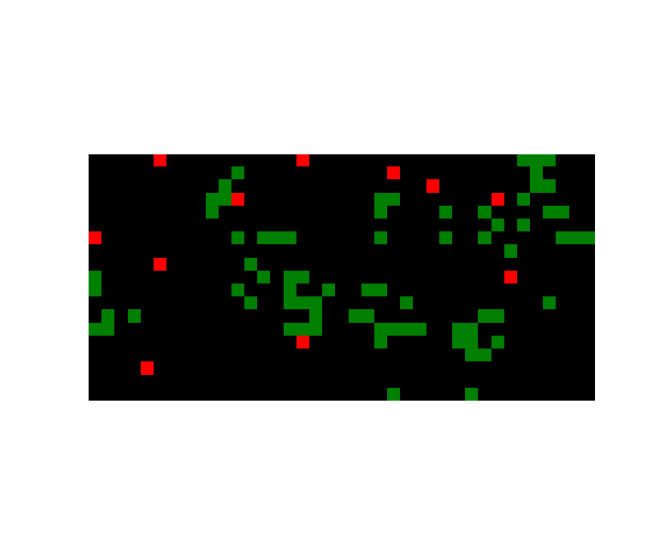

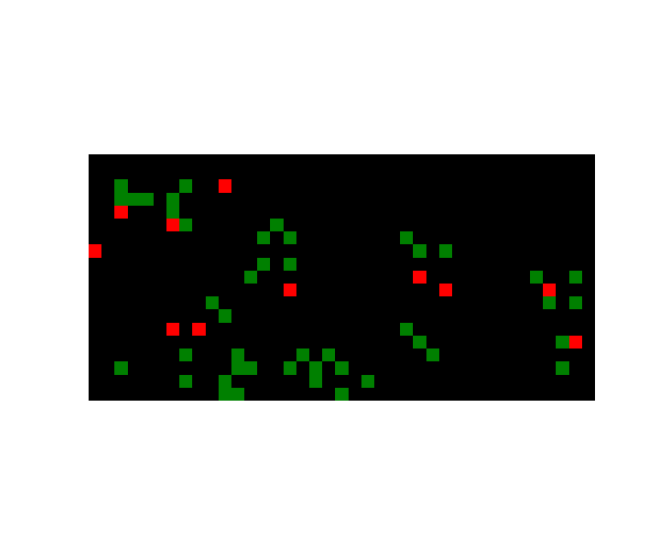

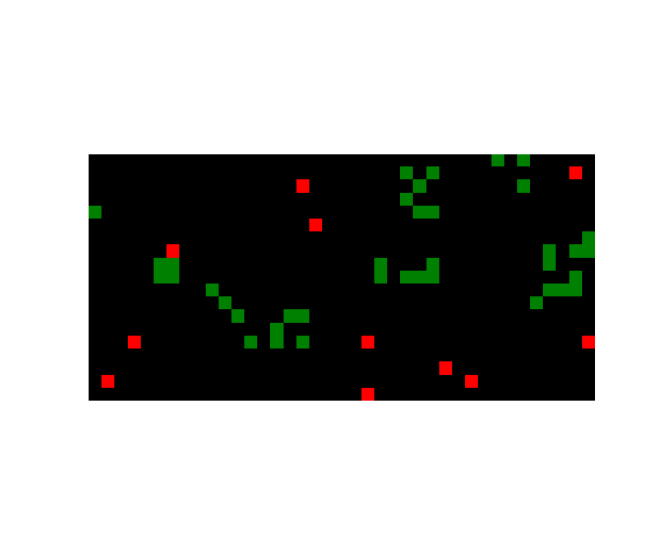

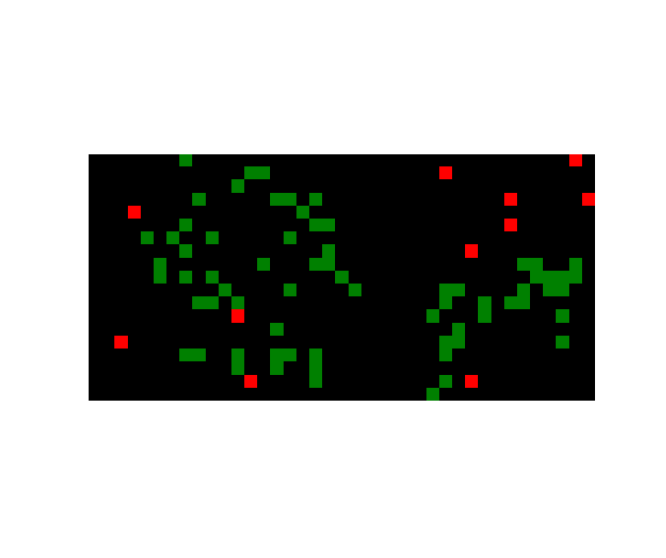

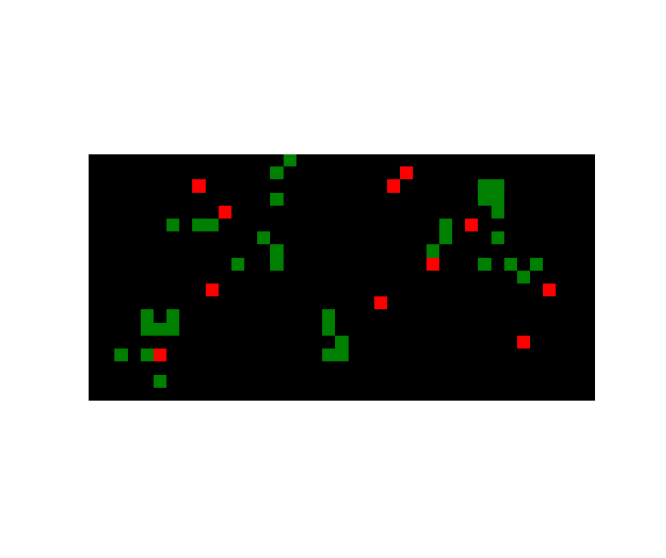

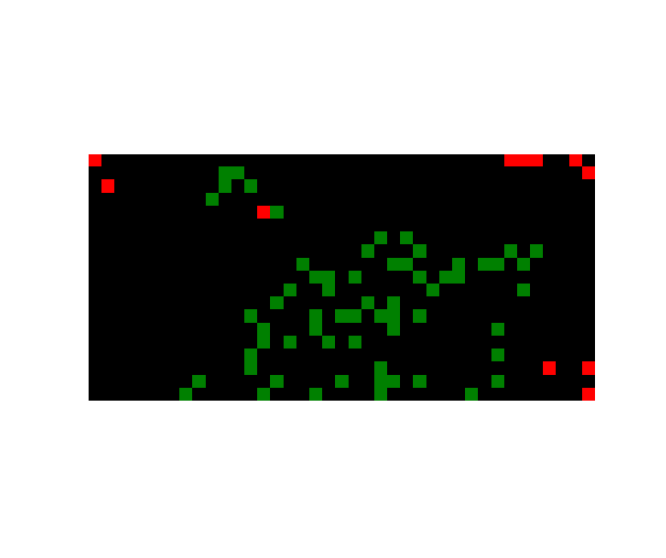

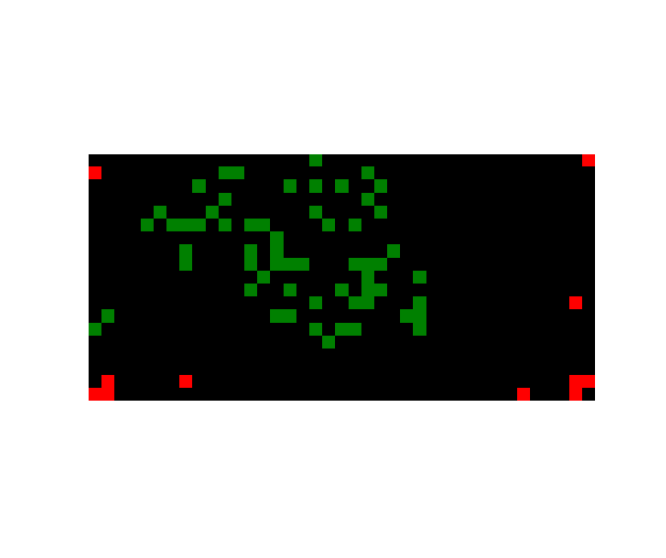

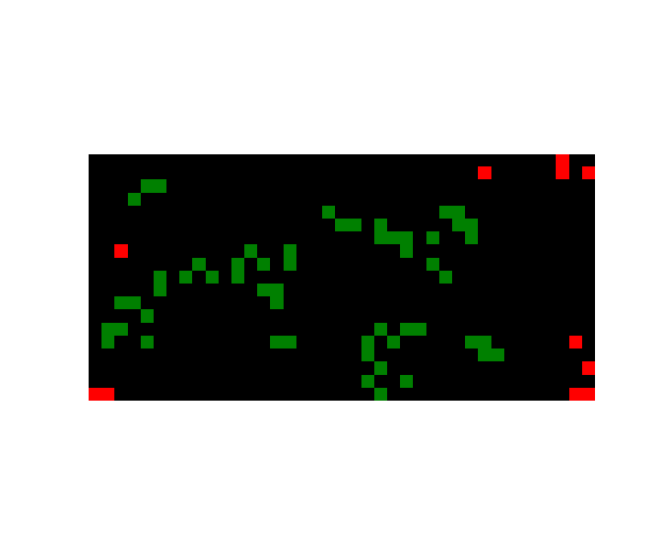

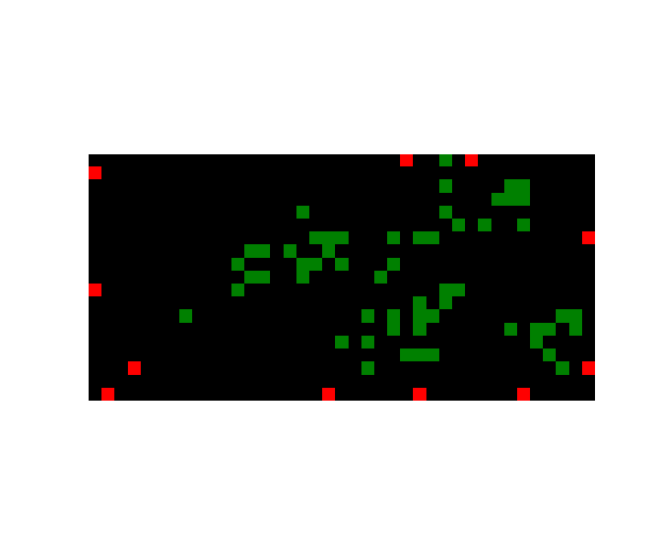

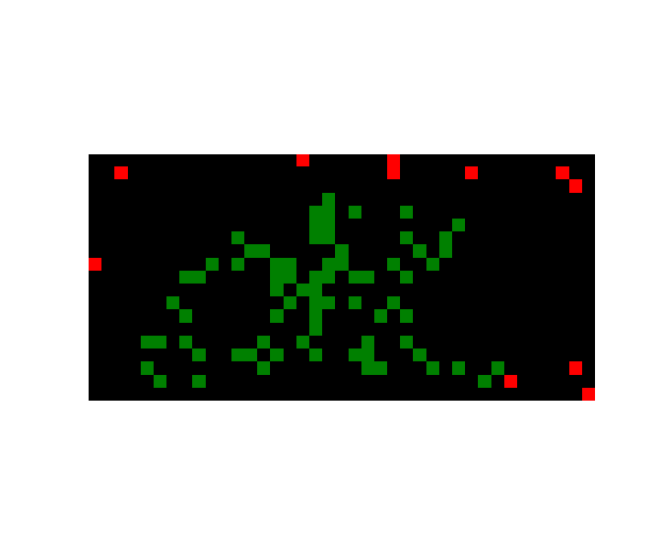

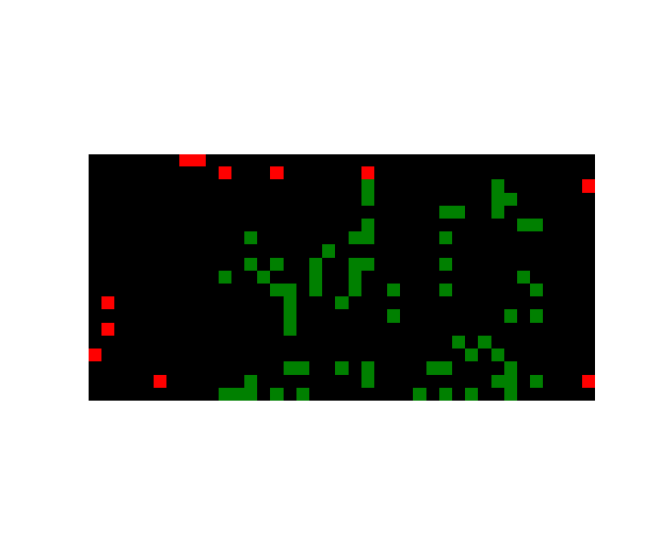

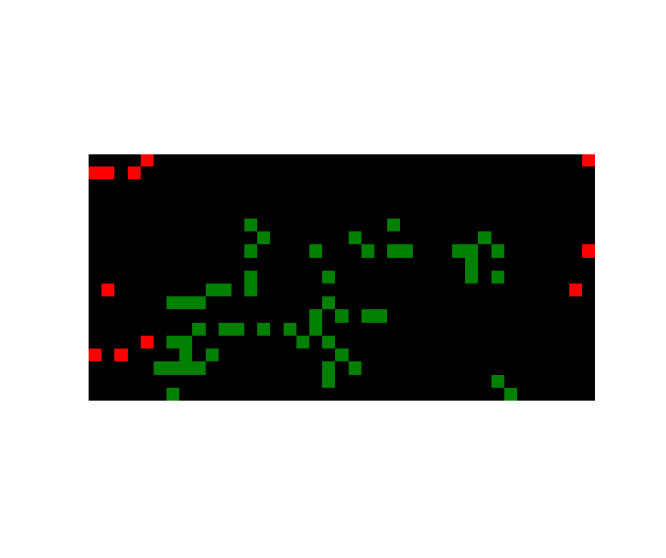

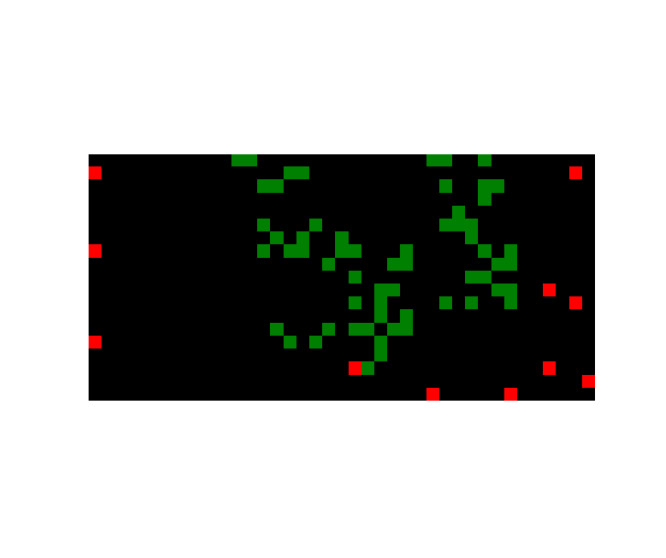

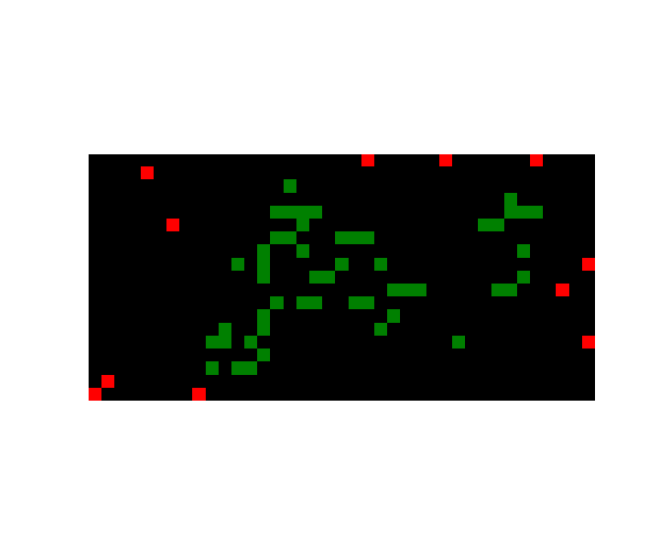

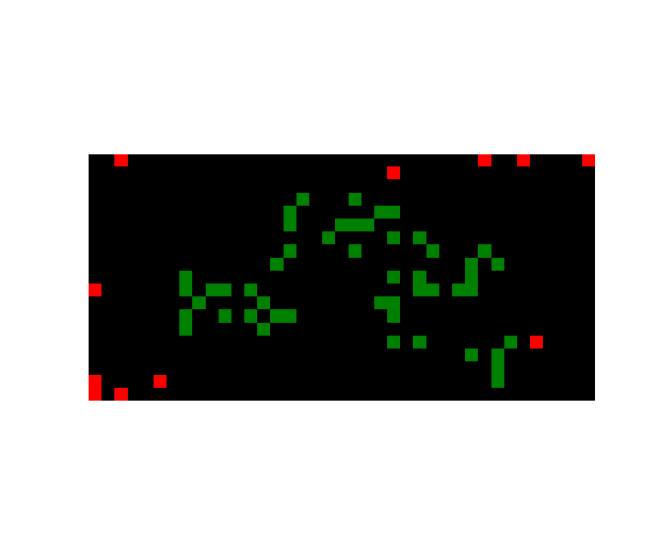

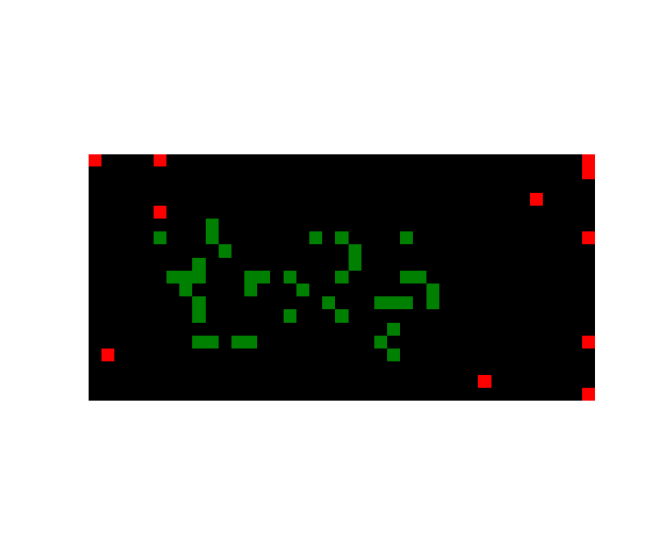

In [54]:
trpo_policy_nn = models.MLP(observation_space_size, hidden_sizes, action_space_size)
trpo_baseline_nn = models.MLP(observation_space_size, hidden_sizes, 1, log_softmax=False)
trpo_policy = policies.TRPOPolicy(env, trpo_policy_nn, trpo_baseline_nn, beta=beta, kl_target=kl_target)
trpo_policy.train(
    epochs,
    steps_per_epoch,
    enable_wandb=True,
    wandb_config={**wandb_config, "group": "TRPO"},
    render_every=render_every
)

## PPO

This section deals with training a set of Harvest agents using our custom Proximal Policy Optimization implementation.

In [ ]:
c1=1.0
c2=0.01
eps=0.2

In [ ]:
ppo_policy_nn = models.MLP(observation_space_size, hidden_sizes, action_space_size)
ppo_baseline_nn = models.MLP(observation_space_size, hidden_sizes, 1, log_softmax=False)
ppo_policy = policies.PPOPolicy(env, ppo_policy_nn, ppo_baseline_nn, c1=c1, c2=c2, eps=eps)
ppo_policy.train(
    epochs,
    steps_per_epoch,
    enable_wandb=True,
    wandb_config={**wandb_config, "group": "PPO"},
    render_every=render_every
)